## import necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import svm 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.preprocessing import Normalizer
#!pip install lightgbm
import lightgbm as lgb
from keras import layers,models,optimizers, losses , metrics

## Load the data

In [2]:
X_train = pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')

In [3]:
X_train.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.483649   0.687547   2.537800  10.376551   0.567348   0.596106   
1   1.499805   0.725211   2.751364  10.437025   0.573131   0.602905   
2   1.488341   0.682417   2.693507  10.365062   0.579309   0.562861   
3   1.519599   0.623867   2.324195  10.451897   0.572952   0.578840   
4   1.507545   0.670371   2.842893  10.278961   0.579217   0.565639   

   feature_7  feature_8  feature_9  feature_10  ...  feature_12  feature_13  \
0 -16.240967   0.674573   0.442094    0.526364  ...    0.421990  155.888221   
1 -15.838280   0.667451   0.323763    0.577258  ...    0.415970  155.730146   
2 -15.676407   0.665765   0.411116    0.563853  ...    0.413965  156.776313   
3 -15.864519   0.663683   0.475660    0.579442  ...    0.408425  156.938490   
4 -15.731608   0.662310   0.383606    0.582487  ...    0.417378  157.655976   

   feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  \
0    0.234755    0.755634    0.270530    0.271251    0.762394    0.478354   
1    0.287093    0.758845    0.269500    0.255842    0.769383    0.457942   
2    0.227319    0.774966    0.256073    0.271800    0.785884    0.433016   
3    0.329828    0.784894    0.309696    0.261590    0.797708    0.404935   
4    0.297751    0.770143    0.261388    0.266393    0.785940    0.433840   

   feature_20  feature_21  
0    0.012041    0.838369  
1   -0.000097    0.320343  
2    0.003065    0.801402  
3    0.000398    0.979851  
4    0.002192    0.209135  

[5 rows x 21 columns]

In [4]:
y_train.head()

Class
0      0
1      0
2      0
3      0
4      0

## check the number of classes in the data

In [5]:
np.unique(y_train)

array([0, 1])

## check some statisitcs from the train features

In [6]:
X_train.describe()

feature_1     feature_2     feature_3     feature_4     feature_5  \
count  33293.000000  33293.000000  33293.000000  33293.000000  33293.000000   
mean       1.507869      0.652335      2.691725     10.212428      0.580312   
std        0.026448      0.061820      0.194160      0.213794      0.008613   
min        1.000607     -0.001413      1.612928      4.201752     -0.000632   
25%        1.497499      0.618611      2.584371     10.131748      0.577809   
50%        1.506739      0.653106      2.691486     10.217267      0.579656   
75%        1.518046      0.687725      2.799535     10.311641      0.581875   
max        1.788343      0.948765      3.998892     13.007920      0.837858   

          feature_6     feature_7     feature_8     feature_9    feature_10  \
count  33293.000000  33293.000000  33293.000000  33293.000000  33293.000000   
mean       0.561568    -15.918297      0.665409      0.381857      0.577756   
std        0.013051      0.275346      0.009769      0.081374      0.029392   
min        0.192828    -19.251061      0.120398      0.002849      0.201061   
25%        0.557826    -16.122442      0.662911      0.333876      0.559791   
50%        0.561041    -15.917148      0.665266      0.387500      0.578409   
75%        0.564566    -15.718679      0.667804      0.441071      0.597694   
max        1.000477    -12.822493      0.873270      0.999837      0.850261   

       ...    feature_12    feature_13    feature_14    feature_15  \
count  ...  33293.000000  33293.000000  33293.000000  33293.000000   
mean   ...      0.416552    157.067640      0.253543      0.765533   
std    ...      0.008273      3.264828      0.066135      0.010663   
min    ...      0.242916      0.265438      0.026000     -0.001314   
25%    ...      0.414914    156.412001      0.214636      0.761019   
50%    ...      0.416601    157.149287      0.251852      0.765387   
75%    ...      0.418534    157.970421      0.285899      0.769944   
max    ...      1.000655    310.418660      0.931340      0.960131   

         feature_16    feature_17    feature_18    feature_19    feature_20  \
count  33293.000000  33293.000000  33293.000000  33293.000000  33293.000000   
mean       0.262903      0.265127      0.785436      0.462128      0.003463   
std        0.013892      0.009728      0.014616      0.039337      0.011290   
min        0.059958      0.000676      0.243180      0.004038     -0.003698   
25%        0.255242      0.261965      0.783024      0.440215      0.000157   
50%        0.260194      0.265522      0.785662      0.460914      0.001222   
75%        0.267016      0.268851      0.789015      0.483374      0.003191   
max        0.999238      1.000797      0.995161      0.820147      1.000632   

         feature_21  
count  33293.000000  
mean       0.551192  
std        0.275024  
min       -0.001402  
25%        0.315744  
50%        0.496305  
75%        0.807459  
max        1.001344  

[8 rows x 21 columns]

## check the balancing of the classes in the data

In [7]:
y_train.value_counts()

Class
0        32964
1          329
dtype: int64

because we are interested in class : "1", we have to balance the data.
I will use over sampling technique to do that.

------------------------------------

## Data preprocessing 

## check the correlations between the features

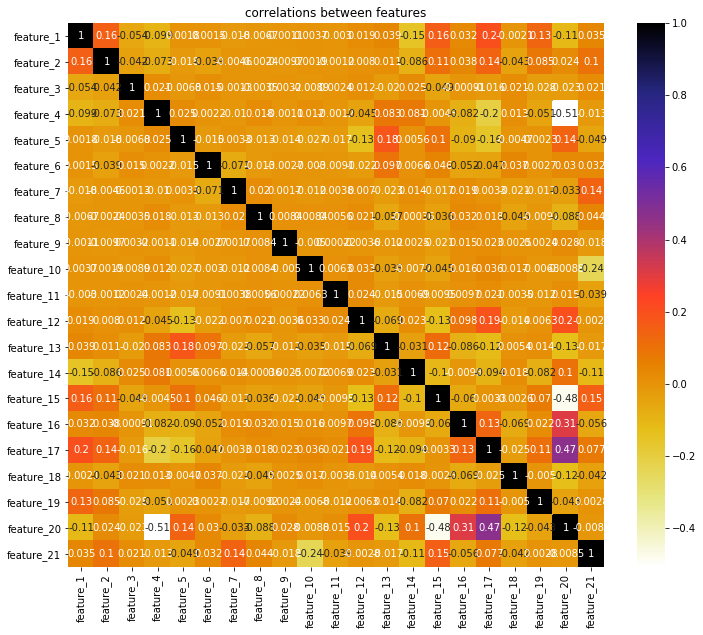

In [182]:
#correlations between features and target

correlation_matrix = X_train.corr()
# print('correlation_matrix',correlation_matrix) 

#Using Pearson Correlation
plt.figure(figsize=(12,10))
plt.title("correlations between features")
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Visualize the data using TSNE

In [10]:
def plot_tsne(X, y, target_names,title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(X)
    target_ids = range(len(target_names))

    plt.figure(figsize=(6, 5))
    colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
    plt.title(title)
    plt.legend()
    plt.show()

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


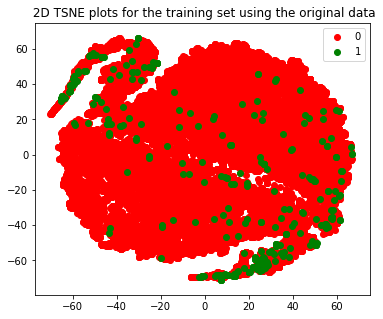

In [12]:
target_names=[0,1]
plot_tsne(X_train, y_train.values.ravel(), target_names," 2D TSNE plots for the training set using the original data")

## scaling the data

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


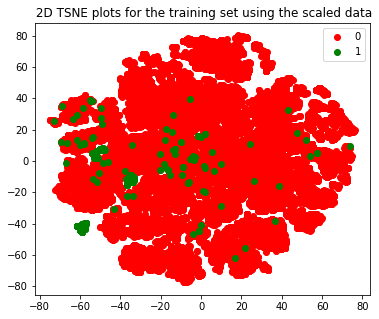

In [27]:
target_names=[0,1]
plot_tsne(X_scaled, y_train.values.ravel(), target_names," 2D TSNE plots for the training set using the scaled data")

## only undersampling 

In [9]:
undersample = RandomUnderSampler()
steps = [("u",undersample)]
pipeline = Pipeline(steps=steps)
X_u,y_u = pipeline.fit_resample(X_train,y_train.values.ravel())

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


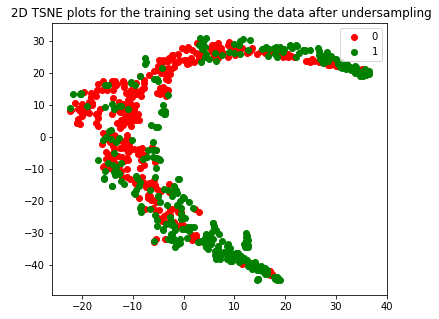

In [28]:
plot_tsne(X_u, y_u, target_names," 2D TSNE plots for the training set using the data after undersampling")

## only ovesampling 

In [10]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)
X_o, y_o = oversample.fit_resample(X_train, y_train.values.ravel())

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


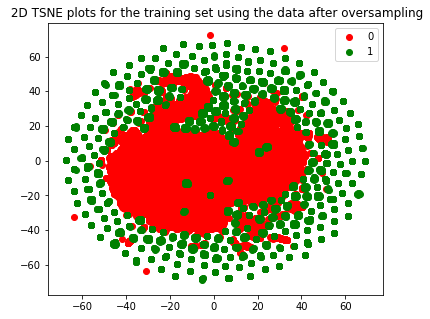

In [29]:
plot_tsne(X_o, y_o, target_names," 2D TSNE plots for the training set using the data after oversampling")

## undersampling and oversampling 

In [11]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o",oversample),("u",undersample)]
pipeline = Pipeline(steps=steps)
X_o_u,y_o_u = pipeline.fit_resample(X_train,y_train.values.ravel())

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


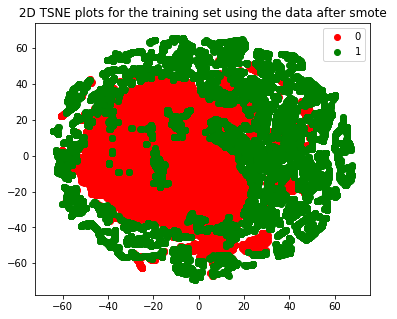

In [30]:
plot_tsne(X_o_u, y_o_u, target_names," 2D TSNE plots for the training set using the data after smote ")

## Data normalization 

In [12]:
transformer = Normalizer().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_test_normalized = transformer.transform(X_test)

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


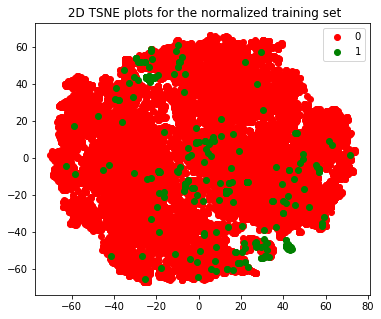

In [12]:
target_names=[0,1]
plot_tsne(X_train_normalized, y_train.values.ravel(), target_names," 2D TSNE plots for the normalized training set")

---------------------------

## create the model

### <font color="blue">MLP</font>

In [14]:
from sklearn.neural_network import MLPClassifier
mlp_CLF = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(13,10,5),random_state=0,max_iter=1000)

### using keras 

In [19]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=10,batch_size=10)

Epoch 1/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0249 - accuracy: 0.9966
Epoch 2/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0140 - accuracy: 0.9975
Epoch 3/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0129 - accuracy: 0.9975
Epoch 4/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0114 - accuracy: 0.9979
Epoch 5/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0110 - accuracy: 0.9979
Epoch 6/10
3330/3330 [==============================] - 11s 3ms/step - loss: 0.0105 - accuracy: 0.9980
Epoch 7/10
3330/3330 [==============================] - 10s 3ms/step - loss: 0.0098 - accuracy: 0.9981
Epoch 8/10
3330/3330 [==============================] - 12s 4ms/step - loss: 0.0096 - accuracy: 0.9979
Epoch 9/10
3330/3330 [==============================] - 12s 3ms/step - loss: 0.0101 - accuracy: 0.9980
Epoch 10/10
3330/3330 [==============================] - 15s 4ms/step - l

In [20]:
import keras.backend as K
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [96]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(50,activation = 'relu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(20,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=150,batch_size=30)

Epoch 1/150
1110/1110 [==============================] - 4s 3ms/step - loss: 0.0238 - get_f1: 0.1780
Epoch 2/150
1110/1110 [==============================] - 3s 3ms/step - loss: 0.0141 - get_f1: 0.2007
Epoch 3/150
1110/1110 [==============================] - 3s 3ms/step - loss: 0.0137 - get_f1: 0.2077
Epoch 4/150
1110/1110 [==============================] - 4s 3ms/step - loss: 0.0121 - get_f1: 0.2128
Epoch 5/150
1110/1110 [==============================] - 3s 3ms/step - loss: 0.0119 - get_f1: 0.2137
Epoch 6/150
1110/1110 [==============================] - 3s 3ms/step - loss: 0.0116 - get_f1: 0.2094
Epoch 7/150
1110/1110 [==============================] - 3s 3ms/step - loss: 0.0105 - get_f1: 0.2219
Epoch 8/150
1110/1110 [==============================] - 6s 5ms/step - loss: 0.0097 - get_f1: 0.2148
Epoch 9/150
1110/1110 [==============================] - 4s 3ms/step - loss: 0.0094 - get_f1: 0.2168
Epoch 10/150
1110/1110 [==============================] - 4s 3ms/step - loss: 0.0090 - get_

In [98]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))

513/513 [==============================] - 1s 2ms/step


In [101]:
y2 = [int(round(i[0])) for i in y]

In [105]:
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

Score: 0.89032

-------------

In [106]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(50,activation = 'relu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=300,batch_size=40)

Epoch 1/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0241 - get_f1: 0.2392
Epoch 2/300
833/833 [==============================] - 5s 6ms/step - loss: 0.0178 - get_f1: 0.2429
Epoch 3/300
833/833 [==============================] - 7s 8ms/step - loss: 0.0148 - get_f1: 0.2563
Epoch 4/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0139 - get_f1: 0.2777
Epoch 5/300
833/833 [==============================] - 4s 5ms/step - loss: 0.0159 - get_f1: 0.2601
Epoch 6/300
833/833 [==============================] - 5s 6ms/step - loss: 0.0119 - get_f1: 0.2658
Epoch 7/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0118 - get_f1: 0.2713
Epoch 8/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0114 - get_f1: 0.2787
Epoch 9/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0116 - get_f1: 0.2801
Epoch 10/300
833/833 [==============================] - 5s 5ms/step - loss: 0.0117 - get_f1: 0.2663
Epoch 11/

Epoch 161/300
833/833 [==============================] - 5s 5ms/step - loss: 1.0494e-11 - get_f1: 0.3265
Epoch 162/300
833/833 [==============================] - 5s 5ms/step - loss: 1.0542e-11 - get_f1: 0.3157
Epoch 163/300
833/833 [==============================] - 5s 5ms/step - loss: 1.0600e-11 - get_f1: 0.3337
Epoch 164/300
833/833 [==============================] - 4s 5ms/step - loss: 1.0639e-11 - get_f1: 0.3325
Epoch 165/300
833/833 [==============================] - 4s 5ms/step - loss: 1.0542e-11 - get_f1: 0.3157
Epoch 166/300
833/833 [==============================] - 4s 5ms/step - loss: 9.3189e-12 - get_f1: 0.3181
Epoch 167/300
833/833 [==============================] - 4s 5ms/step - loss: 9.3649e-12 - get_f1: 0.3265
Epoch 168/300
833/833 [==============================] - 4s 5ms/step - loss: 9.4155e-12 - get_f1: 0.3265
Epoch 169/300
833/833 [==============================] - 4s 5ms/step - loss: 9.4235e-12 - get_f1: 0.3277
Epoch 170/300
833/833 [==============================] 

833/833 [==============================] - 3s 4ms/step - loss: 9.8382e-12 - get_f1: 0.3349
Epoch 240/300
833/833 [==============================] - 3s 4ms/step - loss: 9.8462e-12 - get_f1: 0.3169
Epoch 241/300
833/833 [==============================] - 3s 4ms/step - loss: 9.8684e-12 - get_f1: 0.3277
Epoch 242/300
833/833 [==============================] - 4s 4ms/step - loss: 9.8861e-12 - get_f1: 0.3265
Epoch 243/300
833/833 [==============================] - 8s 10ms/step - loss: 9.9009e-12 - get_f1: 0.3325
Epoch 244/300
833/833 [==============================] - 4s 5ms/step - loss: 9.9162e-12 - get_f1: 0.3181
Epoch 245/300
833/833 [==============================] - 4s 5ms/step - loss: 9.9343e-12 - get_f1: 0.3349
Epoch 246/300
833/833 [==============================] - 4s 4ms/step - loss: 9.9596e-12 - get_f1: 0.3229
Epoch 247/300
833/833 [==============================] - 4s 4ms/step - loss: 9.1227e-12 - get_f1: 0.3349
Epoch 248/300
833/833 [==============================] - 5s 6ms/step

In [107]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 2s 3ms/step


Score: 0.89171

### <font color="blue">RandomForestClassifier</font>

In [15]:
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)

### <font color="blue">AdaBoostClassifier</font>

In [16]:
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)

### <font color="blue">HistGradientBoostingClassifier</font>

In [17]:
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)

### <font color="blue">CatBoostClassifier</font>

In [18]:
catBoost_CLF = CatBoostClassifier(random_state=0)

### <font color="blue">DecisionTreeClassifier</font>

In [19]:
decTree_CLF = DecisionTreeClassifier(random_state=0)

### <font color="blue">XGBClassifier</font>

In [20]:
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

### SVM

In [26]:
from sklearn import svm
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="rbf", class_weight={1: 10}, random_state=0)

### LightGBM

In [27]:
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)

In [28]:
models_str = ['MLP','RandomForest','AdaBoost','HistGradientBoosting','CatBoost','DecisionTree','XGB','SVM','lightGBM']
models_objects = [mlp_CLF,rf_CLF,ada_CLF,gradiant_boost_CLF,catBoost_CLF,decTree_CLF,xgb_CLF,wclf,lightGBM_CLF]

## Apply cross validation and each iteration show the classification report and finnaly print the f1-macro score

In [168]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print (classification_report(y_true, y_pred) )
    print("==============================================================")
    return f1_score(y_true, y_pred, average='macro') 

def apply_CV_F1(model,X,y):
    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
    print("==============================================================")
    print(f"the f1-macro score in all iterations : {nested_score}")
    print(f"the mean of f1-scores                : {nested_score.mean()}")
    print(f"the std  of f1-scores                : {nested_score.std()}")
    print("==============================================================")
    return nested_score.mean() , nested_score.std()



-------------------------------------

### performance of the models before any feature enginnering , and working on the original data 

In [29]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_train,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.74      0.83        66

    accuracy                           1.00      6659
   macro avg       0.97      0.87      0.91      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.61      0.75        66

    accuracy                           1.00      6659
   macro avg       1.00      0.80      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.70      0.82        66

    accuracy                           1.00      6659
   macro avg       1.00      0.85      0.91      6659
weighted avg       1.00      1.00      1.00      6659

              preci

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.87      0.73      0.79        66

    accuracy                           1.00      6659
   macro avg       0.94      0.86      0.90      6659
weighted avg       1.00      1.00      1.00      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.73      0.82        66

    accuracy                           1.00      6659
   macro avg       0.97      0.86      0.91      6659
weighted avg       1.00      1.00      1.00      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.71      0.81        66

    accuracy                           1.00      6659
   macro avg       0.97      0.86      0.90      6659
weighted avg       1.00      1.00      1.00      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.78      0.86        65

    accuracy                           1.00      6658
   macro avg       0.97      0.89      0.93      6658
weighted avg       1.00      1.00      1.00      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.91      0.76      0.83        66

    accuracy                           1.00      6658
   macro avg       0.95      0.88      0.91      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.89574703 0.90946102 0.90433921 0.92792734 0.91242738]
the mean of f1-scores                : 0.9099803959806352
the std  of f1-scores                : 0.010609072859136126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.86      0.74      0.80        66

    accuracy                           1.00      6659
   macro avg       0.93      0.87      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.92

127:	learn: 0.0084141	total: 960ms	remaining: 6.54s
128:	learn: 0.0083841	total: 967ms	remaining: 6.53s
129:	learn: 0.0083285	total: 976ms	remaining: 6.53s
130:	learn: 0.0083088	total: 986ms	remaining: 6.54s
131:	learn: 0.0082879	total: 995ms	remaining: 6.54s
132:	learn: 0.0082631	total: 1.01s	remaining: 6.57s
133:	learn: 0.0082446	total: 1.01s	remaining: 6.56s
134:	learn: 0.0082156	total: 1.02s	remaining: 6.55s
135:	learn: 0.0081858	total: 1.03s	remaining: 6.54s
136:	learn: 0.0081729	total: 1.04s	remaining: 6.53s
137:	learn: 0.0081395	total: 1.04s	remaining: 6.52s
138:	learn: 0.0081269	total: 1.05s	remaining: 6.51s
139:	learn: 0.0081159	total: 1.06s	remaining: 6.49s
140:	learn: 0.0080790	total: 1.06s	remaining: 6.48s
141:	learn: 0.0080690	total: 1.07s	remaining: 6.47s
142:	learn: 0.0080330	total: 1.08s	remaining: 6.46s
143:	learn: 0.0080144	total: 1.08s	remaining: 6.45s
144:	learn: 0.0080011	total: 1.09s	remaining: 6.44s
145:	learn: 0.0079524	total: 1.1s	remaining: 6.43s
146:	learn: 0

286:	learn: 0.0052360	total: 2.17s	remaining: 5.38s
287:	learn: 0.0052299	total: 2.17s	remaining: 5.38s
288:	learn: 0.0052139	total: 2.19s	remaining: 5.38s
289:	learn: 0.0052076	total: 2.19s	remaining: 5.37s
290:	learn: 0.0051885	total: 2.21s	remaining: 5.37s
291:	learn: 0.0051846	total: 2.21s	remaining: 5.37s
292:	learn: 0.0051758	total: 2.22s	remaining: 5.36s
293:	learn: 0.0051736	total: 2.23s	remaining: 5.35s
294:	learn: 0.0051685	total: 2.23s	remaining: 5.34s
295:	learn: 0.0051438	total: 2.24s	remaining: 5.33s
296:	learn: 0.0051200	total: 2.25s	remaining: 5.32s
297:	learn: 0.0051020	total: 2.26s	remaining: 5.31s
298:	learn: 0.0050832	total: 2.26s	remaining: 5.3s
299:	learn: 0.0050776	total: 2.27s	remaining: 5.3s
300:	learn: 0.0050745	total: 2.28s	remaining: 5.29s
301:	learn: 0.0050721	total: 2.28s	remaining: 5.28s
302:	learn: 0.0050582	total: 2.29s	remaining: 5.27s
303:	learn: 0.0050538	total: 2.3s	remaining: 5.26s
304:	learn: 0.0050377	total: 2.31s	remaining: 5.25s
305:	learn: 0.0

446:	learn: 0.0036686	total: 3.37s	remaining: 4.17s
447:	learn: 0.0036601	total: 3.38s	remaining: 4.17s
448:	learn: 0.0036385	total: 3.39s	remaining: 4.16s
449:	learn: 0.0036352	total: 3.4s	remaining: 4.15s
450:	learn: 0.0036338	total: 3.41s	remaining: 4.15s
451:	learn: 0.0036315	total: 3.42s	remaining: 4.14s
452:	learn: 0.0036274	total: 3.42s	remaining: 4.14s
453:	learn: 0.0036135	total: 3.43s	remaining: 4.13s
454:	learn: 0.0035959	total: 3.44s	remaining: 4.12s
455:	learn: 0.0035866	total: 3.45s	remaining: 4.11s
456:	learn: 0.0035785	total: 3.45s	remaining: 4.1s
457:	learn: 0.0035769	total: 3.46s	remaining: 4.1s
458:	learn: 0.0035719	total: 3.47s	remaining: 4.09s
459:	learn: 0.0035688	total: 3.48s	remaining: 4.08s
460:	learn: 0.0035636	total: 3.48s	remaining: 4.07s
461:	learn: 0.0035597	total: 3.49s	remaining: 4.06s
462:	learn: 0.0035529	total: 3.5s	remaining: 4.05s
463:	learn: 0.0035494	total: 3.5s	remaining: 4.05s
464:	learn: 0.0035394	total: 3.51s	remaining: 4.04s
465:	learn: 0.003

607:	learn: 0.0025597	total: 4.59s	remaining: 2.96s
608:	learn: 0.0025496	total: 4.59s	remaining: 2.95s
609:	learn: 0.0025436	total: 4.6s	remaining: 2.94s
610:	learn: 0.0025413	total: 4.61s	remaining: 2.94s
611:	learn: 0.0025362	total: 4.62s	remaining: 2.93s
612:	learn: 0.0025304	total: 4.63s	remaining: 2.92s
613:	learn: 0.0025291	total: 4.64s	remaining: 2.92s
614:	learn: 0.0025243	total: 4.65s	remaining: 2.91s
615:	learn: 0.0025218	total: 4.65s	remaining: 2.9s
616:	learn: 0.0025150	total: 4.66s	remaining: 2.89s
617:	learn: 0.0025062	total: 4.67s	remaining: 2.88s
618:	learn: 0.0025026	total: 4.67s	remaining: 2.88s
619:	learn: 0.0024969	total: 4.68s	remaining: 2.87s
620:	learn: 0.0024937	total: 4.69s	remaining: 2.86s
621:	learn: 0.0024855	total: 4.7s	remaining: 2.85s
622:	learn: 0.0024760	total: 4.7s	remaining: 2.85s
623:	learn: 0.0024721	total: 4.71s	remaining: 2.84s
624:	learn: 0.0024664	total: 4.72s	remaining: 2.83s
625:	learn: 0.0024577	total: 4.72s	remaining: 2.82s
626:	learn: 0.00

769:	learn: 0.0017896	total: 5.8s	remaining: 1.73s
770:	learn: 0.0017874	total: 5.81s	remaining: 1.72s
771:	learn: 0.0017856	total: 5.82s	remaining: 1.72s
772:	learn: 0.0017821	total: 5.83s	remaining: 1.71s
773:	learn: 0.0017735	total: 5.83s	remaining: 1.7s
774:	learn: 0.0017732	total: 5.84s	remaining: 1.7s
775:	learn: 0.0017723	total: 5.85s	remaining: 1.69s
776:	learn: 0.0017676	total: 5.86s	remaining: 1.68s
777:	learn: 0.0017643	total: 5.87s	remaining: 1.67s
778:	learn: 0.0017599	total: 5.87s	remaining: 1.67s
779:	learn: 0.0017592	total: 5.88s	remaining: 1.66s
780:	learn: 0.0017584	total: 5.89s	remaining: 1.65s
781:	learn: 0.0017531	total: 5.89s	remaining: 1.64s
782:	learn: 0.0017512	total: 5.9s	remaining: 1.64s
783:	learn: 0.0017499	total: 5.91s	remaining: 1.63s
784:	learn: 0.0017433	total: 5.92s	remaining: 1.62s
785:	learn: 0.0017403	total: 5.92s	remaining: 1.61s
786:	learn: 0.0017359	total: 5.93s	remaining: 1.6s
787:	learn: 0.0017355	total: 5.93s	remaining: 1.6s
788:	learn: 0.0017

930:	learn: 0.0013209	total: 7.01s	remaining: 520ms
931:	learn: 0.0013207	total: 7.02s	remaining: 512ms
932:	learn: 0.0013188	total: 7.03s	remaining: 505ms
933:	learn: 0.0013182	total: 7.04s	remaining: 498ms
934:	learn: 0.0013160	total: 7.05s	remaining: 490ms
935:	learn: 0.0013104	total: 7.05s	remaining: 482ms
936:	learn: 0.0013092	total: 7.06s	remaining: 475ms
937:	learn: 0.0013074	total: 7.07s	remaining: 467ms
938:	learn: 0.0013038	total: 7.08s	remaining: 460ms
939:	learn: 0.0013014	total: 7.08s	remaining: 452ms
940:	learn: 0.0013004	total: 7.09s	remaining: 445ms
941:	learn: 0.0012993	total: 7.1s	remaining: 437ms
942:	learn: 0.0012982	total: 7.11s	remaining: 429ms
943:	learn: 0.0012910	total: 7.11s	remaining: 422ms
944:	learn: 0.0012906	total: 7.12s	remaining: 414ms
945:	learn: 0.0012905	total: 7.13s	remaining: 407ms
946:	learn: 0.0012898	total: 7.13s	remaining: 399ms
947:	learn: 0.0012896	total: 7.14s	remaining: 392ms
948:	learn: 0.0012889	total: 7.15s	remaining: 384ms
949:	learn: 0

95:	learn: 0.0097881	total: 844ms	remaining: 7.95s
96:	learn: 0.0097457	total: 853ms	remaining: 7.94s
97:	learn: 0.0097214	total: 862ms	remaining: 7.93s
98:	learn: 0.0096693	total: 874ms	remaining: 7.95s
99:	learn: 0.0096346	total: 886ms	remaining: 7.97s
100:	learn: 0.0096006	total: 893ms	remaining: 7.95s
101:	learn: 0.0095792	total: 900ms	remaining: 7.93s
102:	learn: 0.0095408	total: 912ms	remaining: 7.94s
103:	learn: 0.0094861	total: 921ms	remaining: 7.93s
104:	learn: 0.0094300	total: 928ms	remaining: 7.91s
105:	learn: 0.0093979	total: 936ms	remaining: 7.89s
106:	learn: 0.0093541	total: 946ms	remaining: 7.9s
107:	learn: 0.0092855	total: 954ms	remaining: 7.88s
108:	learn: 0.0092711	total: 962ms	remaining: 7.86s
109:	learn: 0.0092425	total: 969ms	remaining: 7.84s
110:	learn: 0.0091638	total: 976ms	remaining: 7.82s
111:	learn: 0.0091397	total: 984ms	remaining: 7.8s
112:	learn: 0.0091086	total: 991ms	remaining: 7.78s
113:	learn: 0.0090808	total: 998ms	remaining: 7.75s
114:	learn: 0.00903

254:	learn: 0.0060035	total: 2.06s	remaining: 6.01s
255:	learn: 0.0059936	total: 2.06s	remaining: 6s
256:	learn: 0.0059642	total: 2.08s	remaining: 6.01s
257:	learn: 0.0059528	total: 2.09s	remaining: 6s
258:	learn: 0.0059282	total: 2.1s	remaining: 6s
259:	learn: 0.0059215	total: 2.1s	remaining: 5.99s
260:	learn: 0.0059143	total: 2.11s	remaining: 5.98s
261:	learn: 0.0059013	total: 2.12s	remaining: 5.97s
262:	learn: 0.0058942	total: 2.13s	remaining: 5.96s
263:	learn: 0.0058656	total: 2.13s	remaining: 5.95s
264:	learn: 0.0058604	total: 2.14s	remaining: 5.94s
265:	learn: 0.0058534	total: 2.15s	remaining: 5.93s
266:	learn: 0.0058462	total: 2.15s	remaining: 5.92s
267:	learn: 0.0058285	total: 2.16s	remaining: 5.91s
268:	learn: 0.0058222	total: 2.17s	remaining: 5.89s
269:	learn: 0.0058143	total: 2.17s	remaining: 5.88s
270:	learn: 0.0058108	total: 2.18s	remaining: 5.87s
271:	learn: 0.0058065	total: 2.19s	remaining: 5.86s
272:	learn: 0.0057966	total: 2.19s	remaining: 5.85s
273:	learn: 0.0057911	t

429:	learn: 0.0042117	total: 3.49s	remaining: 4.63s
430:	learn: 0.0041887	total: 3.5s	remaining: 4.62s
431:	learn: 0.0041841	total: 3.51s	remaining: 4.62s
432:	learn: 0.0041760	total: 3.53s	remaining: 4.62s
433:	learn: 0.0041662	total: 3.54s	remaining: 4.61s
434:	learn: 0.0041628	total: 3.54s	remaining: 4.6s
435:	learn: 0.0041586	total: 3.55s	remaining: 4.59s
436:	learn: 0.0041493	total: 3.56s	remaining: 4.59s
437:	learn: 0.0041399	total: 3.57s	remaining: 4.58s
438:	learn: 0.0041267	total: 3.58s	remaining: 4.57s
439:	learn: 0.0041085	total: 3.59s	remaining: 4.57s
440:	learn: 0.0041019	total: 3.6s	remaining: 4.56s
441:	learn: 0.0040988	total: 3.6s	remaining: 4.55s
442:	learn: 0.0040900	total: 3.61s	remaining: 4.54s
443:	learn: 0.0040858	total: 3.62s	remaining: 4.54s
444:	learn: 0.0040801	total: 3.63s	remaining: 4.53s
445:	learn: 0.0040761	total: 3.64s	remaining: 4.52s
446:	learn: 0.0040695	total: 3.65s	remaining: 4.51s
447:	learn: 0.0040624	total: 3.66s	remaining: 4.5s
448:	learn: 0.004

594:	learn: 0.0028692	total: 4.9s	remaining: 3.33s
595:	learn: 0.0028662	total: 4.91s	remaining: 3.33s
596:	learn: 0.0028647	total: 4.92s	remaining: 3.32s
597:	learn: 0.0028609	total: 4.93s	remaining: 3.31s
598:	learn: 0.0028581	total: 4.94s	remaining: 3.31s
599:	learn: 0.0028521	total: 4.95s	remaining: 3.3s
600:	learn: 0.0028457	total: 4.95s	remaining: 3.29s
601:	learn: 0.0028297	total: 4.96s	remaining: 3.28s
602:	learn: 0.0028152	total: 4.97s	remaining: 3.27s
603:	learn: 0.0028090	total: 4.97s	remaining: 3.26s
604:	learn: 0.0028055	total: 4.98s	remaining: 3.25s
605:	learn: 0.0027998	total: 4.99s	remaining: 3.24s
606:	learn: 0.0027961	total: 5s	remaining: 3.23s
607:	learn: 0.0027879	total: 5s	remaining: 3.23s
608:	learn: 0.0027834	total: 5.01s	remaining: 3.22s
609:	learn: 0.0027749	total: 5.02s	remaining: 3.21s
610:	learn: 0.0027711	total: 5.02s	remaining: 3.2s
611:	learn: 0.0027649	total: 5.03s	remaining: 3.19s
612:	learn: 0.0027606	total: 5.04s	remaining: 3.18s
613:	learn: 0.0027592

755:	learn: 0.0020155	total: 6.11s	remaining: 1.97s
756:	learn: 0.0020116	total: 6.12s	remaining: 1.96s
757:	learn: 0.0020094	total: 6.13s	remaining: 1.96s
758:	learn: 0.0020008	total: 6.14s	remaining: 1.95s
759:	learn: 0.0019983	total: 6.15s	remaining: 1.94s
760:	learn: 0.0019903	total: 6.16s	remaining: 1.93s
761:	learn: 0.0019878	total: 6.16s	remaining: 1.93s
762:	learn: 0.0019857	total: 6.17s	remaining: 1.92s
763:	learn: 0.0019799	total: 6.18s	remaining: 1.91s
764:	learn: 0.0019762	total: 6.18s	remaining: 1.9s
765:	learn: 0.0019738	total: 6.19s	remaining: 1.89s
766:	learn: 0.0019696	total: 6.2s	remaining: 1.88s
767:	learn: 0.0019631	total: 6.21s	remaining: 1.87s
768:	learn: 0.0019599	total: 6.21s	remaining: 1.87s
769:	learn: 0.0019499	total: 6.22s	remaining: 1.86s
770:	learn: 0.0019486	total: 6.23s	remaining: 1.85s
771:	learn: 0.0019444	total: 6.23s	remaining: 1.84s
772:	learn: 0.0019420	total: 6.24s	remaining: 1.83s
773:	learn: 0.0019402	total: 6.25s	remaining: 1.82s
774:	learn: 0.

916:	learn: 0.0014683	total: 7.32s	remaining: 662ms
917:	learn: 0.0014650	total: 7.33s	remaining: 654ms
918:	learn: 0.0014646	total: 7.34s	remaining: 647ms
919:	learn: 0.0014616	total: 7.34s	remaining: 639ms
920:	learn: 0.0014579	total: 7.35s	remaining: 631ms
921:	learn: 0.0014560	total: 7.36s	remaining: 623ms
922:	learn: 0.0014552	total: 7.37s	remaining: 615ms
923:	learn: 0.0014549	total: 7.38s	remaining: 607ms
924:	learn: 0.0014486	total: 7.38s	remaining: 599ms
925:	learn: 0.0014460	total: 7.39s	remaining: 591ms
926:	learn: 0.0014449	total: 7.4s	remaining: 583ms
927:	learn: 0.0014446	total: 7.41s	remaining: 575ms
928:	learn: 0.0014410	total: 7.41s	remaining: 567ms
929:	learn: 0.0014402	total: 7.42s	remaining: 558ms
930:	learn: 0.0014376	total: 7.43s	remaining: 550ms
931:	learn: 0.0014366	total: 7.43s	remaining: 542ms
932:	learn: 0.0014356	total: 7.44s	remaining: 534ms
933:	learn: 0.0014291	total: 7.45s	remaining: 526ms
934:	learn: 0.0014288	total: 7.45s	remaining: 518ms
935:	learn: 0

88:	learn: 0.0097247	total: 706ms	remaining: 7.22s
89:	learn: 0.0096399	total: 715ms	remaining: 7.22s
90:	learn: 0.0096170	total: 725ms	remaining: 7.24s
91:	learn: 0.0095822	total: 735ms	remaining: 7.26s
92:	learn: 0.0095422	total: 746ms	remaining: 7.28s
93:	learn: 0.0095011	total: 753ms	remaining: 7.26s
94:	learn: 0.0094780	total: 760ms	remaining: 7.24s
95:	learn: 0.0093954	total: 769ms	remaining: 7.24s
96:	learn: 0.0093386	total: 777ms	remaining: 7.23s
97:	learn: 0.0092879	total: 784ms	remaining: 7.21s
98:	learn: 0.0092333	total: 791ms	remaining: 7.2s
99:	learn: 0.0091991	total: 798ms	remaining: 7.18s
100:	learn: 0.0091698	total: 805ms	remaining: 7.16s
101:	learn: 0.0091514	total: 812ms	remaining: 7.14s
102:	learn: 0.0090885	total: 819ms	remaining: 7.13s
103:	learn: 0.0090319	total: 826ms	remaining: 7.12s
104:	learn: 0.0089848	total: 833ms	remaining: 7.1s
105:	learn: 0.0089380	total: 840ms	remaining: 7.09s
106:	learn: 0.0089193	total: 847ms	remaining: 7.07s
107:	learn: 0.0088724	tota

264:	learn: 0.0053193	total: 2.11s	remaining: 5.84s
265:	learn: 0.0053044	total: 2.12s	remaining: 5.84s
266:	learn: 0.0052973	total: 2.12s	remaining: 5.83s
267:	learn: 0.0052792	total: 2.14s	remaining: 5.83s
268:	learn: 0.0052674	total: 2.15s	remaining: 5.83s
269:	learn: 0.0052558	total: 2.16s	remaining: 5.83s
270:	learn: 0.0052251	total: 2.16s	remaining: 5.82s
271:	learn: 0.0052085	total: 2.17s	remaining: 5.82s
272:	learn: 0.0051891	total: 2.18s	remaining: 5.81s
273:	learn: 0.0051721	total: 2.19s	remaining: 5.8s
274:	learn: 0.0051667	total: 2.19s	remaining: 5.79s
275:	learn: 0.0051367	total: 2.2s	remaining: 5.78s
276:	learn: 0.0051245	total: 2.21s	remaining: 5.77s
277:	learn: 0.0051090	total: 2.22s	remaining: 5.76s
278:	learn: 0.0050875	total: 2.23s	remaining: 5.75s
279:	learn: 0.0050828	total: 2.23s	remaining: 5.74s
280:	learn: 0.0050779	total: 2.24s	remaining: 5.73s
281:	learn: 0.0050670	total: 2.25s	remaining: 5.72s
282:	learn: 0.0050497	total: 2.26s	remaining: 5.72s
283:	learn: 0.

439:	learn: 0.0034266	total: 3.51s	remaining: 4.47s
440:	learn: 0.0034179	total: 3.52s	remaining: 4.46s
441:	learn: 0.0034060	total: 3.53s	remaining: 4.45s
442:	learn: 0.0034003	total: 3.54s	remaining: 4.45s
443:	learn: 0.0033985	total: 3.55s	remaining: 4.44s
444:	learn: 0.0033960	total: 3.56s	remaining: 4.44s
445:	learn: 0.0033944	total: 3.57s	remaining: 4.43s
446:	learn: 0.0033867	total: 3.57s	remaining: 4.42s
447:	learn: 0.0033789	total: 3.58s	remaining: 4.41s
448:	learn: 0.0033707	total: 3.59s	remaining: 4.41s
449:	learn: 0.0033698	total: 3.6s	remaining: 4.4s
450:	learn: 0.0033657	total: 3.6s	remaining: 4.39s
451:	learn: 0.0033610	total: 3.61s	remaining: 4.38s
452:	learn: 0.0033534	total: 3.62s	remaining: 4.37s
453:	learn: 0.0033410	total: 3.63s	remaining: 4.36s
454:	learn: 0.0033236	total: 3.63s	remaining: 4.35s
455:	learn: 0.0033188	total: 3.64s	remaining: 4.35s
456:	learn: 0.0033177	total: 3.65s	remaining: 4.34s
457:	learn: 0.0033151	total: 3.66s	remaining: 4.33s
458:	learn: 0.0

614:	learn: 0.0022136	total: 4.92s	remaining: 3.08s
615:	learn: 0.0022120	total: 4.93s	remaining: 3.07s
616:	learn: 0.0022079	total: 4.94s	remaining: 3.06s
617:	learn: 0.0022056	total: 4.95s	remaining: 3.06s
618:	learn: 0.0021937	total: 4.96s	remaining: 3.05s
619:	learn: 0.0021876	total: 4.96s	remaining: 3.04s
620:	learn: 0.0021814	total: 4.97s	remaining: 3.03s
621:	learn: 0.0021737	total: 4.98s	remaining: 3.03s
622:	learn: 0.0021669	total: 4.99s	remaining: 3.02s
623:	learn: 0.0021588	total: 5s	remaining: 3.01s
624:	learn: 0.0021472	total: 5s	remaining: 3s
625:	learn: 0.0021458	total: 5.01s	remaining: 2.99s
626:	learn: 0.0021390	total: 5.02s	remaining: 2.98s
627:	learn: 0.0021363	total: 5.03s	remaining: 2.98s
628:	learn: 0.0021298	total: 5.03s	remaining: 2.97s
629:	learn: 0.0021247	total: 5.04s	remaining: 2.96s
630:	learn: 0.0021236	total: 5.05s	remaining: 2.95s
631:	learn: 0.0021176	total: 5.06s	remaining: 2.94s
632:	learn: 0.0021122	total: 5.06s	remaining: 2.94s
633:	learn: 0.0021051

790:	learn: 0.0015618	total: 6.34s	remaining: 1.68s
791:	learn: 0.0015613	total: 6.35s	remaining: 1.67s
792:	learn: 0.0015590	total: 6.36s	remaining: 1.66s
793:	learn: 0.0015545	total: 6.37s	remaining: 1.65s
794:	learn: 0.0015514	total: 6.38s	remaining: 1.65s
795:	learn: 0.0015479	total: 6.39s	remaining: 1.64s
796:	learn: 0.0015470	total: 6.4s	remaining: 1.63s
797:	learn: 0.0015463	total: 6.41s	remaining: 1.62s
798:	learn: 0.0015450	total: 6.41s	remaining: 1.61s
799:	learn: 0.0015403	total: 6.42s	remaining: 1.6s
800:	learn: 0.0015362	total: 6.43s	remaining: 1.6s
801:	learn: 0.0015317	total: 6.44s	remaining: 1.59s
802:	learn: 0.0015271	total: 6.45s	remaining: 1.58s
803:	learn: 0.0015263	total: 6.45s	remaining: 1.57s
804:	learn: 0.0015231	total: 6.46s	remaining: 1.56s
805:	learn: 0.0015213	total: 6.47s	remaining: 1.56s
806:	learn: 0.0015199	total: 6.48s	remaining: 1.55s
807:	learn: 0.0015167	total: 6.48s	remaining: 1.54s
808:	learn: 0.0015133	total: 6.49s	remaining: 1.53s
809:	learn: 0.0

966:	learn: 0.0012033	total: 7.75s	remaining: 265ms
967:	learn: 0.0012021	total: 7.76s	remaining: 257ms
968:	learn: 0.0011958	total: 7.77s	remaining: 249ms
969:	learn: 0.0011955	total: 7.78s	remaining: 241ms
970:	learn: 0.0011941	total: 7.79s	remaining: 233ms
971:	learn: 0.0011928	total: 7.8s	remaining: 225ms
972:	learn: 0.0011926	total: 7.81s	remaining: 217ms
973:	learn: 0.0011906	total: 7.82s	remaining: 209ms
974:	learn: 0.0011901	total: 7.83s	remaining: 201ms
975:	learn: 0.0011897	total: 7.83s	remaining: 193ms
976:	learn: 0.0011892	total: 7.84s	remaining: 185ms
977:	learn: 0.0011879	total: 7.85s	remaining: 177ms
978:	learn: 0.0011874	total: 7.86s	remaining: 169ms
979:	learn: 0.0011834	total: 7.87s	remaining: 161ms
980:	learn: 0.0011804	total: 7.87s	remaining: 152ms
981:	learn: 0.0011800	total: 7.88s	remaining: 144ms
982:	learn: 0.0011797	total: 7.89s	remaining: 136ms
983:	learn: 0.0011770	total: 7.89s	remaining: 128ms
984:	learn: 0.0011735	total: 7.9s	remaining: 120ms
985:	learn: 0.

129:	learn: 0.0088484	total: 1.1s	remaining: 7.37s
130:	learn: 0.0088222	total: 1.11s	remaining: 7.36s
131:	learn: 0.0087875	total: 1.12s	remaining: 7.36s
132:	learn: 0.0087694	total: 1.13s	remaining: 7.36s
133:	learn: 0.0087530	total: 1.14s	remaining: 7.36s
134:	learn: 0.0087411	total: 1.15s	remaining: 7.36s
135:	learn: 0.0087138	total: 1.16s	remaining: 7.35s
136:	learn: 0.0086765	total: 1.17s	remaining: 7.34s
137:	learn: 0.0086495	total: 1.17s	remaining: 7.33s
138:	learn: 0.0086303	total: 1.18s	remaining: 7.31s
139:	learn: 0.0086093	total: 1.19s	remaining: 7.3s
140:	learn: 0.0085540	total: 1.2s	remaining: 7.28s
141:	learn: 0.0085318	total: 1.2s	remaining: 7.27s
142:	learn: 0.0085122	total: 1.21s	remaining: 7.26s
143:	learn: 0.0084884	total: 1.22s	remaining: 7.24s
144:	learn: 0.0084648	total: 1.23s	remaining: 7.23s
145:	learn: 0.0084425	total: 1.23s	remaining: 7.22s
146:	learn: 0.0084196	total: 1.24s	remaining: 7.2s
147:	learn: 0.0083941	total: 1.25s	remaining: 7.19s
148:	learn: 0.008

300:	learn: 0.0056054	total: 2.52s	remaining: 5.85s
301:	learn: 0.0056004	total: 2.53s	remaining: 5.86s
302:	learn: 0.0055900	total: 2.55s	remaining: 5.86s
303:	learn: 0.0055800	total: 2.56s	remaining: 5.85s
304:	learn: 0.0055732	total: 2.57s	remaining: 5.85s
305:	learn: 0.0055533	total: 2.58s	remaining: 5.85s
306:	learn: 0.0055478	total: 2.59s	remaining: 5.84s
307:	learn: 0.0055405	total: 2.6s	remaining: 5.83s
308:	learn: 0.0055358	total: 2.6s	remaining: 5.83s
309:	learn: 0.0055281	total: 2.61s	remaining: 5.82s
310:	learn: 0.0054993	total: 2.62s	remaining: 5.81s
311:	learn: 0.0054882	total: 2.63s	remaining: 5.8s
312:	learn: 0.0054810	total: 2.64s	remaining: 5.8s
313:	learn: 0.0054741	total: 2.65s	remaining: 5.79s
314:	learn: 0.0054578	total: 2.66s	remaining: 5.78s
315:	learn: 0.0054484	total: 2.67s	remaining: 5.77s
316:	learn: 0.0054420	total: 2.67s	remaining: 5.76s
317:	learn: 0.0054318	total: 2.68s	remaining: 5.76s
318:	learn: 0.0054133	total: 2.69s	remaining: 5.75s
319:	learn: 0.00

467:	learn: 0.0040387	total: 4.14s	remaining: 4.71s
468:	learn: 0.0040239	total: 4.15s	remaining: 4.7s
469:	learn: 0.0040165	total: 4.16s	remaining: 4.69s
470:	learn: 0.0040124	total: 4.17s	remaining: 4.68s
471:	learn: 0.0040055	total: 4.18s	remaining: 4.68s
472:	learn: 0.0039900	total: 4.19s	remaining: 4.67s
473:	learn: 0.0039846	total: 4.2s	remaining: 4.66s
474:	learn: 0.0039793	total: 4.21s	remaining: 4.65s
475:	learn: 0.0039740	total: 4.21s	remaining: 4.64s
476:	learn: 0.0039624	total: 4.22s	remaining: 4.63s
477:	learn: 0.0039575	total: 4.23s	remaining: 4.62s
478:	learn: 0.0039508	total: 4.24s	remaining: 4.61s
479:	learn: 0.0039416	total: 4.25s	remaining: 4.6s
480:	learn: 0.0039343	total: 4.25s	remaining: 4.59s
481:	learn: 0.0039268	total: 4.26s	remaining: 4.58s
482:	learn: 0.0039181	total: 4.27s	remaining: 4.57s
483:	learn: 0.0039146	total: 4.28s	remaining: 4.56s
484:	learn: 0.0039105	total: 4.28s	remaining: 4.55s
485:	learn: 0.0039075	total: 4.29s	remaining: 4.54s
486:	learn: 0.0

642:	learn: 0.0029274	total: 5.56s	remaining: 3.09s
643:	learn: 0.0029082	total: 5.57s	remaining: 3.08s
644:	learn: 0.0029057	total: 5.58s	remaining: 3.07s
645:	learn: 0.0029021	total: 5.6s	remaining: 3.07s
646:	learn: 0.0028949	total: 5.6s	remaining: 3.06s
647:	learn: 0.0028898	total: 5.61s	remaining: 3.05s
648:	learn: 0.0028867	total: 5.62s	remaining: 3.04s
649:	learn: 0.0028814	total: 5.63s	remaining: 3.03s
650:	learn: 0.0028782	total: 5.63s	remaining: 3.02s
651:	learn: 0.0028757	total: 5.64s	remaining: 3.01s
652:	learn: 0.0028734	total: 5.65s	remaining: 3s
653:	learn: 0.0028669	total: 5.66s	remaining: 2.99s
654:	learn: 0.0028634	total: 5.66s	remaining: 2.98s
655:	learn: 0.0028612	total: 5.67s	remaining: 2.97s
656:	learn: 0.0028536	total: 5.68s	remaining: 2.96s
657:	learn: 0.0028483	total: 5.69s	remaining: 2.96s
658:	learn: 0.0028427	total: 5.7s	remaining: 2.95s
659:	learn: 0.0028270	total: 5.7s	remaining: 2.94s
660:	learn: 0.0028261	total: 5.71s	remaining: 2.93s
661:	learn: 0.00282

810:	learn: 0.0020361	total: 6.97s	remaining: 1.63s
811:	learn: 0.0020349	total: 6.98s	remaining: 1.62s
812:	learn: 0.0020308	total: 6.99s	remaining: 1.61s
813:	learn: 0.0020236	total: 7s	remaining: 1.6s
814:	learn: 0.0020216	total: 7.01s	remaining: 1.59s
815:	learn: 0.0020195	total: 7.02s	remaining: 1.58s
816:	learn: 0.0020174	total: 7.03s	remaining: 1.57s
817:	learn: 0.0020121	total: 7.04s	remaining: 1.57s
818:	learn: 0.0020109	total: 7.05s	remaining: 1.56s
819:	learn: 0.0020036	total: 7.05s	remaining: 1.55s
820:	learn: 0.0019908	total: 7.06s	remaining: 1.54s
821:	learn: 0.0019894	total: 7.07s	remaining: 1.53s
822:	learn: 0.0019874	total: 7.08s	remaining: 1.52s
823:	learn: 0.0019825	total: 7.09s	remaining: 1.51s
824:	learn: 0.0019696	total: 7.09s	remaining: 1.5s
825:	learn: 0.0019661	total: 7.1s	remaining: 1.5s
826:	learn: 0.0019649	total: 7.11s	remaining: 1.49s
827:	learn: 0.0019637	total: 7.12s	remaining: 1.48s
828:	learn: 0.0019563	total: 7.13s	remaining: 1.47s
829:	learn: 0.00195

983:	learn: 0.0014821	total: 8.39s	remaining: 136ms
984:	learn: 0.0014808	total: 8.4s	remaining: 128ms
985:	learn: 0.0014792	total: 8.41s	remaining: 119ms
986:	learn: 0.0014767	total: 8.42s	remaining: 111ms
987:	learn: 0.0014725	total: 8.43s	remaining: 102ms
988:	learn: 0.0014718	total: 8.44s	remaining: 93.9ms
989:	learn: 0.0014702	total: 8.45s	remaining: 85.3ms
990:	learn: 0.0014649	total: 8.46s	remaining: 76.8ms
991:	learn: 0.0014561	total: 8.46s	remaining: 68.3ms
992:	learn: 0.0014477	total: 8.47s	remaining: 59.7ms
993:	learn: 0.0014463	total: 8.48s	remaining: 51.2ms
994:	learn: 0.0014456	total: 8.49s	remaining: 42.6ms
995:	learn: 0.0014452	total: 8.49s	remaining: 34.1ms
996:	learn: 0.0014442	total: 8.5s	remaining: 25.6ms
997:	learn: 0.0014407	total: 8.51s	remaining: 17.1ms
998:	learn: 0.0014382	total: 8.52s	remaining: 8.53ms
999:	learn: 0.0014320	total: 8.53s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593


147:	learn: 0.0074638	total: 1.22s	remaining: 7.05s
148:	learn: 0.0074408	total: 1.23s	remaining: 7.04s
149:	learn: 0.0074290	total: 1.24s	remaining: 7.04s
150:	learn: 0.0073955	total: 1.25s	remaining: 7.04s
151:	learn: 0.0073664	total: 1.26s	remaining: 7.04s
152:	learn: 0.0073379	total: 1.27s	remaining: 7.03s
153:	learn: 0.0073036	total: 1.28s	remaining: 7.02s
154:	learn: 0.0072655	total: 1.29s	remaining: 7.01s
155:	learn: 0.0072293	total: 1.29s	remaining: 7s
156:	learn: 0.0071982	total: 1.3s	remaining: 6.99s
157:	learn: 0.0071574	total: 1.31s	remaining: 6.98s
158:	learn: 0.0071365	total: 1.32s	remaining: 6.97s
159:	learn: 0.0071193	total: 1.32s	remaining: 6.96s
160:	learn: 0.0071071	total: 1.33s	remaining: 6.94s
161:	learn: 0.0070931	total: 1.34s	remaining: 6.93s
162:	learn: 0.0070777	total: 1.35s	remaining: 6.92s
163:	learn: 0.0070525	total: 1.35s	remaining: 6.91s
164:	learn: 0.0070280	total: 1.36s	remaining: 6.9s
165:	learn: 0.0070146	total: 1.37s	remaining: 6.89s
166:	learn: 0.007

321:	learn: 0.0045328	total: 2.63s	remaining: 5.55s
322:	learn: 0.0045100	total: 2.64s	remaining: 5.54s
323:	learn: 0.0044850	total: 2.66s	remaining: 5.54s
324:	learn: 0.0044762	total: 2.67s	remaining: 5.54s
325:	learn: 0.0044537	total: 2.68s	remaining: 5.53s
326:	learn: 0.0044436	total: 2.68s	remaining: 5.53s
327:	learn: 0.0044267	total: 2.69s	remaining: 5.52s
328:	learn: 0.0044193	total: 2.7s	remaining: 5.51s
329:	learn: 0.0044098	total: 2.71s	remaining: 5.5s
330:	learn: 0.0044054	total: 2.71s	remaining: 5.49s
331:	learn: 0.0044019	total: 2.72s	remaining: 5.48s
332:	learn: 0.0043936	total: 2.73s	remaining: 5.47s
333:	learn: 0.0043697	total: 2.74s	remaining: 5.46s
334:	learn: 0.0043608	total: 2.75s	remaining: 5.45s
335:	learn: 0.0043502	total: 2.75s	remaining: 5.44s
336:	learn: 0.0043468	total: 2.76s	remaining: 5.43s
337:	learn: 0.0043331	total: 2.77s	remaining: 5.42s
338:	learn: 0.0043249	total: 2.78s	remaining: 5.41s
339:	learn: 0.0043078	total: 2.78s	remaining: 5.4s
340:	learn: 0.0

493:	learn: 0.0029328	total: 4.04s	remaining: 4.14s
494:	learn: 0.0029314	total: 4.05s	remaining: 4.13s
495:	learn: 0.0029297	total: 4.06s	remaining: 4.13s
496:	learn: 0.0029242	total: 4.07s	remaining: 4.12s
497:	learn: 0.0029178	total: 4.08s	remaining: 4.11s
498:	learn: 0.0029151	total: 4.09s	remaining: 4.11s
499:	learn: 0.0029124	total: 4.1s	remaining: 4.1s
500:	learn: 0.0029105	total: 4.1s	remaining: 4.09s
501:	learn: 0.0029087	total: 4.11s	remaining: 4.08s
502:	learn: 0.0029077	total: 4.12s	remaining: 4.07s
503:	learn: 0.0029056	total: 4.13s	remaining: 4.06s
504:	learn: 0.0029035	total: 4.13s	remaining: 4.05s
505:	learn: 0.0028990	total: 4.14s	remaining: 4.04s
506:	learn: 0.0028951	total: 4.15s	remaining: 4.03s
507:	learn: 0.0028926	total: 4.16s	remaining: 4.02s
508:	learn: 0.0028771	total: 4.16s	remaining: 4.02s
509:	learn: 0.0028679	total: 4.17s	remaining: 4.01s
510:	learn: 0.0028598	total: 4.18s	remaining: 4s
511:	learn: 0.0028567	total: 4.19s	remaining: 3.99s
512:	learn: 0.0028

666:	learn: 0.0020325	total: 5.44s	remaining: 2.72s
667:	learn: 0.0020097	total: 5.46s	remaining: 2.71s
668:	learn: 0.0020065	total: 5.47s	remaining: 2.7s
669:	learn: 0.0020003	total: 5.48s	remaining: 2.7s
670:	learn: 0.0019974	total: 5.49s	remaining: 2.69s
671:	learn: 0.0019966	total: 5.5s	remaining: 2.68s
672:	learn: 0.0019875	total: 5.5s	remaining: 2.67s
673:	learn: 0.0019835	total: 5.51s	remaining: 2.67s
674:	learn: 0.0019811	total: 5.52s	remaining: 2.66s
675:	learn: 0.0019783	total: 5.53s	remaining: 2.65s
676:	learn: 0.0019701	total: 5.54s	remaining: 2.64s
677:	learn: 0.0019694	total: 5.54s	remaining: 2.63s
678:	learn: 0.0019647	total: 5.55s	remaining: 2.62s
679:	learn: 0.0019623	total: 5.56s	remaining: 2.62s
680:	learn: 0.0019476	total: 5.56s	remaining: 2.61s
681:	learn: 0.0019384	total: 5.57s	remaining: 2.6s
682:	learn: 0.0019377	total: 5.58s	remaining: 2.59s
683:	learn: 0.0019365	total: 5.59s	remaining: 2.58s
684:	learn: 0.0019328	total: 5.59s	remaining: 2.57s
685:	learn: 0.001

839:	learn: 0.0013878	total: 6.85s	remaining: 1.3s
840:	learn: 0.0013845	total: 6.86s	remaining: 1.3s
841:	learn: 0.0013821	total: 6.87s	remaining: 1.29s
842:	learn: 0.0013807	total: 6.88s	remaining: 1.28s
843:	learn: 0.0013792	total: 6.89s	remaining: 1.27s
844:	learn: 0.0013761	total: 6.9s	remaining: 1.27s
845:	learn: 0.0013754	total: 6.91s	remaining: 1.26s
846:	learn: 0.0013741	total: 6.92s	remaining: 1.25s
847:	learn: 0.0013737	total: 6.93s	remaining: 1.24s
848:	learn: 0.0013724	total: 6.93s	remaining: 1.23s
849:	learn: 0.0013695	total: 6.94s	remaining: 1.23s
850:	learn: 0.0013663	total: 6.95s	remaining: 1.22s
851:	learn: 0.0013566	total: 6.96s	remaining: 1.21s
852:	learn: 0.0013562	total: 6.96s	remaining: 1.2s
853:	learn: 0.0013527	total: 6.97s	remaining: 1.19s
854:	learn: 0.0013520	total: 6.98s	remaining: 1.18s
855:	learn: 0.0013482	total: 6.99s	remaining: 1.18s
856:	learn: 0.0013469	total: 7s	remaining: 1.17s
857:	learn: 0.0013395	total: 7s	remaining: 1.16s
858:	learn: 0.0013367	

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.79      0.79      0.79        66

    accuracy                           1.00      6659
   macro avg       0.89      0.89      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.78      0.76      0.77        66

    accuracy                           1.00      6659
   macro avg       0.89      0.88      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.69      0.76      0.72        66

    accuracy                           0.99      6659
   macro avg       0.85      0.88      0.86      6659
weighted avg       0.99      0.99      0.99      6659

              preci

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        65

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6592
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658

the f1-macro score in all iterations : [0.49750981 0.49750981 0.49750981 0.49754735 0.49750943]
the mean of f1-scores                : 0.49751724367978933
the std  of f1-scores                : 1.505632220471078e-05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.

-----------------

In [30]:
df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.894404               0.023328
1          RandomForest                0.921252               0.007017
2              AdaBoost                0.909980               0.010609
3  HistGradientBoosting                0.916971               0.011353
4              CatBoost                0.933886               0.007087
5          DecisionTree                0.877313               0.011248
6                   XGB                0.924496               0.008057
7                   SVM                0.497517               0.000015
8              lightGBM                0.926668               0.005502

In [27]:
def fit_model_save_file(model,X,y,X_test):
    model.fit(X,y)
    y =model.predict(X_test)
    dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y})
    dff.to_csv('output.csv', index=False,)

In [55]:
fit_model_save_file(catBoost_CLF,X_train,y_train.values.ravel(),X_test)

Learning rate set to 0.046023
0:	learn: 0.5613976	total: 80.4ms	remaining: 1m 20s
1:	learn: 0.4634736	total: 136ms	remaining: 1m 7s
2:	learn: 0.3694403	total: 175ms	remaining: 58.3s
3:	learn: 0.3037417	total: 225ms	remaining: 56.1s
4:	learn: 0.2497127	total: 260ms	remaining: 51.7s
5:	learn: 0.2012190	total: 302ms	remaining: 50s
6:	learn: 0.1696647	total: 324ms	remaining: 45.9s
7:	learn: 0.1383996	total: 340ms	remaining: 42.2s
8:	learn: 0.1151933	total: 360ms	remaining: 39.7s
9:	learn: 0.0957324	total: 380ms	remaining: 37.6s
10:	learn: 0.0814595	total: 398ms	remaining: 35.8s
11:	learn: 0.0694033	total: 415ms	remaining: 34.2s
12:	learn: 0.0602873	total: 437ms	remaining: 33.1s
13:	learn: 0.0527179	total: 459ms	remaining: 32.3s
14:	learn: 0.0463809	total: 496ms	remaining: 32.5s
15:	learn: 0.0411886	total: 532ms	remaining: 32.7s
16:	learn: 0.0368506	total: 559ms	remaining: 32.3s
17:	learn: 0.0331969	total: 581ms	remaining: 31.7s
18:	learn: 0.0303431	total: 599ms	remaining: 30.9s
19:	learn: 

163:	learn: 0.0071667	total: 2.53s	remaining: 12.9s
164:	learn: 0.0071402	total: 2.54s	remaining: 12.8s
165:	learn: 0.0071286	total: 2.55s	remaining: 12.8s
166:	learn: 0.0071174	total: 2.56s	remaining: 12.8s
167:	learn: 0.0070842	total: 2.57s	remaining: 12.7s
168:	learn: 0.0070500	total: 2.59s	remaining: 12.7s
169:	learn: 0.0070141	total: 2.6s	remaining: 12.7s
170:	learn: 0.0069918	total: 2.61s	remaining: 12.6s
171:	learn: 0.0069639	total: 2.62s	remaining: 12.6s
172:	learn: 0.0069509	total: 2.63s	remaining: 12.5s
173:	learn: 0.0069169	total: 2.63s	remaining: 12.5s
174:	learn: 0.0069046	total: 2.64s	remaining: 12.5s
175:	learn: 0.0068767	total: 2.65s	remaining: 12.4s
176:	learn: 0.0068425	total: 2.66s	remaining: 12.4s
177:	learn: 0.0068138	total: 2.67s	remaining: 12.3s
178:	learn: 0.0067764	total: 2.68s	remaining: 12.3s
179:	learn: 0.0067593	total: 2.69s	remaining: 12.2s
180:	learn: 0.0067399	total: 2.69s	remaining: 12.2s
181:	learn: 0.0067201	total: 2.7s	remaining: 12.1s
182:	learn: 0.

325:	learn: 0.0046007	total: 4.8s	remaining: 9.91s
326:	learn: 0.0045942	total: 4.81s	remaining: 9.89s
327:	learn: 0.0045798	total: 4.82s	remaining: 9.87s
328:	learn: 0.0045741	total: 4.84s	remaining: 9.86s
329:	learn: 0.0045606	total: 4.84s	remaining: 9.84s
330:	learn: 0.0045585	total: 4.85s	remaining: 9.81s
331:	learn: 0.0045476	total: 4.86s	remaining: 9.78s
332:	learn: 0.0045266	total: 4.87s	remaining: 9.75s
333:	learn: 0.0045213	total: 4.88s	remaining: 9.73s
334:	learn: 0.0045024	total: 4.89s	remaining: 9.7s
335:	learn: 0.0044964	total: 4.89s	remaining: 9.67s
336:	learn: 0.0044837	total: 4.9s	remaining: 9.65s
337:	learn: 0.0044634	total: 4.91s	remaining: 9.62s
338:	learn: 0.0044614	total: 4.93s	remaining: 9.62s
339:	learn: 0.0044542	total: 4.94s	remaining: 9.59s
340:	learn: 0.0044457	total: 4.95s	remaining: 9.56s
341:	learn: 0.0044368	total: 4.96s	remaining: 9.54s
342:	learn: 0.0044305	total: 4.96s	remaining: 9.51s
343:	learn: 0.0044182	total: 4.97s	remaining: 9.48s
344:	learn: 0.0

505:	learn: 0.0029621	total: 6.61s	remaining: 6.46s
506:	learn: 0.0029565	total: 6.64s	remaining: 6.46s
507:	learn: 0.0029511	total: 6.66s	remaining: 6.45s
508:	learn: 0.0029456	total: 6.68s	remaining: 6.44s
509:	learn: 0.0029322	total: 6.72s	remaining: 6.46s
510:	learn: 0.0029302	total: 6.74s	remaining: 6.45s
511:	learn: 0.0029149	total: 6.82s	remaining: 6.5s
512:	learn: 0.0029086	total: 6.89s	remaining: 6.54s
513:	learn: 0.0028909	total: 6.94s	remaining: 6.56s
514:	learn: 0.0028849	total: 6.95s	remaining: 6.55s
515:	learn: 0.0028768	total: 6.97s	remaining: 6.54s
516:	learn: 0.0028734	total: 6.98s	remaining: 6.52s
517:	learn: 0.0028691	total: 6.99s	remaining: 6.5s
518:	learn: 0.0028652	total: 7s	remaining: 6.49s
519:	learn: 0.0028622	total: 7.01s	remaining: 6.47s
520:	learn: 0.0028572	total: 7.02s	remaining: 6.45s
521:	learn: 0.0028456	total: 7.03s	remaining: 6.44s
522:	learn: 0.0028400	total: 7.05s	remaining: 6.43s
523:	learn: 0.0028323	total: 7.06s	remaining: 6.41s
524:	learn: 0.002

664:	learn: 0.0020170	total: 8.87s	remaining: 4.47s
665:	learn: 0.0020123	total: 8.88s	remaining: 4.46s
666:	learn: 0.0020090	total: 8.9s	remaining: 4.44s
667:	learn: 0.0020052	total: 8.91s	remaining: 4.43s
668:	learn: 0.0019985	total: 8.92s	remaining: 4.41s
669:	learn: 0.0019956	total: 8.93s	remaining: 4.4s
670:	learn: 0.0019913	total: 8.94s	remaining: 4.38s
671:	learn: 0.0019890	total: 8.94s	remaining: 4.37s
672:	learn: 0.0019828	total: 8.95s	remaining: 4.35s
673:	learn: 0.0019764	total: 8.96s	remaining: 4.33s
674:	learn: 0.0019670	total: 8.97s	remaining: 4.32s
675:	learn: 0.0019627	total: 8.98s	remaining: 4.3s
676:	learn: 0.0019567	total: 8.99s	remaining: 4.29s
677:	learn: 0.0019512	total: 8.99s	remaining: 4.27s
678:	learn: 0.0019488	total: 9s	remaining: 4.26s
679:	learn: 0.0019418	total: 9.01s	remaining: 4.24s
680:	learn: 0.0019318	total: 9.02s	remaining: 4.22s
681:	learn: 0.0019307	total: 9.03s	remaining: 4.21s
682:	learn: 0.0019288	total: 9.04s	remaining: 4.19s
683:	learn: 0.0019

826:	learn: 0.0013872	total: 11.1s	remaining: 2.33s
827:	learn: 0.0013854	total: 11.2s	remaining: 2.32s
828:	learn: 0.0013813	total: 11.2s	remaining: 2.31s
829:	learn: 0.0013807	total: 11.2s	remaining: 2.3s
830:	learn: 0.0013772	total: 11.3s	remaining: 2.29s
831:	learn: 0.0013730	total: 11.3s	remaining: 2.28s
832:	learn: 0.0013675	total: 11.4s	remaining: 2.28s
833:	learn: 0.0013671	total: 11.4s	remaining: 2.26s
834:	learn: 0.0013660	total: 11.4s	remaining: 2.25s
835:	learn: 0.0013647	total: 11.4s	remaining: 2.24s
836:	learn: 0.0013631	total: 11.4s	remaining: 2.22s
837:	learn: 0.0013629	total: 11.4s	remaining: 2.21s
838:	learn: 0.0013610	total: 11.4s	remaining: 2.19s
839:	learn: 0.0013595	total: 11.4s	remaining: 2.18s
840:	learn: 0.0013557	total: 11.4s	remaining: 2.16s
841:	learn: 0.0013555	total: 11.5s	remaining: 2.15s
842:	learn: 0.0013543	total: 11.5s	remaining: 2.13s
843:	learn: 0.0013534	total: 11.5s	remaining: 2.12s
844:	learn: 0.0013529	total: 11.5s	remaining: 2.1s
845:	learn: 0.

989:	learn: 0.0010438	total: 13.2s	remaining: 134ms
990:	learn: 0.0010433	total: 13.2s	remaining: 120ms
991:	learn: 0.0010413	total: 13.3s	remaining: 107ms
992:	learn: 0.0010403	total: 13.3s	remaining: 93.8ms
993:	learn: 0.0010376	total: 13.3s	remaining: 80.4ms
994:	learn: 0.0010369	total: 13.3s	remaining: 67ms
995:	learn: 0.0010345	total: 13.3s	remaining: 53.6ms
996:	learn: 0.0010339	total: 13.3s	remaining: 40.2ms
997:	learn: 0.0010313	total: 13.4s	remaining: 26.8ms
998:	learn: 0.0010285	total: 13.4s	remaining: 13.4ms
999:	learn: 0.0010261	total: 13.4s	remaining: 0us


Score: 0.88000

------------------------------------------------------------------------

### performance of the models before any feature enginnering , and working on the scaled data 

In [31]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_scaled,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

print(df2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.82      0.83      0.83        66

    accuracy                           1.00      6659
   macro avg       0.91      0.92      0.91      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.68      0.79      0.73        66

    accuracy                           0.99      6659
   macro avg       0.84      0.89      0.86      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.79      0.82      0.81        66

    accuracy                           1.00      6659
   macro avg       0.90      0.91      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.98      0.76      0.85        66

    accuracy                           1.00      6658
   macro avg       0.99      0.88      0.93      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.89742666 0.91096919 0.923047   0.92670644 0.92670644]
the mean of f1-scores                : 0.9169711439986881
the std  of f1-scores                : 0.011353223288649782
Learning rate set to 0.04184
0:	learn: 0.5720026	total: 6.95ms	remaining: 6.95s
1:	learn: 0.4806865	total: 13.9ms	remaining: 6.96s
2:	learn: 0.3917116	total: 21.3ms	remaining: 7.07s
3:	learn: 0.3282595	total: 28.7ms	remaining: 7.13s
4:	learn: 0.2743043	total: 35.8ms	remaining: 7.13s
5:	learn: 0.2257298	total: 44.4ms	remaining: 7.36s
6:	learn: 0.1925672	total: 53.3ms	remaining: 7.56s
7:	learn: 0.1640758	total: 62.8ms	remaining: 7.78s
8:	learn: 0.1401574	to

164:	learn: 0.0074394	total: 1.25s	remaining: 6.33s
165:	learn: 0.0074198	total: 1.26s	remaining: 6.33s
166:	learn: 0.0074089	total: 1.27s	remaining: 6.33s
167:	learn: 0.0073974	total: 1.28s	remaining: 6.32s
168:	learn: 0.0073835	total: 1.29s	remaining: 6.33s
169:	learn: 0.0073673	total: 1.3s	remaining: 6.33s
170:	learn: 0.0073571	total: 1.3s	remaining: 6.32s
171:	learn: 0.0073083	total: 1.31s	remaining: 6.31s
172:	learn: 0.0072832	total: 1.32s	remaining: 6.3s
173:	learn: 0.0072674	total: 1.32s	remaining: 6.29s
174:	learn: 0.0072344	total: 1.33s	remaining: 6.28s
175:	learn: 0.0072244	total: 1.34s	remaining: 6.27s
176:	learn: 0.0071965	total: 1.35s	remaining: 6.26s
177:	learn: 0.0071789	total: 1.35s	remaining: 6.25s
178:	learn: 0.0071582	total: 1.36s	remaining: 6.24s
179:	learn: 0.0071244	total: 1.37s	remaining: 6.23s
180:	learn: 0.0071044	total: 1.38s	remaining: 6.22s
181:	learn: 0.0070947	total: 1.38s	remaining: 6.21s
182:	learn: 0.0070443	total: 1.39s	remaining: 6.2s
183:	learn: 0.00

324:	learn: 0.0049087	total: 2.46s	remaining: 5.11s
325:	learn: 0.0049003	total: 2.47s	remaining: 5.1s
326:	learn: 0.0048970	total: 2.48s	remaining: 5.1s
327:	learn: 0.0048911	total: 2.49s	remaining: 5.1s
328:	learn: 0.0048885	total: 2.5s	remaining: 5.09s
329:	learn: 0.0048859	total: 2.5s	remaining: 5.09s
330:	learn: 0.0048679	total: 2.51s	remaining: 5.08s
331:	learn: 0.0048480	total: 2.52s	remaining: 5.07s
332:	learn: 0.0048322	total: 2.53s	remaining: 5.06s
333:	learn: 0.0048268	total: 2.53s	remaining: 5.05s
334:	learn: 0.0048055	total: 2.54s	remaining: 5.04s
335:	learn: 0.0047775	total: 2.55s	remaining: 5.04s
336:	learn: 0.0047755	total: 2.56s	remaining: 5.03s
337:	learn: 0.0047723	total: 2.56s	remaining: 5.02s
338:	learn: 0.0047656	total: 2.57s	remaining: 5.01s
339:	learn: 0.0047451	total: 2.58s	remaining: 5s
340:	learn: 0.0047348	total: 2.58s	remaining: 4.99s
341:	learn: 0.0047207	total: 2.59s	remaining: 4.99s
342:	learn: 0.0047090	total: 2.6s	remaining: 4.98s
343:	learn: 0.0046909

486:	learn: 0.0034947	total: 3.67s	remaining: 3.87s
487:	learn: 0.0034934	total: 3.68s	remaining: 3.86s
488:	learn: 0.0034915	total: 3.69s	remaining: 3.86s
489:	learn: 0.0034801	total: 3.7s	remaining: 3.85s
490:	learn: 0.0034754	total: 3.71s	remaining: 3.84s
491:	learn: 0.0034477	total: 3.72s	remaining: 3.84s
492:	learn: 0.0034458	total: 3.73s	remaining: 3.83s
493:	learn: 0.0034426	total: 3.73s	remaining: 3.83s
494:	learn: 0.0034341	total: 3.74s	remaining: 3.82s
495:	learn: 0.0034285	total: 3.75s	remaining: 3.81s
496:	learn: 0.0034237	total: 3.75s	remaining: 3.8s
497:	learn: 0.0034207	total: 3.76s	remaining: 3.79s
498:	learn: 0.0034112	total: 3.77s	remaining: 3.78s
499:	learn: 0.0034095	total: 3.78s	remaining: 3.78s
500:	learn: 0.0034051	total: 3.78s	remaining: 3.77s
501:	learn: 0.0034002	total: 3.79s	remaining: 3.76s
502:	learn: 0.0033973	total: 3.8s	remaining: 3.75s
503:	learn: 0.0033963	total: 3.8s	remaining: 3.74s
504:	learn: 0.0033928	total: 3.81s	remaining: 3.73s
505:	learn: 0.00

648:	learn: 0.0024450	total: 4.89s	remaining: 2.65s
649:	learn: 0.0024390	total: 4.9s	remaining: 2.64s
650:	learn: 0.0024371	total: 4.91s	remaining: 2.63s
651:	learn: 0.0024252	total: 4.92s	remaining: 2.63s
652:	learn: 0.0024194	total: 4.93s	remaining: 2.62s
653:	learn: 0.0024144	total: 4.94s	remaining: 2.61s
654:	learn: 0.0024102	total: 4.95s	remaining: 2.6s
655:	learn: 0.0024026	total: 4.95s	remaining: 2.6s
656:	learn: 0.0023980	total: 4.96s	remaining: 2.59s
657:	learn: 0.0023912	total: 4.97s	remaining: 2.58s
658:	learn: 0.0023848	total: 4.97s	remaining: 2.57s
659:	learn: 0.0023813	total: 4.98s	remaining: 2.57s
660:	learn: 0.0023736	total: 4.99s	remaining: 2.56s
661:	learn: 0.0023691	total: 5s	remaining: 2.55s
662:	learn: 0.0023643	total: 5s	remaining: 2.54s
663:	learn: 0.0023600	total: 5.01s	remaining: 2.54s
664:	learn: 0.0023581	total: 5.02s	remaining: 2.53s
665:	learn: 0.0023473	total: 5.02s	remaining: 2.52s
666:	learn: 0.0023444	total: 5.03s	remaining: 2.51s
667:	learn: 0.0023266

810:	learn: 0.0016575	total: 6.12s	remaining: 1.43s
811:	learn: 0.0016570	total: 6.13s	remaining: 1.42s
812:	learn: 0.0016559	total: 6.14s	remaining: 1.41s
813:	learn: 0.0016466	total: 6.15s	remaining: 1.41s
814:	learn: 0.0016430	total: 6.16s	remaining: 1.4s
815:	learn: 0.0016391	total: 6.17s	remaining: 1.39s
816:	learn: 0.0016354	total: 6.17s	remaining: 1.38s
817:	learn: 0.0016349	total: 6.18s	remaining: 1.37s
818:	learn: 0.0016341	total: 6.19s	remaining: 1.37s
819:	learn: 0.0016315	total: 6.19s	remaining: 1.36s
820:	learn: 0.0016286	total: 6.2s	remaining: 1.35s
821:	learn: 0.0016244	total: 6.21s	remaining: 1.34s
822:	learn: 0.0016222	total: 6.21s	remaining: 1.34s
823:	learn: 0.0016193	total: 6.22s	remaining: 1.33s
824:	learn: 0.0016161	total: 6.23s	remaining: 1.32s
825:	learn: 0.0016153	total: 6.24s	remaining: 1.31s
826:	learn: 0.0016108	total: 6.24s	remaining: 1.3s
827:	learn: 0.0016057	total: 6.25s	remaining: 1.3s
828:	learn: 0.0016048	total: 6.26s	remaining: 1.29s
829:	learn: 0.00

971:	learn: 0.0012227	total: 7.33s	remaining: 211ms
972:	learn: 0.0012213	total: 7.34s	remaining: 204ms
973:	learn: 0.0012204	total: 7.35s	remaining: 196ms
974:	learn: 0.0012146	total: 7.36s	remaining: 189ms
975:	learn: 0.0012141	total: 7.37s	remaining: 181ms
976:	learn: 0.0012095	total: 7.38s	remaining: 174ms
977:	learn: 0.0012049	total: 7.39s	remaining: 166ms
978:	learn: 0.0012002	total: 7.39s	remaining: 159ms
979:	learn: 0.0011996	total: 7.4s	remaining: 151ms
980:	learn: 0.0011967	total: 7.41s	remaining: 144ms
981:	learn: 0.0011935	total: 7.42s	remaining: 136ms
982:	learn: 0.0011922	total: 7.42s	remaining: 128ms
983:	learn: 0.0011918	total: 7.43s	remaining: 121ms
984:	learn: 0.0011905	total: 7.44s	remaining: 113ms
985:	learn: 0.0011875	total: 7.44s	remaining: 106ms
986:	learn: 0.0011828	total: 7.45s	remaining: 98.2ms
987:	learn: 0.0011822	total: 7.46s	remaining: 90.6ms
988:	learn: 0.0011809	total: 7.47s	remaining: 83ms
989:	learn: 0.0011776	total: 7.47s	remaining: 75.5ms
990:	learn:

129:	learn: 0.0085060	total: 996ms	remaining: 6.67s
130:	learn: 0.0084756	total: 1s	remaining: 6.67s
131:	learn: 0.0084531	total: 1.01s	remaining: 6.68s
132:	learn: 0.0084326	total: 1.02s	remaining: 6.68s
133:	learn: 0.0083817	total: 1.03s	remaining: 6.68s
134:	learn: 0.0083268	total: 1.04s	remaining: 6.68s
135:	learn: 0.0083091	total: 1.05s	remaining: 6.67s
136:	learn: 0.0082729	total: 1.06s	remaining: 6.66s
137:	learn: 0.0082362	total: 1.06s	remaining: 6.65s
138:	learn: 0.0082173	total: 1.07s	remaining: 6.64s
139:	learn: 0.0082001	total: 1.08s	remaining: 6.62s
140:	learn: 0.0081723	total: 1.08s	remaining: 6.61s
141:	learn: 0.0081450	total: 1.09s	remaining: 6.6s
142:	learn: 0.0081281	total: 1.1s	remaining: 6.59s
143:	learn: 0.0080961	total: 1.11s	remaining: 6.58s
144:	learn: 0.0080796	total: 1.11s	remaining: 6.56s
145:	learn: 0.0080420	total: 1.12s	remaining: 6.55s
146:	learn: 0.0079879	total: 1.13s	remaining: 6.55s
147:	learn: 0.0079452	total: 1.14s	remaining: 6.54s
148:	learn: 0.007

291:	learn: 0.0055160	total: 2.21s	remaining: 5.37s
292:	learn: 0.0055114	total: 2.22s	remaining: 5.36s
293:	learn: 0.0054814	total: 2.23s	remaining: 5.36s
294:	learn: 0.0054623	total: 2.24s	remaining: 5.35s
295:	learn: 0.0054527	total: 2.25s	remaining: 5.35s
296:	learn: 0.0054351	total: 2.26s	remaining: 5.35s
297:	learn: 0.0054269	total: 2.27s	remaining: 5.34s
298:	learn: 0.0054151	total: 2.27s	remaining: 5.33s
299:	learn: 0.0054091	total: 2.28s	remaining: 5.32s
300:	learn: 0.0054045	total: 2.29s	remaining: 5.31s
301:	learn: 0.0053811	total: 2.29s	remaining: 5.3s
302:	learn: 0.0053748	total: 2.3s	remaining: 5.29s
303:	learn: 0.0053682	total: 2.31s	remaining: 5.28s
304:	learn: 0.0053440	total: 2.31s	remaining: 5.28s
305:	learn: 0.0053383	total: 2.32s	remaining: 5.27s
306:	learn: 0.0053321	total: 2.33s	remaining: 5.26s
307:	learn: 0.0053286	total: 2.34s	remaining: 5.25s
308:	learn: 0.0053092	total: 2.34s	remaining: 5.24s
309:	learn: 0.0053011	total: 2.35s	remaining: 5.23s
310:	learn: 0.

453:	learn: 0.0039421	total: 3.43s	remaining: 4.12s
454:	learn: 0.0039349	total: 3.44s	remaining: 4.12s
455:	learn: 0.0039325	total: 3.45s	remaining: 4.12s
456:	learn: 0.0039287	total: 3.47s	remaining: 4.13s
457:	learn: 0.0039208	total: 3.48s	remaining: 4.12s
458:	learn: 0.0039085	total: 3.5s	remaining: 4.12s
459:	learn: 0.0039018	total: 3.51s	remaining: 4.12s
460:	learn: 0.0038868	total: 3.52s	remaining: 4.12s
461:	learn: 0.0038798	total: 3.53s	remaining: 4.11s
462:	learn: 0.0038741	total: 3.54s	remaining: 4.1s
463:	learn: 0.0038695	total: 3.54s	remaining: 4.09s
464:	learn: 0.0038522	total: 3.55s	remaining: 4.09s
465:	learn: 0.0038497	total: 3.56s	remaining: 4.08s
466:	learn: 0.0038253	total: 3.57s	remaining: 4.07s
467:	learn: 0.0038185	total: 3.58s	remaining: 4.06s
468:	learn: 0.0038132	total: 3.58s	remaining: 4.06s
469:	learn: 0.0038059	total: 3.59s	remaining: 4.05s
470:	learn: 0.0037922	total: 3.6s	remaining: 4.04s
471:	learn: 0.0037896	total: 3.6s	remaining: 4.03s
472:	learn: 0.00

636:	learn: 0.0026408	total: 4.84s	remaining: 2.76s
637:	learn: 0.0026394	total: 4.85s	remaining: 2.75s
638:	learn: 0.0026338	total: 4.86s	remaining: 2.74s
639:	learn: 0.0026289	total: 4.87s	remaining: 2.74s
640:	learn: 0.0026267	total: 4.87s	remaining: 2.73s
641:	learn: 0.0026208	total: 4.88s	remaining: 2.72s
642:	learn: 0.0026199	total: 4.89s	remaining: 2.72s
643:	learn: 0.0026143	total: 4.9s	remaining: 2.71s
644:	learn: 0.0026042	total: 4.91s	remaining: 2.7s
645:	learn: 0.0025952	total: 4.92s	remaining: 2.69s
646:	learn: 0.0025911	total: 4.93s	remaining: 2.69s
647:	learn: 0.0025856	total: 4.93s	remaining: 2.68s
648:	learn: 0.0025801	total: 4.94s	remaining: 2.67s
649:	learn: 0.0025752	total: 4.95s	remaining: 2.66s
650:	learn: 0.0025681	total: 4.96s	remaining: 2.66s
651:	learn: 0.0025616	total: 4.96s	remaining: 2.65s
652:	learn: 0.0025519	total: 4.97s	remaining: 2.64s
653:	learn: 0.0025456	total: 4.98s	remaining: 2.63s
654:	learn: 0.0025395	total: 4.99s	remaining: 2.63s
655:	learn: 0.

805:	learn: 0.0018653	total: 6.48s	remaining: 1.56s
806:	learn: 0.0018635	total: 6.49s	remaining: 1.55s
807:	learn: 0.0018614	total: 6.5s	remaining: 1.54s
808:	learn: 0.0018609	total: 6.51s	remaining: 1.54s
809:	learn: 0.0018597	total: 6.52s	remaining: 1.53s
810:	learn: 0.0018578	total: 6.53s	remaining: 1.52s
811:	learn: 0.0018542	total: 6.53s	remaining: 1.51s
812:	learn: 0.0018514	total: 6.54s	remaining: 1.5s
813:	learn: 0.0018459	total: 6.55s	remaining: 1.5s
814:	learn: 0.0018431	total: 6.55s	remaining: 1.49s
815:	learn: 0.0018400	total: 6.56s	remaining: 1.48s
816:	learn: 0.0018395	total: 6.57s	remaining: 1.47s
817:	learn: 0.0018307	total: 6.58s	remaining: 1.46s
818:	learn: 0.0018303	total: 6.58s	remaining: 1.45s
819:	learn: 0.0018209	total: 6.59s	remaining: 1.45s
820:	learn: 0.0018170	total: 6.6s	remaining: 1.44s
821:	learn: 0.0018121	total: 6.61s	remaining: 1.43s
822:	learn: 0.0018097	total: 6.62s	remaining: 1.42s
823:	learn: 0.0018030	total: 6.63s	remaining: 1.42s
824:	learn: 0.00

974:	learn: 0.0013614	total: 7.87s	remaining: 202ms
975:	learn: 0.0013602	total: 7.88s	remaining: 194ms
976:	learn: 0.0013564	total: 7.89s	remaining: 186ms
977:	learn: 0.0013559	total: 7.9s	remaining: 178ms
978:	learn: 0.0013552	total: 7.91s	remaining: 170ms
979:	learn: 0.0013547	total: 7.92s	remaining: 162ms
980:	learn: 0.0013521	total: 7.93s	remaining: 154ms
981:	learn: 0.0013476	total: 7.94s	remaining: 145ms
982:	learn: 0.0013468	total: 7.94s	remaining: 137ms
983:	learn: 0.0013440	total: 7.95s	remaining: 129ms
984:	learn: 0.0013384	total: 7.96s	remaining: 121ms
985:	learn: 0.0013367	total: 7.96s	remaining: 113ms
986:	learn: 0.0013364	total: 7.97s	remaining: 105ms
987:	learn: 0.0013319	total: 7.98s	remaining: 96.9ms
988:	learn: 0.0013302	total: 7.99s	remaining: 88.8ms
989:	learn: 0.0013291	total: 7.99s	remaining: 80.7ms
990:	learn: 0.0013266	total: 8s	remaining: 72.7ms
991:	learn: 0.0013251	total: 8.01s	remaining: 64.6ms
992:	learn: 0.0013237	total: 8.01s	remaining: 56.5ms
993:	learn

136:	learn: 0.0079722	total: 1.05s	remaining: 6.61s
137:	learn: 0.0079418	total: 1.06s	remaining: 6.6s
138:	learn: 0.0079227	total: 1.06s	remaining: 6.6s
139:	learn: 0.0079035	total: 1.07s	remaining: 6.6s
140:	learn: 0.0078819	total: 1.08s	remaining: 6.61s
141:	learn: 0.0078691	total: 1.09s	remaining: 6.61s
142:	learn: 0.0078277	total: 1.1s	remaining: 6.6s
143:	learn: 0.0077990	total: 1.11s	remaining: 6.59s
144:	learn: 0.0077833	total: 1.12s	remaining: 6.58s
145:	learn: 0.0077280	total: 1.12s	remaining: 6.57s
146:	learn: 0.0077117	total: 1.13s	remaining: 6.56s
147:	learn: 0.0076884	total: 1.14s	remaining: 6.55s
148:	learn: 0.0076629	total: 1.14s	remaining: 6.54s
149:	learn: 0.0076530	total: 1.15s	remaining: 6.53s
150:	learn: 0.0076205	total: 1.16s	remaining: 6.52s
151:	learn: 0.0076000	total: 1.17s	remaining: 6.51s
152:	learn: 0.0075701	total: 1.17s	remaining: 6.5s
153:	learn: 0.0075212	total: 1.18s	remaining: 6.49s
154:	learn: 0.0075066	total: 1.19s	remaining: 6.48s
155:	learn: 0.0074

300:	learn: 0.0048599	total: 2.46s	remaining: 5.72s
301:	learn: 0.0048485	total: 2.48s	remaining: 5.73s
302:	learn: 0.0048412	total: 2.49s	remaining: 5.74s
303:	learn: 0.0048365	total: 2.51s	remaining: 5.75s
304:	learn: 0.0048245	total: 2.52s	remaining: 5.75s
305:	learn: 0.0048128	total: 2.54s	remaining: 5.75s
306:	learn: 0.0048040	total: 2.54s	remaining: 5.74s
307:	learn: 0.0047802	total: 2.56s	remaining: 5.74s
308:	learn: 0.0047740	total: 2.57s	remaining: 5.74s
309:	learn: 0.0047537	total: 2.58s	remaining: 5.74s
310:	learn: 0.0047453	total: 2.59s	remaining: 5.74s
311:	learn: 0.0047369	total: 2.6s	remaining: 5.72s
312:	learn: 0.0047282	total: 2.6s	remaining: 5.71s
313:	learn: 0.0047181	total: 2.61s	remaining: 5.71s
314:	learn: 0.0047121	total: 2.62s	remaining: 5.7s
315:	learn: 0.0047048	total: 2.63s	remaining: 5.69s
316:	learn: 0.0046988	total: 2.64s	remaining: 5.68s
317:	learn: 0.0046940	total: 2.65s	remaining: 5.68s
318:	learn: 0.0046885	total: 2.66s	remaining: 5.68s
319:	learn: 0.0

464:	learn: 0.0031737	total: 4.91s	remaining: 5.65s
465:	learn: 0.0031550	total: 4.94s	remaining: 5.66s
466:	learn: 0.0031523	total: 4.95s	remaining: 5.65s
467:	learn: 0.0031482	total: 4.96s	remaining: 5.64s
468:	learn: 0.0031452	total: 4.98s	remaining: 5.64s
469:	learn: 0.0031386	total: 4.99s	remaining: 5.63s
470:	learn: 0.0031249	total: 5s	remaining: 5.62s
471:	learn: 0.0031204	total: 5.01s	remaining: 5.6s
472:	learn: 0.0031085	total: 5.03s	remaining: 5.6s
473:	learn: 0.0031025	total: 5.04s	remaining: 5.6s
474:	learn: 0.0030892	total: 5.05s	remaining: 5.59s
475:	learn: 0.0030805	total: 5.07s	remaining: 5.58s
476:	learn: 0.0030745	total: 5.09s	remaining: 5.58s
477:	learn: 0.0030728	total: 5.1s	remaining: 5.57s
478:	learn: 0.0030557	total: 5.13s	remaining: 5.58s
479:	learn: 0.0030357	total: 5.14s	remaining: 5.57s
480:	learn: 0.0030269	total: 5.15s	remaining: 5.56s
481:	learn: 0.0030181	total: 5.16s	remaining: 5.54s
482:	learn: 0.0030131	total: 5.17s	remaining: 5.53s
483:	learn: 0.00300

633:	learn: 0.0020874	total: 6.55s	remaining: 3.78s
634:	learn: 0.0020765	total: 6.56s	remaining: 3.77s
635:	learn: 0.0020714	total: 6.57s	remaining: 3.76s
636:	learn: 0.0020654	total: 6.58s	remaining: 3.75s
637:	learn: 0.0020604	total: 6.59s	remaining: 3.74s
638:	learn: 0.0020594	total: 6.6s	remaining: 3.73s
639:	learn: 0.0020549	total: 6.61s	remaining: 3.71s
640:	learn: 0.0020481	total: 6.61s	remaining: 3.7s
641:	learn: 0.0020445	total: 6.62s	remaining: 3.69s
642:	learn: 0.0020407	total: 6.63s	remaining: 3.68s
643:	learn: 0.0020398	total: 6.64s	remaining: 3.67s
644:	learn: 0.0020347	total: 6.64s	remaining: 3.66s
645:	learn: 0.0020294	total: 6.65s	remaining: 3.65s
646:	learn: 0.0020203	total: 6.66s	remaining: 3.63s
647:	learn: 0.0020145	total: 6.67s	remaining: 3.62s
648:	learn: 0.0020134	total: 6.67s	remaining: 3.61s
649:	learn: 0.0020111	total: 6.68s	remaining: 3.6s
650:	learn: 0.0020057	total: 6.69s	remaining: 3.59s
651:	learn: 0.0020002	total: 6.7s	remaining: 3.57s
652:	learn: 0.00

807:	learn: 0.0014823	total: 7.93s	remaining: 1.89s
808:	learn: 0.0014764	total: 7.94s	remaining: 1.88s
809:	learn: 0.0014739	total: 7.95s	remaining: 1.86s
810:	learn: 0.0014730	total: 7.96s	remaining: 1.86s
811:	learn: 0.0014681	total: 7.97s	remaining: 1.85s
812:	learn: 0.0014666	total: 7.98s	remaining: 1.84s
813:	learn: 0.0014636	total: 7.99s	remaining: 1.82s
814:	learn: 0.0014626	total: 8s	remaining: 1.81s
815:	learn: 0.0014595	total: 8.01s	remaining: 1.8s
816:	learn: 0.0014592	total: 8.01s	remaining: 1.79s
817:	learn: 0.0014577	total: 8.02s	remaining: 1.78s
818:	learn: 0.0014526	total: 8.03s	remaining: 1.77s
819:	learn: 0.0014496	total: 8.04s	remaining: 1.76s
820:	learn: 0.0014491	total: 8.04s	remaining: 1.75s
821:	learn: 0.0014477	total: 8.05s	remaining: 1.74s
822:	learn: 0.0014460	total: 8.06s	remaining: 1.73s
823:	learn: 0.0014420	total: 8.07s	remaining: 1.72s
824:	learn: 0.0014406	total: 8.07s	remaining: 1.71s
825:	learn: 0.0014375	total: 8.08s	remaining: 1.7s
826:	learn: 0.001

983:	learn: 0.0011344	total: 9.33s	remaining: 152ms
984:	learn: 0.0011337	total: 9.34s	remaining: 142ms
985:	learn: 0.0011330	total: 9.35s	remaining: 133ms
986:	learn: 0.0011310	total: 9.36s	remaining: 123ms
987:	learn: 0.0011290	total: 9.37s	remaining: 114ms
988:	learn: 0.0011274	total: 9.38s	remaining: 104ms
989:	learn: 0.0011255	total: 9.38s	remaining: 94.8ms
990:	learn: 0.0011233	total: 9.39s	remaining: 85.3ms
991:	learn: 0.0011226	total: 9.4s	remaining: 75.8ms
992:	learn: 0.0011218	total: 9.41s	remaining: 66.3ms
993:	learn: 0.0011212	total: 9.41s	remaining: 56.8ms
994:	learn: 0.0011205	total: 9.42s	remaining: 47.3ms
995:	learn: 0.0011186	total: 9.43s	remaining: 37.9ms
996:	learn: 0.0011178	total: 9.44s	remaining: 28.4ms
997:	learn: 0.0011160	total: 9.44s	remaining: 18.9ms
998:	learn: 0.0011156	total: 9.45s	remaining: 9.46ms
999:	learn: 0.0011140	total: 9.46s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593


149:	learn: 0.0082014	total: 1.22s	remaining: 6.89s
150:	learn: 0.0081611	total: 1.23s	remaining: 6.9s
151:	learn: 0.0081397	total: 1.24s	remaining: 6.91s
152:	learn: 0.0081093	total: 1.25s	remaining: 6.9s
153:	learn: 0.0080525	total: 1.25s	remaining: 6.9s
154:	learn: 0.0080379	total: 1.26s	remaining: 6.89s
155:	learn: 0.0080028	total: 1.27s	remaining: 6.88s
156:	learn: 0.0079588	total: 1.28s	remaining: 6.86s
157:	learn: 0.0079267	total: 1.29s	remaining: 6.85s
158:	learn: 0.0078991	total: 1.29s	remaining: 6.84s
159:	learn: 0.0078833	total: 1.3s	remaining: 6.83s
160:	learn: 0.0078658	total: 1.31s	remaining: 6.82s
161:	learn: 0.0078420	total: 1.32s	remaining: 6.81s
162:	learn: 0.0078223	total: 1.32s	remaining: 6.8s
163:	learn: 0.0077736	total: 1.33s	remaining: 6.79s
164:	learn: 0.0077441	total: 1.34s	remaining: 6.78s
165:	learn: 0.0077253	total: 1.35s	remaining: 6.77s
166:	learn: 0.0077105	total: 1.35s	remaining: 6.76s
167:	learn: 0.0076873	total: 1.36s	remaining: 6.75s
168:	learn: 0.007

317:	learn: 0.0053529	total: 2.64s	remaining: 5.65s
318:	learn: 0.0053491	total: 2.65s	remaining: 5.65s
319:	learn: 0.0053389	total: 2.66s	remaining: 5.65s
320:	learn: 0.0053229	total: 2.67s	remaining: 5.66s
321:	learn: 0.0052958	total: 2.68s	remaining: 5.65s
322:	learn: 0.0052877	total: 2.69s	remaining: 5.65s
323:	learn: 0.0052610	total: 2.7s	remaining: 5.64s
324:	learn: 0.0052537	total: 2.71s	remaining: 5.64s
325:	learn: 0.0052441	total: 2.72s	remaining: 5.63s
326:	learn: 0.0052364	total: 2.73s	remaining: 5.62s
327:	learn: 0.0052324	total: 2.74s	remaining: 5.62s
328:	learn: 0.0052107	total: 2.75s	remaining: 5.61s
329:	learn: 0.0051950	total: 2.76s	remaining: 5.61s
330:	learn: 0.0051914	total: 2.77s	remaining: 5.6s
331:	learn: 0.0051827	total: 2.78s	remaining: 5.59s
332:	learn: 0.0051592	total: 2.79s	remaining: 5.59s
333:	learn: 0.0051412	total: 2.8s	remaining: 5.58s
334:	learn: 0.0051362	total: 2.81s	remaining: 5.57s
335:	learn: 0.0051234	total: 2.82s	remaining: 5.57s
336:	learn: 0.0

481:	learn: 0.0037200	total: 4.27s	remaining: 4.59s
482:	learn: 0.0037130	total: 4.28s	remaining: 4.58s
483:	learn: 0.0036948	total: 4.29s	remaining: 4.58s
484:	learn: 0.0036889	total: 4.3s	remaining: 4.57s
485:	learn: 0.0036706	total: 4.31s	remaining: 4.56s
486:	learn: 0.0036668	total: 4.32s	remaining: 4.55s
487:	learn: 0.0036552	total: 4.33s	remaining: 4.54s
488:	learn: 0.0036499	total: 4.34s	remaining: 4.53s
489:	learn: 0.0036452	total: 4.34s	remaining: 4.52s
490:	learn: 0.0036288	total: 4.35s	remaining: 4.51s
491:	learn: 0.0036117	total: 4.36s	remaining: 4.5s
492:	learn: 0.0036070	total: 4.37s	remaining: 4.49s
493:	learn: 0.0036027	total: 4.38s	remaining: 4.48s
494:	learn: 0.0035959	total: 4.38s	remaining: 4.47s
495:	learn: 0.0035922	total: 4.39s	remaining: 4.46s
496:	learn: 0.0035868	total: 4.4s	remaining: 4.45s
497:	learn: 0.0035819	total: 4.41s	remaining: 4.44s
498:	learn: 0.0035804	total: 4.41s	remaining: 4.43s
499:	learn: 0.0035687	total: 4.42s	remaining: 4.42s
500:	learn: 0.0

654:	learn: 0.0026222	total: 5.67s	remaining: 2.99s
655:	learn: 0.0026201	total: 5.68s	remaining: 2.98s
656:	learn: 0.0026166	total: 5.7s	remaining: 2.97s
657:	learn: 0.0026151	total: 5.71s	remaining: 2.96s
658:	learn: 0.0026080	total: 5.71s	remaining: 2.96s
659:	learn: 0.0026059	total: 5.72s	remaining: 2.95s
660:	learn: 0.0025959	total: 5.73s	remaining: 2.94s
661:	learn: 0.0025949	total: 5.74s	remaining: 2.93s
662:	learn: 0.0025741	total: 5.75s	remaining: 2.92s
663:	learn: 0.0025669	total: 5.75s	remaining: 2.91s
664:	learn: 0.0025470	total: 5.76s	remaining: 2.9s
665:	learn: 0.0025436	total: 5.77s	remaining: 2.89s
666:	learn: 0.0025412	total: 5.78s	remaining: 2.88s
667:	learn: 0.0025337	total: 5.78s	remaining: 2.88s
668:	learn: 0.0025323	total: 5.79s	remaining: 2.87s
669:	learn: 0.0025275	total: 5.8s	remaining: 2.86s
670:	learn: 0.0025259	total: 5.81s	remaining: 2.85s
671:	learn: 0.0025201	total: 5.81s	remaining: 2.84s
672:	learn: 0.0025137	total: 5.82s	remaining: 2.83s
673:	learn: 0.0

828:	learn: 0.0017801	total: 7.08s	remaining: 1.46s
829:	learn: 0.0017789	total: 7.09s	remaining: 1.45s
830:	learn: 0.0017742	total: 7.1s	remaining: 1.44s
831:	learn: 0.0017736	total: 7.11s	remaining: 1.44s
832:	learn: 0.0017723	total: 7.12s	remaining: 1.43s
833:	learn: 0.0017717	total: 7.13s	remaining: 1.42s
834:	learn: 0.0017592	total: 7.13s	remaining: 1.41s
835:	learn: 0.0017585	total: 7.14s	remaining: 1.4s
836:	learn: 0.0017557	total: 7.15s	remaining: 1.39s
837:	learn: 0.0017549	total: 7.16s	remaining: 1.38s
838:	learn: 0.0017534	total: 7.16s	remaining: 1.37s
839:	learn: 0.0017479	total: 7.17s	remaining: 1.37s
840:	learn: 0.0017469	total: 7.18s	remaining: 1.36s
841:	learn: 0.0017457	total: 7.19s	remaining: 1.35s
842:	learn: 0.0017433	total: 7.2s	remaining: 1.34s
843:	learn: 0.0017420	total: 7.2s	remaining: 1.33s
844:	learn: 0.0017398	total: 7.21s	remaining: 1.32s
845:	learn: 0.0017360	total: 7.22s	remaining: 1.31s
846:	learn: 0.0017348	total: 7.23s	remaining: 1.3s
847:	learn: 0.001

998:	learn: 0.0013159	total: 8.49s	remaining: 8.5ms
999:	learn: 0.0013114	total: 8.5s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.77      0.85        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.93      6658
weighted avg       1.00      1.00      1.00      6658

Learning rate set to 0.041841
0:	learn: 0.5727612	total: 8.4ms	remaining: 8.39s
1:	learn: 0.4763017	total: 17.1ms	remaining: 8.53s
2:	learn: 0.3880203	total: 25.5ms	remaining: 8.48s
3:	learn: 0.3248425	total: 33.3ms	remaining: 8.29s
4:	learn: 0.2653673	total: 40.9ms	remaining: 8.13s
5:	learn: 0.2189404	total: 48.4ms	remaining: 8.02s
6:	learn: 0.1817410	total: 56.1ms	remaining: 7.96s
7:	learn: 0.1508146	total: 63.8ms	remaining: 7.91s
8:	learn: 0.1267112	total: 71.2ms	remaining: 7.84s
9:	learn: 0.1067569	total: 78.5ms	remaining: 7.77s
10:	learn: 0.0907368	total: 85.9m

172:	learn: 0.0067072	total: 1.42s	remaining: 6.79s
173:	learn: 0.0066584	total: 1.43s	remaining: 6.8s
174:	learn: 0.0066424	total: 1.44s	remaining: 6.81s
175:	learn: 0.0066214	total: 1.45s	remaining: 6.8s
176:	learn: 0.0066092	total: 1.46s	remaining: 6.81s
177:	learn: 0.0065944	total: 1.47s	remaining: 6.8s
178:	learn: 0.0065794	total: 1.48s	remaining: 6.79s
179:	learn: 0.0065566	total: 1.49s	remaining: 6.78s
180:	learn: 0.0065226	total: 1.5s	remaining: 6.77s
181:	learn: 0.0065186	total: 1.5s	remaining: 6.75s
182:	learn: 0.0065021	total: 1.51s	remaining: 6.74s
183:	learn: 0.0064882	total: 1.52s	remaining: 6.73s
184:	learn: 0.0064764	total: 1.52s	remaining: 6.71s
185:	learn: 0.0064591	total: 1.53s	remaining: 6.7s
186:	learn: 0.0064273	total: 1.54s	remaining: 6.69s
187:	learn: 0.0064083	total: 1.55s	remaining: 6.68s
188:	learn: 0.0063991	total: 1.55s	remaining: 6.67s
189:	learn: 0.0063631	total: 1.56s	remaining: 6.66s
190:	learn: 0.0063414	total: 1.57s	remaining: 6.65s
191:	learn: 0.0063

345:	learn: 0.0041833	total: 2.83s	remaining: 5.35s
346:	learn: 0.0041747	total: 2.84s	remaining: 5.34s
347:	learn: 0.0041547	total: 2.85s	remaining: 5.34s
348:	learn: 0.0041514	total: 2.86s	remaining: 5.33s
349:	learn: 0.0041420	total: 2.87s	remaining: 5.33s
350:	learn: 0.0041352	total: 2.88s	remaining: 5.32s
351:	learn: 0.0041268	total: 2.88s	remaining: 5.31s
352:	learn: 0.0041002	total: 2.89s	remaining: 5.3s
353:	learn: 0.0040969	total: 2.9s	remaining: 5.29s
354:	learn: 0.0040834	total: 2.91s	remaining: 5.28s
355:	learn: 0.0040744	total: 2.92s	remaining: 5.27s
356:	learn: 0.0040636	total: 2.92s	remaining: 5.26s
357:	learn: 0.0040501	total: 2.93s	remaining: 5.26s
358:	learn: 0.0040328	total: 2.94s	remaining: 5.25s
359:	learn: 0.0040306	total: 2.95s	remaining: 5.24s
360:	learn: 0.0040235	total: 2.95s	remaining: 5.23s
361:	learn: 0.0040186	total: 2.96s	remaining: 5.22s
362:	learn: 0.0040156	total: 2.97s	remaining: 5.21s
363:	learn: 0.0039952	total: 2.98s	remaining: 5.2s
364:	learn: 0.0

519:	learn: 0.0027891	total: 4.25s	remaining: 3.92s
520:	learn: 0.0027863	total: 4.26s	remaining: 3.92s
521:	learn: 0.0027835	total: 4.27s	remaining: 3.91s
522:	learn: 0.0027811	total: 4.28s	remaining: 3.9s
523:	learn: 0.0027753	total: 4.29s	remaining: 3.89s
524:	learn: 0.0027731	total: 4.3s	remaining: 3.89s
525:	learn: 0.0027711	total: 4.31s	remaining: 3.88s
526:	learn: 0.0027653	total: 4.31s	remaining: 3.87s
527:	learn: 0.0027579	total: 4.32s	remaining: 3.86s
528:	learn: 0.0027510	total: 4.33s	remaining: 3.85s
529:	learn: 0.0027481	total: 4.34s	remaining: 3.85s
530:	learn: 0.0027448	total: 4.34s	remaining: 3.84s
531:	learn: 0.0027371	total: 4.35s	remaining: 3.83s
532:	learn: 0.0027361	total: 4.36s	remaining: 3.82s
533:	learn: 0.0027336	total: 4.37s	remaining: 3.81s
534:	learn: 0.0027311	total: 4.37s	remaining: 3.8s
535:	learn: 0.0027288	total: 4.38s	remaining: 3.79s
536:	learn: 0.0027256	total: 4.39s	remaining: 3.78s
537:	learn: 0.0027235	total: 4.39s	remaining: 3.77s
538:	learn: 0.0

695:	learn: 0.0018727	total: 5.68s	remaining: 2.48s
696:	learn: 0.0018681	total: 5.69s	remaining: 2.47s
697:	learn: 0.0018617	total: 5.7s	remaining: 2.47s
698:	learn: 0.0018610	total: 5.71s	remaining: 2.46s
699:	learn: 0.0018559	total: 5.72s	remaining: 2.45s
700:	learn: 0.0018513	total: 5.73s	remaining: 2.44s
701:	learn: 0.0018471	total: 5.74s	remaining: 2.44s
702:	learn: 0.0018424	total: 5.75s	remaining: 2.43s
703:	learn: 0.0018374	total: 5.75s	remaining: 2.42s
704:	learn: 0.0018356	total: 5.76s	remaining: 2.41s
705:	learn: 0.0018314	total: 5.77s	remaining: 2.4s
706:	learn: 0.0018296	total: 5.78s	remaining: 2.39s
707:	learn: 0.0018195	total: 5.78s	remaining: 2.38s
708:	learn: 0.0018147	total: 5.79s	remaining: 2.38s
709:	learn: 0.0018109	total: 5.8s	remaining: 2.37s
710:	learn: 0.0018064	total: 5.8s	remaining: 2.36s
711:	learn: 0.0018024	total: 5.81s	remaining: 2.35s
712:	learn: 0.0017996	total: 5.82s	remaining: 2.34s
713:	learn: 0.0017897	total: 5.83s	remaining: 2.33s
714:	learn: 0.00

868:	learn: 0.0013003	total: 7.09s	remaining: 1.07s
869:	learn: 0.0012962	total: 7.1s	remaining: 1.06s
870:	learn: 0.0012947	total: 7.11s	remaining: 1.05s
871:	learn: 0.0012929	total: 7.12s	remaining: 1.04s
872:	learn: 0.0012923	total: 7.13s	remaining: 1.04s
873:	learn: 0.0012885	total: 7.14s	remaining: 1.03s
874:	learn: 0.0012851	total: 7.15s	remaining: 1.02s
875:	learn: 0.0012836	total: 7.16s	remaining: 1.01s
876:	learn: 0.0012831	total: 7.16s	remaining: 1s
877:	learn: 0.0012807	total: 7.17s	remaining: 996ms
878:	learn: 0.0012791	total: 7.18s	remaining: 988ms
879:	learn: 0.0012768	total: 7.18s	remaining: 980ms
880:	learn: 0.0012761	total: 7.19s	remaining: 972ms
881:	learn: 0.0012753	total: 7.2s	remaining: 963ms
882:	learn: 0.0012748	total: 7.21s	remaining: 955ms
883:	learn: 0.0012743	total: 7.22s	remaining: 947ms
884:	learn: 0.0012736	total: 7.22s	remaining: 939ms
885:	learn: 0.0012620	total: 7.23s	remaining: 931ms
886:	learn: 0.0012615	total: 7.24s	remaining: 922ms
887:	learn: 0.001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.72      0.76      0.74        66

    accuracy                           0.99      6659
   macro avg       0.86      0.88      0.87      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.76      0.72      0.74        65

    accuracy                           1.00      6658
   macro avg       0.88      0.86      0.87      6658
weighted avg       0.99      1.00      0.99      6658

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.77      0.76      0.76        66

    accuracy                           1.00      6658
   macro avg       0.88      0.88      0.88      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score 

In [32]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.890849               0.016734
1          RandomForest                0.920255               0.005909
2              AdaBoost                0.912342               0.008161
3  HistGradientBoosting                0.916971               0.011353
4              CatBoost                0.934813               0.007317
5          DecisionTree                0.878946               0.009138
6                   XGB                0.924496               0.008057
7                   SVM                0.909051               0.015144
8              lightGBM                0.926925               0.005995

-----------------------------

## performance of oversampled training data 

In [33]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_o,y_o)
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6593
           1       0.94      0.88      0.91      6593

    accuracy                           0.91     13186
   macro avg       0.91      0.91      0.91     13186
weighted avg       0.91      0.91      0.91     13186

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6593
           1       0.95      0.87      0.91      6593

    accuracy                           0.91     13186
   macro avg       0.92      0.91      0.91     13186
weighted avg       0.92      0.91      0.91     13186

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6593
           1       0.95      0.86      0.90      6593

    accuracy                           0.91     13186
   macro avg       0.91      0.91      0.91     13186
weighted avg       0.91      0.91      0.91     13186

              preci

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6593
           1       0.99      0.99      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6593
           1       0.99      0.99      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6593
           1       0.98      0.99      0.98      6593

    accuracy                           0.98     13186
   macro avg       0.98      0.98      0.98     13186
weighted avg       0.98      0.98      0.98     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6593
           1       0.98      0.99      0.99      6592

    accuracy                           0.99     13185
   macro avg       0.99      0.99      0.99     13185
weighted avg       0.99      0.99      0.99     13185



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6592
           1       0.98      0.99      0.99      6593

    accuracy                           0.99     13185
   macro avg       0.99      0.99      0.99     13185
weighted avg       0.99      0.99      0.99     13185

the f1-macro score in all iterations : [0.98574245 0.98923096 0.98430149 0.98536215 0.9869548 ]
the mean of f1-scores                : 0.9863183712720487
the std  of f1-scores                : 0.0016853524143555817
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.0

116:	learn: 0.0162367	total: 1.38s	remaining: 10.4s
117:	learn: 0.0160350	total: 1.4s	remaining: 10.4s
118:	learn: 0.0157370	total: 1.41s	remaining: 10.4s
119:	learn: 0.0153424	total: 1.43s	remaining: 10.5s
120:	learn: 0.0151349	total: 1.44s	remaining: 10.4s
121:	learn: 0.0149676	total: 1.45s	remaining: 10.4s
122:	learn: 0.0147356	total: 1.46s	remaining: 10.4s
123:	learn: 0.0144765	total: 1.47s	remaining: 10.4s
124:	learn: 0.0142719	total: 1.48s	remaining: 10.4s
125:	learn: 0.0139365	total: 1.49s	remaining: 10.3s
126:	learn: 0.0138396	total: 1.5s	remaining: 10.3s
127:	learn: 0.0137117	total: 1.51s	remaining: 10.3s
128:	learn: 0.0134250	total: 1.52s	remaining: 10.3s
129:	learn: 0.0132660	total: 1.53s	remaining: 10.3s
130:	learn: 0.0131044	total: 1.54s	remaining: 10.2s
131:	learn: 0.0130668	total: 1.55s	remaining: 10.2s
132:	learn: 0.0128958	total: 1.57s	remaining: 10.2s
133:	learn: 0.0127459	total: 1.58s	remaining: 10.2s
134:	learn: 0.0125720	total: 1.59s	remaining: 10.2s
135:	learn: 0.

282:	learn: 0.0037341	total: 3.24s	remaining: 8.21s
283:	learn: 0.0037341	total: 3.25s	remaining: 8.19s
284:	learn: 0.0037341	total: 3.26s	remaining: 8.19s
285:	learn: 0.0037341	total: 3.27s	remaining: 8.18s
286:	learn: 0.0037341	total: 3.29s	remaining: 8.16s
287:	learn: 0.0037341	total: 3.29s	remaining: 8.15s
288:	learn: 0.0037341	total: 3.3s	remaining: 8.13s
289:	learn: 0.0037341	total: 3.31s	remaining: 8.11s
290:	learn: 0.0037341	total: 3.32s	remaining: 8.09s
291:	learn: 0.0037341	total: 3.33s	remaining: 8.08s
292:	learn: 0.0037341	total: 3.34s	remaining: 8.06s
293:	learn: 0.0037341	total: 3.35s	remaining: 8.04s
294:	learn: 0.0037341	total: 3.36s	remaining: 8.02s
295:	learn: 0.0037340	total: 3.37s	remaining: 8s
296:	learn: 0.0037340	total: 3.37s	remaining: 7.99s
297:	learn: 0.0037340	total: 3.38s	remaining: 7.97s
298:	learn: 0.0037340	total: 3.39s	remaining: 7.95s
299:	learn: 0.0037340	total: 3.4s	remaining: 7.93s
300:	learn: 0.0037340	total: 3.41s	remaining: 7.91s
301:	learn: 0.003

449:	learn: 0.0027483	total: 4.87s	remaining: 5.95s
450:	learn: 0.0027301	total: 4.88s	remaining: 5.94s
451:	learn: 0.0027053	total: 4.89s	remaining: 5.93s
452:	learn: 0.0026781	total: 4.91s	remaining: 5.93s
453:	learn: 0.0026640	total: 4.92s	remaining: 5.92s
454:	learn: 0.0026500	total: 4.93s	remaining: 5.91s
455:	learn: 0.0026320	total: 4.94s	remaining: 5.9s
456:	learn: 0.0026173	total: 4.95s	remaining: 5.89s
457:	learn: 0.0025924	total: 4.96s	remaining: 5.88s
458:	learn: 0.0025699	total: 4.98s	remaining: 5.87s
459:	learn: 0.0025519	total: 4.99s	remaining: 5.85s
460:	learn: 0.0025285	total: 5s	remaining: 5.84s
461:	learn: 0.0025173	total: 5.01s	remaining: 5.83s
462:	learn: 0.0024962	total: 5.02s	remaining: 5.82s
463:	learn: 0.0024860	total: 5.03s	remaining: 5.81s
464:	learn: 0.0024860	total: 5.04s	remaining: 5.79s
465:	learn: 0.0024598	total: 5.05s	remaining: 5.78s
466:	learn: 0.0024398	total: 5.06s	remaining: 5.77s
467:	learn: 0.0024398	total: 5.07s	remaining: 5.76s
468:	learn: 0.00

624:	learn: 0.0021193	total: 6.5s	remaining: 3.9s
625:	learn: 0.0021193	total: 6.51s	remaining: 3.89s
626:	learn: 0.0021193	total: 6.52s	remaining: 3.88s
627:	learn: 0.0021193	total: 6.53s	remaining: 3.87s
628:	learn: 0.0021193	total: 6.54s	remaining: 3.86s
629:	learn: 0.0021193	total: 6.55s	remaining: 3.85s
630:	learn: 0.0021193	total: 6.56s	remaining: 3.83s
631:	learn: 0.0021193	total: 6.57s	remaining: 3.82s
632:	learn: 0.0021193	total: 6.58s	remaining: 3.81s
633:	learn: 0.0021193	total: 6.58s	remaining: 3.8s
634:	learn: 0.0021193	total: 6.59s	remaining: 3.79s
635:	learn: 0.0021193	total: 6.6s	remaining: 3.78s
636:	learn: 0.0021193	total: 6.61s	remaining: 3.77s
637:	learn: 0.0021193	total: 6.62s	remaining: 3.75s
638:	learn: 0.0021193	total: 6.62s	remaining: 3.74s
639:	learn: 0.0021193	total: 6.63s	remaining: 3.73s
640:	learn: 0.0021193	total: 6.64s	remaining: 3.72s
641:	learn: 0.0021193	total: 6.65s	remaining: 3.71s
642:	learn: 0.0021193	total: 6.66s	remaining: 3.7s
643:	learn: 0.002

800:	learn: 0.0019660	total: 8.12s	remaining: 2.02s
801:	learn: 0.0019660	total: 8.13s	remaining: 2.01s
802:	learn: 0.0019660	total: 8.14s	remaining: 2s
803:	learn: 0.0019660	total: 8.15s	remaining: 1.99s
804:	learn: 0.0019660	total: 8.16s	remaining: 1.98s
805:	learn: 0.0019660	total: 8.17s	remaining: 1.97s
806:	learn: 0.0019660	total: 8.18s	remaining: 1.96s
807:	learn: 0.0019660	total: 8.19s	remaining: 1.95s
808:	learn: 0.0019660	total: 8.2s	remaining: 1.94s
809:	learn: 0.0019660	total: 8.21s	remaining: 1.92s
810:	learn: 0.0019660	total: 8.21s	remaining: 1.91s
811:	learn: 0.0019660	total: 8.22s	remaining: 1.9s
812:	learn: 0.0019660	total: 8.23s	remaining: 1.89s
813:	learn: 0.0019660	total: 8.24s	remaining: 1.88s
814:	learn: 0.0019660	total: 8.25s	remaining: 1.87s
815:	learn: 0.0019660	total: 8.26s	remaining: 1.86s
816:	learn: 0.0019660	total: 8.26s	remaining: 1.85s
817:	learn: 0.0019659	total: 8.27s	remaining: 1.84s
818:	learn: 0.0019659	total: 8.28s	remaining: 1.83s
819:	learn: 0.001

978:	learn: 0.0019552	total: 9.72s	remaining: 209ms
979:	learn: 0.0019553	total: 9.73s	remaining: 199ms
980:	learn: 0.0019553	total: 9.74s	remaining: 189ms
981:	learn: 0.0019553	total: 9.76s	remaining: 179ms
982:	learn: 0.0019553	total: 9.77s	remaining: 169ms
983:	learn: 0.0019553	total: 9.78s	remaining: 159ms
984:	learn: 0.0019553	total: 9.79s	remaining: 149ms
985:	learn: 0.0019553	total: 9.8s	remaining: 139ms
986:	learn: 0.0019553	total: 9.81s	remaining: 129ms
987:	learn: 0.0019553	total: 9.82s	remaining: 119ms
988:	learn: 0.0019552	total: 9.83s	remaining: 109ms
989:	learn: 0.0019552	total: 9.85s	remaining: 99.4ms
990:	learn: 0.0019552	total: 9.86s	remaining: 89.5ms
991:	learn: 0.0019552	total: 9.87s	remaining: 79.6ms
992:	learn: 0.0019552	total: 9.88s	remaining: 69.6ms
993:	learn: 0.0019553	total: 9.89s	remaining: 59.7ms
994:	learn: 0.0019553	total: 9.9s	remaining: 49.7ms
995:	learn: 0.0019553	total: 9.91s	remaining: 39.8ms
996:	learn: 0.0019553	total: 9.92s	remaining: 29.8ms
997:	l

136:	learn: 0.0123990	total: 1.91s	remaining: 12s
137:	learn: 0.0122778	total: 1.93s	remaining: 12s
138:	learn: 0.0120721	total: 1.94s	remaining: 12s
139:	learn: 0.0119503	total: 1.96s	remaining: 12s
140:	learn: 0.0118403	total: 1.97s	remaining: 12s
141:	learn: 0.0116995	total: 1.98s	remaining: 11.9s
142:	learn: 0.0115557	total: 1.99s	remaining: 11.9s
143:	learn: 0.0114635	total: 2s	remaining: 11.9s
144:	learn: 0.0113195	total: 2.01s	remaining: 11.9s
145:	learn: 0.0111955	total: 2.02s	remaining: 11.8s
146:	learn: 0.0110024	total: 2.03s	remaining: 11.8s
147:	learn: 0.0109160	total: 2.04s	remaining: 11.8s
148:	learn: 0.0108229	total: 2.05s	remaining: 11.7s
149:	learn: 0.0107205	total: 2.06s	remaining: 11.7s
150:	learn: 0.0106925	total: 2.07s	remaining: 11.7s
151:	learn: 0.0106390	total: 2.08s	remaining: 11.6s
152:	learn: 0.0105360	total: 2.1s	remaining: 11.6s
153:	learn: 0.0104338	total: 2.1s	remaining: 11.6s
154:	learn: 0.0103786	total: 2.12s	remaining: 11.6s
155:	learn: 0.0102576	total

308:	learn: 0.0032299	total: 3.95s	remaining: 8.84s
309:	learn: 0.0032299	total: 3.96s	remaining: 8.83s
310:	learn: 0.0032300	total: 3.98s	remaining: 8.81s
311:	learn: 0.0032299	total: 3.99s	remaining: 8.79s
312:	learn: 0.0032299	total: 4s	remaining: 8.78s
313:	learn: 0.0032299	total: 4.01s	remaining: 8.76s
314:	learn: 0.0032299	total: 4.02s	remaining: 8.74s
315:	learn: 0.0032298	total: 4.03s	remaining: 8.72s
316:	learn: 0.0032298	total: 4.04s	remaining: 8.7s
317:	learn: 0.0032008	total: 4.05s	remaining: 8.68s
318:	learn: 0.0031749	total: 4.06s	remaining: 8.67s
319:	learn: 0.0031394	total: 4.07s	remaining: 8.65s
320:	learn: 0.0031132	total: 4.08s	remaining: 8.64s
321:	learn: 0.0030759	total: 4.09s	remaining: 8.62s
322:	learn: 0.0030759	total: 4.1s	remaining: 8.6s
323:	learn: 0.0030759	total: 4.11s	remaining: 8.58s
324:	learn: 0.0030746	total: 4.12s	remaining: 8.56s
325:	learn: 0.0030747	total: 4.13s	remaining: 8.54s
326:	learn: 0.0030460	total: 4.14s	remaining: 8.53s
327:	learn: 0.0030

482:	learn: 0.0020754	total: 5.81s	remaining: 6.22s
483:	learn: 0.0020754	total: 5.82s	remaining: 6.21s
484:	learn: 0.0020754	total: 5.83s	remaining: 6.19s
485:	learn: 0.0020754	total: 5.85s	remaining: 6.18s
486:	learn: 0.0020753	total: 5.86s	remaining: 6.17s
487:	learn: 0.0020754	total: 5.87s	remaining: 6.16s
488:	learn: 0.0020754	total: 5.88s	remaining: 6.14s
489:	learn: 0.0020754	total: 5.88s	remaining: 6.13s
490:	learn: 0.0020754	total: 5.89s	remaining: 6.11s
491:	learn: 0.0020754	total: 5.9s	remaining: 6.1s
492:	learn: 0.0020754	total: 5.91s	remaining: 6.08s
493:	learn: 0.0020754	total: 5.92s	remaining: 6.07s
494:	learn: 0.0020754	total: 5.93s	remaining: 6.05s
495:	learn: 0.0020753	total: 5.94s	remaining: 6.04s
496:	learn: 0.0020753	total: 5.95s	remaining: 6.02s
497:	learn: 0.0020753	total: 5.96s	remaining: 6s
498:	learn: 0.0020753	total: 5.97s	remaining: 5.99s
499:	learn: 0.0020753	total: 5.97s	remaining: 5.97s
500:	learn: 0.0020753	total: 5.98s	remaining: 5.96s
501:	learn: 0.002

646:	learn: 0.0020371	total: 7.45s	remaining: 4.06s
647:	learn: 0.0020371	total: 7.46s	remaining: 4.05s
648:	learn: 0.0020371	total: 7.47s	remaining: 4.04s
649:	learn: 0.0020372	total: 7.48s	remaining: 4.03s
650:	learn: 0.0020371	total: 7.5s	remaining: 4.02s
651:	learn: 0.0020371	total: 7.5s	remaining: 4s
652:	learn: 0.0020371	total: 7.51s	remaining: 3.99s
653:	learn: 0.0020371	total: 7.52s	remaining: 3.98s
654:	learn: 0.0020371	total: 7.53s	remaining: 3.97s
655:	learn: 0.0020371	total: 7.54s	remaining: 3.95s
656:	learn: 0.0020371	total: 7.55s	remaining: 3.94s
657:	learn: 0.0020371	total: 7.56s	remaining: 3.93s
658:	learn: 0.0020371	total: 7.57s	remaining: 3.92s
659:	learn: 0.0020371	total: 7.58s	remaining: 3.9s
660:	learn: 0.0020371	total: 7.59s	remaining: 3.89s
661:	learn: 0.0020371	total: 7.59s	remaining: 3.88s
662:	learn: 0.0020371	total: 7.6s	remaining: 3.86s
663:	learn: 0.0020371	total: 7.61s	remaining: 3.85s
664:	learn: 0.0020371	total: 7.62s	remaining: 3.84s
665:	learn: 0.00203

811:	learn: 0.0019831	total: 9.06s	remaining: 2.1s
812:	learn: 0.0019831	total: 9.07s	remaining: 2.08s
813:	learn: 0.0019831	total: 9.08s	remaining: 2.08s
814:	learn: 0.0019831	total: 9.1s	remaining: 2.06s
815:	learn: 0.0019831	total: 9.11s	remaining: 2.05s
816:	learn: 0.0019831	total: 9.11s	remaining: 2.04s
817:	learn: 0.0019831	total: 9.12s	remaining: 2.03s
818:	learn: 0.0019831	total: 9.13s	remaining: 2.02s
819:	learn: 0.0019831	total: 9.14s	remaining: 2.01s
820:	learn: 0.0019831	total: 9.15s	remaining: 2s
821:	learn: 0.0019831	total: 9.16s	remaining: 1.98s
822:	learn: 0.0019831	total: 9.17s	remaining: 1.97s
823:	learn: 0.0019831	total: 9.18s	remaining: 1.96s
824:	learn: 0.0019831	total: 9.19s	remaining: 1.95s
825:	learn: 0.0019831	total: 9.2s	remaining: 1.94s
826:	learn: 0.0019831	total: 9.2s	remaining: 1.93s
827:	learn: 0.0019831	total: 9.21s	remaining: 1.91s
828:	learn: 0.0019831	total: 9.22s	remaining: 1.9s
829:	learn: 0.0019831	total: 9.23s	remaining: 1.89s
830:	learn: 0.001983

971:	learn: 0.0016669	total: 10.7s	remaining: 308ms
972:	learn: 0.0016668	total: 10.7s	remaining: 297ms
973:	learn: 0.0016668	total: 10.7s	remaining: 286ms
974:	learn: 0.0016668	total: 10.7s	remaining: 275ms
975:	learn: 0.0016668	total: 10.7s	remaining: 264ms
976:	learn: 0.0016668	total: 10.7s	remaining: 253ms
977:	learn: 0.0016668	total: 10.8s	remaining: 242ms
978:	learn: 0.0016668	total: 10.8s	remaining: 231ms
979:	learn: 0.0016668	total: 10.8s	remaining: 220ms
980:	learn: 0.0016668	total: 10.8s	remaining: 209ms
981:	learn: 0.0016668	total: 10.8s	remaining: 198ms
982:	learn: 0.0016668	total: 10.8s	remaining: 187ms
983:	learn: 0.0016668	total: 10.8s	remaining: 176ms
984:	learn: 0.0016668	total: 10.8s	remaining: 165ms
985:	learn: 0.0016668	total: 10.8s	remaining: 154ms
986:	learn: 0.0016668	total: 10.8s	remaining: 143ms
987:	learn: 0.0016668	total: 10.8s	remaining: 132ms
988:	learn: 0.0016668	total: 10.9s	remaining: 121ms
989:	learn: 0.0016668	total: 10.9s	remaining: 110ms
990:	learn: 

138:	learn: 0.0119334	total: 1.87s	remaining: 11.6s
139:	learn: 0.0118253	total: 1.88s	remaining: 11.5s
140:	learn: 0.0116210	total: 1.9s	remaining: 11.6s
141:	learn: 0.0114939	total: 1.92s	remaining: 11.6s
142:	learn: 0.0113694	total: 1.93s	remaining: 11.6s
143:	learn: 0.0112373	total: 1.94s	remaining: 11.5s
144:	learn: 0.0111151	total: 1.95s	remaining: 11.5s
145:	learn: 0.0110221	total: 1.96s	remaining: 11.5s
146:	learn: 0.0108071	total: 1.97s	remaining: 11.5s
147:	learn: 0.0106551	total: 1.99s	remaining: 11.4s
148:	learn: 0.0105201	total: 2s	remaining: 11.4s
149:	learn: 0.0103415	total: 2.01s	remaining: 11.4s
150:	learn: 0.0101742	total: 2.02s	remaining: 11.4s
151:	learn: 0.0100217	total: 2.03s	remaining: 11.3s
152:	learn: 0.0099272	total: 2.04s	remaining: 11.3s
153:	learn: 0.0098229	total: 2.06s	remaining: 11.3s
154:	learn: 0.0097417	total: 2.07s	remaining: 11.3s
155:	learn: 0.0096551	total: 2.09s	remaining: 11.3s
156:	learn: 0.0096114	total: 2.1s	remaining: 11.3s
157:	learn: 0.009

307:	learn: 0.0030303	total: 3.92s	remaining: 8.8s
308:	learn: 0.0029979	total: 3.93s	remaining: 8.79s
309:	learn: 0.0029842	total: 3.95s	remaining: 8.78s
310:	learn: 0.0029291	total: 3.96s	remaining: 8.78s
311:	learn: 0.0029013	total: 3.98s	remaining: 8.77s
312:	learn: 0.0028823	total: 3.99s	remaining: 8.75s
313:	learn: 0.0028823	total: 4s	remaining: 8.73s
314:	learn: 0.0028756	total: 4.01s	remaining: 8.71s
315:	learn: 0.0028365	total: 4.02s	remaining: 8.7s
316:	learn: 0.0028238	total: 4.03s	remaining: 8.68s
317:	learn: 0.0028116	total: 4.04s	remaining: 8.67s
318:	learn: 0.0027900	total: 4.05s	remaining: 8.65s
319:	learn: 0.0027671	total: 4.06s	remaining: 8.64s
320:	learn: 0.0027671	total: 4.07s	remaining: 8.62s
321:	learn: 0.0027233	total: 4.08s	remaining: 8.6s
322:	learn: 0.0027000	total: 4.1s	remaining: 8.59s
323:	learn: 0.0027000	total: 4.1s	remaining: 8.56s
324:	learn: 0.0026999	total: 4.12s	remaining: 8.55s
325:	learn: 0.0026999	total: 4.13s	remaining: 8.54s
326:	learn: 0.002699

482:	learn: 0.0024005	total: 5.97s	remaining: 6.39s
483:	learn: 0.0024005	total: 5.98s	remaining: 6.37s
484:	learn: 0.0024005	total: 5.99s	remaining: 6.36s
485:	learn: 0.0024005	total: 6s	remaining: 6.35s
486:	learn: 0.0024005	total: 6.01s	remaining: 6.33s
487:	learn: 0.0024005	total: 6.02s	remaining: 6.32s
488:	learn: 0.0024005	total: 6.04s	remaining: 6.31s
489:	learn: 0.0024004	total: 6.04s	remaining: 6.29s
490:	learn: 0.0024004	total: 6.05s	remaining: 6.28s
491:	learn: 0.0024004	total: 6.06s	remaining: 6.26s
492:	learn: 0.0024004	total: 6.07s	remaining: 6.24s
493:	learn: 0.0024004	total: 6.08s	remaining: 6.23s
494:	learn: 0.0024003	total: 6.09s	remaining: 6.21s
495:	learn: 0.0024004	total: 6.1s	remaining: 6.2s
496:	learn: 0.0024003	total: 6.11s	remaining: 6.18s
497:	learn: 0.0024003	total: 6.12s	remaining: 6.17s
498:	learn: 0.0024003	total: 6.13s	remaining: 6.15s
499:	learn: 0.0024003	total: 6.14s	remaining: 6.14s
500:	learn: 0.0024003	total: 6.14s	remaining: 6.12s
501:	learn: 0.002

651:	learn: 0.0023992	total: 7.59s	remaining: 4.05s
652:	learn: 0.0023991	total: 7.6s	remaining: 4.04s
653:	learn: 0.0023991	total: 7.61s	remaining: 4.03s
654:	learn: 0.0023991	total: 7.63s	remaining: 4.02s
655:	learn: 0.0023991	total: 7.64s	remaining: 4s
656:	learn: 0.0023991	total: 7.65s	remaining: 3.99s
657:	learn: 0.0023991	total: 7.66s	remaining: 3.98s
658:	learn: 0.0023991	total: 7.66s	remaining: 3.96s
659:	learn: 0.0023991	total: 7.67s	remaining: 3.95s
660:	learn: 0.0023991	total: 7.68s	remaining: 3.94s
661:	learn: 0.0023991	total: 7.69s	remaining: 3.93s
662:	learn: 0.0023990	total: 7.7s	remaining: 3.91s
663:	learn: 0.0023990	total: 7.71s	remaining: 3.9s
664:	learn: 0.0023990	total: 7.72s	remaining: 3.89s
665:	learn: 0.0023990	total: 7.73s	remaining: 3.88s
666:	learn: 0.0023990	total: 7.74s	remaining: 3.86s
667:	learn: 0.0023990	total: 7.75s	remaining: 3.85s
668:	learn: 0.0023990	total: 7.75s	remaining: 3.84s
669:	learn: 0.0023990	total: 7.76s	remaining: 3.82s
670:	learn: 0.0023

818:	learn: 0.0022483	total: 9.23s	remaining: 2.04s
819:	learn: 0.0022483	total: 9.24s	remaining: 2.03s
820:	learn: 0.0022483	total: 9.25s	remaining: 2.02s
821:	learn: 0.0022483	total: 9.27s	remaining: 2.01s
822:	learn: 0.0022483	total: 9.28s	remaining: 2s
823:	learn: 0.0022482	total: 9.29s	remaining: 1.98s
824:	learn: 0.0022482	total: 9.29s	remaining: 1.97s
825:	learn: 0.0022482	total: 9.3s	remaining: 1.96s
826:	learn: 0.0022482	total: 9.31s	remaining: 1.95s
827:	learn: 0.0022482	total: 9.32s	remaining: 1.94s
828:	learn: 0.0022482	total: 9.33s	remaining: 1.92s
829:	learn: 0.0022482	total: 9.34s	remaining: 1.91s
830:	learn: 0.0022482	total: 9.35s	remaining: 1.9s
831:	learn: 0.0022482	total: 9.36s	remaining: 1.89s
832:	learn: 0.0022482	total: 9.37s	remaining: 1.88s
833:	learn: 0.0022482	total: 9.38s	remaining: 1.87s
834:	learn: 0.0022482	total: 9.38s	remaining: 1.85s
835:	learn: 0.0022482	total: 9.39s	remaining: 1.84s
836:	learn: 0.0022482	total: 9.4s	remaining: 1.83s
837:	learn: 0.0022

979:	learn: 0.0019958	total: 10.8s	remaining: 221ms
980:	learn: 0.0019958	total: 10.9s	remaining: 210ms
981:	learn: 0.0019958	total: 10.9s	remaining: 199ms
982:	learn: 0.0019958	total: 10.9s	remaining: 188ms
983:	learn: 0.0019958	total: 10.9s	remaining: 177ms
984:	learn: 0.0019958	total: 10.9s	remaining: 166ms
985:	learn: 0.0019958	total: 10.9s	remaining: 155ms
986:	learn: 0.0019958	total: 10.9s	remaining: 144ms
987:	learn: 0.0019958	total: 10.9s	remaining: 133ms
988:	learn: 0.0019958	total: 10.9s	remaining: 122ms
989:	learn: 0.0019958	total: 10.9s	remaining: 111ms
990:	learn: 0.0019958	total: 11s	remaining: 99.5ms
991:	learn: 0.0019958	total: 11s	remaining: 88.4ms
992:	learn: 0.0019957	total: 11s	remaining: 77.4ms
993:	learn: 0.0019957	total: 11s	remaining: 66.3ms
994:	learn: 0.0019958	total: 11s	remaining: 55.3ms
995:	learn: 0.0019957	total: 11s	remaining: 44.2ms
996:	learn: 0.0019957	total: 11s	remaining: 33.2ms
997:	learn: 0.0019958	total: 11s	remaining: 22.1ms
998:	learn: 0.001995

147:	learn: 0.0118333	total: 1.98s	remaining: 11.4s
148:	learn: 0.0117219	total: 1.99s	remaining: 11.4s
149:	learn: 0.0114958	total: 2.01s	remaining: 11.4s
150:	learn: 0.0112868	total: 2.02s	remaining: 11.4s
151:	learn: 0.0111340	total: 2.04s	remaining: 11.4s
152:	learn: 0.0108675	total: 2.05s	remaining: 11.3s
153:	learn: 0.0108276	total: 2.06s	remaining: 11.3s
154:	learn: 0.0106773	total: 2.07s	remaining: 11.3s
155:	learn: 0.0105436	total: 2.08s	remaining: 11.3s
156:	learn: 0.0104337	total: 2.09s	remaining: 11.2s
157:	learn: 0.0102880	total: 2.1s	remaining: 11.2s
158:	learn: 0.0101527	total: 2.12s	remaining: 11.2s
159:	learn: 0.0101047	total: 2.13s	remaining: 11.2s
160:	learn: 0.0099326	total: 2.14s	remaining: 11.2s
161:	learn: 0.0098719	total: 2.15s	remaining: 11.1s
162:	learn: 0.0097928	total: 2.16s	remaining: 11.1s
163:	learn: 0.0096754	total: 2.17s	remaining: 11.1s
164:	learn: 0.0095901	total: 2.19s	remaining: 11.1s
165:	learn: 0.0095520	total: 2.21s	remaining: 11.1s
166:	learn: 0

319:	learn: 0.0029905	total: 4.05s	remaining: 8.61s
320:	learn: 0.0029905	total: 4.06s	remaining: 8.59s
321:	learn: 0.0029871	total: 4.08s	remaining: 8.58s
322:	learn: 0.0029648	total: 4.09s	remaining: 8.58s
323:	learn: 0.0029501	total: 4.11s	remaining: 8.57s
324:	learn: 0.0029265	total: 4.12s	remaining: 8.55s
325:	learn: 0.0029265	total: 4.13s	remaining: 8.53s
326:	learn: 0.0028930	total: 4.14s	remaining: 8.52s
327:	learn: 0.0028756	total: 4.15s	remaining: 8.5s
328:	learn: 0.0028544	total: 4.16s	remaining: 8.49s
329:	learn: 0.0028544	total: 4.17s	remaining: 8.47s
330:	learn: 0.0028544	total: 4.18s	remaining: 8.45s
331:	learn: 0.0028512	total: 4.19s	remaining: 8.43s
332:	learn: 0.0028436	total: 4.2s	remaining: 8.41s
333:	learn: 0.0028166	total: 4.21s	remaining: 8.4s
334:	learn: 0.0027823	total: 4.22s	remaining: 8.38s
335:	learn: 0.0027567	total: 4.23s	remaining: 8.37s
336:	learn: 0.0027567	total: 4.24s	remaining: 8.35s
337:	learn: 0.0027537	total: 4.26s	remaining: 8.34s
338:	learn: 0.0

480:	learn: 0.0016450	total: 5.89s	remaining: 6.35s
481:	learn: 0.0016450	total: 5.9s	remaining: 6.34s
482:	learn: 0.0016450	total: 5.91s	remaining: 6.33s
483:	learn: 0.0016358	total: 5.93s	remaining: 6.32s
484:	learn: 0.0016284	total: 5.94s	remaining: 6.31s
485:	learn: 0.0016284	total: 5.95s	remaining: 6.29s
486:	learn: 0.0016284	total: 5.96s	remaining: 6.28s
487:	learn: 0.0016190	total: 5.97s	remaining: 6.26s
488:	learn: 0.0016190	total: 5.98s	remaining: 6.25s
489:	learn: 0.0016190	total: 5.99s	remaining: 6.23s
490:	learn: 0.0016190	total: 6s	remaining: 6.21s
491:	learn: 0.0016190	total: 6s	remaining: 6.2s
492:	learn: 0.0016190	total: 6.01s	remaining: 6.18s
493:	learn: 0.0016155	total: 6.02s	remaining: 6.17s
494:	learn: 0.0016155	total: 6.03s	remaining: 6.15s
495:	learn: 0.0016155	total: 6.04s	remaining: 6.14s
496:	learn: 0.0016155	total: 6.05s	remaining: 6.12s
497:	learn: 0.0015990	total: 6.06s	remaining: 6.11s
498:	learn: 0.0015990	total: 6.07s	remaining: 6.09s
499:	learn: 0.001599

647:	learn: 0.0014919	total: 7.52s	remaining: 4.08s
648:	learn: 0.0014919	total: 7.53s	remaining: 4.07s
649:	learn: 0.0014919	total: 7.54s	remaining: 4.06s
650:	learn: 0.0014919	total: 7.55s	remaining: 4.05s
651:	learn: 0.0014919	total: 7.57s	remaining: 4.04s
652:	learn: 0.0014919	total: 7.58s	remaining: 4.03s
653:	learn: 0.0014919	total: 7.58s	remaining: 4.01s
654:	learn: 0.0014919	total: 7.59s	remaining: 4s
655:	learn: 0.0014919	total: 7.6s	remaining: 3.99s
656:	learn: 0.0014919	total: 7.61s	remaining: 3.97s
657:	learn: 0.0014919	total: 7.62s	remaining: 3.96s
658:	learn: 0.0014919	total: 7.63s	remaining: 3.95s
659:	learn: 0.0014919	total: 7.64s	remaining: 3.94s
660:	learn: 0.0014919	total: 7.65s	remaining: 3.92s
661:	learn: 0.0014919	total: 7.66s	remaining: 3.91s
662:	learn: 0.0014919	total: 7.67s	remaining: 3.9s
663:	learn: 0.0014919	total: 7.67s	remaining: 3.88s
664:	learn: 0.0014919	total: 7.68s	remaining: 3.87s
665:	learn: 0.0014919	total: 7.69s	remaining: 3.86s
666:	learn: 0.001

821:	learn: 0.0014916	total: 9.35s	remaining: 2.02s
822:	learn: 0.0014916	total: 9.36s	remaining: 2.01s
823:	learn: 0.0014916	total: 9.38s	remaining: 2s
824:	learn: 0.0014916	total: 9.39s	remaining: 1.99s
825:	learn: 0.0014916	total: 9.4s	remaining: 1.98s
826:	learn: 0.0014916	total: 9.42s	remaining: 1.97s
827:	learn: 0.0014916	total: 9.43s	remaining: 1.96s
828:	learn: 0.0014916	total: 9.44s	remaining: 1.95s
829:	learn: 0.0014916	total: 9.45s	remaining: 1.94s
830:	learn: 0.0014916	total: 9.46s	remaining: 1.92s
831:	learn: 0.0014916	total: 9.47s	remaining: 1.91s
832:	learn: 0.0014916	total: 9.48s	remaining: 1.9s
833:	learn: 0.0014916	total: 9.5s	remaining: 1.89s
834:	learn: 0.0014916	total: 9.51s	remaining: 1.88s
835:	learn: 0.0014916	total: 9.52s	remaining: 1.87s
836:	learn: 0.0014916	total: 9.53s	remaining: 1.86s
837:	learn: 0.0014916	total: 9.54s	remaining: 1.84s
838:	learn: 0.0014916	total: 9.56s	remaining: 1.83s
839:	learn: 0.0014916	total: 9.57s	remaining: 1.82s
840:	learn: 0.0014

995:	learn: 0.0014892	total: 11.2s	remaining: 44.9ms
996:	learn: 0.0014892	total: 11.2s	remaining: 33.6ms
997:	learn: 0.0014892	total: 11.2s	remaining: 22.4ms
998:	learn: 0.0014892	total: 11.2s	remaining: 11.2ms
999:	learn: 0.0014892	total: 11.2s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6592

    accuracy                           1.00     13185
   macro avg       1.00      1.00      1.00     13185
weighted avg       1.00      1.00      1.00     13185

Learning rate set to 0.056014
0:	learn: 0.5746626	total: 14.2ms	remaining: 14.2s
1:	learn: 0.4965235	total: 27.8ms	remaining: 13.9s
2:	learn: 0.4238904	total: 42.2ms	remaining: 14s
3:	learn: 0.3669301	total: 57.1ms	remaining: 14.2s
4:	learn: 0.3214446	total: 72.4ms	remaining: 14.4s
5:	learn: 0.2916643	total: 95.3ms	remaining: 15.8s
6:	learn: 0.2567549	total: 110ms	remaining: 15.6s
7:	learn: 0.2362784	total: 

159:	learn: 0.0092303	total: 2.13s	remaining: 11.2s
160:	learn: 0.0091312	total: 2.14s	remaining: 11.2s
161:	learn: 0.0089624	total: 2.16s	remaining: 11.2s
162:	learn: 0.0088554	total: 2.18s	remaining: 11.2s
163:	learn: 0.0087141	total: 2.19s	remaining: 11.2s
164:	learn: 0.0086072	total: 2.2s	remaining: 11.1s
165:	learn: 0.0084788	total: 2.21s	remaining: 11.1s
166:	learn: 0.0083950	total: 2.23s	remaining: 11.1s
167:	learn: 0.0083532	total: 2.24s	remaining: 11.1s
168:	learn: 0.0083153	total: 2.25s	remaining: 11.1s
169:	learn: 0.0082201	total: 2.26s	remaining: 11s
170:	learn: 0.0081629	total: 2.27s	remaining: 11s
171:	learn: 0.0080693	total: 2.28s	remaining: 11s
172:	learn: 0.0079724	total: 2.29s	remaining: 11s
173:	learn: 0.0079313	total: 2.3s	remaining: 10.9s
174:	learn: 0.0078626	total: 2.31s	remaining: 10.9s
175:	learn: 0.0077930	total: 2.33s	remaining: 10.9s
176:	learn: 0.0077396	total: 2.34s	remaining: 10.9s
177:	learn: 0.0076605	total: 2.36s	remaining: 10.9s
178:	learn: 0.0075487	

330:	learn: 0.0026483	total: 4.18s	remaining: 8.45s
331:	learn: 0.0026483	total: 4.19s	remaining: 8.44s
332:	learn: 0.0026483	total: 4.21s	remaining: 8.43s
333:	learn: 0.0026483	total: 4.22s	remaining: 8.41s
334:	learn: 0.0026483	total: 4.23s	remaining: 8.4s
335:	learn: 0.0026483	total: 4.24s	remaining: 8.38s
336:	learn: 0.0026387	total: 4.25s	remaining: 8.36s
337:	learn: 0.0026260	total: 4.26s	remaining: 8.35s
338:	learn: 0.0026260	total: 4.27s	remaining: 8.33s
339:	learn: 0.0026260	total: 4.28s	remaining: 8.31s
340:	learn: 0.0026260	total: 4.29s	remaining: 8.29s
341:	learn: 0.0026260	total: 4.3s	remaining: 8.27s
342:	learn: 0.0026260	total: 4.31s	remaining: 8.25s
343:	learn: 0.0026260	total: 4.32s	remaining: 8.23s
344:	learn: 0.0026260	total: 4.32s	remaining: 8.21s
345:	learn: 0.0026260	total: 4.33s	remaining: 8.19s
346:	learn: 0.0026260	total: 4.34s	remaining: 8.17s
347:	learn: 0.0026260	total: 4.35s	remaining: 8.15s
348:	learn: 0.0026260	total: 4.36s	remaining: 8.13s
349:	learn: 0.

490:	learn: 0.0021538	total: 5.8s	remaining: 6.01s
491:	learn: 0.0021539	total: 5.81s	remaining: 6s
492:	learn: 0.0021539	total: 5.82s	remaining: 5.98s
493:	learn: 0.0021507	total: 5.83s	remaining: 5.97s
494:	learn: 0.0021506	total: 5.84s	remaining: 5.96s
495:	learn: 0.0021506	total: 5.85s	remaining: 5.95s
496:	learn: 0.0021506	total: 5.86s	remaining: 5.93s
497:	learn: 0.0021474	total: 5.87s	remaining: 5.92s
498:	learn: 0.0021474	total: 5.88s	remaining: 5.91s
499:	learn: 0.0021475	total: 5.89s	remaining: 5.89s
500:	learn: 0.0021475	total: 5.9s	remaining: 5.88s
501:	learn: 0.0021443	total: 5.91s	remaining: 5.86s
502:	learn: 0.0021443	total: 5.92s	remaining: 5.85s
503:	learn: 0.0021443	total: 5.93s	remaining: 5.83s
504:	learn: 0.0021443	total: 5.94s	remaining: 5.82s
505:	learn: 0.0021413	total: 5.95s	remaining: 5.81s
506:	learn: 0.0021306	total: 5.96s	remaining: 5.79s
507:	learn: 0.0021306	total: 5.97s	remaining: 5.78s
508:	learn: 0.0021277	total: 5.98s	remaining: 5.77s
509:	learn: 0.002

649:	learn: 0.0017465	total: 7.42s	remaining: 3.99s
650:	learn: 0.0017465	total: 7.43s	remaining: 3.98s
651:	learn: 0.0017465	total: 7.44s	remaining: 3.97s
652:	learn: 0.0017465	total: 7.45s	remaining: 3.96s
653:	learn: 0.0017465	total: 7.46s	remaining: 3.95s
654:	learn: 0.0017464	total: 7.47s	remaining: 3.94s
655:	learn: 0.0017378	total: 7.49s	remaining: 3.92s
656:	learn: 0.0017245	total: 7.5s	remaining: 3.91s
657:	learn: 0.0017245	total: 7.51s	remaining: 3.9s
658:	learn: 0.0017245	total: 7.51s	remaining: 3.89s
659:	learn: 0.0017245	total: 7.52s	remaining: 3.88s
660:	learn: 0.0017245	total: 7.53s	remaining: 3.86s
661:	learn: 0.0017140	total: 7.54s	remaining: 3.85s
662:	learn: 0.0017140	total: 7.55s	remaining: 3.84s
663:	learn: 0.0017140	total: 7.56s	remaining: 3.83s
664:	learn: 0.0017139	total: 7.57s	remaining: 3.81s
665:	learn: 0.0017140	total: 7.58s	remaining: 3.8s
666:	learn: 0.0017139	total: 7.59s	remaining: 3.79s
667:	learn: 0.0017140	total: 7.6s	remaining: 3.78s
668:	learn: 0.00

815:	learn: 0.0016655	total: 9.04s	remaining: 2.04s
816:	learn: 0.0016655	total: 9.05s	remaining: 2.03s
817:	learn: 0.0016533	total: 9.06s	remaining: 2.02s
818:	learn: 0.0016533	total: 9.08s	remaining: 2.01s
819:	learn: 0.0016412	total: 9.09s	remaining: 2s
820:	learn: 0.0016336	total: 9.1s	remaining: 1.98s
821:	learn: 0.0016239	total: 9.11s	remaining: 1.97s
822:	learn: 0.0016239	total: 9.12s	remaining: 1.96s
823:	learn: 0.0016239	total: 9.13s	remaining: 1.95s
824:	learn: 0.0016239	total: 9.14s	remaining: 1.94s
825:	learn: 0.0016239	total: 9.15s	remaining: 1.93s
826:	learn: 0.0016238	total: 9.16s	remaining: 1.92s
827:	learn: 0.0016238	total: 9.17s	remaining: 1.9s
828:	learn: 0.0016238	total: 9.18s	remaining: 1.89s
829:	learn: 0.0016238	total: 9.19s	remaining: 1.88s
830:	learn: 0.0016238	total: 9.2s	remaining: 1.87s
831:	learn: 0.0016238	total: 9.21s	remaining: 1.86s
832:	learn: 0.0016238	total: 9.21s	remaining: 1.85s
833:	learn: 0.0016238	total: 9.22s	remaining: 1.84s
834:	learn: 0.0016

993:	learn: 0.0015242	total: 10.9s	remaining: 65.5ms
994:	learn: 0.0015242	total: 10.9s	remaining: 54.6ms
995:	learn: 0.0015242	total: 10.9s	remaining: 43.7ms
996:	learn: 0.0015242	total: 10.9s	remaining: 32.8ms
997:	learn: 0.0015242	total: 10.9s	remaining: 21.8ms
998:	learn: 0.0015241	total: 10.9s	remaining: 10.9ms
999:	learn: 0.0015241	total: 10.9s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13185
   macro avg       1.00      1.00      1.00     13185
weighted avg       1.00      1.00      1.00     13185

the f1-macro score in all iterations : [0.99954497 0.99962081 0.9993933  0.99962078 0.99969662]
the mean of f1-scores                : 0.9995752967005112
the std  of f1-scores                : 0.00010286377691024632
              precision    recall  f1-score   support

           0       1.00      1.00 

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6592

    accuracy                           0.50     13185
   macro avg       0.25      0.50      0.33     13185
weighted avg       0.25      0.50      0.33     13185



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6592
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13185
   macro avg       0.25      0.50      0.33     13185
weighted avg       0.25      0.50      0.33     13185

the f1-macro score in all iterations : [0.33333333 0.33333333 0.33333333 0.33331648 0.33335019]
the mean of f1-scores                : 0.3333333331628955
the std  of f1-scores                : 1.0659512620560623e-05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.

In [34]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.911914               0.005924
1          RandomForest                0.999894               0.000037
2              AdaBoost                0.986318               0.001685
3  HistGradientBoosting                0.999606               0.000130
4              CatBoost                0.999575               0.000103
5          DecisionTree                0.998392               0.000382
6                   XGB                0.999681               0.000057
7                   SVM                0.333333               0.000011
8              lightGBM                0.999636               0.000088

In [38]:
fit_model_save_file(lightGBM_CLF,X_o,y_o,X_test)

## Feature Engineering 

### 1. try droping the features that highly corelated 

In [79]:
X_scaled_new = pd.DataFrame(X_scaled.copy())
X_test_scaled_new = pd.DataFrame(X_test_scaled.copy())

In [66]:
X_scaled_new

0         1         2         3         4         5         6   \
0     -0.915744  0.569587 -0.792783  0.767681 -1.505219  2.646367 -1.171889   
1     -0.304886  1.178854  0.307169  1.050547 -0.833789  3.167396  0.290611   
2     -0.738362  0.486613  0.009182  0.713943 -0.116403  0.099099  0.878506   
3      0.443519 -0.460508 -1.892948  1.120113 -0.854556  1.323466  0.195314   
4     -0.012225  0.291753  0.778584  0.311207 -0.127116  0.311965  0.678028   
...         ...       ...       ...       ...       ...       ...       ...   
33288  0.387384 -1.184846 -1.192561  0.257819 -0.021343 -0.169220  0.159852   
33289  2.222666 -0.396079 -2.082792  1.195950 -0.145476 -0.493240 -0.129712   
33290 -0.145405 -0.766735 -0.566225 -0.129826  0.040784  0.077923 -0.004677   
33291  0.389813  0.322634  0.542793  0.032679 -0.330868  0.112063  0.303498   
33292  0.007133  0.915948  0.191630 -0.516931 -0.328584  0.206928  1.274696   

             7         8         9   ...        11        12        13  \
0      0.938040  0.740261 -1.748529  ...  0.657331 -0.361255 -0.284079   
1      0.209015 -0.713929 -0.016941  ... -0.070357 -0.409673  0.507310   
2      0.036417  0.359566 -0.473028  ... -0.312726 -0.089233 -0.396522   
3     -0.176728  1.152756  0.057376  ... -0.982339 -0.039558  1.153502   
4     -0.317241  0.021485  0.160984  ...  0.099853  0.180207  0.668474   
...         ...       ...       ...  ...       ...       ...       ...   
33288 -0.022709  0.176211  1.095457  ...  0.043359  0.109829  1.762582   
33289 -0.380863 -0.288187  1.113921  ... -3.297318  1.175031 -0.829758   
33290 -0.410534  0.133978  1.301859  ... -0.098221  0.281290  0.841392   
33291 -0.268163 -1.828089  1.025593  ... -0.163323 -0.026030  0.689902   
33292  0.294381 -0.649575 -0.323402  ...  0.264559 -0.201456  1.115037   

             14        15        16        17        18        19        20  
0     -0.928385  0.549023  0.629499 -1.576515  0.412492  0.759774  1.044208  
1     -0.627266  0.474833 -0.954566 -1.098351 -0.106418 -0.315369 -0.839389  
2      0.884687 -0.491707  0.685974  0.030678 -0.740078 -0.035246  0.909791  
3      1.815772  3.368435 -0.363577  0.839695 -1.453937 -0.271515  1.558650  
4      0.432352 -0.109115  0.130173  0.034522 -0.719120 -0.112614 -1.243753  
...         ...       ...       ...       ...       ...       ...       ...  
33288 -0.283037  0.287729  0.122131  0.112184 -0.233193 -0.053955 -0.473520  
33289  0.525632 -0.681723  1.217859 -0.969210  1.792277 -0.235471 -1.121632  
33290 -0.272633 -0.250928  0.167293 -0.008970  0.268791  0.303539 -0.565498  
33291  0.487553 -0.152245  0.420842 -0.088533  0.126638 -0.273155  1.197617  
33292 -0.672812  0.887802 -0.719361  0.468490  2.045307 -0.378711  1.113510  

[33293 rows x 21 columns]

In [71]:
X_scaled_new=X_scaled_new.drop(columns=[16, 17])
X_test_scaled_new=X_test_scaled_new.drop(columns=[16, 17])

### performance of the models after droping 2 columns (16,17) , and working on the scaled data

In [74]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_scaled_new,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.79      0.79      0.79        66

    accuracy                           1.00      6659
   macro avg       0.89      0.89      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.91      0.80      0.85        66

    accuracy                           1.00      6659
   macro avg       0.96      0.90      0.93      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.79      0.79      0.79        66

    accuracy                           1.00      6659
   macro avg       0.89      0.89      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.74      0.84        66

    accuracy                           1.00      6658
   macro avg       0.98      0.87      0.92      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.89574703 0.91449666 0.92431808 0.92173197 0.91808367]
the mean of f1-scores                : 0.9148754824331556
the std  of f1-scores                : 0.010124305023716371
Learning rate set to 0.04184
0:	learn: 0.5719620	total: 6.83ms	remaining: 6.83s
1:	learn: 0.4679551	total: 13.6ms	remaining: 6.79s
2:	learn: 0.3986822	total: 20.2ms	remaining: 6.72s
3:	learn: 0.3403541	total: 27.4ms	remaining: 6.83s
4:	learn: 0.2778701	total: 34.1ms	remaining: 6.79s
5:	learn: 0.2282848	total: 41ms	remaining: 6.79s
6:	learn: 0.1916877	total: 47.8ms	remaining: 6.79s
7:	learn: 0.1638404	total: 54.8ms	remaining: 6.79s
8:	learn: 0.1386550	tota

167:	learn: 0.0074434	total: 1.16s	remaining: 5.74s
168:	learn: 0.0074301	total: 1.17s	remaining: 5.73s
169:	learn: 0.0073873	total: 1.17s	remaining: 5.72s
170:	learn: 0.0073637	total: 1.18s	remaining: 5.72s
171:	learn: 0.0073348	total: 1.19s	remaining: 5.71s
172:	learn: 0.0072972	total: 1.19s	remaining: 5.71s
173:	learn: 0.0072568	total: 1.2s	remaining: 5.7s
174:	learn: 0.0072366	total: 1.21s	remaining: 5.69s
175:	learn: 0.0072107	total: 1.21s	remaining: 5.68s
176:	learn: 0.0071969	total: 1.22s	remaining: 5.68s
177:	learn: 0.0071751	total: 1.23s	remaining: 5.67s
178:	learn: 0.0071567	total: 1.23s	remaining: 5.66s
179:	learn: 0.0071425	total: 1.24s	remaining: 5.65s
180:	learn: 0.0071159	total: 1.25s	remaining: 5.64s
181:	learn: 0.0070788	total: 1.25s	remaining: 5.64s
182:	learn: 0.0070710	total: 1.26s	remaining: 5.63s
183:	learn: 0.0070614	total: 1.27s	remaining: 5.62s
184:	learn: 0.0070356	total: 1.27s	remaining: 5.62s
185:	learn: 0.0070234	total: 1.28s	remaining: 5.61s
186:	learn: 0.

340:	learn: 0.0046983	total: 2.35s	remaining: 4.54s
341:	learn: 0.0046933	total: 2.35s	remaining: 4.53s
342:	learn: 0.0046909	total: 2.36s	remaining: 4.52s
343:	learn: 0.0046739	total: 2.37s	remaining: 4.52s
344:	learn: 0.0046662	total: 2.38s	remaining: 4.51s
345:	learn: 0.0046592	total: 2.38s	remaining: 4.5s
346:	learn: 0.0046564	total: 2.39s	remaining: 4.5s
347:	learn: 0.0046489	total: 2.4s	remaining: 4.49s
348:	learn: 0.0046456	total: 2.4s	remaining: 4.48s
349:	learn: 0.0046429	total: 2.41s	remaining: 4.47s
350:	learn: 0.0046205	total: 2.42s	remaining: 4.47s
351:	learn: 0.0046173	total: 2.42s	remaining: 4.46s
352:	learn: 0.0045946	total: 2.43s	remaining: 4.45s
353:	learn: 0.0045920	total: 2.44s	remaining: 4.45s
354:	learn: 0.0045849	total: 2.44s	remaining: 4.44s
355:	learn: 0.0045822	total: 2.45s	remaining: 4.43s
356:	learn: 0.0045744	total: 2.46s	remaining: 4.42s
357:	learn: 0.0045657	total: 2.46s	remaining: 4.42s
358:	learn: 0.0045532	total: 2.47s	remaining: 4.41s
359:	learn: 0.00

514:	learn: 0.0034387	total: 3.53s	remaining: 3.33s
515:	learn: 0.0034322	total: 3.54s	remaining: 3.32s
516:	learn: 0.0034305	total: 3.55s	remaining: 3.31s
517:	learn: 0.0034077	total: 3.55s	remaining: 3.31s
518:	learn: 0.0034010	total: 3.56s	remaining: 3.3s
519:	learn: 0.0033989	total: 3.57s	remaining: 3.29s
520:	learn: 0.0033971	total: 3.57s	remaining: 3.29s
521:	learn: 0.0033858	total: 3.58s	remaining: 3.28s
522:	learn: 0.0033794	total: 3.59s	remaining: 3.27s
523:	learn: 0.0033699	total: 3.59s	remaining: 3.26s
524:	learn: 0.0033679	total: 3.6s	remaining: 3.26s
525:	learn: 0.0033612	total: 3.61s	remaining: 3.25s
526:	learn: 0.0033578	total: 3.61s	remaining: 3.24s
527:	learn: 0.0033544	total: 3.62s	remaining: 3.24s
528:	learn: 0.0033442	total: 3.63s	remaining: 3.23s
529:	learn: 0.0033352	total: 3.63s	remaining: 3.22s
530:	learn: 0.0033333	total: 3.64s	remaining: 3.21s
531:	learn: 0.0033271	total: 3.65s	remaining: 3.21s
532:	learn: 0.0033210	total: 3.65s	remaining: 3.2s
533:	learn: 0.0

689:	learn: 0.0024302	total: 4.72s	remaining: 2.12s
690:	learn: 0.0024290	total: 4.73s	remaining: 2.11s
691:	learn: 0.0024191	total: 4.74s	remaining: 2.11s
692:	learn: 0.0024184	total: 4.74s	remaining: 2.1s
693:	learn: 0.0024164	total: 4.75s	remaining: 2.09s
694:	learn: 0.0024133	total: 4.75s	remaining: 2.09s
695:	learn: 0.0024100	total: 4.76s	remaining: 2.08s
696:	learn: 0.0024080	total: 4.77s	remaining: 2.07s
697:	learn: 0.0024055	total: 4.77s	remaining: 2.06s
698:	learn: 0.0023966	total: 4.78s	remaining: 2.06s
699:	learn: 0.0023928	total: 4.79s	remaining: 2.05s
700:	learn: 0.0023910	total: 4.79s	remaining: 2.04s
701:	learn: 0.0023887	total: 4.8s	remaining: 2.04s
702:	learn: 0.0023860	total: 4.81s	remaining: 2.03s
703:	learn: 0.0023746	total: 4.82s	remaining: 2.02s
704:	learn: 0.0023662	total: 4.82s	remaining: 2.02s
705:	learn: 0.0023604	total: 4.83s	remaining: 2.01s
706:	learn: 0.0023575	total: 4.83s	remaining: 2s
707:	learn: 0.0023537	total: 4.84s	remaining: 2s
708:	learn: 0.002352

863:	learn: 0.0018530	total: 5.89s	remaining: 928ms
864:	learn: 0.0018504	total: 5.9s	remaining: 921ms
865:	learn: 0.0018414	total: 5.91s	remaining: 914ms
866:	learn: 0.0018404	total: 5.91s	remaining: 907ms
867:	learn: 0.0018337	total: 5.92s	remaining: 900ms
868:	learn: 0.0018292	total: 5.93s	remaining: 893ms
869:	learn: 0.0018209	total: 5.93s	remaining: 887ms
870:	learn: 0.0018204	total: 5.94s	remaining: 880ms
871:	learn: 0.0018198	total: 5.95s	remaining: 873ms
872:	learn: 0.0018191	total: 5.95s	remaining: 866ms
873:	learn: 0.0018164	total: 5.96s	remaining: 859ms
874:	learn: 0.0018147	total: 5.97s	remaining: 852ms
875:	learn: 0.0018143	total: 5.97s	remaining: 846ms
876:	learn: 0.0018137	total: 5.98s	remaining: 839ms
877:	learn: 0.0018113	total: 5.99s	remaining: 832ms
878:	learn: 0.0018086	total: 5.99s	remaining: 825ms
879:	learn: 0.0017956	total: 6s	remaining: 818ms
880:	learn: 0.0017870	total: 6.01s	remaining: 811ms
881:	learn: 0.0017855	total: 6.01s	remaining: 805ms
882:	learn: 0.00

22:	learn: 0.0267633	total: 196ms	remaining: 8.32s
23:	learn: 0.0253099	total: 204ms	remaining: 8.28s
24:	learn: 0.0239310	total: 212ms	remaining: 8.26s
25:	learn: 0.0226145	total: 219ms	remaining: 8.21s
26:	learn: 0.0217964	total: 227ms	remaining: 8.16s
27:	learn: 0.0208644	total: 234ms	remaining: 8.14s
28:	learn: 0.0199635	total: 242ms	remaining: 8.12s
29:	learn: 0.0190872	total: 250ms	remaining: 8.09s
30:	learn: 0.0185798	total: 258ms	remaining: 8.07s
31:	learn: 0.0179338	total: 266ms	remaining: 8.04s
32:	learn: 0.0174342	total: 274ms	remaining: 8.02s
33:	learn: 0.0168966	total: 281ms	remaining: 7.99s
34:	learn: 0.0163603	total: 289ms	remaining: 7.97s
35:	learn: 0.0160197	total: 298ms	remaining: 7.98s
36:	learn: 0.0156554	total: 306ms	remaining: 7.96s
37:	learn: 0.0154216	total: 313ms	remaining: 7.94s
38:	learn: 0.0151256	total: 323ms	remaining: 7.95s
39:	learn: 0.0147957	total: 333ms	remaining: 7.99s
40:	learn: 0.0145300	total: 341ms	remaining: 7.98s
41:	learn: 0.0142433	total: 349

188:	learn: 0.0071619	total: 1.39s	remaining: 5.96s
189:	learn: 0.0071201	total: 1.4s	remaining: 5.95s
190:	learn: 0.0070984	total: 1.4s	remaining: 5.94s
191:	learn: 0.0070604	total: 1.41s	remaining: 5.93s
192:	learn: 0.0070412	total: 1.42s	remaining: 5.92s
193:	learn: 0.0070229	total: 1.42s	remaining: 5.91s
194:	learn: 0.0069801	total: 1.43s	remaining: 5.9s
195:	learn: 0.0069666	total: 1.44s	remaining: 5.89s
196:	learn: 0.0069417	total: 1.44s	remaining: 5.88s
197:	learn: 0.0069285	total: 1.45s	remaining: 5.87s
198:	learn: 0.0069196	total: 1.46s	remaining: 5.86s
199:	learn: 0.0069099	total: 1.46s	remaining: 5.85s
200:	learn: 0.0068914	total: 1.47s	remaining: 5.84s
201:	learn: 0.0068491	total: 1.48s	remaining: 5.84s
202:	learn: 0.0068274	total: 1.48s	remaining: 5.83s
203:	learn: 0.0068139	total: 1.49s	remaining: 5.82s
204:	learn: 0.0067990	total: 1.5s	remaining: 5.81s
205:	learn: 0.0067812	total: 1.5s	remaining: 5.8s
206:	learn: 0.0067728	total: 1.51s	remaining: 5.79s
207:	learn: 0.0067

362:	learn: 0.0045352	total: 2.58s	remaining: 4.53s
363:	learn: 0.0045211	total: 2.59s	remaining: 4.52s
364:	learn: 0.0045130	total: 2.6s	remaining: 4.52s
365:	learn: 0.0044994	total: 2.6s	remaining: 4.51s
366:	learn: 0.0044882	total: 2.61s	remaining: 4.5s
367:	learn: 0.0044723	total: 2.62s	remaining: 4.49s
368:	learn: 0.0044655	total: 2.62s	remaining: 4.49s
369:	learn: 0.0044529	total: 2.63s	remaining: 4.48s
370:	learn: 0.0044354	total: 2.64s	remaining: 4.47s
371:	learn: 0.0044286	total: 2.64s	remaining: 4.46s
372:	learn: 0.0044205	total: 2.65s	remaining: 4.46s
373:	learn: 0.0044125	total: 2.66s	remaining: 4.45s
374:	learn: 0.0044060	total: 2.66s	remaining: 4.44s
375:	learn: 0.0043978	total: 2.67s	remaining: 4.43s
376:	learn: 0.0043921	total: 2.68s	remaining: 4.42s
377:	learn: 0.0043864	total: 2.68s	remaining: 4.42s
378:	learn: 0.0043706	total: 2.69s	remaining: 4.41s
379:	learn: 0.0043685	total: 2.7s	remaining: 4.4s
380:	learn: 0.0043568	total: 2.7s	remaining: 4.39s
381:	learn: 0.0043

532:	learn: 0.0032700	total: 3.76s	remaining: 3.3s
533:	learn: 0.0032627	total: 3.77s	remaining: 3.29s
534:	learn: 0.0032515	total: 3.78s	remaining: 3.28s
535:	learn: 0.0032436	total: 3.78s	remaining: 3.27s
536:	learn: 0.0032406	total: 3.79s	remaining: 3.27s
537:	learn: 0.0032332	total: 3.8s	remaining: 3.26s
538:	learn: 0.0032269	total: 3.8s	remaining: 3.25s
539:	learn: 0.0032236	total: 3.81s	remaining: 3.25s
540:	learn: 0.0032128	total: 3.82s	remaining: 3.24s
541:	learn: 0.0032106	total: 3.82s	remaining: 3.23s
542:	learn: 0.0032075	total: 3.83s	remaining: 3.22s
543:	learn: 0.0031979	total: 3.84s	remaining: 3.22s
544:	learn: 0.0031936	total: 3.84s	remaining: 3.21s
545:	learn: 0.0031890	total: 3.85s	remaining: 3.2s
546:	learn: 0.0031818	total: 3.86s	remaining: 3.19s
547:	learn: 0.0031697	total: 3.86s	remaining: 3.19s
548:	learn: 0.0031643	total: 3.87s	remaining: 3.18s
549:	learn: 0.0031534	total: 3.88s	remaining: 3.17s
550:	learn: 0.0031410	total: 3.88s	remaining: 3.17s
551:	learn: 0.00

706:	learn: 0.0022719	total: 4.94s	remaining: 2.05s
707:	learn: 0.0022651	total: 4.95s	remaining: 2.04s
708:	learn: 0.0022613	total: 4.96s	remaining: 2.03s
709:	learn: 0.0022591	total: 4.96s	remaining: 2.03s
710:	learn: 0.0022503	total: 4.97s	remaining: 2.02s
711:	learn: 0.0022409	total: 4.98s	remaining: 2.01s
712:	learn: 0.0022359	total: 4.98s	remaining: 2.01s
713:	learn: 0.0022344	total: 4.99s	remaining: 2s
714:	learn: 0.0022283	total: 5s	remaining: 1.99s
715:	learn: 0.0022226	total: 5s	remaining: 1.99s
716:	learn: 0.0022158	total: 5.01s	remaining: 1.98s
717:	learn: 0.0022121	total: 5.02s	remaining: 1.97s
718:	learn: 0.0022086	total: 5.02s	remaining: 1.96s
719:	learn: 0.0022030	total: 5.03s	remaining: 1.96s
720:	learn: 0.0022016	total: 5.04s	remaining: 1.95s
721:	learn: 0.0022009	total: 5.04s	remaining: 1.94s
722:	learn: 0.0021957	total: 5.05s	remaining: 1.94s
723:	learn: 0.0021907	total: 5.06s	remaining: 1.93s
724:	learn: 0.0021863	total: 5.07s	remaining: 1.92s
725:	learn: 0.0021765

866:	learn: 0.0017250	total: 6.14s	remaining: 942ms
867:	learn: 0.0017222	total: 6.15s	remaining: 935ms
868:	learn: 0.0017201	total: 6.15s	remaining: 928ms
869:	learn: 0.0017189	total: 6.16s	remaining: 920ms
870:	learn: 0.0017186	total: 6.17s	remaining: 913ms
871:	learn: 0.0017161	total: 6.17s	remaining: 906ms
872:	learn: 0.0017147	total: 6.18s	remaining: 899ms
873:	learn: 0.0017134	total: 6.19s	remaining: 892ms
874:	learn: 0.0017119	total: 6.19s	remaining: 885ms
875:	learn: 0.0017106	total: 6.2s	remaining: 878ms
876:	learn: 0.0017089	total: 6.21s	remaining: 870ms
877:	learn: 0.0017058	total: 6.21s	remaining: 863ms
878:	learn: 0.0017048	total: 6.22s	remaining: 856ms
879:	learn: 0.0017032	total: 6.23s	remaining: 849ms
880:	learn: 0.0017026	total: 6.23s	remaining: 842ms
881:	learn: 0.0016945	total: 6.24s	remaining: 835ms
882:	learn: 0.0016919	total: 6.25s	remaining: 828ms
883:	learn: 0.0016895	total: 6.25s	remaining: 821ms
884:	learn: 0.0016888	total: 6.26s	remaining: 814ms
885:	learn: 0

25:	learn: 0.0222514	total: 198ms	remaining: 7.42s
26:	learn: 0.0214806	total: 205ms	remaining: 7.38s
27:	learn: 0.0204685	total: 211ms	remaining: 7.34s
28:	learn: 0.0195797	total: 218ms	remaining: 7.31s
29:	learn: 0.0186731	total: 225ms	remaining: 7.28s
30:	learn: 0.0181728	total: 232ms	remaining: 7.25s
31:	learn: 0.0175387	total: 238ms	remaining: 7.21s
32:	learn: 0.0169905	total: 245ms	remaining: 7.18s
33:	learn: 0.0164765	total: 252ms	remaining: 7.16s
34:	learn: 0.0160642	total: 259ms	remaining: 7.13s
35:	learn: 0.0155419	total: 265ms	remaining: 7.11s
36:	learn: 0.0151896	total: 272ms	remaining: 7.08s
37:	learn: 0.0149894	total: 279ms	remaining: 7.06s
38:	learn: 0.0146732	total: 285ms	remaining: 7.03s
39:	learn: 0.0143390	total: 292ms	remaining: 7.01s
40:	learn: 0.0140607	total: 299ms	remaining: 7s
41:	learn: 0.0138253	total: 306ms	remaining: 6.98s
42:	learn: 0.0136788	total: 313ms	remaining: 6.97s
43:	learn: 0.0135292	total: 319ms	remaining: 6.94s
44:	learn: 0.0133517	total: 326ms	

198:	learn: 0.0067852	total: 1.39s	remaining: 5.61s
199:	learn: 0.0067681	total: 1.4s	remaining: 5.61s
200:	learn: 0.0067402	total: 1.41s	remaining: 5.6s
201:	learn: 0.0067282	total: 1.42s	remaining: 5.59s
202:	learn: 0.0066912	total: 1.42s	remaining: 5.58s
203:	learn: 0.0066770	total: 1.43s	remaining: 5.57s
204:	learn: 0.0066257	total: 1.44s	remaining: 5.57s
205:	learn: 0.0065719	total: 1.44s	remaining: 5.56s
206:	learn: 0.0065603	total: 1.45s	remaining: 5.55s
207:	learn: 0.0065268	total: 1.46s	remaining: 5.54s
208:	learn: 0.0065156	total: 1.46s	remaining: 5.54s
209:	learn: 0.0065019	total: 1.47s	remaining: 5.53s
210:	learn: 0.0064926	total: 1.48s	remaining: 5.52s
211:	learn: 0.0064794	total: 1.48s	remaining: 5.51s
212:	learn: 0.0064592	total: 1.49s	remaining: 5.5s
213:	learn: 0.0064515	total: 1.5s	remaining: 5.5s
214:	learn: 0.0064257	total: 1.5s	remaining: 5.49s
215:	learn: 0.0064181	total: 1.51s	remaining: 5.48s
216:	learn: 0.0063838	total: 1.52s	remaining: 5.47s
217:	learn: 0.0063

372:	learn: 0.0042534	total: 2.58s	remaining: 4.35s
373:	learn: 0.0042476	total: 2.59s	remaining: 4.34s
374:	learn: 0.0042325	total: 2.6s	remaining: 4.33s
375:	learn: 0.0042285	total: 2.61s	remaining: 4.33s
376:	learn: 0.0042127	total: 2.62s	remaining: 4.32s
377:	learn: 0.0041878	total: 2.62s	remaining: 4.32s
378:	learn: 0.0041652	total: 2.63s	remaining: 4.31s
379:	learn: 0.0041607	total: 2.64s	remaining: 4.3s
380:	learn: 0.0041518	total: 2.65s	remaining: 4.3s
381:	learn: 0.0041351	total: 2.65s	remaining: 4.29s
382:	learn: 0.0041308	total: 2.66s	remaining: 4.28s
383:	learn: 0.0041147	total: 2.67s	remaining: 4.28s
384:	learn: 0.0041082	total: 2.67s	remaining: 4.27s
385:	learn: 0.0041019	total: 2.68s	remaining: 4.26s
386:	learn: 0.0040944	total: 2.69s	remaining: 4.26s
387:	learn: 0.0040888	total: 2.69s	remaining: 4.25s
388:	learn: 0.0040827	total: 2.7s	remaining: 4.24s
389:	learn: 0.0040666	total: 2.71s	remaining: 4.24s
390:	learn: 0.0040509	total: 2.72s	remaining: 4.23s
391:	learn: 0.00

533:	learn: 0.0029129	total: 3.77s	remaining: 3.29s
534:	learn: 0.0029075	total: 3.78s	remaining: 3.29s
535:	learn: 0.0029017	total: 3.79s	remaining: 3.28s
536:	learn: 0.0028961	total: 3.8s	remaining: 3.27s
537:	learn: 0.0028899	total: 3.8s	remaining: 3.27s
538:	learn: 0.0028830	total: 3.81s	remaining: 3.26s
539:	learn: 0.0028807	total: 3.82s	remaining: 3.25s
540:	learn: 0.0028757	total: 3.83s	remaining: 3.25s
541:	learn: 0.0028675	total: 3.83s	remaining: 3.24s
542:	learn: 0.0028633	total: 3.84s	remaining: 3.23s
543:	learn: 0.0028606	total: 3.85s	remaining: 3.23s
544:	learn: 0.0028563	total: 3.85s	remaining: 3.22s
545:	learn: 0.0028531	total: 3.86s	remaining: 3.21s
546:	learn: 0.0028490	total: 3.87s	remaining: 3.2s
547:	learn: 0.0028462	total: 3.88s	remaining: 3.2s
548:	learn: 0.0028350	total: 3.88s	remaining: 3.19s
549:	learn: 0.0028225	total: 3.89s	remaining: 3.18s
550:	learn: 0.0028202	total: 3.9s	remaining: 3.18s
551:	learn: 0.0028136	total: 3.9s	remaining: 3.17s
552:	learn: 0.0028

695:	learn: 0.0021072	total: 4.96s	remaining: 2.17s
696:	learn: 0.0020970	total: 4.97s	remaining: 2.16s
697:	learn: 0.0020905	total: 4.98s	remaining: 2.15s
698:	learn: 0.0020864	total: 4.98s	remaining: 2.15s
699:	learn: 0.0020834	total: 4.99s	remaining: 2.14s
700:	learn: 0.0020773	total: 5s	remaining: 2.13s
701:	learn: 0.0020733	total: 5s	remaining: 2.12s
702:	learn: 0.0020695	total: 5.01s	remaining: 2.12s
703:	learn: 0.0020650	total: 5.02s	remaining: 2.11s
704:	learn: 0.0020637	total: 5.03s	remaining: 2.1s
705:	learn: 0.0020605	total: 5.03s	remaining: 2.1s
706:	learn: 0.0020551	total: 5.04s	remaining: 2.09s
707:	learn: 0.0020516	total: 5.05s	remaining: 2.08s
708:	learn: 0.0020511	total: 5.05s	remaining: 2.07s
709:	learn: 0.0020436	total: 5.06s	remaining: 2.07s
710:	learn: 0.0020392	total: 5.07s	remaining: 2.06s
711:	learn: 0.0020349	total: 5.08s	remaining: 2.05s
712:	learn: 0.0020287	total: 5.08s	remaining: 2.05s
713:	learn: 0.0020232	total: 5.09s	remaining: 2.04s
714:	learn: 0.002016

858:	learn: 0.0014818	total: 6.16s	remaining: 1.01s
859:	learn: 0.0014812	total: 6.16s	remaining: 1s
860:	learn: 0.0014781	total: 6.17s	remaining: 996ms
861:	learn: 0.0014771	total: 6.18s	remaining: 989ms
862:	learn: 0.0014729	total: 6.18s	remaining: 982ms
863:	learn: 0.0014680	total: 6.19s	remaining: 975ms
864:	learn: 0.0014667	total: 6.2s	remaining: 968ms
865:	learn: 0.0014652	total: 6.21s	remaining: 960ms
866:	learn: 0.0014644	total: 6.21s	remaining: 953ms
867:	learn: 0.0014603	total: 6.22s	remaining: 946ms
868:	learn: 0.0014554	total: 6.23s	remaining: 939ms
869:	learn: 0.0014467	total: 6.24s	remaining: 932ms
870:	learn: 0.0014442	total: 6.24s	remaining: 925ms
871:	learn: 0.0014390	total: 6.25s	remaining: 918ms
872:	learn: 0.0014381	total: 6.26s	remaining: 911ms
873:	learn: 0.0014329	total: 6.27s	remaining: 903ms
874:	learn: 0.0014320	total: 6.27s	remaining: 896ms
875:	learn: 0.0014312	total: 6.28s	remaining: 889ms
876:	learn: 0.0014291	total: 6.29s	remaining: 882ms
877:	learn: 0.00

9:	learn: 0.1180248	total: 88.7ms	remaining: 8.79s
10:	learn: 0.1010829	total: 98.7ms	remaining: 8.88s
11:	learn: 0.0865884	total: 111ms	remaining: 9.15s
12:	learn: 0.0747114	total: 121ms	remaining: 9.19s
13:	learn: 0.0651620	total: 130ms	remaining: 9.15s
14:	learn: 0.0576675	total: 138ms	remaining: 9.08s
15:	learn: 0.0515623	total: 147ms	remaining: 9.04s
16:	learn: 0.0461857	total: 156ms	remaining: 8.99s
17:	learn: 0.0415413	total: 164ms	remaining: 8.93s
18:	learn: 0.0376928	total: 173ms	remaining: 8.91s
19:	learn: 0.0345201	total: 183ms	remaining: 8.95s
20:	learn: 0.0318365	total: 191ms	remaining: 8.9s
21:	learn: 0.0295596	total: 200ms	remaining: 8.87s
22:	learn: 0.0277254	total: 208ms	remaining: 8.83s
23:	learn: 0.0259836	total: 217ms	remaining: 8.82s
24:	learn: 0.0244358	total: 225ms	remaining: 8.79s
25:	learn: 0.0233911	total: 234ms	remaining: 8.76s
26:	learn: 0.0222094	total: 244ms	remaining: 8.8s
27:	learn: 0.0211534	total: 252ms	remaining: 8.75s
28:	learn: 0.0201402	total: 259m

190:	learn: 0.0076006	total: 1.49s	remaining: 6.29s
191:	learn: 0.0075838	total: 1.49s	remaining: 6.28s
192:	learn: 0.0075613	total: 1.5s	remaining: 6.27s
193:	learn: 0.0075490	total: 1.51s	remaining: 6.26s
194:	learn: 0.0075101	total: 1.51s	remaining: 6.25s
195:	learn: 0.0074900	total: 1.52s	remaining: 6.24s
196:	learn: 0.0074714	total: 1.53s	remaining: 6.23s
197:	learn: 0.0074604	total: 1.54s	remaining: 6.22s
198:	learn: 0.0074299	total: 1.54s	remaining: 6.21s
199:	learn: 0.0074050	total: 1.55s	remaining: 6.2s
200:	learn: 0.0073865	total: 1.56s	remaining: 6.2s
201:	learn: 0.0073442	total: 1.57s	remaining: 6.19s
202:	learn: 0.0073272	total: 1.57s	remaining: 6.18s
203:	learn: 0.0073083	total: 1.58s	remaining: 6.17s
204:	learn: 0.0072686	total: 1.59s	remaining: 6.16s
205:	learn: 0.0072429	total: 1.6s	remaining: 6.15s
206:	learn: 0.0072196	total: 1.6s	remaining: 6.14s
207:	learn: 0.0071912	total: 1.61s	remaining: 6.13s
208:	learn: 0.0071782	total: 1.62s	remaining: 6.12s
209:	learn: 0.007

351:	learn: 0.0052480	total: 2.68s	remaining: 4.94s
352:	learn: 0.0052453	total: 2.69s	remaining: 4.93s
353:	learn: 0.0052390	total: 2.7s	remaining: 4.92s
354:	learn: 0.0052352	total: 2.7s	remaining: 4.91s
355:	learn: 0.0052258	total: 2.71s	remaining: 4.9s
356:	learn: 0.0052207	total: 2.72s	remaining: 4.89s
357:	learn: 0.0052046	total: 2.72s	remaining: 4.89s
358:	learn: 0.0051960	total: 2.73s	remaining: 4.88s
359:	learn: 0.0051911	total: 2.74s	remaining: 4.87s
360:	learn: 0.0051690	total: 2.75s	remaining: 4.86s
361:	learn: 0.0051567	total: 2.75s	remaining: 4.85s
362:	learn: 0.0051537	total: 2.76s	remaining: 4.85s
363:	learn: 0.0051470	total: 2.77s	remaining: 4.84s
364:	learn: 0.0051414	total: 2.78s	remaining: 4.83s
365:	learn: 0.0051309	total: 2.78s	remaining: 4.82s
366:	learn: 0.0051295	total: 2.79s	remaining: 4.81s
367:	learn: 0.0051187	total: 2.8s	remaining: 4.8s
368:	learn: 0.0050966	total: 2.81s	remaining: 4.8s
369:	learn: 0.0050876	total: 2.81s	remaining: 4.79s
370:	learn: 0.0050

513:	learn: 0.0038832	total: 3.88s	remaining: 3.67s
514:	learn: 0.0038745	total: 3.89s	remaining: 3.66s
515:	learn: 0.0038721	total: 3.89s	remaining: 3.65s
516:	learn: 0.0038663	total: 3.9s	remaining: 3.64s
517:	learn: 0.0038618	total: 3.91s	remaining: 3.64s
518:	learn: 0.0038563	total: 3.91s	remaining: 3.63s
519:	learn: 0.0038521	total: 3.92s	remaining: 3.62s
520:	learn: 0.0038431	total: 3.93s	remaining: 3.61s
521:	learn: 0.0038401	total: 3.94s	remaining: 3.6s
522:	learn: 0.0038249	total: 3.94s	remaining: 3.6s
523:	learn: 0.0038228	total: 3.95s	remaining: 3.59s
524:	learn: 0.0038113	total: 3.96s	remaining: 3.58s
525:	learn: 0.0038096	total: 3.96s	remaining: 3.57s
526:	learn: 0.0038072	total: 3.97s	remaining: 3.56s
527:	learn: 0.0037898	total: 3.98s	remaining: 3.56s
528:	learn: 0.0037844	total: 3.98s	remaining: 3.55s
529:	learn: 0.0037805	total: 3.99s	remaining: 3.54s
530:	learn: 0.0037764	total: 4s	remaining: 3.53s
531:	learn: 0.0037652	total: 4.01s	remaining: 3.52s
532:	learn: 0.0037

673:	learn: 0.0029438	total: 5.06s	remaining: 2.45s
674:	learn: 0.0029405	total: 5.07s	remaining: 2.44s
675:	learn: 0.0029231	total: 5.07s	remaining: 2.43s
676:	learn: 0.0029175	total: 5.08s	remaining: 2.42s
677:	learn: 0.0029151	total: 5.09s	remaining: 2.42s
678:	learn: 0.0029141	total: 5.09s	remaining: 2.41s
679:	learn: 0.0029103	total: 5.1s	remaining: 2.4s
680:	learn: 0.0029059	total: 5.11s	remaining: 2.39s
681:	learn: 0.0029048	total: 5.12s	remaining: 2.38s
682:	learn: 0.0028983	total: 5.12s	remaining: 2.38s
683:	learn: 0.0028933	total: 5.13s	remaining: 2.37s
684:	learn: 0.0028896	total: 5.14s	remaining: 2.36s
685:	learn: 0.0028862	total: 5.14s	remaining: 2.35s
686:	learn: 0.0028828	total: 5.15s	remaining: 2.35s
687:	learn: 0.0028686	total: 5.16s	remaining: 2.34s
688:	learn: 0.0028630	total: 5.17s	remaining: 2.33s
689:	learn: 0.0028601	total: 5.17s	remaining: 2.33s
690:	learn: 0.0028543	total: 5.18s	remaining: 2.32s
691:	learn: 0.0028525	total: 5.19s	remaining: 2.31s
692:	learn: 0.

834:	learn: 0.0021014	total: 6.26s	remaining: 1.24s
835:	learn: 0.0021000	total: 6.27s	remaining: 1.23s
836:	learn: 0.0020971	total: 6.28s	remaining: 1.22s
837:	learn: 0.0020931	total: 6.28s	remaining: 1.21s
838:	learn: 0.0020911	total: 6.29s	remaining: 1.21s
839:	learn: 0.0020866	total: 6.29s	remaining: 1.2s
840:	learn: 0.0020820	total: 6.3s	remaining: 1.19s
841:	learn: 0.0020762	total: 6.31s	remaining: 1.18s
842:	learn: 0.0020713	total: 6.32s	remaining: 1.18s
843:	learn: 0.0020691	total: 6.33s	remaining: 1.17s
844:	learn: 0.0020628	total: 6.33s	remaining: 1.16s
845:	learn: 0.0020596	total: 6.34s	remaining: 1.15s
846:	learn: 0.0020585	total: 6.35s	remaining: 1.15s
847:	learn: 0.0020546	total: 6.35s	remaining: 1.14s
848:	learn: 0.0020376	total: 6.36s	remaining: 1.13s
849:	learn: 0.0020368	total: 6.37s	remaining: 1.12s
850:	learn: 0.0020316	total: 6.38s	remaining: 1.12s
851:	learn: 0.0020293	total: 6.38s	remaining: 1.11s
852:	learn: 0.0020286	total: 6.39s	remaining: 1.1s
853:	learn: 0.0

994:	learn: 0.0014786	total: 7.45s	remaining: 37.4ms
995:	learn: 0.0014773	total: 7.46s	remaining: 29.9ms
996:	learn: 0.0014770	total: 7.46s	remaining: 22.5ms
997:	learn: 0.0014734	total: 7.47s	remaining: 15ms
998:	learn: 0.0014729	total: 7.48s	remaining: 7.49ms
999:	learn: 0.0014703	total: 7.49s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.75      0.84        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

Learning rate set to 0.041841
0:	learn: 0.5764692	total: 8.5ms	remaining: 8.5s
1:	learn: 0.4700439	total: 17.2ms	remaining: 8.58s
2:	learn: 0.3891499	total: 25.8ms	remaining: 8.58s
3:	learn: 0.3315849	total: 34.6ms	remaining: 8.62s
4:	learn: 0.2711214	total: 44.1ms	remaining: 8.79s
5:	learn: 0.2232681	total: 52.9ms	remaining: 8.76s
6:	learn: 0.1874401	total:

165:	learn: 0.0073157	total: 1.28s	remaining: 6.44s
166:	learn: 0.0072862	total: 1.29s	remaining: 6.43s
167:	learn: 0.0072654	total: 1.29s	remaining: 6.42s
168:	learn: 0.0072449	total: 1.3s	remaining: 6.41s
169:	learn: 0.0072096	total: 1.31s	remaining: 6.4s
170:	learn: 0.0071842	total: 1.32s	remaining: 6.39s
171:	learn: 0.0071640	total: 1.32s	remaining: 6.38s
172:	learn: 0.0071547	total: 1.33s	remaining: 6.37s
173:	learn: 0.0071102	total: 1.34s	remaining: 6.36s
174:	learn: 0.0070656	total: 1.35s	remaining: 6.35s
175:	learn: 0.0070449	total: 1.35s	remaining: 6.34s
176:	learn: 0.0070281	total: 1.36s	remaining: 6.33s
177:	learn: 0.0070122	total: 1.37s	remaining: 6.32s
178:	learn: 0.0069789	total: 1.38s	remaining: 6.31s
179:	learn: 0.0069705	total: 1.38s	remaining: 6.3s
180:	learn: 0.0069464	total: 1.39s	remaining: 6.29s
181:	learn: 0.0069307	total: 1.4s	remaining: 6.28s
182:	learn: 0.0069164	total: 1.41s	remaining: 6.27s
183:	learn: 0.0068926	total: 1.41s	remaining: 6.26s
184:	learn: 0.00

325:	learn: 0.0045330	total: 2.47s	remaining: 5.1s
326:	learn: 0.0045233	total: 2.48s	remaining: 5.1s
327:	learn: 0.0045101	total: 2.48s	remaining: 5.09s
328:	learn: 0.0044840	total: 2.49s	remaining: 5.08s
329:	learn: 0.0044778	total: 2.5s	remaining: 5.07s
330:	learn: 0.0044543	total: 2.51s	remaining: 5.07s
331:	learn: 0.0044498	total: 2.51s	remaining: 5.06s
332:	learn: 0.0044382	total: 2.52s	remaining: 5.05s
333:	learn: 0.0044299	total: 2.53s	remaining: 5.04s
334:	learn: 0.0044239	total: 2.54s	remaining: 5.04s
335:	learn: 0.0044070	total: 2.54s	remaining: 5.03s
336:	learn: 0.0043919	total: 2.55s	remaining: 5.02s
337:	learn: 0.0043848	total: 2.56s	remaining: 5.01s
338:	learn: 0.0043694	total: 2.57s	remaining: 5s
339:	learn: 0.0043558	total: 2.57s	remaining: 5s
340:	learn: 0.0043474	total: 2.58s	remaining: 4.99s
341:	learn: 0.0043427	total: 2.59s	remaining: 4.98s
342:	learn: 0.0043302	total: 2.6s	remaining: 4.97s
343:	learn: 0.0043216	total: 2.6s	remaining: 4.96s
344:	learn: 0.0043137	t

486:	learn: 0.0032260	total: 3.65s	remaining: 3.85s
487:	learn: 0.0032186	total: 3.66s	remaining: 3.84s
488:	learn: 0.0032163	total: 3.67s	remaining: 3.83s
489:	learn: 0.0032060	total: 3.67s	remaining: 3.83s
490:	learn: 0.0031880	total: 3.68s	remaining: 3.82s
491:	learn: 0.0031865	total: 3.69s	remaining: 3.81s
492:	learn: 0.0031791	total: 3.7s	remaining: 3.8s
493:	learn: 0.0031775	total: 3.71s	remaining: 3.79s
494:	learn: 0.0031700	total: 3.71s	remaining: 3.79s
495:	learn: 0.0031677	total: 3.72s	remaining: 3.78s
496:	learn: 0.0031587	total: 3.73s	remaining: 3.77s
497:	learn: 0.0031575	total: 3.73s	remaining: 3.77s
498:	learn: 0.0031553	total: 3.74s	remaining: 3.76s
499:	learn: 0.0031487	total: 3.75s	remaining: 3.75s
500:	learn: 0.0031436	total: 3.76s	remaining: 3.74s
501:	learn: 0.0031354	total: 3.77s	remaining: 3.73s
502:	learn: 0.0031188	total: 3.77s	remaining: 3.73s
503:	learn: 0.0031155	total: 3.78s	remaining: 3.72s
504:	learn: 0.0031082	total: 3.79s	remaining: 3.71s
505:	learn: 0.

647:	learn: 0.0023472	total: 4.84s	remaining: 2.63s
648:	learn: 0.0023455	total: 4.85s	remaining: 2.62s
649:	learn: 0.0023442	total: 4.86s	remaining: 2.62s
650:	learn: 0.0023411	total: 4.87s	remaining: 2.61s
651:	learn: 0.0023373	total: 4.87s	remaining: 2.6s
652:	learn: 0.0023321	total: 4.88s	remaining: 2.59s
653:	learn: 0.0023305	total: 4.89s	remaining: 2.59s
654:	learn: 0.0023296	total: 4.89s	remaining: 2.58s
655:	learn: 0.0023289	total: 4.9s	remaining: 2.57s
656:	learn: 0.0023252	total: 4.91s	remaining: 2.56s
657:	learn: 0.0023142	total: 4.92s	remaining: 2.56s
658:	learn: 0.0023109	total: 4.92s	remaining: 2.55s
659:	learn: 0.0023053	total: 4.93s	remaining: 2.54s
660:	learn: 0.0023014	total: 4.94s	remaining: 2.53s
661:	learn: 0.0022918	total: 4.94s	remaining: 2.52s
662:	learn: 0.0022902	total: 4.95s	remaining: 2.52s
663:	learn: 0.0022856	total: 4.96s	remaining: 2.51s
664:	learn: 0.0022804	total: 4.97s	remaining: 2.5s
665:	learn: 0.0022771	total: 4.97s	remaining: 2.49s
666:	learn: 0.0

809:	learn: 0.0015846	total: 6.04s	remaining: 1.42s
810:	learn: 0.0015816	total: 6.05s	remaining: 1.41s
811:	learn: 0.0015808	total: 6.06s	remaining: 1.4s
812:	learn: 0.0015777	total: 6.06s	remaining: 1.4s
813:	learn: 0.0015741	total: 6.07s	remaining: 1.39s
814:	learn: 0.0015730	total: 6.08s	remaining: 1.38s
815:	learn: 0.0015688	total: 6.09s	remaining: 1.37s
816:	learn: 0.0015670	total: 6.09s	remaining: 1.36s
817:	learn: 0.0015539	total: 6.1s	remaining: 1.36s
818:	learn: 0.0015497	total: 6.11s	remaining: 1.35s
819:	learn: 0.0015453	total: 6.12s	remaining: 1.34s
820:	learn: 0.0015443	total: 6.12s	remaining: 1.33s
821:	learn: 0.0015383	total: 6.13s	remaining: 1.33s
822:	learn: 0.0015373	total: 6.14s	remaining: 1.32s
823:	learn: 0.0015341	total: 6.14s	remaining: 1.31s
824:	learn: 0.0015330	total: 6.15s	remaining: 1.3s
825:	learn: 0.0015293	total: 6.16s	remaining: 1.3s
826:	learn: 0.0015285	total: 6.17s	remaining: 1.29s
827:	learn: 0.0015217	total: 6.17s	remaining: 1.28s
828:	learn: 0.001

970:	learn: 0.0011622	total: 7.24s	remaining: 216ms
971:	learn: 0.0011612	total: 7.24s	remaining: 209ms
972:	learn: 0.0011586	total: 7.25s	remaining: 201ms
973:	learn: 0.0011544	total: 7.26s	remaining: 194ms
974:	learn: 0.0011526	total: 7.27s	remaining: 186ms
975:	learn: 0.0011506	total: 7.27s	remaining: 179ms
976:	learn: 0.0011501	total: 7.28s	remaining: 171ms
977:	learn: 0.0011481	total: 7.29s	remaining: 164ms
978:	learn: 0.0011454	total: 7.29s	remaining: 156ms
979:	learn: 0.0011416	total: 7.3s	remaining: 149ms
980:	learn: 0.0011400	total: 7.31s	remaining: 142ms
981:	learn: 0.0011391	total: 7.32s	remaining: 134ms
982:	learn: 0.0011316	total: 7.32s	remaining: 127ms
983:	learn: 0.0011294	total: 7.33s	remaining: 119ms
984:	learn: 0.0011283	total: 7.34s	remaining: 112ms
985:	learn: 0.0011268	total: 7.35s	remaining: 104ms
986:	learn: 0.0011260	total: 7.35s	remaining: 96.9ms
987:	learn: 0.0011250	total: 7.36s	remaining: 89.4ms
988:	learn: 0.0011225	total: 7.37s	remaining: 82ms
989:	learn: 

In [75]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.901200               0.013600
1          RandomForest                0.921959               0.006532
2              AdaBoost                0.916892               0.011034
3  HistGradientBoosting                0.914875               0.010124
4              CatBoost                0.932883               0.008791
5          DecisionTree                0.871004               0.017780
6                   XGB                0.926226               0.004384

### performance of the models after droping 1 columns :(20) , and working on the scaled data

In [80]:
X_scaled_new=X_scaled_new.drop(columns=[20])
X_test_scaled_new=X_test_scaled_new.drop(columns=[20])

mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_scaled_new,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.89      0.83      0.86        66

    accuracy                           1.00      6659
   macro avg       0.94      0.92      0.93      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.86      0.82      0.84        66

    accuracy                           1.00      6659
   macro avg       0.93      0.91      0.92      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.77      0.80      0.79        66

    accuracy                           1.00      6659
   macro avg       0.88      0.90      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.90072998 0.90594633 0.923047   0.93159724 0.92304689]
the mean of f1-scores                : 0.9168734860575916
the std  of f1-scores                : 0.011601962432584241
Learning rate set to 0.04184
0:	learn: 0.5675902	total: 7.05ms	remaining: 7.04s
1:	learn: 0.4719559	total: 14.8ms	remaining: 7.4s
2:	learn: 0.3845066	total: 22ms	remaining: 7.32s
3:	learn: 0.3246609	total: 28.9ms	remaining: 7.19s
4:	learn: 0.2689244	total: 36.2ms	remaining: 7.21s
5:	learn: 0.2273927	total: 43.8ms	remaining: 7.26s
6:	learn: 0.1926506	total: 51.3ms	remaining: 7.27s
7:	learn: 0.1613332	total: 58.4ms	remaining: 7.24s
8:	learn: 0.1376089	total

151:	learn: 0.0073771	total: 1.16s	remaining: 6.49s
152:	learn: 0.0073659	total: 1.17s	remaining: 6.48s
153:	learn: 0.0073474	total: 1.18s	remaining: 6.47s
154:	learn: 0.0073208	total: 1.18s	remaining: 6.46s
155:	learn: 0.0073113	total: 1.19s	remaining: 6.45s
156:	learn: 0.0072869	total: 1.2s	remaining: 6.44s
157:	learn: 0.0072800	total: 1.21s	remaining: 6.43s
158:	learn: 0.0072544	total: 1.22s	remaining: 6.43s
159:	learn: 0.0072080	total: 1.22s	remaining: 6.42s
160:	learn: 0.0071857	total: 1.23s	remaining: 6.41s
161:	learn: 0.0071662	total: 1.24s	remaining: 6.4s
162:	learn: 0.0071518	total: 1.24s	remaining: 6.39s
163:	learn: 0.0071191	total: 1.25s	remaining: 6.38s
164:	learn: 0.0071069	total: 1.26s	remaining: 6.37s
165:	learn: 0.0070957	total: 1.26s	remaining: 6.36s
166:	learn: 0.0070820	total: 1.27s	remaining: 6.35s
167:	learn: 0.0070525	total: 1.28s	remaining: 6.34s
168:	learn: 0.0070251	total: 1.29s	remaining: 6.34s
169:	learn: 0.0069989	total: 1.29s	remaining: 6.33s
170:	learn: 0.

316:	learn: 0.0046422	total: 2.35s	remaining: 5.07s
317:	learn: 0.0046254	total: 2.36s	remaining: 5.06s
318:	learn: 0.0046140	total: 2.37s	remaining: 5.05s
319:	learn: 0.0046085	total: 2.37s	remaining: 5.05s
320:	learn: 0.0045889	total: 2.38s	remaining: 5.04s
321:	learn: 0.0045848	total: 2.39s	remaining: 5.03s
322:	learn: 0.0045804	total: 2.4s	remaining: 5.02s
323:	learn: 0.0045679	total: 2.4s	remaining: 5.01s
324:	learn: 0.0045658	total: 2.41s	remaining: 5s
325:	learn: 0.0045441	total: 2.42s	remaining: 5s
326:	learn: 0.0045395	total: 2.42s	remaining: 4.99s
327:	learn: 0.0045359	total: 2.43s	remaining: 4.98s
328:	learn: 0.0045300	total: 2.44s	remaining: 4.97s
329:	learn: 0.0045120	total: 2.44s	remaining: 4.96s
330:	learn: 0.0045005	total: 2.45s	remaining: 4.95s
331:	learn: 0.0044928	total: 2.46s	remaining: 4.95s
332:	learn: 0.0044825	total: 2.46s	remaining: 4.94s
333:	learn: 0.0044745	total: 2.47s	remaining: 4.93s
334:	learn: 0.0044473	total: 2.48s	remaining: 4.92s
335:	learn: 0.004437

481:	learn: 0.0032649	total: 3.55s	remaining: 3.81s
482:	learn: 0.0032589	total: 3.55s	remaining: 3.8s
483:	learn: 0.0032535	total: 3.56s	remaining: 3.8s
484:	learn: 0.0032458	total: 3.57s	remaining: 3.79s
485:	learn: 0.0032432	total: 3.57s	remaining: 3.78s
486:	learn: 0.0032395	total: 3.58s	remaining: 3.77s
487:	learn: 0.0032318	total: 3.59s	remaining: 3.77s
488:	learn: 0.0032077	total: 3.6s	remaining: 3.76s
489:	learn: 0.0032057	total: 3.6s	remaining: 3.75s
490:	learn: 0.0031998	total: 3.61s	remaining: 3.74s
491:	learn: 0.0031986	total: 3.62s	remaining: 3.73s
492:	learn: 0.0031948	total: 3.62s	remaining: 3.73s
493:	learn: 0.0031845	total: 3.63s	remaining: 3.72s
494:	learn: 0.0031821	total: 3.64s	remaining: 3.71s
495:	learn: 0.0031766	total: 3.65s	remaining: 3.7s
496:	learn: 0.0031734	total: 3.65s	remaining: 3.7s
497:	learn: 0.0031670	total: 3.66s	remaining: 3.69s
498:	learn: 0.0031583	total: 3.67s	remaining: 3.68s
499:	learn: 0.0031506	total: 3.67s	remaining: 3.67s
500:	learn: 0.0031

646:	learn: 0.0022171	total: 4.74s	remaining: 2.59s
647:	learn: 0.0022128	total: 4.75s	remaining: 2.58s
648:	learn: 0.0022117	total: 4.75s	remaining: 2.57s
649:	learn: 0.0022104	total: 4.76s	remaining: 2.56s
650:	learn: 0.0022004	total: 4.77s	remaining: 2.56s
651:	learn: 0.0021833	total: 4.78s	remaining: 2.55s
652:	learn: 0.0021816	total: 4.78s	remaining: 2.54s
653:	learn: 0.0021731	total: 4.79s	remaining: 2.53s
654:	learn: 0.0021603	total: 4.8s	remaining: 2.53s
655:	learn: 0.0021554	total: 4.8s	remaining: 2.52s
656:	learn: 0.0021549	total: 4.81s	remaining: 2.51s
657:	learn: 0.0021453	total: 4.82s	remaining: 2.5s
658:	learn: 0.0021392	total: 4.83s	remaining: 2.5s
659:	learn: 0.0021366	total: 4.83s	remaining: 2.49s
660:	learn: 0.0021357	total: 4.84s	remaining: 2.48s
661:	learn: 0.0021286	total: 4.85s	remaining: 2.48s
662:	learn: 0.0021267	total: 4.85s	remaining: 2.47s
663:	learn: 0.0021244	total: 4.86s	remaining: 2.46s
664:	learn: 0.0021177	total: 4.87s	remaining: 2.45s
665:	learn: 0.00

814:	learn: 0.0015289	total: 5.93s	remaining: 1.35s
815:	learn: 0.0015274	total: 5.94s	remaining: 1.34s
816:	learn: 0.0015235	total: 5.94s	remaining: 1.33s
817:	learn: 0.0015222	total: 5.95s	remaining: 1.32s
818:	learn: 0.0015219	total: 5.96s	remaining: 1.32s
819:	learn: 0.0015201	total: 5.96s	remaining: 1.31s
820:	learn: 0.0015078	total: 5.97s	remaining: 1.3s
821:	learn: 0.0014985	total: 5.98s	remaining: 1.29s
822:	learn: 0.0014950	total: 5.99s	remaining: 1.29s
823:	learn: 0.0014900	total: 5.99s	remaining: 1.28s
824:	learn: 0.0014867	total: 6s	remaining: 1.27s
825:	learn: 0.0014849	total: 6.01s	remaining: 1.26s
826:	learn: 0.0014812	total: 6.01s	remaining: 1.26s
827:	learn: 0.0014801	total: 6.02s	remaining: 1.25s
828:	learn: 0.0014749	total: 6.03s	remaining: 1.24s
829:	learn: 0.0014723	total: 6.04s	remaining: 1.24s
830:	learn: 0.0014719	total: 6.04s	remaining: 1.23s
831:	learn: 0.0014716	total: 6.05s	remaining: 1.22s
832:	learn: 0.0014686	total: 6.06s	remaining: 1.21s
833:	learn: 0.00

973:	learn: 0.0011294	total: 7.11s	remaining: 190ms
974:	learn: 0.0011291	total: 7.11s	remaining: 182ms
975:	learn: 0.0011270	total: 7.12s	remaining: 175ms
976:	learn: 0.0011254	total: 7.13s	remaining: 168ms
977:	learn: 0.0011229	total: 7.13s	remaining: 161ms
978:	learn: 0.0011207	total: 7.14s	remaining: 153ms
979:	learn: 0.0011204	total: 7.15s	remaining: 146ms
980:	learn: 0.0011202	total: 7.16s	remaining: 139ms
981:	learn: 0.0011176	total: 7.16s	remaining: 131ms
982:	learn: 0.0011129	total: 7.17s	remaining: 124ms
983:	learn: 0.0011106	total: 7.18s	remaining: 117ms
984:	learn: 0.0011100	total: 7.18s	remaining: 109ms
985:	learn: 0.0011080	total: 7.19s	remaining: 102ms
986:	learn: 0.0011052	total: 7.2s	remaining: 94.8ms
987:	learn: 0.0011047	total: 7.21s	remaining: 87.5ms
988:	learn: 0.0011046	total: 7.21s	remaining: 80.2ms
989:	learn: 0.0011040	total: 7.22s	remaining: 72.9ms
990:	learn: 0.0011030	total: 7.23s	remaining: 65.6ms
991:	learn: 0.0011008	total: 7.23s	remaining: 58.3ms
992:	le

142:	learn: 0.0081433	total: 1.17s	remaining: 7.01s
143:	learn: 0.0081021	total: 1.18s	remaining: 6.99s
144:	learn: 0.0080780	total: 1.18s	remaining: 6.98s
145:	learn: 0.0080472	total: 1.19s	remaining: 6.96s
146:	learn: 0.0080300	total: 1.2s	remaining: 6.95s
147:	learn: 0.0079751	total: 1.21s	remaining: 6.94s
148:	learn: 0.0079199	total: 1.21s	remaining: 6.93s
149:	learn: 0.0078925	total: 1.22s	remaining: 6.91s
150:	learn: 0.0078726	total: 1.23s	remaining: 6.9s
151:	learn: 0.0078564	total: 1.23s	remaining: 6.88s
152:	learn: 0.0078460	total: 1.24s	remaining: 6.87s
153:	learn: 0.0078223	total: 1.25s	remaining: 6.86s
154:	learn: 0.0077987	total: 1.25s	remaining: 6.84s
155:	learn: 0.0077802	total: 1.26s	remaining: 6.83s
156:	learn: 0.0077493	total: 1.27s	remaining: 6.81s
157:	learn: 0.0077390	total: 1.27s	remaining: 6.8s
158:	learn: 0.0077250	total: 1.28s	remaining: 6.79s
159:	learn: 0.0076933	total: 1.29s	remaining: 6.77s
160:	learn: 0.0076775	total: 1.3s	remaining: 6.76s
161:	learn: 0.00

310:	learn: 0.0052605	total: 2.36s	remaining: 5.22s
311:	learn: 0.0052540	total: 2.37s	remaining: 5.22s
312:	learn: 0.0052475	total: 2.37s	remaining: 5.21s
313:	learn: 0.0052303	total: 2.38s	remaining: 5.2s
314:	learn: 0.0052221	total: 2.39s	remaining: 5.19s
315:	learn: 0.0052151	total: 2.39s	remaining: 5.18s
316:	learn: 0.0052013	total: 2.4s	remaining: 5.17s
317:	learn: 0.0051940	total: 2.41s	remaining: 5.17s
318:	learn: 0.0051877	total: 2.42s	remaining: 5.16s
319:	learn: 0.0051836	total: 2.42s	remaining: 5.15s
320:	learn: 0.0051713	total: 2.43s	remaining: 5.14s
321:	learn: 0.0051648	total: 2.44s	remaining: 5.13s
322:	learn: 0.0051592	total: 2.44s	remaining: 5.12s
323:	learn: 0.0051505	total: 2.45s	remaining: 5.11s
324:	learn: 0.0051475	total: 2.46s	remaining: 5.1s
325:	learn: 0.0051388	total: 2.46s	remaining: 5.09s
326:	learn: 0.0051360	total: 2.47s	remaining: 5.09s
327:	learn: 0.0051304	total: 2.48s	remaining: 5.08s
328:	learn: 0.0051149	total: 2.48s	remaining: 5.07s
329:	learn: 0.0

491:	learn: 0.0035647	total: 4.66s	remaining: 4.81s
492:	learn: 0.0035554	total: 4.7s	remaining: 4.84s
493:	learn: 0.0035362	total: 4.74s	remaining: 4.85s
494:	learn: 0.0035200	total: 4.77s	remaining: 4.87s
495:	learn: 0.0035154	total: 4.8s	remaining: 4.88s
496:	learn: 0.0035079	total: 4.82s	remaining: 4.88s
497:	learn: 0.0034990	total: 4.86s	remaining: 4.9s
498:	learn: 0.0034903	total: 4.89s	remaining: 4.91s
499:	learn: 0.0034882	total: 4.89s	remaining: 4.89s
500:	learn: 0.0034835	total: 4.9s	remaining: 4.88s
501:	learn: 0.0034743	total: 4.91s	remaining: 4.87s
502:	learn: 0.0034676	total: 4.92s	remaining: 4.86s
503:	learn: 0.0034632	total: 4.92s	remaining: 4.85s
504:	learn: 0.0034452	total: 4.93s	remaining: 4.83s
505:	learn: 0.0034411	total: 4.94s	remaining: 4.82s
506:	learn: 0.0034341	total: 4.95s	remaining: 4.81s
507:	learn: 0.0034229	total: 4.95s	remaining: 4.8s
508:	learn: 0.0034147	total: 4.96s	remaining: 4.79s
509:	learn: 0.0034107	total: 4.97s	remaining: 4.77s
510:	learn: 0.003

654:	learn: 0.0024401	total: 7.18s	remaining: 3.78s
655:	learn: 0.0024390	total: 7.18s	remaining: 3.77s
656:	learn: 0.0024374	total: 7.19s	remaining: 3.75s
657:	learn: 0.0024341	total: 7.2s	remaining: 3.74s
658:	learn: 0.0024328	total: 7.21s	remaining: 3.73s
659:	learn: 0.0024259	total: 7.21s	remaining: 3.72s
660:	learn: 0.0024131	total: 7.22s	remaining: 3.7s
661:	learn: 0.0024124	total: 7.24s	remaining: 3.7s
662:	learn: 0.0024114	total: 7.28s	remaining: 3.7s
663:	learn: 0.0024058	total: 7.31s	remaining: 3.7s
664:	learn: 0.0023997	total: 7.35s	remaining: 3.7s
665:	learn: 0.0023983	total: 7.41s	remaining: 3.71s
666:	learn: 0.0023956	total: 7.44s	remaining: 3.71s
667:	learn: 0.0023943	total: 7.49s	remaining: 3.72s
668:	learn: 0.0023896	total: 7.53s	remaining: 3.72s
669:	learn: 0.0023784	total: 7.56s	remaining: 3.72s
670:	learn: 0.0023737	total: 7.57s	remaining: 3.71s
671:	learn: 0.0023717	total: 7.57s	remaining: 3.7s
672:	learn: 0.0023586	total: 7.58s	remaining: 3.68s
673:	learn: 0.00235

813:	learn: 0.0017886	total: 8.81s	remaining: 2.01s
814:	learn: 0.0017877	total: 8.82s	remaining: 2s
815:	learn: 0.0017833	total: 8.84s	remaining: 1.99s
816:	learn: 0.0017769	total: 8.85s	remaining: 1.98s
817:	learn: 0.0017761	total: 8.87s	remaining: 1.97s
818:	learn: 0.0017757	total: 8.88s	remaining: 1.96s
819:	learn: 0.0017690	total: 8.9s	remaining: 1.95s
820:	learn: 0.0017663	total: 8.92s	remaining: 1.94s
821:	learn: 0.0017581	total: 8.94s	remaining: 1.93s
822:	learn: 0.0017563	total: 8.95s	remaining: 1.92s
823:	learn: 0.0017527	total: 8.97s	remaining: 1.92s
824:	learn: 0.0017502	total: 8.97s	remaining: 1.9s
825:	learn: 0.0017472	total: 8.99s	remaining: 1.89s
826:	learn: 0.0017385	total: 9s	remaining: 1.88s
827:	learn: 0.0017340	total: 9.01s	remaining: 1.87s
828:	learn: 0.0017294	total: 9.03s	remaining: 1.86s
829:	learn: 0.0017288	total: 9.04s	remaining: 1.85s
830:	learn: 0.0017265	total: 9.05s	remaining: 1.84s
831:	learn: 0.0017156	total: 9.06s	remaining: 1.83s
832:	learn: 0.001714

974:	learn: 0.0013509	total: 11.3s	remaining: 290ms
975:	learn: 0.0013497	total: 11.3s	remaining: 279ms
976:	learn: 0.0013492	total: 11.3s	remaining: 267ms
977:	learn: 0.0013437	total: 11.3s	remaining: 255ms
978:	learn: 0.0013368	total: 11.4s	remaining: 244ms
979:	learn: 0.0013311	total: 11.4s	remaining: 232ms
980:	learn: 0.0013241	total: 11.4s	remaining: 220ms
981:	learn: 0.0013237	total: 11.4s	remaining: 209ms
982:	learn: 0.0013221	total: 11.4s	remaining: 197ms
983:	learn: 0.0013208	total: 11.4s	remaining: 185ms
984:	learn: 0.0013203	total: 11.4s	remaining: 174ms
985:	learn: 0.0013198	total: 11.4s	remaining: 162ms
986:	learn: 0.0013194	total: 11.4s	remaining: 150ms
987:	learn: 0.0013115	total: 11.4s	remaining: 139ms
988:	learn: 0.0013100	total: 11.4s	remaining: 127ms
989:	learn: 0.0013076	total: 11.4s	remaining: 116ms
990:	learn: 0.0013056	total: 11.4s	remaining: 104ms
991:	learn: 0.0013026	total: 11.5s	remaining: 92.4ms
992:	learn: 0.0013021	total: 11.5s	remaining: 80.8ms
993:	learn

134:	learn: 0.0081190	total: 1.16s	remaining: 7.43s
135:	learn: 0.0080874	total: 1.17s	remaining: 7.42s
136:	learn: 0.0080569	total: 1.18s	remaining: 7.4s
137:	learn: 0.0080408	total: 1.18s	remaining: 7.39s
138:	learn: 0.0080244	total: 1.19s	remaining: 7.37s
139:	learn: 0.0079588	total: 1.2s	remaining: 7.36s
140:	learn: 0.0079304	total: 1.21s	remaining: 7.35s
141:	learn: 0.0079086	total: 1.21s	remaining: 7.33s
142:	learn: 0.0078935	total: 1.22s	remaining: 7.32s
143:	learn: 0.0078548	total: 1.23s	remaining: 7.3s
144:	learn: 0.0078050	total: 1.24s	remaining: 7.29s
145:	learn: 0.0077481	total: 1.24s	remaining: 7.28s
146:	learn: 0.0077296	total: 1.25s	remaining: 7.26s
147:	learn: 0.0076948	total: 1.26s	remaining: 7.25s
148:	learn: 0.0076774	total: 1.27s	remaining: 7.23s
149:	learn: 0.0076600	total: 1.27s	remaining: 7.22s
150:	learn: 0.0076391	total: 1.28s	remaining: 7.21s
151:	learn: 0.0076163	total: 1.29s	remaining: 7.19s
152:	learn: 0.0075976	total: 1.3s	remaining: 7.18s
153:	learn: 0.00

293:	learn: 0.0048228	total: 3.04s	remaining: 7.29s
294:	learn: 0.0048065	total: 3.07s	remaining: 7.34s
295:	learn: 0.0047831	total: 3.11s	remaining: 7.39s
296:	learn: 0.0047708	total: 3.14s	remaining: 7.44s
297:	learn: 0.0047605	total: 3.18s	remaining: 7.48s
298:	learn: 0.0047544	total: 3.21s	remaining: 7.52s
299:	learn: 0.0047328	total: 3.26s	remaining: 7.6s
300:	learn: 0.0047062	total: 3.3s	remaining: 7.66s
301:	learn: 0.0046836	total: 3.33s	remaining: 7.69s
302:	learn: 0.0046504	total: 3.34s	remaining: 7.69s
303:	learn: 0.0046193	total: 3.36s	remaining: 7.68s
304:	learn: 0.0046052	total: 3.37s	remaining: 7.68s
305:	learn: 0.0045955	total: 3.39s	remaining: 7.68s
306:	learn: 0.0045712	total: 3.4s	remaining: 7.69s
307:	learn: 0.0045622	total: 3.41s	remaining: 7.67s
308:	learn: 0.0045582	total: 3.42s	remaining: 7.65s
309:	learn: 0.0045488	total: 3.43s	remaining: 7.63s
310:	learn: 0.0045408	total: 3.43s	remaining: 7.61s
311:	learn: 0.0045315	total: 3.44s	remaining: 7.59s
312:	learn: 0.0

468:	learn: 0.0031367	total: 4.87s	remaining: 5.52s
469:	learn: 0.0031249	total: 4.88s	remaining: 5.5s
470:	learn: 0.0031152	total: 4.89s	remaining: 5.49s
471:	learn: 0.0031030	total: 4.9s	remaining: 5.48s
472:	learn: 0.0030978	total: 4.91s	remaining: 5.46s
473:	learn: 0.0030893	total: 4.91s	remaining: 5.45s
474:	learn: 0.0030858	total: 4.92s	remaining: 5.43s
475:	learn: 0.0030769	total: 4.92s	remaining: 5.42s
476:	learn: 0.0030669	total: 4.93s	remaining: 5.41s
477:	learn: 0.0030459	total: 4.94s	remaining: 5.39s
478:	learn: 0.0030351	total: 4.95s	remaining: 5.38s
479:	learn: 0.0030138	total: 4.96s	remaining: 5.37s
480:	learn: 0.0029854	total: 4.96s	remaining: 5.36s
481:	learn: 0.0029656	total: 4.97s	remaining: 5.34s
482:	learn: 0.0029556	total: 4.98s	remaining: 5.33s
483:	learn: 0.0029458	total: 4.99s	remaining: 5.32s
484:	learn: 0.0029421	total: 5s	remaining: 5.3s
485:	learn: 0.0029340	total: 5s	remaining: 5.29s
486:	learn: 0.0029210	total: 5.01s	remaining: 5.28s
487:	learn: 0.0029201

649:	learn: 0.0019329	total: 6.27s	remaining: 3.37s
650:	learn: 0.0019270	total: 6.27s	remaining: 3.36s
651:	learn: 0.0019232	total: 6.28s	remaining: 3.35s
652:	learn: 0.0019227	total: 6.29s	remaining: 3.34s
653:	learn: 0.0019212	total: 6.3s	remaining: 3.33s
654:	learn: 0.0019169	total: 6.3s	remaining: 3.32s
655:	learn: 0.0019167	total: 6.31s	remaining: 3.31s
656:	learn: 0.0019133	total: 6.32s	remaining: 3.3s
657:	learn: 0.0019125	total: 6.33s	remaining: 3.29s
658:	learn: 0.0019060	total: 6.33s	remaining: 3.28s
659:	learn: 0.0019009	total: 6.34s	remaining: 3.27s
660:	learn: 0.0018938	total: 6.35s	remaining: 3.25s
661:	learn: 0.0018901	total: 6.35s	remaining: 3.24s
662:	learn: 0.0018824	total: 6.36s	remaining: 3.23s
663:	learn: 0.0018785	total: 6.37s	remaining: 3.22s
664:	learn: 0.0018764	total: 6.38s	remaining: 3.21s
665:	learn: 0.0018723	total: 6.38s	remaining: 3.2s
666:	learn: 0.0018664	total: 6.39s	remaining: 3.19s
667:	learn: 0.0018644	total: 6.4s	remaining: 3.18s
668:	learn: 0.001

830:	learn: 0.0013060	total: 7.66s	remaining: 1.56s
831:	learn: 0.0013045	total: 7.67s	remaining: 1.55s
832:	learn: 0.0013042	total: 7.67s	remaining: 1.54s
833:	learn: 0.0013027	total: 7.68s	remaining: 1.53s
834:	learn: 0.0012991	total: 7.69s	remaining: 1.52s
835:	learn: 0.0012970	total: 7.7s	remaining: 1.51s
836:	learn: 0.0012931	total: 7.7s	remaining: 1.5s
837:	learn: 0.0012926	total: 7.71s	remaining: 1.49s
838:	learn: 0.0012924	total: 7.72s	remaining: 1.48s
839:	learn: 0.0012895	total: 7.72s	remaining: 1.47s
840:	learn: 0.0012879	total: 7.73s	remaining: 1.46s
841:	learn: 0.0012866	total: 7.74s	remaining: 1.45s
842:	learn: 0.0012828	total: 7.75s	remaining: 1.44s
843:	learn: 0.0012792	total: 7.75s	remaining: 1.43s
844:	learn: 0.0012780	total: 7.76s	remaining: 1.42s
845:	learn: 0.0012746	total: 7.77s	remaining: 1.41s
846:	learn: 0.0012725	total: 7.78s	remaining: 1.4s
847:	learn: 0.0012718	total: 7.78s	remaining: 1.4s
848:	learn: 0.0012690	total: 7.79s	remaining: 1.39s
849:	learn: 0.001

1:	learn: 0.4824983	total: 21.6ms	remaining: 10.8s
2:	learn: 0.3947929	total: 30.6ms	remaining: 10.2s
3:	learn: 0.3307239	total: 39.5ms	remaining: 9.84s
4:	learn: 0.2693163	total: 48.3ms	remaining: 9.6s
5:	learn: 0.2268101	total: 57.8ms	remaining: 9.57s
6:	learn: 0.1913798	total: 66.6ms	remaining: 9.44s
7:	learn: 0.1631628	total: 75.2ms	remaining: 9.32s
8:	learn: 0.1363675	total: 84ms	remaining: 9.25s
9:	learn: 0.1185322	total: 92.8ms	remaining: 9.19s
10:	learn: 0.1011459	total: 102ms	remaining: 9.16s
11:	learn: 0.0869822	total: 110ms	remaining: 9.08s
12:	learn: 0.0762447	total: 119ms	remaining: 9.05s
13:	learn: 0.0666086	total: 128ms	remaining: 8.99s
14:	learn: 0.0596100	total: 136ms	remaining: 8.96s
15:	learn: 0.0537829	total: 145ms	remaining: 8.93s
16:	learn: 0.0475667	total: 154ms	remaining: 8.9s
17:	learn: 0.0426659	total: 163ms	remaining: 8.89s
18:	learn: 0.0386235	total: 172ms	remaining: 8.86s
19:	learn: 0.0351982	total: 180ms	remaining: 8.84s
20:	learn: 0.0327897	total: 189ms	r

174:	learn: 0.0073747	total: 1.42s	remaining: 6.68s
175:	learn: 0.0073652	total: 1.43s	remaining: 6.67s
176:	learn: 0.0073477	total: 1.43s	remaining: 6.66s
177:	learn: 0.0073081	total: 1.44s	remaining: 6.66s
178:	learn: 0.0072738	total: 1.45s	remaining: 6.65s
179:	learn: 0.0072587	total: 1.46s	remaining: 6.64s
180:	learn: 0.0072481	total: 1.46s	remaining: 6.63s
181:	learn: 0.0072389	total: 1.47s	remaining: 6.62s
182:	learn: 0.0072274	total: 1.48s	remaining: 6.61s
183:	learn: 0.0071826	total: 1.49s	remaining: 6.6s
184:	learn: 0.0071661	total: 1.5s	remaining: 6.59s
185:	learn: 0.0071459	total: 1.5s	remaining: 6.58s
186:	learn: 0.0071309	total: 1.51s	remaining: 6.57s
187:	learn: 0.0071171	total: 1.52s	remaining: 6.56s
188:	learn: 0.0070886	total: 1.53s	remaining: 6.55s
189:	learn: 0.0070760	total: 1.53s	remaining: 6.54s
190:	learn: 0.0070586	total: 1.54s	remaining: 6.54s
191:	learn: 0.0070344	total: 1.55s	remaining: 6.53s
192:	learn: 0.0070059	total: 1.56s	remaining: 6.52s
193:	learn: 0.0

353:	learn: 0.0045718	total: 2.81s	remaining: 5.13s
354:	learn: 0.0045618	total: 2.82s	remaining: 5.12s
355:	learn: 0.0045553	total: 2.83s	remaining: 5.11s
356:	learn: 0.0045458	total: 2.83s	remaining: 5.11s
357:	learn: 0.0045325	total: 2.84s	remaining: 5.1s
358:	learn: 0.0045276	total: 2.85s	remaining: 5.09s
359:	learn: 0.0045162	total: 2.86s	remaining: 5.08s
360:	learn: 0.0045075	total: 2.86s	remaining: 5.07s
361:	learn: 0.0044965	total: 2.87s	remaining: 5.06s
362:	learn: 0.0044875	total: 2.88s	remaining: 5.05s
363:	learn: 0.0044826	total: 2.88s	remaining: 5.04s
364:	learn: 0.0044762	total: 2.89s	remaining: 5.03s
365:	learn: 0.0044721	total: 2.9s	remaining: 5.02s
366:	learn: 0.0044635	total: 2.91s	remaining: 5.01s
367:	learn: 0.0044506	total: 2.91s	remaining: 5.01s
368:	learn: 0.0044224	total: 2.92s	remaining: 5s
369:	learn: 0.0044179	total: 2.93s	remaining: 4.99s
370:	learn: 0.0044128	total: 2.94s	remaining: 4.98s
371:	learn: 0.0044031	total: 2.94s	remaining: 4.97s
372:	learn: 0.004

534:	learn: 0.0030836	total: 4.2s	remaining: 3.65s
535:	learn: 0.0030814	total: 4.21s	remaining: 3.65s
536:	learn: 0.0030797	total: 4.22s	remaining: 3.64s
537:	learn: 0.0030774	total: 4.23s	remaining: 3.63s
538:	learn: 0.0030647	total: 4.23s	remaining: 3.62s
539:	learn: 0.0030446	total: 4.24s	remaining: 3.61s
540:	learn: 0.0030390	total: 4.25s	remaining: 3.6s
541:	learn: 0.0030363	total: 4.26s	remaining: 3.6s
542:	learn: 0.0030239	total: 4.26s	remaining: 3.59s
543:	learn: 0.0030147	total: 4.27s	remaining: 3.58s
544:	learn: 0.0030019	total: 4.28s	remaining: 3.57s
545:	learn: 0.0029969	total: 4.29s	remaining: 3.57s
546:	learn: 0.0029947	total: 4.3s	remaining: 3.56s
547:	learn: 0.0029826	total: 4.3s	remaining: 3.55s
548:	learn: 0.0029801	total: 4.31s	remaining: 3.54s
549:	learn: 0.0029770	total: 4.32s	remaining: 3.53s
550:	learn: 0.0029743	total: 4.33s	remaining: 3.52s
551:	learn: 0.0029647	total: 4.33s	remaining: 3.52s
552:	learn: 0.0029623	total: 4.34s	remaining: 3.51s
553:	learn: 0.002

715:	learn: 0.0019855	total: 5.6s	remaining: 2.22s
716:	learn: 0.0019843	total: 5.61s	remaining: 2.21s
717:	learn: 0.0019818	total: 5.61s	remaining: 2.2s
718:	learn: 0.0019786	total: 5.62s	remaining: 2.2s
719:	learn: 0.0019717	total: 5.63s	remaining: 2.19s
720:	learn: 0.0019692	total: 5.64s	remaining: 2.18s
721:	learn: 0.0019640	total: 5.64s	remaining: 2.17s
722:	learn: 0.0019582	total: 5.65s	remaining: 2.17s
723:	learn: 0.0019522	total: 5.66s	remaining: 2.16s
724:	learn: 0.0019430	total: 5.67s	remaining: 2.15s
725:	learn: 0.0019419	total: 5.67s	remaining: 2.14s
726:	learn: 0.0019370	total: 5.68s	remaining: 2.13s
727:	learn: 0.0019306	total: 5.69s	remaining: 2.13s
728:	learn: 0.0019265	total: 5.7s	remaining: 2.12s
729:	learn: 0.0019221	total: 5.7s	remaining: 2.11s
730:	learn: 0.0019213	total: 5.71s	remaining: 2.1s
731:	learn: 0.0019106	total: 5.72s	remaining: 2.09s
732:	learn: 0.0019089	total: 5.73s	remaining: 2.09s
733:	learn: 0.0019063	total: 5.74s	remaining: 2.08s
734:	learn: 0.0018

894:	learn: 0.0013402	total: 6.99s	remaining: 820ms
895:	learn: 0.0013385	total: 7s	remaining: 813ms
896:	learn: 0.0013381	total: 7.01s	remaining: 805ms
897:	learn: 0.0013352	total: 7.01s	remaining: 797ms
898:	learn: 0.0013345	total: 7.02s	remaining: 789ms
899:	learn: 0.0013322	total: 7.03s	remaining: 781ms
900:	learn: 0.0013278	total: 7.04s	remaining: 773ms
901:	learn: 0.0013271	total: 7.04s	remaining: 765ms
902:	learn: 0.0013261	total: 7.05s	remaining: 758ms
903:	learn: 0.0013225	total: 7.06s	remaining: 750ms
904:	learn: 0.0013218	total: 7.07s	remaining: 742ms
905:	learn: 0.0013212	total: 7.07s	remaining: 734ms
906:	learn: 0.0013204	total: 7.08s	remaining: 726ms
907:	learn: 0.0013178	total: 7.09s	remaining: 718ms
908:	learn: 0.0013131	total: 7.1s	remaining: 710ms
909:	learn: 0.0013119	total: 7.1s	remaining: 703ms
910:	learn: 0.0013112	total: 7.11s	remaining: 695ms
911:	learn: 0.0013107	total: 7.12s	remaining: 687ms
912:	learn: 0.0013084	total: 7.13s	remaining: 679ms
913:	learn: 0.001

61:	learn: 0.0111455	total: 520ms	remaining: 7.86s
62:	learn: 0.0110005	total: 527ms	remaining: 7.84s
63:	learn: 0.0108792	total: 535ms	remaining: 7.83s
64:	learn: 0.0108098	total: 543ms	remaining: 7.81s
65:	learn: 0.0107063	total: 551ms	remaining: 7.79s
66:	learn: 0.0106311	total: 559ms	remaining: 7.78s
67:	learn: 0.0105746	total: 566ms	remaining: 7.76s
68:	learn: 0.0104681	total: 574ms	remaining: 7.74s
69:	learn: 0.0103609	total: 582ms	remaining: 7.73s
70:	learn: 0.0103117	total: 590ms	remaining: 7.71s
71:	learn: 0.0102249	total: 598ms	remaining: 7.7s
72:	learn: 0.0101918	total: 606ms	remaining: 7.7s
73:	learn: 0.0101162	total: 614ms	remaining: 7.68s
74:	learn: 0.0100415	total: 622ms	remaining: 7.67s
75:	learn: 0.0099830	total: 630ms	remaining: 7.65s
76:	learn: 0.0098872	total: 637ms	remaining: 7.64s
77:	learn: 0.0098019	total: 645ms	remaining: 7.63s
78:	learn: 0.0097313	total: 654ms	remaining: 7.62s
79:	learn: 0.0096515	total: 662ms	remaining: 7.61s
80:	learn: 0.0096074	total: 669ms

238:	learn: 0.0053596	total: 1.9s	remaining: 6.06s
239:	learn: 0.0053479	total: 1.91s	remaining: 6.06s
240:	learn: 0.0053361	total: 1.92s	remaining: 6.05s
241:	learn: 0.0053308	total: 1.93s	remaining: 6.04s
242:	learn: 0.0053143	total: 1.94s	remaining: 6.04s
243:	learn: 0.0052922	total: 1.95s	remaining: 6.03s
244:	learn: 0.0052803	total: 1.95s	remaining: 6.02s
245:	learn: 0.0052608	total: 1.96s	remaining: 6.01s
246:	learn: 0.0052503	total: 1.97s	remaining: 6s
247:	learn: 0.0052428	total: 1.98s	remaining: 5.99s
248:	learn: 0.0052214	total: 1.98s	remaining: 5.98s
249:	learn: 0.0052084	total: 1.99s	remaining: 5.97s
250:	learn: 0.0051965	total: 2s	remaining: 5.97s
251:	learn: 0.0051890	total: 2.01s	remaining: 5.96s
252:	learn: 0.0051720	total: 2.01s	remaining: 5.95s
253:	learn: 0.0051627	total: 2.02s	remaining: 5.94s
254:	learn: 0.0051521	total: 2.03s	remaining: 5.93s
255:	learn: 0.0051285	total: 2.04s	remaining: 5.92s
256:	learn: 0.0051104	total: 2.04s	remaining: 5.91s
257:	learn: 0.00510

419:	learn: 0.0032586	total: 3.3s	remaining: 4.55s
420:	learn: 0.0032561	total: 3.31s	remaining: 4.54s
421:	learn: 0.0032531	total: 3.31s	remaining: 4.54s
422:	learn: 0.0032430	total: 3.32s	remaining: 4.53s
423:	learn: 0.0032356	total: 3.33s	remaining: 4.52s
424:	learn: 0.0032264	total: 3.33s	remaining: 4.51s
425:	learn: 0.0032235	total: 3.34s	remaining: 4.5s
426:	learn: 0.0032201	total: 3.35s	remaining: 4.5s
427:	learn: 0.0032174	total: 3.36s	remaining: 4.49s
428:	learn: 0.0032086	total: 3.37s	remaining: 4.48s
429:	learn: 0.0031998	total: 3.37s	remaining: 4.47s
430:	learn: 0.0031901	total: 3.38s	remaining: 4.46s
431:	learn: 0.0031592	total: 3.39s	remaining: 4.46s
432:	learn: 0.0031553	total: 3.4s	remaining: 4.45s
433:	learn: 0.0031494	total: 3.4s	remaining: 4.44s
434:	learn: 0.0031345	total: 3.41s	remaining: 4.43s
435:	learn: 0.0031256	total: 3.42s	remaining: 4.42s
436:	learn: 0.0031095	total: 3.43s	remaining: 4.42s
437:	learn: 0.0031013	total: 3.44s	remaining: 4.41s
438:	learn: 0.003

578:	learn: 0.0022003	total: 4.93s	remaining: 3.58s
579:	learn: 0.0021969	total: 4.96s	remaining: 3.6s
580:	learn: 0.0021925	total: 4.99s	remaining: 3.6s
581:	learn: 0.0021884	total: 5.02s	remaining: 3.6s
582:	learn: 0.0021822	total: 5.03s	remaining: 3.6s
583:	learn: 0.0021763	total: 5.03s	remaining: 3.59s
584:	learn: 0.0021722	total: 5.04s	remaining: 3.58s
585:	learn: 0.0021710	total: 5.05s	remaining: 3.57s
586:	learn: 0.0021665	total: 5.06s	remaining: 3.56s
587:	learn: 0.0021597	total: 5.07s	remaining: 3.55s
588:	learn: 0.0021507	total: 5.07s	remaining: 3.54s
589:	learn: 0.0021485	total: 5.08s	remaining: 3.53s
590:	learn: 0.0021468	total: 5.09s	remaining: 3.52s
591:	learn: 0.0021420	total: 5.1s	remaining: 3.51s
592:	learn: 0.0021372	total: 5.1s	remaining: 3.5s
593:	learn: 0.0021326	total: 5.11s	remaining: 3.49s
594:	learn: 0.0021181	total: 5.12s	remaining: 3.48s
595:	learn: 0.0021096	total: 5.13s	remaining: 3.48s
596:	learn: 0.0021049	total: 5.13s	remaining: 3.47s
597:	learn: 0.00210

756:	learn: 0.0014807	total: 6.56s	remaining: 2.11s
757:	learn: 0.0014754	total: 6.57s	remaining: 2.1s
758:	learn: 0.0014747	total: 6.58s	remaining: 2.09s
759:	learn: 0.0014677	total: 6.59s	remaining: 2.08s
760:	learn: 0.0014651	total: 6.59s	remaining: 2.07s
761:	learn: 0.0014628	total: 6.6s	remaining: 2.06s
762:	learn: 0.0014615	total: 6.61s	remaining: 2.05s
763:	learn: 0.0014511	total: 6.62s	remaining: 2.04s
764:	learn: 0.0014490	total: 6.63s	remaining: 2.04s
765:	learn: 0.0014452	total: 6.63s	remaining: 2.03s
766:	learn: 0.0014423	total: 6.64s	remaining: 2.02s
767:	learn: 0.0014378	total: 6.65s	remaining: 2.01s
768:	learn: 0.0014368	total: 6.66s	remaining: 2s
769:	learn: 0.0014360	total: 6.67s	remaining: 1.99s
770:	learn: 0.0014350	total: 6.67s	remaining: 1.98s
771:	learn: 0.0014349	total: 6.68s	remaining: 1.97s
772:	learn: 0.0014319	total: 6.69s	remaining: 1.96s
773:	learn: 0.0014270	total: 6.69s	remaining: 1.95s
774:	learn: 0.0014246	total: 6.7s	remaining: 1.95s
775:	learn: 0.0014

938:	learn: 0.0010332	total: 7.97s	remaining: 518ms
939:	learn: 0.0010325	total: 7.97s	remaining: 509ms
940:	learn: 0.0010305	total: 7.98s	remaining: 500ms
941:	learn: 0.0010269	total: 7.99s	remaining: 492ms
942:	learn: 0.0010239	total: 8s	remaining: 483ms
943:	learn: 0.0010185	total: 8s	remaining: 475ms
944:	learn: 0.0010169	total: 8.01s	remaining: 466ms
945:	learn: 0.0010160	total: 8.02s	remaining: 458ms
946:	learn: 0.0010151	total: 8.03s	remaining: 449ms
947:	learn: 0.0010127	total: 8.03s	remaining: 441ms
948:	learn: 0.0010126	total: 8.04s	remaining: 432ms
949:	learn: 0.0010115	total: 8.05s	remaining: 424ms
950:	learn: 0.0010106	total: 8.06s	remaining: 415ms
951:	learn: 0.0010096	total: 8.06s	remaining: 407ms
952:	learn: 0.0010070	total: 8.07s	remaining: 398ms
953:	learn: 0.0010045	total: 8.08s	remaining: 390ms
954:	learn: 0.0010029	total: 8.09s	remaining: 381ms
955:	learn: 0.0010022	total: 8.09s	remaining: 373ms
956:	learn: 0.0010019	total: 8.1s	remaining: 364ms
957:	learn: 0.00100

In [81]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.911161               0.012494
1          RandomForest                0.926254               0.003440
2              AdaBoost                0.914080               0.013173
3  HistGradientBoosting                0.916873               0.011602
4              CatBoost                0.933617               0.009230
5          DecisionTree                0.881041               0.015399
6                   XGB                0.926889               0.008777

------------------------------

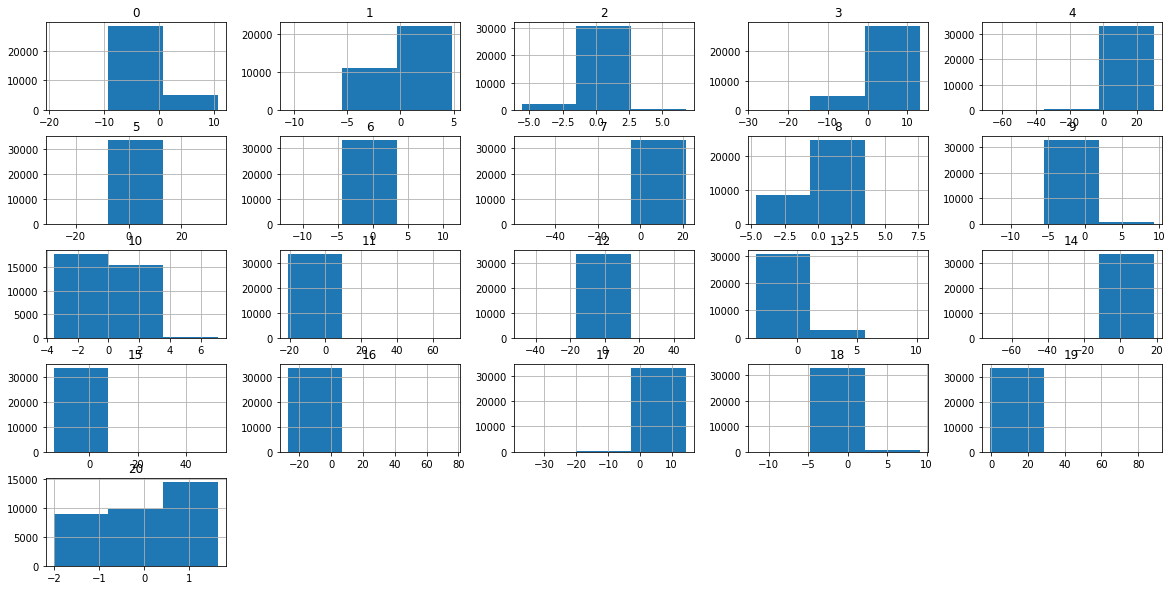

In [84]:
hist = pd.DataFrame(X_scaled).hist(bins=3,figsize=(20, 10))

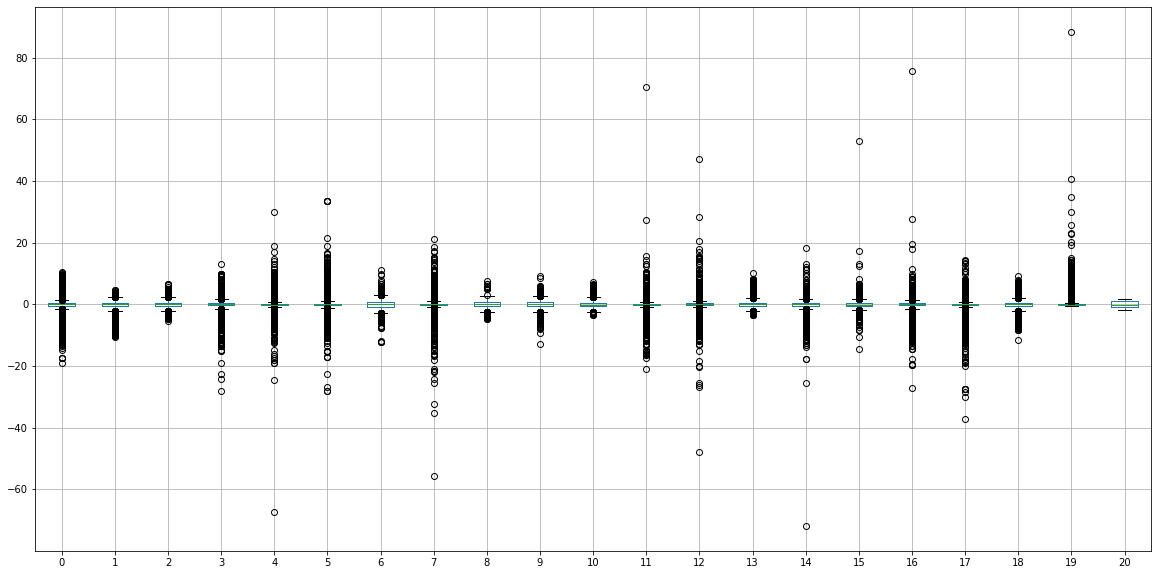

In [88]:
boxplot = pd.DataFrame(X_scaled).boxplot(figsize=(20, 10))  

In [90]:
X_scaled_new = pd.DataFrame(X_scaled.copy())
X_test_scaled_new = pd.DataFrame(X_test_scaled.copy())
X_scaled_new=X_scaled_new.drop(columns=[4,5,6,7,9,10,11,12,13,14,16,17,19])
X_test_scaled_new=X_test_scaled_new.drop(columns=[4,5,6,7,9,10,11,12,13,14,16,17,19])

mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_scaled_new,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})


/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.87      0.73      0.79        66

    accuracy                           1.00      6659
   macro avg       0.94      0.86      0.90      6659
weighted avg       1.00      1.00      1.00      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.81      0.76      0.78        66

    accuracy                           1.00      6659
   macro avg       0.90      0.88      0.89      6659
weighted avg       1.00      1.00      1.00      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.80      0.73      0.76        66

    accuracy                           1.00      6659
   macro avg       0.90      0.86      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.87      0.80      0.83        65

    accuracy                           1.00      6658
   macro avg       0.93      0.90      0.92      6658
weighted avg       1.00      1.00      1.00      6658

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.85      0.80      0.83        66

    accuracy                           1.00      6658
   macro avg       0.93      0.90      0.91      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score 

29:	learn: 0.0208574	total: 170ms	remaining: 5.51s
30:	learn: 0.0201134	total: 178ms	remaining: 5.56s
31:	learn: 0.0195163	total: 186ms	remaining: 5.62s
32:	learn: 0.0190396	total: 194ms	remaining: 5.7s
33:	learn: 0.0184871	total: 207ms	remaining: 5.89s
34:	learn: 0.0180607	total: 213ms	remaining: 5.88s
35:	learn: 0.0175617	total: 218ms	remaining: 5.84s
36:	learn: 0.0171798	total: 224ms	remaining: 5.82s
37:	learn: 0.0167768	total: 229ms	remaining: 5.79s
38:	learn: 0.0164740	total: 234ms	remaining: 5.78s
39:	learn: 0.0162128	total: 239ms	remaining: 5.74s
40:	learn: 0.0159180	total: 245ms	remaining: 5.73s
41:	learn: 0.0156841	total: 250ms	remaining: 5.71s
42:	learn: 0.0154584	total: 255ms	remaining: 5.68s
43:	learn: 0.0152654	total: 261ms	remaining: 5.66s
44:	learn: 0.0150640	total: 266ms	remaining: 5.64s
45:	learn: 0.0149280	total: 271ms	remaining: 5.62s
46:	learn: 0.0147952	total: 276ms	remaining: 5.6s
47:	learn: 0.0146448	total: 281ms	remaining: 5.58s
48:	learn: 0.0144728	total: 286ms

189:	learn: 0.0092107	total: 2.07s	remaining: 8.83s
190:	learn: 0.0092008	total: 2.08s	remaining: 8.79s
191:	learn: 0.0091892	total: 2.08s	remaining: 8.77s
192:	learn: 0.0091651	total: 2.09s	remaining: 8.74s
193:	learn: 0.0091525	total: 2.1s	remaining: 8.72s
194:	learn: 0.0091394	total: 2.11s	remaining: 8.7s
195:	learn: 0.0091301	total: 2.11s	remaining: 8.67s
196:	learn: 0.0091174	total: 2.13s	remaining: 8.68s
197:	learn: 0.0090820	total: 2.13s	remaining: 8.64s
198:	learn: 0.0090540	total: 2.14s	remaining: 8.61s
199:	learn: 0.0090101	total: 2.14s	remaining: 8.58s
200:	learn: 0.0089842	total: 2.15s	remaining: 8.55s
201:	learn: 0.0089755	total: 2.15s	remaining: 8.51s
202:	learn: 0.0089367	total: 2.16s	remaining: 8.49s
203:	learn: 0.0089154	total: 2.17s	remaining: 8.46s
204:	learn: 0.0088964	total: 2.17s	remaining: 8.43s
205:	learn: 0.0088850	total: 2.18s	remaining: 8.39s
206:	learn: 0.0088761	total: 2.18s	remaining: 8.36s
207:	learn: 0.0088578	total: 2.19s	remaining: 8.33s
208:	learn: 0.

355:	learn: 0.0066581	total: 3.27s	remaining: 5.92s
356:	learn: 0.0066549	total: 3.27s	remaining: 5.9s
357:	learn: 0.0066523	total: 3.28s	remaining: 5.88s
358:	learn: 0.0066404	total: 3.29s	remaining: 5.87s
359:	learn: 0.0066279	total: 3.3s	remaining: 5.86s
360:	learn: 0.0066222	total: 3.31s	remaining: 5.85s
361:	learn: 0.0066093	total: 3.31s	remaining: 5.83s
362:	learn: 0.0066067	total: 3.32s	remaining: 5.82s
363:	learn: 0.0065896	total: 3.33s	remaining: 5.82s
364:	learn: 0.0065843	total: 3.34s	remaining: 5.81s
365:	learn: 0.0065666	total: 3.35s	remaining: 5.8s
366:	learn: 0.0065642	total: 3.36s	remaining: 5.79s
367:	learn: 0.0065512	total: 3.37s	remaining: 5.78s
368:	learn: 0.0065461	total: 3.37s	remaining: 5.77s
369:	learn: 0.0065374	total: 3.38s	remaining: 5.75s
370:	learn: 0.0065351	total: 3.38s	remaining: 5.74s
371:	learn: 0.0065106	total: 3.39s	remaining: 5.72s
372:	learn: 0.0064897	total: 3.39s	remaining: 5.71s
373:	learn: 0.0064850	total: 3.4s	remaining: 5.69s
374:	learn: 0.00

536:	learn: 0.0049993	total: 4.46s	remaining: 3.85s
537:	learn: 0.0049969	total: 4.48s	remaining: 3.84s
538:	learn: 0.0049956	total: 4.49s	remaining: 3.84s
539:	learn: 0.0049787	total: 4.49s	remaining: 3.83s
540:	learn: 0.0049755	total: 4.51s	remaining: 3.82s
541:	learn: 0.0049703	total: 4.52s	remaining: 3.82s
542:	learn: 0.0049628	total: 4.53s	remaining: 3.81s
543:	learn: 0.0049551	total: 4.55s	remaining: 3.81s
544:	learn: 0.0049536	total: 4.55s	remaining: 3.8s
545:	learn: 0.0049430	total: 4.57s	remaining: 3.8s
546:	learn: 0.0049363	total: 4.58s	remaining: 3.79s
547:	learn: 0.0049298	total: 4.59s	remaining: 3.79s
548:	learn: 0.0049213	total: 4.6s	remaining: 3.78s
549:	learn: 0.0049189	total: 4.61s	remaining: 3.77s
550:	learn: 0.0049088	total: 4.63s	remaining: 3.77s
551:	learn: 0.0048947	total: 4.64s	remaining: 3.76s
552:	learn: 0.0048918	total: 4.64s	remaining: 3.75s
553:	learn: 0.0048811	total: 4.65s	remaining: 3.74s
554:	learn: 0.0048692	total: 4.65s	remaining: 3.73s
555:	learn: 0.0

710:	learn: 0.0038891	total: 6.31s	remaining: 2.56s
711:	learn: 0.0038850	total: 6.33s	remaining: 2.56s
712:	learn: 0.0038813	total: 6.34s	remaining: 2.55s
713:	learn: 0.0038759	total: 6.36s	remaining: 2.55s
714:	learn: 0.0038666	total: 6.37s	remaining: 2.54s
715:	learn: 0.0038615	total: 6.38s	remaining: 2.53s
716:	learn: 0.0038552	total: 6.39s	remaining: 2.52s
717:	learn: 0.0038456	total: 6.41s	remaining: 2.52s
718:	learn: 0.0038421	total: 6.42s	remaining: 2.51s
719:	learn: 0.0038372	total: 6.42s	remaining: 2.5s
720:	learn: 0.0038361	total: 6.43s	remaining: 2.49s
721:	learn: 0.0038261	total: 6.43s	remaining: 2.48s
722:	learn: 0.0038149	total: 6.44s	remaining: 2.47s
723:	learn: 0.0038139	total: 6.44s	remaining: 2.46s
724:	learn: 0.0038113	total: 6.45s	remaining: 2.44s
725:	learn: 0.0038058	total: 6.45s	remaining: 2.44s
726:	learn: 0.0038040	total: 6.46s	remaining: 2.42s
727:	learn: 0.0037991	total: 6.46s	remaining: 2.41s
728:	learn: 0.0037902	total: 6.47s	remaining: 2.4s
729:	learn: 0.

877:	learn: 0.0031031	total: 7.3s	remaining: 1.01s
878:	learn: 0.0030951	total: 7.31s	remaining: 1s
879:	learn: 0.0030906	total: 7.31s	remaining: 997ms
880:	learn: 0.0030862	total: 7.32s	remaining: 989ms
881:	learn: 0.0030795	total: 7.33s	remaining: 981ms
882:	learn: 0.0030733	total: 7.33s	remaining: 972ms
883:	learn: 0.0030705	total: 7.34s	remaining: 963ms
884:	learn: 0.0030652	total: 7.34s	remaining: 955ms
885:	learn: 0.0030611	total: 7.35s	remaining: 946ms
886:	learn: 0.0030590	total: 7.36s	remaining: 937ms
887:	learn: 0.0030574	total: 7.36s	remaining: 928ms
888:	learn: 0.0030537	total: 7.37s	remaining: 920ms
889:	learn: 0.0030528	total: 7.37s	remaining: 911ms
890:	learn: 0.0030513	total: 7.38s	remaining: 902ms
891:	learn: 0.0030506	total: 7.38s	remaining: 893ms
892:	learn: 0.0030459	total: 7.38s	remaining: 885ms
893:	learn: 0.0030436	total: 7.39s	remaining: 876ms
894:	learn: 0.0030418	total: 7.39s	remaining: 868ms
895:	learn: 0.0030362	total: 7.4s	remaining: 859ms
896:	learn: 0.003

32:	learn: 0.0201943	total: 229ms	remaining: 6.7s
33:	learn: 0.0195777	total: 235ms	remaining: 6.68s
34:	learn: 0.0190585	total: 250ms	remaining: 6.91s
35:	learn: 0.0185792	total: 261ms	remaining: 7s
36:	learn: 0.0181874	total: 270ms	remaining: 7.02s
37:	learn: 0.0178040	total: 277ms	remaining: 7s
38:	learn: 0.0174656	total: 283ms	remaining: 6.98s
39:	learn: 0.0171809	total: 291ms	remaining: 6.99s
40:	learn: 0.0169543	total: 298ms	remaining: 6.98s
41:	learn: 0.0167180	total: 305ms	remaining: 6.95s
42:	learn: 0.0164996	total: 311ms	remaining: 6.92s
43:	learn: 0.0162733	total: 317ms	remaining: 6.89s
44:	learn: 0.0160839	total: 323ms	remaining: 6.86s
45:	learn: 0.0159269	total: 330ms	remaining: 6.83s
46:	learn: 0.0157679	total: 336ms	remaining: 6.81s
47:	learn: 0.0156049	total: 343ms	remaining: 6.79s
48:	learn: 0.0154853	total: 348ms	remaining: 6.76s
49:	learn: 0.0153481	total: 354ms	remaining: 6.73s
50:	learn: 0.0152099	total: 361ms	remaining: 6.72s
51:	learn: 0.0150881	total: 368ms	rema

194:	learn: 0.0096685	total: 1.42s	remaining: 5.85s
195:	learn: 0.0096613	total: 1.43s	remaining: 5.85s
196:	learn: 0.0096466	total: 1.44s	remaining: 5.88s
197:	learn: 0.0096275	total: 1.45s	remaining: 5.89s
198:	learn: 0.0096052	total: 1.46s	remaining: 5.88s
199:	learn: 0.0095754	total: 1.47s	remaining: 5.87s
200:	learn: 0.0095679	total: 1.47s	remaining: 5.85s
201:	learn: 0.0095576	total: 1.48s	remaining: 5.83s
202:	learn: 0.0095430	total: 1.48s	remaining: 5.82s
203:	learn: 0.0095262	total: 1.49s	remaining: 5.8s
204:	learn: 0.0095087	total: 1.49s	remaining: 5.79s
205:	learn: 0.0094941	total: 1.5s	remaining: 5.77s
206:	learn: 0.0094870	total: 1.5s	remaining: 5.75s
207:	learn: 0.0094790	total: 1.51s	remaining: 5.74s
208:	learn: 0.0094634	total: 1.51s	remaining: 5.72s
209:	learn: 0.0094335	total: 1.52s	remaining: 5.71s
210:	learn: 0.0093933	total: 1.52s	remaining: 5.7s
211:	learn: 0.0093892	total: 1.53s	remaining: 5.68s
212:	learn: 0.0093729	total: 1.53s	remaining: 5.67s
213:	learn: 0.00

362:	learn: 0.0070294	total: 2.62s	remaining: 4.59s
363:	learn: 0.0070275	total: 2.63s	remaining: 4.6s
364:	learn: 0.0069953	total: 2.64s	remaining: 4.6s
365:	learn: 0.0069833	total: 2.65s	remaining: 4.59s
366:	learn: 0.0069534	total: 2.66s	remaining: 4.59s
367:	learn: 0.0069454	total: 2.67s	remaining: 4.59s
368:	learn: 0.0069169	total: 2.69s	remaining: 4.59s
369:	learn: 0.0069102	total: 2.69s	remaining: 4.58s
370:	learn: 0.0069018	total: 2.71s	remaining: 4.59s
371:	learn: 0.0068751	total: 2.72s	remaining: 4.59s
372:	learn: 0.0068667	total: 2.72s	remaining: 4.58s
373:	learn: 0.0068506	total: 2.73s	remaining: 4.57s
374:	learn: 0.0068253	total: 2.75s	remaining: 4.58s
375:	learn: 0.0068229	total: 2.75s	remaining: 4.57s
376:	learn: 0.0068208	total: 2.76s	remaining: 4.55s
377:	learn: 0.0067971	total: 2.76s	remaining: 4.54s
378:	learn: 0.0067922	total: 2.77s	remaining: 4.54s
379:	learn: 0.0067883	total: 2.77s	remaining: 4.52s
380:	learn: 0.0067744	total: 2.78s	remaining: 4.51s
381:	learn: 0.

530:	learn: 0.0054311	total: 3.83s	remaining: 3.39s
531:	learn: 0.0054280	total: 3.85s	remaining: 3.38s
532:	learn: 0.0054206	total: 3.87s	remaining: 3.39s
533:	learn: 0.0054176	total: 3.88s	remaining: 3.38s
534:	learn: 0.0054154	total: 3.88s	remaining: 3.37s
535:	learn: 0.0054075	total: 3.89s	remaining: 3.37s
536:	learn: 0.0054047	total: 3.9s	remaining: 3.36s
537:	learn: 0.0053984	total: 3.9s	remaining: 3.35s
538:	learn: 0.0053973	total: 3.91s	remaining: 3.35s
539:	learn: 0.0053908	total: 3.92s	remaining: 3.34s
540:	learn: 0.0053885	total: 3.92s	remaining: 3.33s
541:	learn: 0.0053822	total: 3.93s	remaining: 3.32s
542:	learn: 0.0053760	total: 3.94s	remaining: 3.31s
543:	learn: 0.0053739	total: 3.95s	remaining: 3.31s
544:	learn: 0.0053679	total: 3.96s	remaining: 3.3s
545:	learn: 0.0053601	total: 3.96s	remaining: 3.3s
546:	learn: 0.0053553	total: 3.97s	remaining: 3.29s
547:	learn: 0.0053499	total: 3.98s	remaining: 3.28s
548:	learn: 0.0053441	total: 3.98s	remaining: 3.27s
549:	learn: 0.00

697:	learn: 0.0043888	total: 5.03s	remaining: 2.18s
698:	learn: 0.0043808	total: 5.04s	remaining: 2.17s
699:	learn: 0.0043792	total: 5.05s	remaining: 2.16s
700:	learn: 0.0043784	total: 5.05s	remaining: 2.15s
701:	learn: 0.0043765	total: 5.06s	remaining: 2.15s
702:	learn: 0.0043742	total: 5.07s	remaining: 2.14s
703:	learn: 0.0043710	total: 5.08s	remaining: 2.13s
704:	learn: 0.0043692	total: 5.08s	remaining: 2.13s
705:	learn: 0.0043646	total: 5.09s	remaining: 2.12s
706:	learn: 0.0043574	total: 5.09s	remaining: 2.11s
707:	learn: 0.0043480	total: 5.1s	remaining: 2.1s
708:	learn: 0.0043331	total: 5.1s	remaining: 2.1s
709:	learn: 0.0043312	total: 5.11s	remaining: 2.09s
710:	learn: 0.0043269	total: 5.12s	remaining: 2.08s
711:	learn: 0.0043216	total: 5.12s	remaining: 2.07s
712:	learn: 0.0043176	total: 5.13s	remaining: 2.06s
713:	learn: 0.0043138	total: 5.13s	remaining: 2.06s
714:	learn: 0.0043116	total: 5.14s	remaining: 2.05s
715:	learn: 0.0043062	total: 5.14s	remaining: 2.04s
716:	learn: 0.00

859:	learn: 0.0035695	total: 6.02s	remaining: 980ms
860:	learn: 0.0035635	total: 6.03s	remaining: 973ms
861:	learn: 0.0035594	total: 6.03s	remaining: 966ms
862:	learn: 0.0035569	total: 6.04s	remaining: 959ms
863:	learn: 0.0035553	total: 6.05s	remaining: 952ms
864:	learn: 0.0035519	total: 6.05s	remaining: 945ms
865:	learn: 0.0035511	total: 6.07s	remaining: 939ms
866:	learn: 0.0035416	total: 6.07s	remaining: 931ms
867:	learn: 0.0035406	total: 6.08s	remaining: 924ms
868:	learn: 0.0035355	total: 6.08s	remaining: 917ms
869:	learn: 0.0035342	total: 6.09s	remaining: 910ms
870:	learn: 0.0035332	total: 6.09s	remaining: 903ms
871:	learn: 0.0035219	total: 6.1s	remaining: 895ms
872:	learn: 0.0035145	total: 6.11s	remaining: 888ms
873:	learn: 0.0035100	total: 6.11s	remaining: 881ms
874:	learn: 0.0035058	total: 6.12s	remaining: 874ms
875:	learn: 0.0035001	total: 6.12s	remaining: 866ms
876:	learn: 0.0034968	total: 6.13s	remaining: 859ms
877:	learn: 0.0034926	total: 6.13s	remaining: 852ms
878:	learn: 0

20:	learn: 0.0347075	total: 237ms	remaining: 11s
21:	learn: 0.0323242	total: 245ms	remaining: 10.9s
22:	learn: 0.0303895	total: 254ms	remaining: 10.8s
23:	learn: 0.0286020	total: 262ms	remaining: 10.7s
24:	learn: 0.0269769	total: 288ms	remaining: 11.2s
25:	learn: 0.0255485	total: 307ms	remaining: 11.5s
26:	learn: 0.0243123	total: 321ms	remaining: 11.6s
27:	learn: 0.0233779	total: 343ms	remaining: 11.9s
28:	learn: 0.0224790	total: 351ms	remaining: 11.8s
29:	learn: 0.0216588	total: 363ms	remaining: 11.7s
30:	learn: 0.0208642	total: 379ms	remaining: 11.9s
31:	learn: 0.0201837	total: 388ms	remaining: 11.7s
32:	learn: 0.0197009	total: 401ms	remaining: 11.7s
33:	learn: 0.0191657	total: 413ms	remaining: 11.7s
34:	learn: 0.0187586	total: 420ms	remaining: 11.6s
35:	learn: 0.0182777	total: 428ms	remaining: 11.5s
36:	learn: 0.0178875	total: 443ms	remaining: 11.5s
37:	learn: 0.0174991	total: 452ms	remaining: 11.4s
38:	learn: 0.0171953	total: 475ms	remaining: 11.7s
39:	learn: 0.0169371	total: 483ms

189:	learn: 0.0092520	total: 1.64s	remaining: 6.98s
190:	learn: 0.0092391	total: 1.64s	remaining: 6.97s
191:	learn: 0.0092208	total: 1.65s	remaining: 6.96s
192:	learn: 0.0091874	total: 1.66s	remaining: 6.95s
193:	learn: 0.0091695	total: 1.67s	remaining: 6.95s
194:	learn: 0.0091405	total: 1.68s	remaining: 6.94s
195:	learn: 0.0091278	total: 1.69s	remaining: 6.92s
196:	learn: 0.0091133	total: 1.69s	remaining: 6.9s
197:	learn: 0.0090925	total: 1.7s	remaining: 6.88s
198:	learn: 0.0090803	total: 1.7s	remaining: 6.85s
199:	learn: 0.0090586	total: 1.71s	remaining: 6.83s
200:	learn: 0.0090508	total: 1.71s	remaining: 6.81s
201:	learn: 0.0090426	total: 1.72s	remaining: 6.79s
202:	learn: 0.0090325	total: 1.73s	remaining: 6.77s
203:	learn: 0.0090163	total: 1.73s	remaining: 6.75s
204:	learn: 0.0089967	total: 1.74s	remaining: 6.73s
205:	learn: 0.0089823	total: 1.74s	remaining: 6.71s
206:	learn: 0.0089725	total: 1.75s	remaining: 6.7s
207:	learn: 0.0089630	total: 1.75s	remaining: 6.67s
208:	learn: 0.00

351:	learn: 0.0068896	total: 2.84s	remaining: 5.23s
352:	learn: 0.0068773	total: 2.85s	remaining: 5.23s
353:	learn: 0.0068613	total: 2.86s	remaining: 5.22s
354:	learn: 0.0068419	total: 2.88s	remaining: 5.23s
355:	learn: 0.0068365	total: 2.89s	remaining: 5.23s
356:	learn: 0.0068314	total: 2.91s	remaining: 5.24s
357:	learn: 0.0068219	total: 2.92s	remaining: 5.24s
358:	learn: 0.0068123	total: 2.95s	remaining: 5.26s
359:	learn: 0.0067925	total: 2.97s	remaining: 5.28s
360:	learn: 0.0067771	total: 3s	remaining: 5.32s
361:	learn: 0.0067632	total: 3.04s	remaining: 5.36s
362:	learn: 0.0067573	total: 3.07s	remaining: 5.39s
363:	learn: 0.0067519	total: 3.11s	remaining: 5.43s
364:	learn: 0.0067481	total: 3.12s	remaining: 5.43s
365:	learn: 0.0067424	total: 3.16s	remaining: 5.47s
366:	learn: 0.0067374	total: 3.19s	remaining: 5.51s
367:	learn: 0.0067250	total: 3.24s	remaining: 5.56s
368:	learn: 0.0067164	total: 3.28s	remaining: 5.61s
369:	learn: 0.0067096	total: 3.32s	remaining: 5.66s
370:	learn: 0.0

529:	learn: 0.0052936	total: 4.89s	remaining: 4.34s
530:	learn: 0.0052855	total: 4.9s	remaining: 4.33s
531:	learn: 0.0052797	total: 4.91s	remaining: 4.32s
532:	learn: 0.0052711	total: 4.91s	remaining: 4.3s
533:	learn: 0.0052583	total: 4.92s	remaining: 4.3s
534:	learn: 0.0052511	total: 4.93s	remaining: 4.29s
535:	learn: 0.0052469	total: 4.94s	remaining: 4.28s
536:	learn: 0.0052400	total: 4.95s	remaining: 4.27s
537:	learn: 0.0052355	total: 4.96s	remaining: 4.26s
538:	learn: 0.0052301	total: 4.97s	remaining: 4.25s
539:	learn: 0.0052244	total: 4.97s	remaining: 4.24s
540:	learn: 0.0052176	total: 4.98s	remaining: 4.22s
541:	learn: 0.0051973	total: 4.99s	remaining: 4.21s
542:	learn: 0.0051921	total: 4.99s	remaining: 4.2s
543:	learn: 0.0051889	total: 5s	remaining: 4.19s
544:	learn: 0.0051863	total: 5s	remaining: 4.18s
545:	learn: 0.0051747	total: 5.01s	remaining: 4.17s
546:	learn: 0.0051696	total: 5.02s	remaining: 4.15s
547:	learn: 0.0051571	total: 5.02s	remaining: 4.14s
548:	learn: 0.0051463	

691:	learn: 0.0041838	total: 6.33s	remaining: 2.82s
692:	learn: 0.0041791	total: 6.38s	remaining: 2.83s
693:	learn: 0.0041644	total: 6.4s	remaining: 2.82s
694:	learn: 0.0041622	total: 6.42s	remaining: 2.82s
695:	learn: 0.0041599	total: 6.45s	remaining: 2.82s
696:	learn: 0.0041499	total: 6.49s	remaining: 2.82s
697:	learn: 0.0041431	total: 6.51s	remaining: 2.81s
698:	learn: 0.0041353	total: 6.52s	remaining: 2.81s
699:	learn: 0.0041194	total: 6.53s	remaining: 2.8s
700:	learn: 0.0041099	total: 6.56s	remaining: 2.8s
701:	learn: 0.0041065	total: 6.58s	remaining: 2.79s
702:	learn: 0.0041000	total: 6.61s	remaining: 2.79s
703:	learn: 0.0040927	total: 6.64s	remaining: 2.79s
704:	learn: 0.0040852	total: 6.66s	remaining: 2.79s
705:	learn: 0.0040772	total: 6.72s	remaining: 2.8s
706:	learn: 0.0040694	total: 6.76s	remaining: 2.8s
707:	learn: 0.0040565	total: 6.83s	remaining: 2.81s
708:	learn: 0.0040489	total: 6.88s	remaining: 2.82s
709:	learn: 0.0040433	total: 6.94s	remaining: 2.83s
710:	learn: 0.004

862:	learn: 0.0032596	total: 8.12s	remaining: 1.29s
863:	learn: 0.0032567	total: 8.13s	remaining: 1.28s
864:	learn: 0.0032539	total: 8.14s	remaining: 1.27s
865:	learn: 0.0032512	total: 8.14s	remaining: 1.26s
866:	learn: 0.0032466	total: 8.15s	remaining: 1.25s
867:	learn: 0.0032421	total: 8.16s	remaining: 1.24s
868:	learn: 0.0032401	total: 8.16s	remaining: 1.23s
869:	learn: 0.0032342	total: 8.17s	remaining: 1.22s
870:	learn: 0.0032330	total: 8.19s	remaining: 1.21s
871:	learn: 0.0032250	total: 8.19s	remaining: 1.2s
872:	learn: 0.0032184	total: 8.2s	remaining: 1.19s
873:	learn: 0.0032003	total: 8.2s	remaining: 1.18s
874:	learn: 0.0031975	total: 8.21s	remaining: 1.17s
875:	learn: 0.0031957	total: 8.22s	remaining: 1.16s
876:	learn: 0.0031888	total: 8.22s	remaining: 1.15s
877:	learn: 0.0031829	total: 8.23s	remaining: 1.14s
878:	learn: 0.0031799	total: 8.23s	remaining: 1.13s
879:	learn: 0.0031770	total: 8.24s	remaining: 1.12s
880:	learn: 0.0031727	total: 8.24s	remaining: 1.11s
881:	learn: 0.0

25:	learn: 0.0269857	total: 220ms	remaining: 8.26s
26:	learn: 0.0256627	total: 228ms	remaining: 8.21s
27:	learn: 0.0244316	total: 236ms	remaining: 8.18s
28:	learn: 0.0233895	total: 246ms	remaining: 8.24s
29:	learn: 0.0224295	total: 258ms	remaining: 8.34s
30:	learn: 0.0216667	total: 274ms	remaining: 8.58s
31:	learn: 0.0210050	total: 292ms	remaining: 8.84s
32:	learn: 0.0204208	total: 299ms	remaining: 8.75s
33:	learn: 0.0199142	total: 305ms	remaining: 8.65s
34:	learn: 0.0194691	total: 310ms	remaining: 8.56s
35:	learn: 0.0190494	total: 316ms	remaining: 8.46s
36:	learn: 0.0186667	total: 322ms	remaining: 8.37s
37:	learn: 0.0183249	total: 328ms	remaining: 8.31s
38:	learn: 0.0179508	total: 334ms	remaining: 8.23s
39:	learn: 0.0176686	total: 340ms	remaining: 8.15s
40:	learn: 0.0173917	total: 346ms	remaining: 8.09s
41:	learn: 0.0171612	total: 352ms	remaining: 8.02s
42:	learn: 0.0169879	total: 357ms	remaining: 7.96s
43:	learn: 0.0167491	total: 363ms	remaining: 7.89s
44:	learn: 0.0165375	total: 369

203:	learn: 0.0097112	total: 1.89s	remaining: 7.36s
204:	learn: 0.0096941	total: 1.91s	remaining: 7.4s
205:	learn: 0.0096796	total: 1.92s	remaining: 7.41s
206:	learn: 0.0096356	total: 1.93s	remaining: 7.41s
207:	learn: 0.0096119	total: 1.97s	remaining: 7.5s
208:	learn: 0.0095851	total: 2.01s	remaining: 7.6s
209:	learn: 0.0095769	total: 2.04s	remaining: 7.67s
210:	learn: 0.0095384	total: 2.06s	remaining: 7.68s
211:	learn: 0.0095174	total: 2.1s	remaining: 7.8s
212:	learn: 0.0094695	total: 2.13s	remaining: 7.86s
213:	learn: 0.0094353	total: 2.16s	remaining: 7.92s
214:	learn: 0.0094069	total: 2.17s	remaining: 7.94s
215:	learn: 0.0093722	total: 2.18s	remaining: 7.92s
216:	learn: 0.0093462	total: 2.19s	remaining: 7.89s
217:	learn: 0.0093185	total: 2.19s	remaining: 7.87s
218:	learn: 0.0092997	total: 2.2s	remaining: 7.85s
219:	learn: 0.0092905	total: 2.21s	remaining: 7.82s
220:	learn: 0.0092581	total: 2.21s	remaining: 7.8s
221:	learn: 0.0092455	total: 2.22s	remaining: 7.78s
222:	learn: 0.00921

370:	learn: 0.0073102	total: 4.16s	remaining: 7.04s
371:	learn: 0.0073014	total: 4.17s	remaining: 7.05s
372:	learn: 0.0072949	total: 4.18s	remaining: 7.03s
373:	learn: 0.0072835	total: 4.21s	remaining: 7.04s
374:	learn: 0.0072775	total: 4.24s	remaining: 7.07s
375:	learn: 0.0072713	total: 4.26s	remaining: 7.07s
376:	learn: 0.0072662	total: 4.3s	remaining: 7.1s
377:	learn: 0.0072613	total: 4.31s	remaining: 7.09s
378:	learn: 0.0072529	total: 4.32s	remaining: 7.08s
379:	learn: 0.0072501	total: 4.34s	remaining: 7.08s
380:	learn: 0.0072325	total: 4.35s	remaining: 7.07s
381:	learn: 0.0072095	total: 4.36s	remaining: 7.05s
382:	learn: 0.0072041	total: 4.37s	remaining: 7.04s
383:	learn: 0.0071983	total: 4.38s	remaining: 7.02s
384:	learn: 0.0071903	total: 4.39s	remaining: 7.02s
385:	learn: 0.0071850	total: 4.4s	remaining: 7s
386:	learn: 0.0071766	total: 4.41s	remaining: 6.98s
387:	learn: 0.0071716	total: 4.41s	remaining: 6.96s
388:	learn: 0.0071547	total: 4.42s	remaining: 6.94s
389:	learn: 0.0071

547:	learn: 0.0056912	total: 5.56s	remaining: 4.59s
548:	learn: 0.0056864	total: 5.57s	remaining: 4.58s
549:	learn: 0.0056732	total: 5.58s	remaining: 4.57s
550:	learn: 0.0056689	total: 5.59s	remaining: 4.55s
551:	learn: 0.0056598	total: 5.6s	remaining: 4.54s
552:	learn: 0.0056511	total: 5.61s	remaining: 4.53s
553:	learn: 0.0056444	total: 5.61s	remaining: 4.52s
554:	learn: 0.0056396	total: 5.62s	remaining: 4.5s
555:	learn: 0.0056310	total: 5.62s	remaining: 4.49s
556:	learn: 0.0056272	total: 5.63s	remaining: 4.48s
557:	learn: 0.0056214	total: 5.63s	remaining: 4.46s
558:	learn: 0.0056104	total: 5.64s	remaining: 4.45s
559:	learn: 0.0056060	total: 5.64s	remaining: 4.43s
560:	learn: 0.0055694	total: 5.65s	remaining: 4.42s
561:	learn: 0.0055607	total: 5.65s	remaining: 4.41s
562:	learn: 0.0055537	total: 5.66s	remaining: 4.39s
563:	learn: 0.0055462	total: 5.67s	remaining: 4.38s
564:	learn: 0.0055424	total: 5.67s	remaining: 4.37s
565:	learn: 0.0055341	total: 5.68s	remaining: 4.35s
566:	learn: 0.

709:	learn: 0.0043720	total: 6.97s	remaining: 2.85s
710:	learn: 0.0043618	total: 7s	remaining: 2.85s
711:	learn: 0.0043584	total: 7.01s	remaining: 2.84s
712:	learn: 0.0043523	total: 7.02s	remaining: 2.83s
713:	learn: 0.0043470	total: 7.03s	remaining: 2.82s
714:	learn: 0.0043421	total: 7.06s	remaining: 2.81s
715:	learn: 0.0043301	total: 7.09s	remaining: 2.81s
716:	learn: 0.0043188	total: 7.1s	remaining: 2.8s
717:	learn: 0.0043150	total: 7.12s	remaining: 2.8s
718:	learn: 0.0043138	total: 7.14s	remaining: 2.79s
719:	learn: 0.0043080	total: 7.14s	remaining: 2.78s
720:	learn: 0.0042982	total: 7.15s	remaining: 2.77s
721:	learn: 0.0042898	total: 7.15s	remaining: 2.75s
722:	learn: 0.0042861	total: 7.16s	remaining: 2.74s
723:	learn: 0.0042826	total: 7.17s	remaining: 2.73s
724:	learn: 0.0042736	total: 7.17s	remaining: 2.72s
725:	learn: 0.0042698	total: 7.18s	remaining: 2.71s
726:	learn: 0.0042664	total: 7.19s	remaining: 2.7s
727:	learn: 0.0042600	total: 7.2s	remaining: 2.69s
728:	learn: 0.004256

885:	learn: 0.0034764	total: 8.15s	remaining: 1.05s
886:	learn: 0.0034727	total: 8.16s	remaining: 1.04s
887:	learn: 0.0034670	total: 8.17s	remaining: 1.03s
888:	learn: 0.0034612	total: 8.18s	remaining: 1.02s
889:	learn: 0.0034588	total: 8.18s	remaining: 1.01s
890:	learn: 0.0034548	total: 8.2s	remaining: 1s
891:	learn: 0.0034450	total: 8.2s	remaining: 993ms
892:	learn: 0.0034414	total: 8.21s	remaining: 984ms
893:	learn: 0.0034383	total: 8.21s	remaining: 974ms
894:	learn: 0.0034309	total: 8.22s	remaining: 964ms
895:	learn: 0.0034287	total: 8.22s	remaining: 955ms
896:	learn: 0.0034242	total: 8.23s	remaining: 945ms
897:	learn: 0.0034205	total: 8.24s	remaining: 936ms
898:	learn: 0.0034175	total: 8.24s	remaining: 926ms
899:	learn: 0.0034146	total: 8.25s	remaining: 916ms
900:	learn: 0.0034131	total: 8.25s	remaining: 907ms
901:	learn: 0.0034077	total: 8.26s	remaining: 897ms
902:	learn: 0.0034026	total: 8.26s	remaining: 888ms
903:	learn: 0.0033981	total: 8.27s	remaining: 878ms
904:	learn: 0.003

55:	learn: 0.0146566	total: 426ms	remaining: 7.18s
56:	learn: 0.0145595	total: 441ms	remaining: 7.29s
57:	learn: 0.0144463	total: 452ms	remaining: 7.34s
58:	learn: 0.0143625	total: 459ms	remaining: 7.32s
59:	learn: 0.0142675	total: 472ms	remaining: 7.39s
60:	learn: 0.0141972	total: 477ms	remaining: 7.35s
61:	learn: 0.0141609	total: 483ms	remaining: 7.3s
62:	learn: 0.0140486	total: 489ms	remaining: 7.27s
63:	learn: 0.0139862	total: 496ms	remaining: 7.25s
64:	learn: 0.0139041	total: 502ms	remaining: 7.22s
65:	learn: 0.0138663	total: 509ms	remaining: 7.2s
66:	learn: 0.0137419	total: 515ms	remaining: 7.18s
67:	learn: 0.0136692	total: 521ms	remaining: 7.15s
68:	learn: 0.0136276	total: 527ms	remaining: 7.12s
69:	learn: 0.0135507	total: 533ms	remaining: 7.08s
70:	learn: 0.0134497	total: 540ms	remaining: 7.06s
71:	learn: 0.0133664	total: 546ms	remaining: 7.04s
72:	learn: 0.0132774	total: 553ms	remaining: 7.02s
73:	learn: 0.0132530	total: 558ms	remaining: 6.98s
74:	learn: 0.0131859	total: 564ms

225:	learn: 0.0084596	total: 1.63s	remaining: 5.57s
226:	learn: 0.0084416	total: 1.63s	remaining: 5.56s
227:	learn: 0.0084238	total: 1.64s	remaining: 5.54s
228:	learn: 0.0084071	total: 1.65s	remaining: 5.54s
229:	learn: 0.0083826	total: 1.65s	remaining: 5.54s
230:	learn: 0.0083766	total: 1.66s	remaining: 5.54s
231:	learn: 0.0083541	total: 1.67s	remaining: 5.53s
232:	learn: 0.0083399	total: 1.68s	remaining: 5.53s
233:	learn: 0.0083008	total: 1.69s	remaining: 5.54s
234:	learn: 0.0082945	total: 1.7s	remaining: 5.52s
235:	learn: 0.0082841	total: 1.7s	remaining: 5.52s
236:	learn: 0.0082731	total: 1.71s	remaining: 5.5s
237:	learn: 0.0082588	total: 1.72s	remaining: 5.49s
238:	learn: 0.0082278	total: 1.72s	remaining: 5.49s
239:	learn: 0.0082151	total: 1.73s	remaining: 5.47s
240:	learn: 0.0082022	total: 1.73s	remaining: 5.46s
241:	learn: 0.0081924	total: 1.74s	remaining: 5.45s
242:	learn: 0.0081720	total: 1.75s	remaining: 5.44s
243:	learn: 0.0081461	total: 1.75s	remaining: 5.43s
244:	learn: 0.0

407:	learn: 0.0062105	total: 2.81s	remaining: 4.08s
408:	learn: 0.0062036	total: 2.82s	remaining: 4.08s
409:	learn: 0.0061928	total: 2.83s	remaining: 4.07s
410:	learn: 0.0061821	total: 2.83s	remaining: 4.06s
411:	learn: 0.0061637	total: 2.84s	remaining: 4.05s
412:	learn: 0.0061581	total: 2.85s	remaining: 4.05s
413:	learn: 0.0061480	total: 2.86s	remaining: 4.05s
414:	learn: 0.0061402	total: 2.87s	remaining: 4.04s
415:	learn: 0.0061325	total: 2.87s	remaining: 4.03s
416:	learn: 0.0061231	total: 2.88s	remaining: 4.03s
417:	learn: 0.0061179	total: 2.88s	remaining: 4.02s
418:	learn: 0.0061104	total: 2.89s	remaining: 4.01s
419:	learn: 0.0060908	total: 2.9s	remaining: 4s
420:	learn: 0.0060680	total: 2.9s	remaining: 3.99s
421:	learn: 0.0060607	total: 2.91s	remaining: 3.99s
422:	learn: 0.0060536	total: 2.92s	remaining: 3.98s
423:	learn: 0.0060461	total: 2.92s	remaining: 3.97s
424:	learn: 0.0060435	total: 2.93s	remaining: 3.96s
425:	learn: 0.0060365	total: 2.94s	remaining: 3.96s
426:	learn: 0.006

570:	learn: 0.0048699	total: 4.23s	remaining: 3.18s
571:	learn: 0.0048472	total: 4.27s	remaining: 3.19s
572:	learn: 0.0048323	total: 4.29s	remaining: 3.19s
573:	learn: 0.0048291	total: 4.31s	remaining: 3.2s
574:	learn: 0.0048150	total: 4.32s	remaining: 3.19s
575:	learn: 0.0048118	total: 4.33s	remaining: 3.19s
576:	learn: 0.0047989	total: 4.33s	remaining: 3.18s
577:	learn: 0.0047919	total: 4.34s	remaining: 3.17s
578:	learn: 0.0047876	total: 4.35s	remaining: 3.16s
579:	learn: 0.0047848	total: 4.35s	remaining: 3.15s
580:	learn: 0.0047818	total: 4.36s	remaining: 3.14s
581:	learn: 0.0047768	total: 4.37s	remaining: 3.14s
582:	learn: 0.0047705	total: 4.37s	remaining: 3.13s
583:	learn: 0.0047657	total: 4.38s	remaining: 3.12s
584:	learn: 0.0047616	total: 4.39s	remaining: 3.11s
585:	learn: 0.0047532	total: 4.39s	remaining: 3.1s
586:	learn: 0.0047470	total: 4.4s	remaining: 3.1s
587:	learn: 0.0047430	total: 4.41s	remaining: 3.09s
588:	learn: 0.0047339	total: 4.41s	remaining: 3.08s
589:	learn: 0.00

731:	learn: 0.0038577	total: 5.41s	remaining: 1.98s
732:	learn: 0.0038521	total: 5.41s	remaining: 1.97s
733:	learn: 0.0038511	total: 5.42s	remaining: 1.96s
734:	learn: 0.0038479	total: 5.43s	remaining: 1.96s
735:	learn: 0.0038449	total: 5.43s	remaining: 1.95s
736:	learn: 0.0038381	total: 5.44s	remaining: 1.94s
737:	learn: 0.0038354	total: 5.45s	remaining: 1.93s
738:	learn: 0.0038291	total: 5.46s	remaining: 1.93s
739:	learn: 0.0038219	total: 5.47s	remaining: 1.92s
740:	learn: 0.0038190	total: 5.48s	remaining: 1.91s
741:	learn: 0.0038129	total: 5.48s	remaining: 1.91s
742:	learn: 0.0038067	total: 5.49s	remaining: 1.9s
743:	learn: 0.0038058	total: 5.49s	remaining: 1.89s
744:	learn: 0.0038029	total: 5.5s	remaining: 1.88s
745:	learn: 0.0037998	total: 5.51s	remaining: 1.87s
746:	learn: 0.0037948	total: 5.51s	remaining: 1.87s
747:	learn: 0.0037843	total: 5.52s	remaining: 1.86s
748:	learn: 0.0037834	total: 5.52s	remaining: 1.85s
749:	learn: 0.0037826	total: 5.53s	remaining: 1.84s
750:	learn: 0.

914:	learn: 0.0029618	total: 6.59s	remaining: 612ms
915:	learn: 0.0029590	total: 6.6s	remaining: 605ms
916:	learn: 0.0029569	total: 6.61s	remaining: 598ms
917:	learn: 0.0029523	total: 6.62s	remaining: 591ms
918:	learn: 0.0029484	total: 6.62s	remaining: 584ms
919:	learn: 0.0029431	total: 6.64s	remaining: 577ms
920:	learn: 0.0029403	total: 6.65s	remaining: 571ms
921:	learn: 0.0029343	total: 6.66s	remaining: 563ms
922:	learn: 0.0029318	total: 6.66s	remaining: 556ms
923:	learn: 0.0029278	total: 6.67s	remaining: 549ms
924:	learn: 0.0029240	total: 6.67s	remaining: 541ms
925:	learn: 0.0029193	total: 6.68s	remaining: 534ms
926:	learn: 0.0029188	total: 6.69s	remaining: 527ms
927:	learn: 0.0029169	total: 6.69s	remaining: 519ms
928:	learn: 0.0029119	total: 6.7s	remaining: 512ms
929:	learn: 0.0029048	total: 6.71s	remaining: 505ms
930:	learn: 0.0029005	total: 6.71s	remaining: 498ms
931:	learn: 0.0028968	total: 6.72s	remaining: 490ms
932:	learn: 0.0028958	total: 6.72s	remaining: 483ms
933:	learn: 0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.74      0.83        66

    accuracy                           1.00      6659
   macro avg       0.97      0.87      0.91      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.98      0.74      0.84        65

    accuracy                           1.00      6658
   macro avg       0.99      0.87      0.92      6658
weighted avg       1.00      1.00      1.00      6658

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.98      0.77      0.86        66

    accuracy                           1.00      6658
   macro avg       0.99      0.89      0.93      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score 

In [91]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.898712               0.013655
1          RandomForest                0.909445               0.012807
2              AdaBoost                0.876275               0.010126
3  HistGradientBoosting                0.904812               0.017070
4              CatBoost                0.924088               0.013913
5          DecisionTree                0.862331               0.010846
6                   XGB                0.913009               0.013613

In [92]:
X_scaled_new = pd.DataFrame(X_scaled.copy())
X_test_scaled_new = pd.DataFrame(X_test_scaled.copy())
X_scaled_new=X_scaled_new.drop(columns=[5,6,7,9,10,11,12,13,14,16,17])
X_test_scaled_new=X_test_scaled_new.drop(columns=[5,6,7,9,10,11,12,13,14,16,17])

mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_scaled_new,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.70      0.74      0.72        66

    accuracy                           0.99      6659
   macro avg       0.85      0.87      0.86      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.78      0.76      0.77        66

    accuracy                           1.00      6659
   macro avg       0.89      0.88      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.74      0.76      0.75        66

    accuracy                           0.99      6659
   macro avg       0.87      0.88      0.87      6659
weighted avg       0.99      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.78      0.80      0.79        65

    accuracy                           1.00      6658
   macro avg       0.89      0.90      0.89      6658
weighted avg       1.00      1.00      1.00      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.76      0.80      0.78        66

    accuracy                           1.00      6658
   macro avg       0.88      0.90      0.89      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.85885276 0.88347799 0.87184489 0.8928775  0.88856779]
the mean of f1-scores                : 0.8791241853771306
the std  of f1-scores                : 0.012338638268721983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.88      0.68      0.77        66

    accuracy                           1.00      6659
   macro avg       0.94      0.84      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.98

14:	learn: 0.0625335	total: 163ms	remaining: 10.7s
15:	learn: 0.0556915	total: 170ms	remaining: 10.4s
16:	learn: 0.0501041	total: 188ms	remaining: 10.9s
17:	learn: 0.0453906	total: 198ms	remaining: 10.8s
18:	learn: 0.0412763	total: 207ms	remaining: 10.7s
19:	learn: 0.0377941	total: 224ms	remaining: 11s
20:	learn: 0.0348777	total: 232ms	remaining: 10.8s
21:	learn: 0.0323497	total: 240ms	remaining: 10.7s
22:	learn: 0.0301589	total: 253ms	remaining: 10.7s
23:	learn: 0.0284607	total: 260ms	remaining: 10.6s
24:	learn: 0.0268795	total: 266ms	remaining: 10.4s
25:	learn: 0.0254288	total: 276ms	remaining: 10.3s
26:	learn: 0.0238948	total: 282ms	remaining: 10.1s
27:	learn: 0.0228456	total: 296ms	remaining: 10.3s
28:	learn: 0.0219266	total: 307ms	remaining: 10.3s
29:	learn: 0.0211451	total: 316ms	remaining: 10.2s
30:	learn: 0.0204747	total: 323ms	remaining: 10.1s
31:	learn: 0.0195556	total: 341ms	remaining: 10.3s
32:	learn: 0.0190600	total: 347ms	remaining: 10.2s
33:	learn: 0.0184855	total: 358ms

193:	learn: 0.0087845	total: 1.98s	remaining: 8.24s
194:	learn: 0.0087630	total: 2s	remaining: 8.27s
195:	learn: 0.0087419	total: 2.02s	remaining: 8.28s
196:	learn: 0.0087202	total: 2.04s	remaining: 8.31s
197:	learn: 0.0086930	total: 2.05s	remaining: 8.32s
198:	learn: 0.0086347	total: 2.07s	remaining: 8.33s
199:	learn: 0.0085999	total: 2.08s	remaining: 8.34s
200:	learn: 0.0085626	total: 2.1s	remaining: 8.35s
201:	learn: 0.0085387	total: 2.13s	remaining: 8.41s
202:	learn: 0.0085157	total: 2.14s	remaining: 8.42s
203:	learn: 0.0084985	total: 2.16s	remaining: 8.41s
204:	learn: 0.0084837	total: 2.16s	remaining: 8.39s
205:	learn: 0.0084662	total: 2.17s	remaining: 8.37s
206:	learn: 0.0084392	total: 2.19s	remaining: 8.39s
207:	learn: 0.0084096	total: 2.2s	remaining: 8.36s
208:	learn: 0.0083940	total: 2.21s	remaining: 8.35s
209:	learn: 0.0083742	total: 2.21s	remaining: 8.32s
210:	learn: 0.0083110	total: 2.23s	remaining: 8.32s
211:	learn: 0.0082912	total: 2.24s	remaining: 8.32s
212:	learn: 0.008

356:	learn: 0.0058515	total: 4.02s	remaining: 7.24s
357:	learn: 0.0058467	total: 4.03s	remaining: 7.23s
358:	learn: 0.0058260	total: 4.05s	remaining: 7.23s
359:	learn: 0.0058219	total: 4.06s	remaining: 7.21s
360:	learn: 0.0058174	total: 4.06s	remaining: 7.19s
361:	learn: 0.0058005	total: 4.08s	remaining: 7.18s
362:	learn: 0.0057866	total: 4.08s	remaining: 7.17s
363:	learn: 0.0057732	total: 4.09s	remaining: 7.14s
364:	learn: 0.0057397	total: 4.1s	remaining: 7.13s
365:	learn: 0.0057354	total: 4.11s	remaining: 7.11s
366:	learn: 0.0057039	total: 4.12s	remaining: 7.11s
367:	learn: 0.0056917	total: 4.13s	remaining: 7.1s
368:	learn: 0.0056883	total: 4.14s	remaining: 7.08s
369:	learn: 0.0056676	total: 4.15s	remaining: 7.07s
370:	learn: 0.0056593	total: 4.17s	remaining: 7.07s
371:	learn: 0.0056516	total: 4.18s	remaining: 7.06s
372:	learn: 0.0056327	total: 4.2s	remaining: 7.05s
373:	learn: 0.0056285	total: 4.21s	remaining: 7.04s
374:	learn: 0.0056150	total: 4.22s	remaining: 7.03s
375:	learn: 0.0

517:	learn: 0.0044142	total: 5.83s	remaining: 5.42s
518:	learn: 0.0043955	total: 5.84s	remaining: 5.41s
519:	learn: 0.0043868	total: 5.84s	remaining: 5.39s
520:	learn: 0.0043761	total: 5.86s	remaining: 5.39s
521:	learn: 0.0043731	total: 5.87s	remaining: 5.38s
522:	learn: 0.0043656	total: 5.88s	remaining: 5.36s
523:	learn: 0.0043612	total: 5.89s	remaining: 5.35s
524:	learn: 0.0043580	total: 5.91s	remaining: 5.34s
525:	learn: 0.0043404	total: 5.91s	remaining: 5.33s
526:	learn: 0.0043381	total: 5.92s	remaining: 5.31s
527:	learn: 0.0043317	total: 5.93s	remaining: 5.3s
528:	learn: 0.0043284	total: 5.94s	remaining: 5.29s
529:	learn: 0.0043220	total: 5.95s	remaining: 5.28s
530:	learn: 0.0043178	total: 5.96s	remaining: 5.26s
531:	learn: 0.0043092	total: 5.97s	remaining: 5.25s
532:	learn: 0.0043049	total: 5.98s	remaining: 5.24s
533:	learn: 0.0042996	total: 5.99s	remaining: 5.23s
534:	learn: 0.0042956	total: 6s	remaining: 5.21s
535:	learn: 0.0042927	total: 6.01s	remaining: 5.2s
536:	learn: 0.004

677:	learn: 0.0034144	total: 7.43s	remaining: 3.53s
678:	learn: 0.0034061	total: 7.44s	remaining: 3.52s
679:	learn: 0.0034042	total: 7.45s	remaining: 3.5s
680:	learn: 0.0033963	total: 7.46s	remaining: 3.49s
681:	learn: 0.0033895	total: 7.47s	remaining: 3.48s
682:	learn: 0.0033828	total: 7.49s	remaining: 3.48s
683:	learn: 0.0033779	total: 7.5s	remaining: 3.46s
684:	learn: 0.0033702	total: 7.51s	remaining: 3.45s
685:	learn: 0.0033654	total: 7.53s	remaining: 3.44s
686:	learn: 0.0033609	total: 7.53s	remaining: 3.43s
687:	learn: 0.0033536	total: 7.54s	remaining: 3.42s
688:	learn: 0.0033466	total: 7.56s	remaining: 3.41s
689:	learn: 0.0033445	total: 7.56s	remaining: 3.4s
690:	learn: 0.0033408	total: 7.57s	remaining: 3.38s
691:	learn: 0.0033360	total: 7.58s	remaining: 3.37s
692:	learn: 0.0033313	total: 7.59s	remaining: 3.36s
693:	learn: 0.0033271	total: 7.61s	remaining: 3.36s
694:	learn: 0.0033208	total: 7.64s	remaining: 3.35s
695:	learn: 0.0033169	total: 7.65s	remaining: 3.34s
696:	learn: 0.0

843:	learn: 0.0026510	total: 9.24s	remaining: 1.71s
844:	learn: 0.0026446	total: 9.26s	remaining: 1.7s
845:	learn: 0.0026396	total: 9.27s	remaining: 1.69s
846:	learn: 0.0026320	total: 9.28s	remaining: 1.68s
847:	learn: 0.0026293	total: 9.29s	remaining: 1.67s
848:	learn: 0.0026248	total: 9.3s	remaining: 1.65s
849:	learn: 0.0026205	total: 9.31s	remaining: 1.64s
850:	learn: 0.0026145	total: 9.32s	remaining: 1.63s
851:	learn: 0.0026074	total: 9.34s	remaining: 1.62s
852:	learn: 0.0026038	total: 9.37s	remaining: 1.61s
853:	learn: 0.0026018	total: 9.4s	remaining: 1.61s
854:	learn: 0.0025995	total: 9.45s	remaining: 1.6s
855:	learn: 0.0025954	total: 9.47s	remaining: 1.59s
856:	learn: 0.0025925	total: 9.49s	remaining: 1.58s
857:	learn: 0.0025853	total: 9.52s	remaining: 1.57s
858:	learn: 0.0025844	total: 9.56s	remaining: 1.57s
859:	learn: 0.0025792	total: 9.59s	remaining: 1.56s
860:	learn: 0.0025746	total: 9.63s	remaining: 1.55s
861:	learn: 0.0025715	total: 9.65s	remaining: 1.54s
862:	learn: 0.00

5:	learn: 0.2289419	total: 80.9ms	remaining: 13.4s
6:	learn: 0.1923190	total: 100ms	remaining: 14.2s
7:	learn: 0.1657919	total: 110ms	remaining: 13.6s
8:	learn: 0.1418190	total: 119ms	remaining: 13.1s
9:	learn: 0.1237157	total: 140ms	remaining: 13.9s
10:	learn: 0.1068479	total: 154ms	remaining: 13.9s
11:	learn: 0.0926765	total: 181ms	remaining: 14.9s
12:	learn: 0.0805452	total: 193ms	remaining: 14.7s
13:	learn: 0.0709653	total: 215ms	remaining: 15.2s
14:	learn: 0.0640515	total: 225ms	remaining: 14.8s
15:	learn: 0.0567862	total: 235ms	remaining: 14.4s
16:	learn: 0.0516802	total: 248ms	remaining: 14.3s
17:	learn: 0.0467955	total: 255ms	remaining: 13.9s
18:	learn: 0.0427064	total: 263ms	remaining: 13.6s
19:	learn: 0.0391269	total: 273ms	remaining: 13.4s
20:	learn: 0.0362055	total: 296ms	remaining: 13.8s
21:	learn: 0.0335862	total: 307ms	remaining: 13.6s
22:	learn: 0.0312787	total: 318ms	remaining: 13.5s
23:	learn: 0.0293320	total: 333ms	remaining: 13.5s
24:	learn: 0.0276980	total: 341ms	r

180:	learn: 0.0093376	total: 2.13s	remaining: 9.66s
181:	learn: 0.0093157	total: 2.15s	remaining: 9.65s
182:	learn: 0.0092944	total: 2.15s	remaining: 9.62s
183:	learn: 0.0092750	total: 2.16s	remaining: 9.6s
184:	learn: 0.0092559	total: 2.18s	remaining: 9.59s
185:	learn: 0.0092351	total: 2.18s	remaining: 9.55s
186:	learn: 0.0092247	total: 2.19s	remaining: 9.52s
187:	learn: 0.0092075	total: 2.2s	remaining: 9.49s
188:	learn: 0.0091986	total: 2.21s	remaining: 9.47s
189:	learn: 0.0091525	total: 2.22s	remaining: 9.47s
190:	learn: 0.0091246	total: 2.23s	remaining: 9.44s
191:	learn: 0.0091014	total: 2.24s	remaining: 9.41s
192:	learn: 0.0090630	total: 2.25s	remaining: 9.39s
193:	learn: 0.0090358	total: 2.25s	remaining: 9.37s
194:	learn: 0.0090069	total: 2.26s	remaining: 9.34s
195:	learn: 0.0089752	total: 2.27s	remaining: 9.31s
196:	learn: 0.0089596	total: 2.28s	remaining: 9.28s
197:	learn: 0.0089342	total: 2.29s	remaining: 9.27s
198:	learn: 0.0089068	total: 2.31s	remaining: 9.29s
199:	learn: 0.

347:	learn: 0.0065146	total: 4.17s	remaining: 7.81s
348:	learn: 0.0065051	total: 4.17s	remaining: 7.79s
349:	learn: 0.0064884	total: 4.19s	remaining: 7.78s
350:	learn: 0.0064771	total: 4.2s	remaining: 7.76s
351:	learn: 0.0064715	total: 4.2s	remaining: 7.73s
352:	learn: 0.0064632	total: 4.21s	remaining: 7.72s
353:	learn: 0.0064542	total: 4.22s	remaining: 7.7s
354:	learn: 0.0064425	total: 4.25s	remaining: 7.71s
355:	learn: 0.0064245	total: 4.25s	remaining: 7.69s
356:	learn: 0.0064063	total: 4.29s	remaining: 7.73s
357:	learn: 0.0064010	total: 4.31s	remaining: 7.72s
358:	learn: 0.0063922	total: 4.31s	remaining: 7.7s
359:	learn: 0.0063857	total: 4.32s	remaining: 7.68s
360:	learn: 0.0063806	total: 4.33s	remaining: 7.66s
361:	learn: 0.0063731	total: 4.34s	remaining: 7.64s
362:	learn: 0.0063641	total: 4.35s	remaining: 7.63s
363:	learn: 0.0063559	total: 4.36s	remaining: 7.62s
364:	learn: 0.0063490	total: 4.37s	remaining: 7.6s
365:	learn: 0.0063325	total: 4.38s	remaining: 7.6s
366:	learn: 0.0063

518:	learn: 0.0048415	total: 5.95s	remaining: 5.52s
519:	learn: 0.0048136	total: 5.97s	remaining: 5.51s
520:	learn: 0.0048053	total: 5.97s	remaining: 5.49s
521:	learn: 0.0047963	total: 5.99s	remaining: 5.48s
522:	learn: 0.0047915	total: 6s	remaining: 5.47s
523:	learn: 0.0047846	total: 6.01s	remaining: 5.46s
524:	learn: 0.0047797	total: 6.02s	remaining: 5.44s
525:	learn: 0.0047782	total: 6.03s	remaining: 5.43s
526:	learn: 0.0047520	total: 6.04s	remaining: 5.42s
527:	learn: 0.0047463	total: 6.04s	remaining: 5.4s
528:	learn: 0.0047291	total: 6.05s	remaining: 5.39s
529:	learn: 0.0047217	total: 6.06s	remaining: 5.37s
530:	learn: 0.0047155	total: 6.09s	remaining: 5.38s
531:	learn: 0.0047021	total: 6.1s	remaining: 5.36s
532:	learn: 0.0047007	total: 6.12s	remaining: 5.36s
533:	learn: 0.0046938	total: 6.14s	remaining: 5.36s
534:	learn: 0.0046872	total: 6.15s	remaining: 5.35s
535:	learn: 0.0046704	total: 6.17s	remaining: 5.34s
536:	learn: 0.0046492	total: 6.17s	remaining: 5.32s
537:	learn: 0.004

686:	learn: 0.0035840	total: 7.77s	remaining: 3.54s
687:	learn: 0.0035779	total: 7.78s	remaining: 3.52s
688:	learn: 0.0035705	total: 7.78s	remaining: 3.51s
689:	learn: 0.0035685	total: 7.79s	remaining: 3.5s
690:	learn: 0.0035635	total: 7.81s	remaining: 3.49s
691:	learn: 0.0035562	total: 7.82s	remaining: 3.48s
692:	learn: 0.0035482	total: 7.82s	remaining: 3.46s
693:	learn: 0.0035468	total: 7.84s	remaining: 3.46s
694:	learn: 0.0035446	total: 7.84s	remaining: 3.44s
695:	learn: 0.0035422	total: 7.85s	remaining: 3.43s
696:	learn: 0.0035385	total: 7.86s	remaining: 3.42s
697:	learn: 0.0035374	total: 7.87s	remaining: 3.41s
698:	learn: 0.0035223	total: 7.89s	remaining: 3.4s
699:	learn: 0.0035172	total: 7.89s	remaining: 3.38s
700:	learn: 0.0035161	total: 7.91s	remaining: 3.38s
701:	learn: 0.0035075	total: 7.92s	remaining: 3.36s
702:	learn: 0.0035017	total: 7.93s	remaining: 3.35s
703:	learn: 0.0034845	total: 7.94s	remaining: 3.34s
704:	learn: 0.0034782	total: 7.97s	remaining: 3.34s
705:	learn: 0.

859:	learn: 0.0027398	total: 9.6s	remaining: 1.56s
860:	learn: 0.0027356	total: 9.62s	remaining: 1.55s
861:	learn: 0.0027312	total: 9.63s	remaining: 1.54s
862:	learn: 0.0027216	total: 9.64s	remaining: 1.53s
863:	learn: 0.0027168	total: 9.66s	remaining: 1.52s
864:	learn: 0.0027133	total: 9.67s	remaining: 1.51s
865:	learn: 0.0027125	total: 9.69s	remaining: 1.5s
866:	learn: 0.0027036	total: 9.7s	remaining: 1.49s
867:	learn: 0.0026981	total: 9.71s	remaining: 1.48s
868:	learn: 0.0026955	total: 9.71s	remaining: 1.46s
869:	learn: 0.0026914	total: 9.73s	remaining: 1.45s
870:	learn: 0.0026837	total: 9.74s	remaining: 1.44s
871:	learn: 0.0026796	total: 9.75s	remaining: 1.43s
872:	learn: 0.0026777	total: 9.75s	remaining: 1.42s
873:	learn: 0.0026768	total: 9.77s	remaining: 1.41s
874:	learn: 0.0026732	total: 9.78s	remaining: 1.4s
875:	learn: 0.0026694	total: 9.79s	remaining: 1.39s
876:	learn: 0.0026656	total: 9.81s	remaining: 1.38s
877:	learn: 0.0026620	total: 9.85s	remaining: 1.37s
878:	learn: 0.00

18:	learn: 0.0420865	total: 252ms	remaining: 13s
19:	learn: 0.0384528	total: 264ms	remaining: 12.9s
20:	learn: 0.0354992	total: 274ms	remaining: 12.8s
21:	learn: 0.0329077	total: 285ms	remaining: 12.7s
22:	learn: 0.0305694	total: 301ms	remaining: 12.8s
23:	learn: 0.0286410	total: 308ms	remaining: 12.5s
24:	learn: 0.0271070	total: 324ms	remaining: 12.6s
25:	learn: 0.0257162	total: 336ms	remaining: 12.6s
26:	learn: 0.0245258	total: 345ms	remaining: 12.4s
27:	learn: 0.0234780	total: 361ms	remaining: 12.5s
28:	learn: 0.0225308	total: 369ms	remaining: 12.4s
29:	learn: 0.0216835	total: 384ms	remaining: 12.4s
30:	learn: 0.0208982	total: 396ms	remaining: 12.4s
31:	learn: 0.0201762	total: 414ms	remaining: 12.5s
32:	learn: 0.0195841	total: 426ms	remaining: 12.5s
33:	learn: 0.0190803	total: 467ms	remaining: 13.3s
34:	learn: 0.0185630	total: 485ms	remaining: 13.4s
35:	learn: 0.0181798	total: 498ms	remaining: 13.3s
36:	learn: 0.0177840	total: 507ms	remaining: 13.2s
37:	learn: 0.0173570	total: 525ms

178:	learn: 0.0089720	total: 2.07s	remaining: 9.48s
179:	learn: 0.0089451	total: 2.08s	remaining: 9.49s
180:	learn: 0.0089112	total: 2.09s	remaining: 9.46s
181:	learn: 0.0088945	total: 2.1s	remaining: 9.42s
182:	learn: 0.0088620	total: 2.1s	remaining: 9.4s
183:	learn: 0.0088478	total: 2.12s	remaining: 9.39s
184:	learn: 0.0088078	total: 2.13s	remaining: 9.39s
185:	learn: 0.0087477	total: 2.14s	remaining: 9.36s
186:	learn: 0.0087287	total: 2.15s	remaining: 9.33s
187:	learn: 0.0087026	total: 2.17s	remaining: 9.36s
188:	learn: 0.0086763	total: 2.17s	remaining: 9.32s
189:	learn: 0.0086398	total: 2.18s	remaining: 9.31s
190:	learn: 0.0086035	total: 2.19s	remaining: 9.29s
191:	learn: 0.0085887	total: 2.21s	remaining: 9.31s
192:	learn: 0.0085469	total: 2.22s	remaining: 9.28s
193:	learn: 0.0085128	total: 2.24s	remaining: 9.31s
194:	learn: 0.0084924	total: 2.26s	remaining: 9.32s
195:	learn: 0.0084696	total: 2.28s	remaining: 9.35s
196:	learn: 0.0084417	total: 2.29s	remaining: 9.32s
197:	learn: 0.0

342:	learn: 0.0061548	total: 3.88s	remaining: 7.44s
343:	learn: 0.0061381	total: 3.9s	remaining: 7.44s
344:	learn: 0.0061301	total: 3.91s	remaining: 7.42s
345:	learn: 0.0061140	total: 3.92s	remaining: 7.41s
346:	learn: 0.0061057	total: 3.93s	remaining: 7.39s
347:	learn: 0.0060999	total: 3.94s	remaining: 7.38s
348:	learn: 0.0060914	total: 3.95s	remaining: 7.38s
349:	learn: 0.0060852	total: 3.96s	remaining: 7.36s
350:	learn: 0.0060772	total: 3.98s	remaining: 7.36s
351:	learn: 0.0060695	total: 3.99s	remaining: 7.34s
352:	learn: 0.0060541	total: 4s	remaining: 7.33s
353:	learn: 0.0060402	total: 4.01s	remaining: 7.32s
354:	learn: 0.0060377	total: 4.02s	remaining: 7.3s
355:	learn: 0.0060339	total: 4.03s	remaining: 7.29s
356:	learn: 0.0060264	total: 4.04s	remaining: 7.27s
357:	learn: 0.0060023	total: 4.05s	remaining: 7.26s
358:	learn: 0.0059947	total: 4.06s	remaining: 7.25s
359:	learn: 0.0059882	total: 4.07s	remaining: 7.23s
360:	learn: 0.0059820	total: 4.08s	remaining: 7.22s
361:	learn: 0.005

520:	learn: 0.0043338	total: 5.96s	remaining: 5.48s
521:	learn: 0.0043308	total: 5.97s	remaining: 5.47s
522:	learn: 0.0043258	total: 5.99s	remaining: 5.46s
523:	learn: 0.0043053	total: 6s	remaining: 5.45s
524:	learn: 0.0042998	total: 6s	remaining: 5.43s
525:	learn: 0.0042945	total: 6.02s	remaining: 5.42s
526:	learn: 0.0042829	total: 6.02s	remaining: 5.41s
527:	learn: 0.0042773	total: 6.03s	remaining: 5.39s
528:	learn: 0.0042712	total: 6.04s	remaining: 5.38s
529:	learn: 0.0042661	total: 6.05s	remaining: 5.37s
530:	learn: 0.0042611	total: 6.06s	remaining: 5.36s
531:	learn: 0.0042370	total: 6.07s	remaining: 5.34s
532:	learn: 0.0042346	total: 6.08s	remaining: 5.33s
533:	learn: 0.0042297	total: 6.1s	remaining: 5.32s
534:	learn: 0.0042250	total: 6.11s	remaining: 5.31s
535:	learn: 0.0042229	total: 6.11s	remaining: 5.29s
536:	learn: 0.0042156	total: 6.13s	remaining: 5.28s
537:	learn: 0.0042078	total: 6.13s	remaining: 5.27s
538:	learn: 0.0041886	total: 6.14s	remaining: 5.25s
539:	learn: 0.00418

690:	learn: 0.0033382	total: 7.8s	remaining: 3.49s
691:	learn: 0.0033348	total: 7.81s	remaining: 3.48s
692:	learn: 0.0033282	total: 7.83s	remaining: 3.47s
693:	learn: 0.0033260	total: 7.85s	remaining: 3.46s
694:	learn: 0.0033186	total: 7.86s	remaining: 3.45s
695:	learn: 0.0033020	total: 7.87s	remaining: 3.44s
696:	learn: 0.0032953	total: 7.88s	remaining: 3.42s
697:	learn: 0.0032940	total: 7.88s	remaining: 3.41s
698:	learn: 0.0032904	total: 7.9s	remaining: 3.4s
699:	learn: 0.0032848	total: 7.91s	remaining: 3.39s
700:	learn: 0.0032764	total: 7.92s	remaining: 3.38s
701:	learn: 0.0032686	total: 7.94s	remaining: 3.37s
702:	learn: 0.0032672	total: 7.95s	remaining: 3.36s
703:	learn: 0.0032604	total: 7.95s	remaining: 3.34s
704:	learn: 0.0032584	total: 7.96s	remaining: 3.33s
705:	learn: 0.0032495	total: 7.97s	remaining: 3.32s
706:	learn: 0.0032440	total: 7.99s	remaining: 3.31s
707:	learn: 0.0032429	total: 8s	remaining: 3.3s
708:	learn: 0.0032367	total: 8.01s	remaining: 3.29s
709:	learn: 0.00322

861:	learn: 0.0025552	total: 9.8s	remaining: 1.57s
862:	learn: 0.0025489	total: 9.82s	remaining: 1.56s
863:	learn: 0.0025368	total: 9.84s	remaining: 1.55s
864:	learn: 0.0025320	total: 9.84s	remaining: 1.54s
865:	learn: 0.0025280	total: 9.85s	remaining: 1.52s
866:	learn: 0.0025234	total: 9.87s	remaining: 1.51s
867:	learn: 0.0025219	total: 9.87s	remaining: 1.5s
868:	learn: 0.0025163	total: 9.88s	remaining: 1.49s
869:	learn: 0.0025098	total: 9.89s	remaining: 1.48s
870:	learn: 0.0025060	total: 9.9s	remaining: 1.47s
871:	learn: 0.0024976	total: 9.91s	remaining: 1.46s
872:	learn: 0.0024910	total: 9.92s	remaining: 1.44s
873:	learn: 0.0024900	total: 9.94s	remaining: 1.43s
874:	learn: 0.0024853	total: 9.95s	remaining: 1.42s
875:	learn: 0.0024841	total: 9.95s	remaining: 1.41s
876:	learn: 0.0024827	total: 9.96s	remaining: 1.4s
877:	learn: 0.0024819	total: 9.97s	remaining: 1.39s
878:	learn: 0.0024763	total: 9.98s	remaining: 1.37s
879:	learn: 0.0024758	total: 9.99s	remaining: 1.36s
880:	learn: 0.00

13:	learn: 0.0721005	total: 210ms	remaining: 14.8s
14:	learn: 0.0652191	total: 219ms	remaining: 14.4s
15:	learn: 0.0578761	total: 236ms	remaining: 14.5s
16:	learn: 0.0522412	total: 251ms	remaining: 14.5s
17:	learn: 0.0479592	total: 263ms	remaining: 14.3s
18:	learn: 0.0436904	total: 280ms	remaining: 14.5s
19:	learn: 0.0402700	total: 291ms	remaining: 14.3s
20:	learn: 0.0372302	total: 307ms	remaining: 14.3s
21:	learn: 0.0346657	total: 316ms	remaining: 14.1s
22:	learn: 0.0323249	total: 329ms	remaining: 14s
23:	learn: 0.0303263	total: 341ms	remaining: 13.9s
24:	learn: 0.0286542	total: 363ms	remaining: 14.1s
25:	learn: 0.0272686	total: 373ms	remaining: 14s
26:	learn: 0.0258222	total: 391ms	remaining: 14.1s
27:	learn: 0.0246173	total: 401ms	remaining: 13.9s
28:	learn: 0.0236239	total: 415ms	remaining: 13.9s
29:	learn: 0.0227799	total: 431ms	remaining: 13.9s
30:	learn: 0.0220312	total: 444ms	remaining: 13.9s
31:	learn: 0.0213387	total: 467ms	remaining: 14.1s
32:	learn: 0.0207244	total: 477ms	r

175:	learn: 0.0102445	total: 2.02s	remaining: 9.46s
176:	learn: 0.0102188	total: 2.03s	remaining: 9.45s
177:	learn: 0.0101759	total: 2.04s	remaining: 9.44s
178:	learn: 0.0101497	total: 2.05s	remaining: 9.41s
179:	learn: 0.0101197	total: 2.06s	remaining: 9.38s
180:	learn: 0.0100762	total: 2.07s	remaining: 9.37s
181:	learn: 0.0100625	total: 2.08s	remaining: 9.36s
182:	learn: 0.0100361	total: 2.09s	remaining: 9.34s
183:	learn: 0.0100192	total: 2.1s	remaining: 9.31s
184:	learn: 0.0099975	total: 2.11s	remaining: 9.3s
185:	learn: 0.0099639	total: 2.12s	remaining: 9.29s
186:	learn: 0.0099185	total: 2.13s	remaining: 9.25s
187:	learn: 0.0098828	total: 2.14s	remaining: 9.23s
188:	learn: 0.0098627	total: 2.14s	remaining: 9.2s
189:	learn: 0.0098215	total: 2.15s	remaining: 9.18s
190:	learn: 0.0097944	total: 2.17s	remaining: 9.18s
191:	learn: 0.0097763	total: 2.17s	remaining: 9.15s
192:	learn: 0.0097420	total: 2.18s	remaining: 9.13s
193:	learn: 0.0097095	total: 2.2s	remaining: 9.14s
194:	learn: 0.00

342:	learn: 0.0072749	total: 4.07s	remaining: 7.79s
343:	learn: 0.0072593	total: 4.08s	remaining: 7.77s
344:	learn: 0.0072518	total: 4.08s	remaining: 7.75s
345:	learn: 0.0072421	total: 4.1s	remaining: 7.75s
346:	learn: 0.0072388	total: 4.11s	remaining: 7.74s
347:	learn: 0.0072255	total: 4.12s	remaining: 7.72s
348:	learn: 0.0071993	total: 4.14s	remaining: 7.72s
349:	learn: 0.0071888	total: 4.15s	remaining: 7.7s
350:	learn: 0.0071794	total: 4.16s	remaining: 7.68s
351:	learn: 0.0071639	total: 4.17s	remaining: 7.67s
352:	learn: 0.0071429	total: 4.17s	remaining: 7.65s
353:	learn: 0.0071280	total: 4.18s	remaining: 7.63s
354:	learn: 0.0071134	total: 4.19s	remaining: 7.61s
355:	learn: 0.0071102	total: 4.2s	remaining: 7.59s
356:	learn: 0.0070992	total: 4.21s	remaining: 7.58s
357:	learn: 0.0070886	total: 4.22s	remaining: 7.57s
358:	learn: 0.0070767	total: 4.23s	remaining: 7.55s
359:	learn: 0.0070667	total: 4.24s	remaining: 7.53s
360:	learn: 0.0070390	total: 4.25s	remaining: 7.52s
361:	learn: 0.0

514:	learn: 0.0053781	total: 5.88s	remaining: 5.54s
515:	learn: 0.0053747	total: 5.89s	remaining: 5.53s
516:	learn: 0.0053707	total: 5.91s	remaining: 5.52s
517:	learn: 0.0053660	total: 5.92s	remaining: 5.5s
518:	learn: 0.0053527	total: 5.92s	remaining: 5.49s
519:	learn: 0.0053481	total: 5.93s	remaining: 5.47s
520:	learn: 0.0053430	total: 5.94s	remaining: 5.46s
521:	learn: 0.0053325	total: 5.96s	remaining: 5.45s
522:	learn: 0.0053235	total: 5.96s	remaining: 5.44s
523:	learn: 0.0053134	total: 5.97s	remaining: 5.43s
524:	learn: 0.0053089	total: 5.99s	remaining: 5.42s
525:	learn: 0.0053036	total: 5.99s	remaining: 5.4s
526:	learn: 0.0052854	total: 6s	remaining: 5.39s
527:	learn: 0.0052775	total: 6.01s	remaining: 5.37s
528:	learn: 0.0052695	total: 6.02s	remaining: 5.36s
529:	learn: 0.0052530	total: 6.03s	remaining: 5.35s
530:	learn: 0.0052468	total: 6.04s	remaining: 5.33s
531:	learn: 0.0052424	total: 6.05s	remaining: 5.32s
532:	learn: 0.0052270	total: 6.06s	remaining: 5.31s
533:	learn: 0.005

684:	learn: 0.0039932	total: 7.7s	remaining: 3.54s
685:	learn: 0.0039892	total: 7.71s	remaining: 3.53s
686:	learn: 0.0039827	total: 7.72s	remaining: 3.52s
687:	learn: 0.0039611	total: 7.74s	remaining: 3.51s
688:	learn: 0.0039581	total: 7.75s	remaining: 3.5s
689:	learn: 0.0039382	total: 7.75s	remaining: 3.48s
690:	learn: 0.0039357	total: 7.77s	remaining: 3.47s
691:	learn: 0.0039301	total: 7.78s	remaining: 3.46s
692:	learn: 0.0039218	total: 7.79s	remaining: 3.45s
693:	learn: 0.0039175	total: 7.8s	remaining: 3.44s
694:	learn: 0.0039126	total: 7.81s	remaining: 3.43s
695:	learn: 0.0039001	total: 7.82s	remaining: 3.42s
696:	learn: 0.0038921	total: 7.83s	remaining: 3.4s
697:	learn: 0.0038878	total: 7.85s	remaining: 3.4s
698:	learn: 0.0038816	total: 7.86s	remaining: 3.38s
699:	learn: 0.0038769	total: 7.87s	remaining: 3.37s
700:	learn: 0.0038728	total: 7.88s	remaining: 3.36s
701:	learn: 0.0038672	total: 7.9s	remaining: 3.35s
702:	learn: 0.0038655	total: 7.92s	remaining: 3.35s
703:	learn: 0.0038

853:	learn: 0.0029117	total: 9.57s	remaining: 1.64s
854:	learn: 0.0029055	total: 9.58s	remaining: 1.62s
855:	learn: 0.0029017	total: 9.59s	remaining: 1.61s
856:	learn: 0.0028996	total: 9.6s	remaining: 1.6s
857:	learn: 0.0028987	total: 9.64s	remaining: 1.59s
858:	learn: 0.0028925	total: 9.67s	remaining: 1.59s
859:	learn: 0.0028919	total: 9.68s	remaining: 1.58s
860:	learn: 0.0028891	total: 9.7s	remaining: 1.56s
861:	learn: 0.0028874	total: 9.71s	remaining: 1.55s
862:	learn: 0.0028846	total: 9.72s	remaining: 1.54s
863:	learn: 0.0028753	total: 9.74s	remaining: 1.53s
864:	learn: 0.0028723	total: 9.75s	remaining: 1.52s
865:	learn: 0.0028652	total: 9.77s	remaining: 1.51s
866:	learn: 0.0028479	total: 9.78s	remaining: 1.5s
867:	learn: 0.0028444	total: 9.79s	remaining: 1.49s
868:	learn: 0.0028409	total: 9.8s	remaining: 1.48s
869:	learn: 0.0028403	total: 9.81s	remaining: 1.47s
870:	learn: 0.0028333	total: 9.82s	remaining: 1.45s
871:	learn: 0.0028307	total: 9.83s	remaining: 1.44s
872:	learn: 0.002

4:	learn: 0.2716841	total: 70ms	remaining: 13.9s
5:	learn: 0.2275527	total: 77.4ms	remaining: 12.8s
6:	learn: 0.1932549	total: 102ms	remaining: 14.4s
7:	learn: 0.1640626	total: 109ms	remaining: 13.5s
8:	learn: 0.1391100	total: 118ms	remaining: 13s
9:	learn: 0.1204220	total: 135ms	remaining: 13.3s
10:	learn: 0.1045313	total: 142ms	remaining: 12.8s
11:	learn: 0.0918497	total: 154ms	remaining: 12.7s
12:	learn: 0.0805320	total: 166ms	remaining: 12.6s
13:	learn: 0.0705393	total: 181ms	remaining: 12.7s
14:	learn: 0.0636990	total: 188ms	remaining: 12.4s
15:	learn: 0.0565925	total: 198ms	remaining: 12.2s
16:	learn: 0.0507711	total: 214ms	remaining: 12.4s
17:	learn: 0.0467004	total: 224ms	remaining: 12.2s
18:	learn: 0.0426061	total: 235ms	remaining: 12.1s
19:	learn: 0.0390886	total: 273ms	remaining: 13.4s
20:	learn: 0.0361615	total: 302ms	remaining: 14.1s
21:	learn: 0.0336242	total: 328ms	remaining: 14.6s
22:	learn: 0.0312888	total: 339ms	remaining: 14.4s
23:	learn: 0.0293847	total: 354ms	remai

171:	learn: 0.0091104	total: 2.08s	remaining: 9.99s
172:	learn: 0.0090873	total: 2.09s	remaining: 9.98s
173:	learn: 0.0090719	total: 2.1s	remaining: 10s
174:	learn: 0.0090583	total: 2.12s	remaining: 9.98s
175:	learn: 0.0090349	total: 2.13s	remaining: 9.98s
176:	learn: 0.0090231	total: 2.14s	remaining: 9.96s
177:	learn: 0.0089740	total: 2.15s	remaining: 9.95s
178:	learn: 0.0089461	total: 2.17s	remaining: 9.93s
179:	learn: 0.0089202	total: 2.18s	remaining: 9.94s
180:	learn: 0.0089022	total: 2.19s	remaining: 9.93s
181:	learn: 0.0088902	total: 2.21s	remaining: 9.94s
182:	learn: 0.0088688	total: 2.23s	remaining: 9.94s
183:	learn: 0.0088585	total: 2.25s	remaining: 9.98s
184:	learn: 0.0088283	total: 2.26s	remaining: 9.96s
185:	learn: 0.0087921	total: 2.27s	remaining: 9.93s
186:	learn: 0.0087672	total: 2.3s	remaining: 9.99s
187:	learn: 0.0087486	total: 2.31s	remaining: 9.96s
188:	learn: 0.0087136	total: 2.31s	remaining: 9.93s
189:	learn: 0.0086852	total: 2.33s	remaining: 9.93s
190:	learn: 0.00

333:	learn: 0.0064340	total: 3.89s	remaining: 7.76s
334:	learn: 0.0064281	total: 3.9s	remaining: 7.74s
335:	learn: 0.0064233	total: 3.91s	remaining: 7.73s
336:	learn: 0.0064156	total: 3.92s	remaining: 7.72s
337:	learn: 0.0064095	total: 3.93s	remaining: 7.7s
338:	learn: 0.0064051	total: 3.95s	remaining: 7.71s
339:	learn: 0.0064012	total: 3.96s	remaining: 7.68s
340:	learn: 0.0063913	total: 3.97s	remaining: 7.67s
341:	learn: 0.0063828	total: 3.98s	remaining: 7.66s
342:	learn: 0.0063790	total: 3.99s	remaining: 7.64s
343:	learn: 0.0063744	total: 4s	remaining: 7.62s
344:	learn: 0.0063694	total: 4s	remaining: 7.6s
345:	learn: 0.0063606	total: 4.02s	remaining: 7.59s
346:	learn: 0.0063556	total: 4.03s	remaining: 7.58s
347:	learn: 0.0063502	total: 4.04s	remaining: 7.56s
348:	learn: 0.0063345	total: 4.04s	remaining: 7.54s
349:	learn: 0.0063270	total: 4.05s	remaining: 7.53s
350:	learn: 0.0063197	total: 4.07s	remaining: 7.52s
351:	learn: 0.0063146	total: 4.07s	remaining: 7.5s
352:	learn: 0.0063059	

498:	learn: 0.0049152	total: 6.21s	remaining: 6.24s
499:	learn: 0.0049062	total: 6.22s	remaining: 6.22s
500:	learn: 0.0049025	total: 6.24s	remaining: 6.21s
501:	learn: 0.0048962	total: 6.25s	remaining: 6.2s
502:	learn: 0.0048857	total: 6.27s	remaining: 6.19s
503:	learn: 0.0048823	total: 6.28s	remaining: 6.18s
504:	learn: 0.0048706	total: 6.29s	remaining: 6.16s
505:	learn: 0.0048604	total: 6.29s	remaining: 6.14s
506:	learn: 0.0048502	total: 6.3s	remaining: 6.13s
507:	learn: 0.0048487	total: 6.31s	remaining: 6.11s
508:	learn: 0.0048465	total: 6.32s	remaining: 6.09s
509:	learn: 0.0048443	total: 6.33s	remaining: 6.08s
510:	learn: 0.0048394	total: 6.33s	remaining: 6.06s
511:	learn: 0.0048304	total: 6.35s	remaining: 6.05s
512:	learn: 0.0048257	total: 6.36s	remaining: 6.04s
513:	learn: 0.0048150	total: 6.37s	remaining: 6.02s
514:	learn: 0.0048108	total: 6.38s	remaining: 6.01s
515:	learn: 0.0048083	total: 6.39s	remaining: 5.99s
516:	learn: 0.0047994	total: 6.39s	remaining: 5.97s
517:	learn: 0.

661:	learn: 0.0038179	total: 8.02s	remaining: 4.09s
662:	learn: 0.0038168	total: 8.03s	remaining: 4.08s
663:	learn: 0.0038104	total: 8.04s	remaining: 4.07s
664:	learn: 0.0038058	total: 8.05s	remaining: 4.05s
665:	learn: 0.0037930	total: 8.08s	remaining: 4.05s
666:	learn: 0.0037862	total: 8.09s	remaining: 4.04s
667:	learn: 0.0037825	total: 8.1s	remaining: 4.02s
668:	learn: 0.0037746	total: 8.11s	remaining: 4.01s
669:	learn: 0.0037706	total: 8.12s	remaining: 4s
670:	learn: 0.0037652	total: 8.12s	remaining: 3.98s
671:	learn: 0.0037604	total: 8.13s	remaining: 3.97s
672:	learn: 0.0037522	total: 8.14s	remaining: 3.96s
673:	learn: 0.0037477	total: 8.15s	remaining: 3.94s
674:	learn: 0.0037407	total: 8.16s	remaining: 3.93s
675:	learn: 0.0037320	total: 8.17s	remaining: 3.92s
676:	learn: 0.0037305	total: 8.19s	remaining: 3.9s
677:	learn: 0.0037275	total: 8.19s	remaining: 3.89s
678:	learn: 0.0037264	total: 8.2s	remaining: 3.88s
679:	learn: 0.0037215	total: 8.22s	remaining: 3.87s
680:	learn: 0.0037

829:	learn: 0.0028807	total: 9.83s	remaining: 2.01s
830:	learn: 0.0028684	total: 9.84s	remaining: 2s
831:	learn: 0.0028587	total: 9.85s	remaining: 1.99s
832:	learn: 0.0028577	total: 9.86s	remaining: 1.98s
833:	learn: 0.0028558	total: 9.88s	remaining: 1.97s
834:	learn: 0.0028515	total: 9.88s	remaining: 1.95s
835:	learn: 0.0028498	total: 9.89s	remaining: 1.94s
836:	learn: 0.0028472	total: 9.91s	remaining: 1.93s
837:	learn: 0.0028447	total: 9.92s	remaining: 1.92s
838:	learn: 0.0028408	total: 9.92s	remaining: 1.9s
839:	learn: 0.0028356	total: 9.93s	remaining: 1.89s
840:	learn: 0.0028348	total: 9.95s	remaining: 1.88s
841:	learn: 0.0028283	total: 9.96s	remaining: 1.87s
842:	learn: 0.0028270	total: 9.98s	remaining: 1.86s
843:	learn: 0.0028245	total: 10s	remaining: 1.85s
844:	learn: 0.0028217	total: 10s	remaining: 1.84s
845:	learn: 0.0028176	total: 10s	remaining: 1.83s
846:	learn: 0.0028134	total: 10s	remaining: 1.81s
847:	learn: 0.0028089	total: 10.1s	remaining: 1.8s
848:	learn: 0.0028034	tot

992:	learn: 0.0022917	total: 11.7s	remaining: 82.1ms
993:	learn: 0.0022831	total: 11.7s	remaining: 70.4ms
994:	learn: 0.0022815	total: 11.7s	remaining: 58.7ms
995:	learn: 0.0022800	total: 11.7s	remaining: 46.9ms
996:	learn: 0.0022777	total: 11.7s	remaining: 35.2ms
997:	learn: 0.0022762	total: 11.7s	remaining: 23.5ms
998:	learn: 0.0022739	total: 11.7s	remaining: 11.7ms
999:	learn: 0.0022703	total: 11.7s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.89035759 0.91667177 0.92670654 0.93159724 0.92304689]
the mean of f1-scores                : 0.9176760060768737
the std  of f1-scores                : 0.014501736076484254
              precision    recall  f1-

In [93]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.879124               0.012339
1          RandomForest                0.913510               0.015917
2              AdaBoost                0.872526               0.009512
3  HistGradientBoosting                0.906700               0.016671
4              CatBoost                0.917676               0.014502
5          DecisionTree                0.850942               0.007407
6                   XGB                0.915993               0.015275

-------------------------

### oversample the scaled data 

In [39]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)
X_o_scaled, y_o_scaled = oversample.fit_resample(X_scaled, y_train.values.ravel())

mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_o_scaled,y_o_scaled)
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13185
   macro avg       1.00      1.00      1.00     13185
weighted avg       1.00      1.00      1.00     13185

the f1-macro score in all iterations : [0.99962081 0.99969665 0.99954497 0.99939325 0.99977247]
the mean of f1-scores                : 0.9996056296201747
the std  of f1-scores                : 0.00013048726514162893
Learning rate set to 0.056014
0:	learn: 0.5726732	total: 12.7ms	remaining: 12.7s
1:	learn: 0.4950281	total: 24.8ms	remaining: 12.4s
2:	learn: 0.4200615	total: 36.1ms	remaining: 12s
3:	learn: 0.3553358	total: 47.3ms	remaining: 11.8s
4:	learn: 0.3120927	total: 58.6ms	remaining: 11.7s
5:	learn: 0.2751450	total: 69.8ms	remaining: 11.6s
6:	learn: 0.2484135	total: 81.1ms	remaining: 11.5s
7:	learn: 0.2292439	total: 92ms	remaining: 11.4s
8:	learn: 0.2111926	tot

154:	learn: 0.0097220	total: 1.81s	remaining: 9.87s
155:	learn: 0.0096499	total: 1.83s	remaining: 9.88s
156:	learn: 0.0096013	total: 1.84s	remaining: 9.89s
157:	learn: 0.0095382	total: 1.85s	remaining: 9.88s
158:	learn: 0.0094436	total: 1.86s	remaining: 9.86s
159:	learn: 0.0093260	total: 1.88s	remaining: 9.85s
160:	learn: 0.0092487	total: 1.89s	remaining: 9.83s
161:	learn: 0.0091375	total: 1.9s	remaining: 9.81s
162:	learn: 0.0090789	total: 1.91s	remaining: 9.79s
163:	learn: 0.0089939	total: 1.92s	remaining: 9.78s
164:	learn: 0.0089004	total: 1.93s	remaining: 9.76s
165:	learn: 0.0088819	total: 1.94s	remaining: 9.74s
166:	learn: 0.0088214	total: 1.95s	remaining: 9.72s
167:	learn: 0.0087647	total: 1.96s	remaining: 9.71s
168:	learn: 0.0086710	total: 1.97s	remaining: 9.69s
169:	learn: 0.0085228	total: 1.98s	remaining: 9.67s
170:	learn: 0.0084295	total: 1.99s	remaining: 9.66s
171:	learn: 0.0083656	total: 2s	remaining: 9.64s
172:	learn: 0.0082957	total: 2.02s	remaining: 9.63s
173:	learn: 0.00

324:	learn: 0.0030239	total: 3.64s	remaining: 7.57s
325:	learn: 0.0030239	total: 3.65s	remaining: 7.55s
326:	learn: 0.0030240	total: 3.67s	remaining: 7.54s
327:	learn: 0.0030240	total: 3.68s	remaining: 7.53s
328:	learn: 0.0030240	total: 3.69s	remaining: 7.52s
329:	learn: 0.0030240	total: 3.7s	remaining: 7.5s
330:	learn: 0.0030240	total: 3.7s	remaining: 7.49s
331:	learn: 0.0030239	total: 3.71s	remaining: 7.47s
332:	learn: 0.0030239	total: 3.72s	remaining: 7.45s
333:	learn: 0.0030239	total: 3.73s	remaining: 7.44s
334:	learn: 0.0030240	total: 3.74s	remaining: 7.42s
335:	learn: 0.0030240	total: 3.75s	remaining: 7.41s
336:	learn: 0.0030240	total: 3.75s	remaining: 7.39s
337:	learn: 0.0030240	total: 3.76s	remaining: 7.37s
338:	learn: 0.0030240	total: 3.77s	remaining: 7.36s
339:	learn: 0.0030240	total: 3.78s	remaining: 7.34s
340:	learn: 0.0030240	total: 3.79s	remaining: 7.32s
341:	learn: 0.0030239	total: 3.8s	remaining: 7.31s
342:	learn: 0.0030239	total: 3.81s	remaining: 7.29s
343:	learn: 0.00

492:	learn: 0.0030238	total: 5.25s	remaining: 5.4s
493:	learn: 0.0030238	total: 5.27s	remaining: 5.39s
494:	learn: 0.0030238	total: 5.28s	remaining: 5.38s
495:	learn: 0.0030238	total: 5.29s	remaining: 5.38s
496:	learn: 0.0030238	total: 5.3s	remaining: 5.36s
497:	learn: 0.0030238	total: 5.31s	remaining: 5.35s
498:	learn: 0.0030238	total: 5.32s	remaining: 5.34s
499:	learn: 0.0030238	total: 5.32s	remaining: 5.32s
500:	learn: 0.0030238	total: 5.33s	remaining: 5.31s
501:	learn: 0.0030238	total: 5.34s	remaining: 5.3s
502:	learn: 0.0030238	total: 5.35s	remaining: 5.29s
503:	learn: 0.0030238	total: 5.36s	remaining: 5.27s
504:	learn: 0.0030238	total: 5.37s	remaining: 5.26s
505:	learn: 0.0030238	total: 5.37s	remaining: 5.25s
506:	learn: 0.0030238	total: 5.38s	remaining: 5.23s
507:	learn: 0.0030238	total: 5.39s	remaining: 5.22s
508:	learn: 0.0030238	total: 5.4s	remaining: 5.21s
509:	learn: 0.0030238	total: 5.41s	remaining: 5.2s
510:	learn: 0.0030238	total: 5.42s	remaining: 5.18s
511:	learn: 0.003

665:	learn: 0.0029112	total: 6.86s	remaining: 3.44s
666:	learn: 0.0029112	total: 6.88s	remaining: 3.43s
667:	learn: 0.0029112	total: 6.89s	remaining: 3.42s
668:	learn: 0.0029112	total: 6.9s	remaining: 3.41s
669:	learn: 0.0029112	total: 6.91s	remaining: 3.4s
670:	learn: 0.0029112	total: 6.92s	remaining: 3.39s
671:	learn: 0.0029112	total: 6.93s	remaining: 3.38s
672:	learn: 0.0029112	total: 6.94s	remaining: 3.37s
673:	learn: 0.0029112	total: 6.95s	remaining: 3.36s
674:	learn: 0.0029112	total: 6.96s	remaining: 3.35s
675:	learn: 0.0029112	total: 6.97s	remaining: 3.34s
676:	learn: 0.0029112	total: 6.99s	remaining: 3.33s
677:	learn: 0.0029112	total: 7s	remaining: 3.32s
678:	learn: 0.0029112	total: 7.01s	remaining: 3.31s
679:	learn: 0.0029112	total: 7.02s	remaining: 3.3s
680:	learn: 0.0029112	total: 7.03s	remaining: 3.29s
681:	learn: 0.0029112	total: 7.04s	remaining: 3.28s
682:	learn: 0.0029112	total: 7.05s	remaining: 3.27s
683:	learn: 0.0029112	total: 7.06s	remaining: 3.26s
684:	learn: 0.0029

839:	learn: 0.0029109	total: 8.68s	remaining: 1.65s
840:	learn: 0.0029109	total: 8.69s	remaining: 1.64s
841:	learn: 0.0029109	total: 8.71s	remaining: 1.63s
842:	learn: 0.0029109	total: 8.72s	remaining: 1.62s
843:	learn: 0.0029109	total: 8.73s	remaining: 1.61s
844:	learn: 0.0029109	total: 8.74s	remaining: 1.6s
845:	learn: 0.0029109	total: 8.74s	remaining: 1.59s
846:	learn: 0.0029109	total: 8.75s	remaining: 1.58s
847:	learn: 0.0029109	total: 8.76s	remaining: 1.57s
848:	learn: 0.0029109	total: 8.77s	remaining: 1.56s
849:	learn: 0.0029109	total: 8.78s	remaining: 1.55s
850:	learn: 0.0029109	total: 8.79s	remaining: 1.54s
851:	learn: 0.0029109	total: 8.79s	remaining: 1.53s
852:	learn: 0.0029109	total: 8.8s	remaining: 1.52s
853:	learn: 0.0029109	total: 8.81s	remaining: 1.51s
854:	learn: 0.0029109	total: 8.82s	remaining: 1.5s
855:	learn: 0.0029109	total: 8.83s	remaining: 1.49s
856:	learn: 0.0029109	total: 8.84s	remaining: 1.47s
857:	learn: 0.0029108	total: 8.85s	remaining: 1.46s
858:	learn: 0.0

999:	learn: 0.0021617	total: 10.3s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

Learning rate set to 0.056014
0:	learn: 0.5722809	total: 12.1ms	remaining: 12.1s
1:	learn: 0.4989009	total: 23.1ms	remaining: 11.5s
2:	learn: 0.4371305	total: 34ms	remaining: 11.3s
3:	learn: 0.3721009	total: 45.3ms	remaining: 11.3s
4:	learn: 0.3265115	total: 56.7ms	remaining: 11.3s
5:	learn: 0.2900893	total: 67.9ms	remaining: 11.2s
6:	learn: 0.2607365	total: 79.4ms	remaining: 11.3s
7:	learn: 0.2381013	total: 90.7ms	remaining: 11.2s
8:	learn: 0.2205958	total: 102ms	remaining: 11.2s
9:	learn: 0.2055012	total: 113ms	remaining: 11.2s
10:	learn: 0.1884039	total: 124ms	remaining: 11.2s
11:	learn: 0.1790228	total: 136ms	re

154:	learn: 0.0106320	total: 1.82s	remaining: 9.91s
155:	learn: 0.0105043	total: 1.83s	remaining: 9.91s
156:	learn: 0.0104310	total: 1.84s	remaining: 9.91s
157:	learn: 0.0103289	total: 1.86s	remaining: 9.93s
158:	learn: 0.0101833	total: 1.87s	remaining: 9.91s
159:	learn: 0.0101105	total: 1.89s	remaining: 9.9s
160:	learn: 0.0099880	total: 1.9s	remaining: 9.88s
161:	learn: 0.0099167	total: 1.91s	remaining: 9.87s
162:	learn: 0.0097404	total: 1.92s	remaining: 9.85s
163:	learn: 0.0096854	total: 1.93s	remaining: 9.83s
164:	learn: 0.0095553	total: 1.94s	remaining: 9.81s
165:	learn: 0.0095165	total: 1.95s	remaining: 9.79s
166:	learn: 0.0094328	total: 1.96s	remaining: 9.78s
167:	learn: 0.0093401	total: 1.97s	remaining: 9.76s
168:	learn: 0.0092665	total: 1.98s	remaining: 9.75s
169:	learn: 0.0092093	total: 1.99s	remaining: 9.74s
170:	learn: 0.0090688	total: 2.01s	remaining: 9.72s
171:	learn: 0.0088621	total: 2.02s	remaining: 9.73s
172:	learn: 0.0087293	total: 2.04s	remaining: 9.74s
173:	learn: 0.

323:	learn: 0.0027736	total: 3.86s	remaining: 8.06s
324:	learn: 0.0027593	total: 3.88s	remaining: 8.06s
325:	learn: 0.0027497	total: 3.9s	remaining: 8.06s
326:	learn: 0.0027215	total: 3.91s	remaining: 8.04s
327:	learn: 0.0027111	total: 3.92s	remaining: 8.03s
328:	learn: 0.0027112	total: 3.93s	remaining: 8.01s
329:	learn: 0.0026864	total: 3.94s	remaining: 8s
330:	learn: 0.0026732	total: 3.95s	remaining: 7.99s
331:	learn: 0.0026732	total: 3.96s	remaining: 7.97s
332:	learn: 0.0026571	total: 3.97s	remaining: 7.96s
333:	learn: 0.0026571	total: 3.98s	remaining: 7.94s
334:	learn: 0.0026571	total: 3.99s	remaining: 7.92s
335:	learn: 0.0026182	total: 4s	remaining: 7.91s
336:	learn: 0.0026181	total: 4.01s	remaining: 7.89s
337:	learn: 0.0025984	total: 4.02s	remaining: 7.88s
338:	learn: 0.0025983	total: 4.03s	remaining: 7.86s
339:	learn: 0.0025983	total: 4.04s	remaining: 7.85s
340:	learn: 0.0025983	total: 4.05s	remaining: 7.83s
341:	learn: 0.0025983	total: 4.06s	remaining: 7.81s
342:	learn: 0.00259

491:	learn: 0.0016893	total: 5.7s	remaining: 5.88s
492:	learn: 0.0016796	total: 5.72s	remaining: 5.88s
493:	learn: 0.0016796	total: 5.73s	remaining: 5.87s
494:	learn: 0.0016795	total: 5.74s	remaining: 5.86s
495:	learn: 0.0016743	total: 5.75s	remaining: 5.85s
496:	learn: 0.0016621	total: 5.77s	remaining: 5.84s
497:	learn: 0.0016555	total: 5.78s	remaining: 5.83s
498:	learn: 0.0016555	total: 5.79s	remaining: 5.81s
499:	learn: 0.0016555	total: 5.8s	remaining: 5.8s
500:	learn: 0.0016497	total: 5.81s	remaining: 5.79s
501:	learn: 0.0016497	total: 5.82s	remaining: 5.77s
502:	learn: 0.0016440	total: 5.83s	remaining: 5.76s
503:	learn: 0.0016440	total: 5.84s	remaining: 5.74s
504:	learn: 0.0016439	total: 5.85s	remaining: 5.73s
505:	learn: 0.0016381	total: 5.86s	remaining: 5.72s
506:	learn: 0.0016381	total: 5.87s	remaining: 5.7s
507:	learn: 0.0016381	total: 5.88s	remaining: 5.69s
508:	learn: 0.0016381	total: 5.88s	remaining: 5.68s
509:	learn: 0.0016381	total: 5.89s	remaining: 5.66s
510:	learn: 0.00

650:	learn: 0.0014315	total: 7.33s	remaining: 3.93s
651:	learn: 0.0014315	total: 7.34s	remaining: 3.92s
652:	learn: 0.0014315	total: 7.35s	remaining: 3.91s
653:	learn: 0.0014315	total: 7.37s	remaining: 3.9s
654:	learn: 0.0014315	total: 7.38s	remaining: 3.88s
655:	learn: 0.0014315	total: 7.38s	remaining: 3.87s
656:	learn: 0.0014315	total: 7.39s	remaining: 3.86s
657:	learn: 0.0014315	total: 7.4s	remaining: 3.85s
658:	learn: 0.0014315	total: 7.41s	remaining: 3.84s
659:	learn: 0.0014315	total: 7.42s	remaining: 3.82s
660:	learn: 0.0014315	total: 7.43s	remaining: 3.81s
661:	learn: 0.0014315	total: 7.44s	remaining: 3.8s
662:	learn: 0.0014315	total: 7.45s	remaining: 3.79s
663:	learn: 0.0014315	total: 7.46s	remaining: 3.77s
664:	learn: 0.0014315	total: 7.47s	remaining: 3.76s
665:	learn: 0.0014315	total: 7.48s	remaining: 3.75s
666:	learn: 0.0014315	total: 7.49s	remaining: 3.74s
667:	learn: 0.0014314	total: 7.5s	remaining: 3.73s
668:	learn: 0.0014315	total: 7.51s	remaining: 3.71s
669:	learn: 0.00

814:	learn: 0.0014200	total: 8.95s	remaining: 2.03s
815:	learn: 0.0014200	total: 8.96s	remaining: 2.02s
816:	learn: 0.0014200	total: 8.97s	remaining: 2.01s
817:	learn: 0.0014200	total: 8.98s	remaining: 2s
818:	learn: 0.0014200	total: 8.99s	remaining: 1.99s
819:	learn: 0.0014200	total: 9s	remaining: 1.98s
820:	learn: 0.0014200	total: 9.01s	remaining: 1.97s
821:	learn: 0.0014200	total: 9.02s	remaining: 1.95s
822:	learn: 0.0014200	total: 9.03s	remaining: 1.94s
823:	learn: 0.0014200	total: 9.04s	remaining: 1.93s
824:	learn: 0.0014200	total: 9.05s	remaining: 1.92s
825:	learn: 0.0014200	total: 9.06s	remaining: 1.91s
826:	learn: 0.0014200	total: 9.07s	remaining: 1.9s
827:	learn: 0.0014200	total: 9.08s	remaining: 1.89s
828:	learn: 0.0014200	total: 9.09s	remaining: 1.87s
829:	learn: 0.0014200	total: 9.1s	remaining: 1.86s
830:	learn: 0.0014200	total: 9.1s	remaining: 1.85s
831:	learn: 0.0014200	total: 9.11s	remaining: 1.84s
832:	learn: 0.0014200	total: 9.12s	remaining: 1.83s
833:	learn: 0.0014200

978:	learn: 0.0014048	total: 10.6s	remaining: 227ms
979:	learn: 0.0014047	total: 10.6s	remaining: 217ms
980:	learn: 0.0014047	total: 10.6s	remaining: 206ms
981:	learn: 0.0014047	total: 10.6s	remaining: 195ms
982:	learn: 0.0014047	total: 10.7s	remaining: 184ms
983:	learn: 0.0014047	total: 10.7s	remaining: 173ms
984:	learn: 0.0014047	total: 10.7s	remaining: 163ms
985:	learn: 0.0014047	total: 10.7s	remaining: 152ms
986:	learn: 0.0014047	total: 10.7s	remaining: 141ms
987:	learn: 0.0014047	total: 10.7s	remaining: 130ms
988:	learn: 0.0014047	total: 10.7s	remaining: 119ms
989:	learn: 0.0014047	total: 10.7s	remaining: 108ms
990:	learn: 0.0014047	total: 10.7s	remaining: 97.4ms
991:	learn: 0.0014047	total: 10.7s	remaining: 86.6ms
992:	learn: 0.0014047	total: 10.7s	remaining: 75.7ms
993:	learn: 0.0014047	total: 10.8s	remaining: 64.9ms
994:	learn: 0.0014047	total: 10.8s	remaining: 54.1ms
995:	learn: 0.0014047	total: 10.8s	remaining: 43.3ms
996:	learn: 0.0014047	total: 10.8s	remaining: 32.4ms
997:	

141:	learn: 0.0118291	total: 2.11s	remaining: 12.7s
142:	learn: 0.0116167	total: 2.12s	remaining: 12.7s
143:	learn: 0.0114853	total: 2.14s	remaining: 12.7s
144:	learn: 0.0113615	total: 2.15s	remaining: 12.7s
145:	learn: 0.0112095	total: 2.17s	remaining: 12.7s
146:	learn: 0.0111218	total: 2.18s	remaining: 12.6s
147:	learn: 0.0108969	total: 2.19s	remaining: 12.6s
148:	learn: 0.0107457	total: 2.2s	remaining: 12.6s
149:	learn: 0.0106511	total: 2.21s	remaining: 12.5s
150:	learn: 0.0105198	total: 2.22s	remaining: 12.5s
151:	learn: 0.0104658	total: 2.23s	remaining: 12.5s
152:	learn: 0.0103400	total: 2.25s	remaining: 12.4s
153:	learn: 0.0101678	total: 2.26s	remaining: 12.4s
154:	learn: 0.0100326	total: 2.27s	remaining: 12.4s
155:	learn: 0.0099455	total: 2.29s	remaining: 12.4s
156:	learn: 0.0098492	total: 2.3s	remaining: 12.3s
157:	learn: 0.0097161	total: 2.32s	remaining: 12.4s
158:	learn: 0.0096118	total: 2.34s	remaining: 12.4s
159:	learn: 0.0095238	total: 2.35s	remaining: 12.4s
160:	learn: 0.

309:	learn: 0.0031577	total: 4.16s	remaining: 9.26s
310:	learn: 0.0031577	total: 4.17s	remaining: 9.23s
311:	learn: 0.0031546	total: 4.18s	remaining: 9.23s
312:	learn: 0.0031546	total: 4.19s	remaining: 9.2s
313:	learn: 0.0031546	total: 4.21s	remaining: 9.19s
314:	learn: 0.0031546	total: 4.22s	remaining: 9.17s
315:	learn: 0.0031193	total: 4.23s	remaining: 9.16s
316:	learn: 0.0030870	total: 4.24s	remaining: 9.14s
317:	learn: 0.0030683	total: 4.25s	remaining: 9.12s
318:	learn: 0.0030682	total: 4.26s	remaining: 9.1s
319:	learn: 0.0030407	total: 4.27s	remaining: 9.08s
320:	learn: 0.0030320	total: 4.29s	remaining: 9.06s
321:	learn: 0.0029942	total: 4.3s	remaining: 9.05s
322:	learn: 0.0029689	total: 4.31s	remaining: 9.03s
323:	learn: 0.0029689	total: 4.32s	remaining: 9.01s
324:	learn: 0.0029689	total: 4.33s	remaining: 8.99s
325:	learn: 0.0029689	total: 4.34s	remaining: 8.96s
326:	learn: 0.0029661	total: 4.35s	remaining: 8.95s
327:	learn: 0.0029661	total: 4.36s	remaining: 8.93s
328:	learn: 0.0

479:	learn: 0.0019408	total: 5.97s	remaining: 6.47s
480:	learn: 0.0019408	total: 5.99s	remaining: 6.46s
481:	learn: 0.0019408	total: 6s	remaining: 6.45s
482:	learn: 0.0019408	total: 6.01s	remaining: 6.44s
483:	learn: 0.0019408	total: 6.02s	remaining: 6.42s
484:	learn: 0.0019408	total: 6.03s	remaining: 6.41s
485:	learn: 0.0019408	total: 6.04s	remaining: 6.39s
486:	learn: 0.0019408	total: 6.05s	remaining: 6.37s
487:	learn: 0.0019408	total: 6.06s	remaining: 6.36s
488:	learn: 0.0019408	total: 6.07s	remaining: 6.34s
489:	learn: 0.0019408	total: 6.08s	remaining: 6.33s
490:	learn: 0.0019408	total: 6.09s	remaining: 6.31s
491:	learn: 0.0019408	total: 6.1s	remaining: 6.29s
492:	learn: 0.0019408	total: 6.11s	remaining: 6.28s
493:	learn: 0.0019408	total: 6.11s	remaining: 6.26s
494:	learn: 0.0019408	total: 6.12s	remaining: 6.25s
495:	learn: 0.0019408	total: 6.13s	remaining: 6.23s
496:	learn: 0.0019408	total: 6.14s	remaining: 6.21s
497:	learn: 0.0019408	total: 6.15s	remaining: 6.2s
498:	learn: 0.001

642:	learn: 0.0017939	total: 7.6s	remaining: 4.22s
643:	learn: 0.0017938	total: 7.61s	remaining: 4.21s
644:	learn: 0.0017938	total: 7.62s	remaining: 4.19s
645:	learn: 0.0017939	total: 7.63s	remaining: 4.18s
646:	learn: 0.0017939	total: 7.64s	remaining: 4.17s
647:	learn: 0.0017938	total: 7.65s	remaining: 4.16s
648:	learn: 0.0017938	total: 7.66s	remaining: 4.14s
649:	learn: 0.0017938	total: 7.67s	remaining: 4.13s
650:	learn: 0.0017938	total: 7.68s	remaining: 4.12s
651:	learn: 0.0017938	total: 7.69s	remaining: 4.1s
652:	learn: 0.0017938	total: 7.7s	remaining: 4.09s
653:	learn: 0.0017938	total: 7.7s	remaining: 4.08s
654:	learn: 0.0017938	total: 7.71s	remaining: 4.06s
655:	learn: 0.0017938	total: 7.72s	remaining: 4.05s
656:	learn: 0.0017938	total: 7.73s	remaining: 4.04s
657:	learn: 0.0017938	total: 7.74s	remaining: 4.02s
658:	learn: 0.0017938	total: 7.75s	remaining: 4.01s
659:	learn: 0.0017938	total: 7.76s	remaining: 4s
660:	learn: 0.0017938	total: 7.77s	remaining: 3.98s
661:	learn: 0.00179

808:	learn: 0.0017935	total: 9.22s	remaining: 2.18s
809:	learn: 0.0017935	total: 9.23s	remaining: 2.16s
810:	learn: 0.0017935	total: 9.24s	remaining: 2.15s
811:	learn: 0.0017935	total: 9.25s	remaining: 2.14s
812:	learn: 0.0017783	total: 9.27s	remaining: 2.13s
813:	learn: 0.0017783	total: 9.27s	remaining: 2.12s
814:	learn: 0.0017783	total: 9.28s	remaining: 2.11s
815:	learn: 0.0017783	total: 9.29s	remaining: 2.1s
816:	learn: 0.0017783	total: 9.3s	remaining: 2.08s
817:	learn: 0.0017783	total: 9.31s	remaining: 2.07s
818:	learn: 0.0017783	total: 9.32s	remaining: 2.06s
819:	learn: 0.0017783	total: 9.33s	remaining: 2.05s
820:	learn: 0.0017783	total: 9.34s	remaining: 2.04s
821:	learn: 0.0017783	total: 9.35s	remaining: 2.02s
822:	learn: 0.0017783	total: 9.36s	remaining: 2.01s
823:	learn: 0.0017783	total: 9.37s	remaining: 2s
824:	learn: 0.0017783	total: 9.38s	remaining: 1.99s
825:	learn: 0.0017783	total: 9.38s	remaining: 1.98s
826:	learn: 0.0017783	total: 9.39s	remaining: 1.97s
827:	learn: 0.001

974:	learn: 0.0017782	total: 10.9s	remaining: 278ms
975:	learn: 0.0017782	total: 10.9s	remaining: 267ms
976:	learn: 0.0017782	total: 10.9s	remaining: 256ms
977:	learn: 0.0017782	total: 10.9s	remaining: 245ms
978:	learn: 0.0017781	total: 10.9s	remaining: 234ms
979:	learn: 0.0017782	total: 10.9s	remaining: 223ms
980:	learn: 0.0017781	total: 10.9s	remaining: 212ms
981:	learn: 0.0017781	total: 10.9s	remaining: 200ms
982:	learn: 0.0017781	total: 10.9s	remaining: 189ms
983:	learn: 0.0017781	total: 11s	remaining: 178ms
984:	learn: 0.0017781	total: 11s	remaining: 167ms
985:	learn: 0.0017781	total: 11s	remaining: 156ms
986:	learn: 0.0017781	total: 11s	remaining: 145ms
987:	learn: 0.0017781	total: 11s	remaining: 134ms
988:	learn: 0.0017781	total: 11s	remaining: 122ms
989:	learn: 0.0017781	total: 11s	remaining: 111ms
990:	learn: 0.0017781	total: 11s	remaining: 100ms
991:	learn: 0.0017781	total: 11.1s	remaining: 89.2ms
992:	learn: 0.0017781	total: 11.1s	remaining: 78.1ms
993:	learn: 0.0017780	tota

139:	learn: 0.0122709	total: 1.87s	remaining: 11.5s
140:	learn: 0.0122076	total: 1.88s	remaining: 11.5s
141:	learn: 0.0121560	total: 1.91s	remaining: 11.6s
142:	learn: 0.0119790	total: 1.95s	remaining: 11.7s
143:	learn: 0.0118501	total: 2.01s	remaining: 11.9s
144:	learn: 0.0115890	total: 2.03s	remaining: 12s
145:	learn: 0.0115365	total: 2.04s	remaining: 11.9s
146:	learn: 0.0113847	total: 2.05s	remaining: 11.9s
147:	learn: 0.0111786	total: 2.06s	remaining: 11.9s
148:	learn: 0.0110423	total: 2.08s	remaining: 11.9s
149:	learn: 0.0109965	total: 2.1s	remaining: 11.9s
150:	learn: 0.0109358	total: 2.12s	remaining: 11.9s
151:	learn: 0.0108580	total: 2.13s	remaining: 11.9s
152:	learn: 0.0107739	total: 2.14s	remaining: 11.8s
153:	learn: 0.0106514	total: 2.15s	remaining: 11.8s
154:	learn: 0.0105021	total: 2.16s	remaining: 11.8s
155:	learn: 0.0103788	total: 2.18s	remaining: 11.8s
156:	learn: 0.0102541	total: 2.19s	remaining: 11.8s
157:	learn: 0.0101006	total: 2.2s	remaining: 11.7s
158:	learn: 0.00

305:	learn: 0.0031102	total: 4.43s	remaining: 10.1s
306:	learn: 0.0030854	total: 4.45s	remaining: 10s
307:	learn: 0.0030854	total: 4.46s	remaining: 10s
308:	learn: 0.0030854	total: 4.48s	remaining: 10s
309:	learn: 0.0030854	total: 4.49s	remaining: 9.99s
310:	learn: 0.0030854	total: 4.5s	remaining: 9.97s
311:	learn: 0.0030635	total: 4.51s	remaining: 9.95s
312:	learn: 0.0030635	total: 4.52s	remaining: 9.93s
313:	learn: 0.0030634	total: 4.54s	remaining: 9.91s
314:	learn: 0.0030634	total: 4.55s	remaining: 9.89s
315:	learn: 0.0030535	total: 4.56s	remaining: 9.87s
316:	learn: 0.0030320	total: 4.57s	remaining: 9.86s
317:	learn: 0.0030320	total: 4.58s	remaining: 9.83s
318:	learn: 0.0030320	total: 4.6s	remaining: 9.81s
319:	learn: 0.0029986	total: 4.61s	remaining: 9.8s
320:	learn: 0.0029894	total: 4.62s	remaining: 9.78s
321:	learn: 0.0029894	total: 4.63s	remaining: 9.76s
322:	learn: 0.0029607	total: 4.66s	remaining: 9.76s
323:	learn: 0.0029607	total: 4.68s	remaining: 9.76s
324:	learn: 0.0029285

471:	learn: 0.0021797	total: 6.52s	remaining: 7.29s
472:	learn: 0.0021797	total: 6.53s	remaining: 7.28s
473:	learn: 0.0021797	total: 6.54s	remaining: 7.26s
474:	learn: 0.0021797	total: 6.56s	remaining: 7.25s
475:	learn: 0.0021797	total: 6.57s	remaining: 7.23s
476:	learn: 0.0021797	total: 6.58s	remaining: 7.21s
477:	learn: 0.0021797	total: 6.58s	remaining: 7.19s
478:	learn: 0.0021797	total: 6.59s	remaining: 7.17s
479:	learn: 0.0021797	total: 6.6s	remaining: 7.15s
480:	learn: 0.0021797	total: 6.61s	remaining: 7.13s
481:	learn: 0.0021797	total: 6.62s	remaining: 7.12s
482:	learn: 0.0021797	total: 6.63s	remaining: 7.09s
483:	learn: 0.0021797	total: 6.64s	remaining: 7.08s
484:	learn: 0.0021797	total: 6.65s	remaining: 7.06s
485:	learn: 0.0021797	total: 6.65s	remaining: 7.04s
486:	learn: 0.0021506	total: 6.67s	remaining: 7.02s
487:	learn: 0.0021434	total: 6.68s	remaining: 7.01s
488:	learn: 0.0021434	total: 6.69s	remaining: 6.99s
489:	learn: 0.0021434	total: 6.7s	remaining: 6.97s
490:	learn: 0.

637:	learn: 0.0020918	total: 8.13s	remaining: 4.61s
638:	learn: 0.0020918	total: 8.14s	remaining: 4.6s
639:	learn: 0.0020918	total: 8.15s	remaining: 4.58s
640:	learn: 0.0020918	total: 8.16s	remaining: 4.57s
641:	learn: 0.0020918	total: 8.18s	remaining: 4.56s
642:	learn: 0.0020917	total: 8.19s	remaining: 4.54s
643:	learn: 0.0020918	total: 8.2s	remaining: 4.53s
644:	learn: 0.0020918	total: 8.21s	remaining: 4.52s
645:	learn: 0.0020918	total: 8.21s	remaining: 4.5s
646:	learn: 0.0020918	total: 8.22s	remaining: 4.49s
647:	learn: 0.0020917	total: 8.23s	remaining: 4.47s
648:	learn: 0.0020917	total: 8.24s	remaining: 4.46s
649:	learn: 0.0020917	total: 8.25s	remaining: 4.44s
650:	learn: 0.0020917	total: 8.26s	remaining: 4.43s
651:	learn: 0.0020917	total: 8.27s	remaining: 4.41s
652:	learn: 0.0020917	total: 8.28s	remaining: 4.4s
653:	learn: 0.0020917	total: 8.29s	remaining: 4.38s
654:	learn: 0.0020917	total: 8.29s	remaining: 4.37s
655:	learn: 0.0020917	total: 8.3s	remaining: 4.36s
656:	learn: 0.002

805:	learn: 0.0020910	total: 9.75s	remaining: 2.35s
806:	learn: 0.0020910	total: 9.76s	remaining: 2.33s
807:	learn: 0.0020910	total: 9.77s	remaining: 2.32s
808:	learn: 0.0020910	total: 9.78s	remaining: 2.31s
809:	learn: 0.0020910	total: 9.8s	remaining: 2.3s
810:	learn: 0.0020910	total: 9.81s	remaining: 2.29s
811:	learn: 0.0020910	total: 9.81s	remaining: 2.27s
812:	learn: 0.0020910	total: 9.82s	remaining: 2.26s
813:	learn: 0.0020910	total: 9.83s	remaining: 2.25s
814:	learn: 0.0020909	total: 9.84s	remaining: 2.23s
815:	learn: 0.0020909	total: 9.85s	remaining: 2.22s
816:	learn: 0.0020910	total: 9.86s	remaining: 2.21s
817:	learn: 0.0020910	total: 9.87s	remaining: 2.2s
818:	learn: 0.0020910	total: 9.88s	remaining: 2.18s
819:	learn: 0.0020910	total: 9.89s	remaining: 2.17s
820:	learn: 0.0020910	total: 9.9s	remaining: 2.16s
821:	learn: 0.0020909	total: 9.91s	remaining: 2.15s
822:	learn: 0.0020752	total: 9.92s	remaining: 2.13s
823:	learn: 0.0020752	total: 9.93s	remaining: 2.12s
824:	learn: 0.00

982:	learn: 0.0020161	total: 11.6s	remaining: 200ms
983:	learn: 0.0020162	total: 11.6s	remaining: 189ms
984:	learn: 0.0020161	total: 11.6s	remaining: 177ms
985:	learn: 0.0020067	total: 11.6s	remaining: 165ms
986:	learn: 0.0019979	total: 11.6s	remaining: 153ms
987:	learn: 0.0019979	total: 11.6s	remaining: 141ms
988:	learn: 0.0019979	total: 11.7s	remaining: 130ms
989:	learn: 0.0019979	total: 11.7s	remaining: 118ms
990:	learn: 0.0019979	total: 11.7s	remaining: 106ms
991:	learn: 0.0019979	total: 11.7s	remaining: 94.2ms
992:	learn: 0.0019979	total: 11.7s	remaining: 82.4ms
993:	learn: 0.0019979	total: 11.7s	remaining: 70.6ms
994:	learn: 0.0019858	total: 11.7s	remaining: 58.8ms
995:	learn: 0.0019857	total: 11.7s	remaining: 47.1ms
996:	learn: 0.0019858	total: 11.7s	remaining: 35.3ms
997:	learn: 0.0019858	total: 11.7s	remaining: 23.5ms
998:	learn: 0.0019857	total: 11.7s	remaining: 11.8ms
999:	learn: 0.0019857	total: 11.8s	remaining: 0us
              precision    recall  f1-score   support

   

145:	learn: 0.0106963	total: 1.84s	remaining: 10.8s
146:	learn: 0.0105669	total: 1.86s	remaining: 10.8s
147:	learn: 0.0104997	total: 1.88s	remaining: 10.8s
148:	learn: 0.0104867	total: 1.89s	remaining: 10.8s
149:	learn: 0.0103669	total: 1.9s	remaining: 10.8s
150:	learn: 0.0103121	total: 1.92s	remaining: 10.8s
151:	learn: 0.0101887	total: 1.93s	remaining: 10.7s
152:	learn: 0.0101137	total: 1.94s	remaining: 10.7s
153:	learn: 0.0100796	total: 1.95s	remaining: 10.7s
154:	learn: 0.0099565	total: 1.96s	remaining: 10.7s
155:	learn: 0.0098652	total: 1.97s	remaining: 10.7s
156:	learn: 0.0097366	total: 1.98s	remaining: 10.7s
157:	learn: 0.0095813	total: 2s	remaining: 10.6s
158:	learn: 0.0094955	total: 2.01s	remaining: 10.6s
159:	learn: 0.0094013	total: 2.02s	remaining: 10.6s
160:	learn: 0.0093844	total: 2.03s	remaining: 10.6s
161:	learn: 0.0093204	total: 2.04s	remaining: 10.6s
162:	learn: 0.0092413	total: 2.06s	remaining: 10.6s
163:	learn: 0.0091473	total: 2.07s	remaining: 10.6s
164:	learn: 0.00

316:	learn: 0.0035258	total: 3.91s	remaining: 8.43s
317:	learn: 0.0034821	total: 3.93s	remaining: 8.43s
318:	learn: 0.0034745	total: 3.94s	remaining: 8.42s
319:	learn: 0.0034510	total: 3.96s	remaining: 8.42s
320:	learn: 0.0034352	total: 3.98s	remaining: 8.41s
321:	learn: 0.0034027	total: 3.99s	remaining: 8.41s
322:	learn: 0.0033859	total: 4.01s	remaining: 8.4s
323:	learn: 0.0033735	total: 4.02s	remaining: 8.39s
324:	learn: 0.0033466	total: 4.03s	remaining: 8.38s
325:	learn: 0.0033121	total: 4.05s	remaining: 8.37s
326:	learn: 0.0032593	total: 4.06s	remaining: 8.36s
327:	learn: 0.0032437	total: 4.07s	remaining: 8.35s
328:	learn: 0.0032331	total: 4.09s	remaining: 8.34s
329:	learn: 0.0032331	total: 4.1s	remaining: 8.32s
330:	learn: 0.0032202	total: 4.11s	remaining: 8.31s
331:	learn: 0.0032044	total: 4.13s	remaining: 8.3s
332:	learn: 0.0031929	total: 4.14s	remaining: 8.29s
333:	learn: 0.0031777	total: 4.15s	remaining: 8.28s
334:	learn: 0.0031777	total: 4.16s	remaining: 8.26s
335:	learn: 0.0

494:	learn: 0.0026254	total: 5.95s	remaining: 6.07s
495:	learn: 0.0026254	total: 5.96s	remaining: 6.06s
496:	learn: 0.0026254	total: 5.97s	remaining: 6.05s
497:	learn: 0.0026254	total: 5.99s	remaining: 6.04s
498:	learn: 0.0026254	total: 6s	remaining: 6.02s
499:	learn: 0.0026254	total: 6.01s	remaining: 6.01s
500:	learn: 0.0026254	total: 6.01s	remaining: 5.99s
501:	learn: 0.0026254	total: 6.02s	remaining: 5.98s
502:	learn: 0.0026253	total: 6.03s	remaining: 5.96s
503:	learn: 0.0026253	total: 6.04s	remaining: 5.95s
504:	learn: 0.0026253	total: 6.05s	remaining: 5.93s
505:	learn: 0.0026253	total: 6.06s	remaining: 5.92s
506:	learn: 0.0026253	total: 6.07s	remaining: 5.9s
507:	learn: 0.0026253	total: 6.08s	remaining: 5.88s
508:	learn: 0.0026253	total: 6.08s	remaining: 5.87s
509:	learn: 0.0026252	total: 6.09s	remaining: 5.86s
510:	learn: 0.0026252	total: 6.1s	remaining: 5.84s
511:	learn: 0.0026252	total: 6.11s	remaining: 5.83s
512:	learn: 0.0026252	total: 6.12s	remaining: 5.81s
513:	learn: 0.002

654:	learn: 0.0025044	total: 7.57s	remaining: 3.99s
655:	learn: 0.0025044	total: 7.58s	remaining: 3.98s
656:	learn: 0.0025044	total: 7.59s	remaining: 3.96s
657:	learn: 0.0025044	total: 7.61s	remaining: 3.95s
658:	learn: 0.0025044	total: 7.62s	remaining: 3.94s
659:	learn: 0.0025044	total: 7.63s	remaining: 3.93s
660:	learn: 0.0025044	total: 7.64s	remaining: 3.92s
661:	learn: 0.0025044	total: 7.64s	remaining: 3.9s
662:	learn: 0.0025043	total: 7.65s	remaining: 3.89s
663:	learn: 0.0025043	total: 7.66s	remaining: 3.88s
664:	learn: 0.0025044	total: 7.67s	remaining: 3.86s
665:	learn: 0.0025043	total: 7.68s	remaining: 3.85s
666:	learn: 0.0025043	total: 7.69s	remaining: 3.84s
667:	learn: 0.0025043	total: 7.7s	remaining: 3.83s
668:	learn: 0.0025043	total: 7.71s	remaining: 3.81s
669:	learn: 0.0025043	total: 7.72s	remaining: 3.8s
670:	learn: 0.0025043	total: 7.72s	remaining: 3.79s
671:	learn: 0.0025043	total: 7.74s	remaining: 3.77s
672:	learn: 0.0025042	total: 7.75s	remaining: 3.76s
673:	learn: 0.0

816:	learn: 0.0019991	total: 9.2s	remaining: 2.06s
817:	learn: 0.0019991	total: 9.21s	remaining: 2.05s
818:	learn: 0.0019991	total: 9.22s	remaining: 2.04s
819:	learn: 0.0019991	total: 9.24s	remaining: 2.03s
820:	learn: 0.0019991	total: 9.25s	remaining: 2.02s
821:	learn: 0.0019991	total: 9.26s	remaining: 2s
822:	learn: 0.0019991	total: 9.27s	remaining: 1.99s
823:	learn: 0.0019990	total: 9.28s	remaining: 1.98s
824:	learn: 0.0019990	total: 9.28s	remaining: 1.97s
825:	learn: 0.0019990	total: 9.29s	remaining: 1.96s
826:	learn: 0.0019990	total: 9.3s	remaining: 1.95s
827:	learn: 0.0019990	total: 9.31s	remaining: 1.93s
828:	learn: 0.0019990	total: 9.32s	remaining: 1.92s
829:	learn: 0.0019990	total: 9.33s	remaining: 1.91s
830:	learn: 0.0019990	total: 9.34s	remaining: 1.9s
831:	learn: 0.0019990	total: 9.35s	remaining: 1.89s
832:	learn: 0.0019989	total: 9.36s	remaining: 1.88s
833:	learn: 0.0019989	total: 9.36s	remaining: 1.86s
834:	learn: 0.0019989	total: 9.37s	remaining: 1.85s
835:	learn: 0.0019

983:	learn: 0.0019971	total: 10.8s	remaining: 176ms
984:	learn: 0.0019971	total: 10.8s	remaining: 165ms
985:	learn: 0.0019971	total: 10.8s	remaining: 154ms
986:	learn: 0.0019971	total: 10.9s	remaining: 143ms
987:	learn: 0.0019971	total: 10.9s	remaining: 132ms
988:	learn: 0.0019971	total: 10.9s	remaining: 121ms
989:	learn: 0.0019971	total: 10.9s	remaining: 110ms
990:	learn: 0.0019971	total: 10.9s	remaining: 98.9ms
991:	learn: 0.0019971	total: 10.9s	remaining: 87.9ms
992:	learn: 0.0019971	total: 10.9s	remaining: 76.9ms
993:	learn: 0.0019970	total: 10.9s	remaining: 65.9ms
994:	learn: 0.0019971	total: 10.9s	remaining: 54.9ms
995:	learn: 0.0019970	total: 10.9s	remaining: 43.9ms
996:	learn: 0.0019970	total: 10.9s	remaining: 32.9ms
997:	learn: 0.0019970	total: 11s	remaining: 21.9ms
998:	learn: 0.0019969	total: 11s	remaining: 11ms
999:	learn: 0.0019969	total: 11s	remaining: 0us
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
        

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

              preci

In [40]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.997285               0.000857
1          RandomForest                0.999894               0.000037
2              AdaBoost                0.985332               0.002221
3  HistGradientBoosting                0.999606               0.000130
4              CatBoost                0.999606               0.000101
5          DecisionTree                0.998392               0.000382
6                   XGB                0.999666               0.000077
7                   SVM                0.955582               0.002410
8              lightGBM                0.999651               0.000141

In [96]:
fit_model_save_file(rf_CLF,X_o_scaled,y_o_scaled,X_test_scaled)

Score: 0.87248

----------------------------------------------------

## performance or normalized data 

In [41]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_train_normalized,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})


/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        65

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6592
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658

the f1-macro score in all iterations : [0.49750981 0.49750981 0.49750981 0.49754735 0.49750943]
the mean of f1-scores                : 0.49751724367978933
the std  of f1-scores                : 1.505632220471078e-05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.68      0.80        66

    accuracy                           1.00      6659
   macro avg       0.98      0.84      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.

32:	learn: 0.0188425	total: 246ms	remaining: 7.21s
33:	learn: 0.0182911	total: 255ms	remaining: 7.24s
34:	learn: 0.0178676	total: 263ms	remaining: 7.25s
35:	learn: 0.0174728	total: 273ms	remaining: 7.31s
36:	learn: 0.0171010	total: 281ms	remaining: 7.32s
37:	learn: 0.0168584	total: 294ms	remaining: 7.44s
38:	learn: 0.0165976	total: 301ms	remaining: 7.41s
39:	learn: 0.0164021	total: 308ms	remaining: 7.39s
40:	learn: 0.0161037	total: 315ms	remaining: 7.36s
41:	learn: 0.0158645	total: 322ms	remaining: 7.35s
42:	learn: 0.0155326	total: 329ms	remaining: 7.33s
43:	learn: 0.0152267	total: 337ms	remaining: 7.32s
44:	learn: 0.0150121	total: 345ms	remaining: 7.31s
45:	learn: 0.0148049	total: 352ms	remaining: 7.29s
46:	learn: 0.0146605	total: 359ms	remaining: 7.28s
47:	learn: 0.0144757	total: 366ms	remaining: 7.26s
48:	learn: 0.0143419	total: 373ms	remaining: 7.24s
49:	learn: 0.0141252	total: 380ms	remaining: 7.22s
50:	learn: 0.0139609	total: 388ms	remaining: 7.22s
51:	learn: 0.0138076	total: 395

212:	learn: 0.0069572	total: 1.64s	remaining: 6.06s
213:	learn: 0.0069448	total: 1.65s	remaining: 6.08s
214:	learn: 0.0069319	total: 1.67s	remaining: 6.11s
215:	learn: 0.0069017	total: 1.69s	remaining: 6.13s
216:	learn: 0.0068863	total: 1.7s	remaining: 6.14s
217:	learn: 0.0068761	total: 1.71s	remaining: 6.14s
218:	learn: 0.0068362	total: 1.72s	remaining: 6.14s
219:	learn: 0.0068257	total: 1.73s	remaining: 6.15s
220:	learn: 0.0068166	total: 1.74s	remaining: 6.15s
221:	learn: 0.0068014	total: 1.75s	remaining: 6.14s
222:	learn: 0.0067685	total: 1.77s	remaining: 6.16s
223:	learn: 0.0067411	total: 1.78s	remaining: 6.16s
224:	learn: 0.0067296	total: 1.79s	remaining: 6.16s
225:	learn: 0.0067170	total: 1.8s	remaining: 6.16s
226:	learn: 0.0067052	total: 1.81s	remaining: 6.17s
227:	learn: 0.0066310	total: 1.82s	remaining: 6.16s
228:	learn: 0.0066242	total: 1.83s	remaining: 6.17s
229:	learn: 0.0066065	total: 1.84s	remaining: 6.16s
230:	learn: 0.0065594	total: 1.85s	remaining: 6.16s
231:	learn: 0.

387:	learn: 0.0045510	total: 3.04s	remaining: 4.8s
388:	learn: 0.0045458	total: 3.05s	remaining: 4.79s
389:	learn: 0.0045349	total: 3.06s	remaining: 4.79s
390:	learn: 0.0045315	total: 3.07s	remaining: 4.78s
391:	learn: 0.0045203	total: 3.08s	remaining: 4.78s
392:	learn: 0.0045038	total: 3.09s	remaining: 4.77s
393:	learn: 0.0045018	total: 3.09s	remaining: 4.76s
394:	learn: 0.0044925	total: 3.1s	remaining: 4.75s
395:	learn: 0.0044705	total: 3.11s	remaining: 4.74s
396:	learn: 0.0044691	total: 3.12s	remaining: 4.73s
397:	learn: 0.0044612	total: 3.12s	remaining: 4.72s
398:	learn: 0.0044483	total: 3.13s	remaining: 4.71s
399:	learn: 0.0044364	total: 3.14s	remaining: 4.71s
400:	learn: 0.0044176	total: 3.14s	remaining: 4.7s
401:	learn: 0.0044093	total: 3.15s	remaining: 4.69s
402:	learn: 0.0044061	total: 3.16s	remaining: 4.68s
403:	learn: 0.0044028	total: 3.17s	remaining: 4.67s
404:	learn: 0.0043918	total: 3.17s	remaining: 4.66s
405:	learn: 0.0043835	total: 3.18s	remaining: 4.65s
406:	learn: 0.0

548:	learn: 0.0033629	total: 4.25s	remaining: 3.5s
549:	learn: 0.0033535	total: 4.26s	remaining: 3.49s
550:	learn: 0.0033313	total: 4.28s	remaining: 3.48s
551:	learn: 0.0033267	total: 4.29s	remaining: 3.48s
552:	learn: 0.0033222	total: 4.29s	remaining: 3.47s
553:	learn: 0.0033165	total: 4.3s	remaining: 3.46s
554:	learn: 0.0033075	total: 4.31s	remaining: 3.45s
555:	learn: 0.0033031	total: 4.32s	remaining: 3.45s
556:	learn: 0.0032989	total: 4.32s	remaining: 3.44s
557:	learn: 0.0032931	total: 4.33s	remaining: 3.43s
558:	learn: 0.0032912	total: 4.34s	remaining: 3.42s
559:	learn: 0.0032871	total: 4.34s	remaining: 3.41s
560:	learn: 0.0032827	total: 4.35s	remaining: 3.41s
561:	learn: 0.0032772	total: 4.36s	remaining: 3.4s
562:	learn: 0.0032728	total: 4.37s	remaining: 3.39s
563:	learn: 0.0032718	total: 4.37s	remaining: 3.38s
564:	learn: 0.0032700	total: 4.38s	remaining: 3.37s
565:	learn: 0.0032603	total: 4.39s	remaining: 3.36s
566:	learn: 0.0032514	total: 4.39s	remaining: 3.36s
567:	learn: 0.0

732:	learn: 0.0024371	total: 5.67s	remaining: 2.06s
733:	learn: 0.0024283	total: 5.68s	remaining: 2.06s
734:	learn: 0.0024219	total: 5.68s	remaining: 2.05s
735:	learn: 0.0024198	total: 5.7s	remaining: 2.04s
736:	learn: 0.0024052	total: 5.71s	remaining: 2.04s
737:	learn: 0.0024027	total: 5.71s	remaining: 2.03s
738:	learn: 0.0023986	total: 5.72s	remaining: 2.02s
739:	learn: 0.0023968	total: 5.73s	remaining: 2.01s
740:	learn: 0.0023884	total: 5.74s	remaining: 2s
741:	learn: 0.0023879	total: 5.74s	remaining: 2s
742:	learn: 0.0023835	total: 5.75s	remaining: 1.99s
743:	learn: 0.0023822	total: 5.76s	remaining: 1.98s
744:	learn: 0.0023747	total: 5.76s	remaining: 1.97s
745:	learn: 0.0023688	total: 5.77s	remaining: 1.97s
746:	learn: 0.0023684	total: 5.78s	remaining: 1.96s
747:	learn: 0.0023647	total: 5.79s	remaining: 1.95s
748:	learn: 0.0023596	total: 5.79s	remaining: 1.94s
749:	learn: 0.0023549	total: 5.8s	remaining: 1.93s
750:	learn: 0.0023512	total: 5.81s	remaining: 1.93s
751:	learn: 0.002350

893:	learn: 0.0018696	total: 6.88s	remaining: 816ms
894:	learn: 0.0018646	total: 6.89s	remaining: 808ms
895:	learn: 0.0018611	total: 6.9s	remaining: 801ms
896:	learn: 0.0018596	total: 6.91s	remaining: 793ms
897:	learn: 0.0018527	total: 6.92s	remaining: 786ms
898:	learn: 0.0018477	total: 6.93s	remaining: 778ms
899:	learn: 0.0018442	total: 6.93s	remaining: 770ms
900:	learn: 0.0018404	total: 6.94s	remaining: 763ms
901:	learn: 0.0018354	total: 6.95s	remaining: 755ms
902:	learn: 0.0018341	total: 6.96s	remaining: 747ms
903:	learn: 0.0018320	total: 6.96s	remaining: 739ms
904:	learn: 0.0018228	total: 6.97s	remaining: 732ms
905:	learn: 0.0018206	total: 6.98s	remaining: 724ms
906:	learn: 0.0018188	total: 6.98s	remaining: 716ms
907:	learn: 0.0018176	total: 6.99s	remaining: 708ms
908:	learn: 0.0018149	total: 7s	remaining: 701ms
909:	learn: 0.0018129	total: 7s	remaining: 693ms
910:	learn: 0.0018080	total: 7.01s	remaining: 685ms
911:	learn: 0.0018063	total: 7.02s	remaining: 677ms
912:	learn: 0.00180

48:	learn: 0.0147313	total: 420ms	remaining: 8.15s
49:	learn: 0.0145461	total: 429ms	remaining: 8.15s
50:	learn: 0.0143800	total: 440ms	remaining: 8.19s
51:	learn: 0.0142597	total: 451ms	remaining: 8.22s
52:	learn: 0.0141079	total: 458ms	remaining: 8.19s
53:	learn: 0.0140162	total: 467ms	remaining: 8.17s
54:	learn: 0.0139129	total: 477ms	remaining: 8.19s
55:	learn: 0.0138614	total: 486ms	remaining: 8.19s
56:	learn: 0.0137367	total: 493ms	remaining: 8.16s
57:	learn: 0.0135726	total: 501ms	remaining: 8.13s
58:	learn: 0.0134782	total: 508ms	remaining: 8.1s
59:	learn: 0.0133882	total: 515ms	remaining: 8.07s
60:	learn: 0.0132919	total: 522ms	remaining: 8.04s
61:	learn: 0.0132193	total: 529ms	remaining: 8.01s
62:	learn: 0.0131609	total: 536ms	remaining: 7.97s
63:	learn: 0.0130371	total: 543ms	remaining: 7.95s
64:	learn: 0.0129980	total: 550ms	remaining: 7.91s
65:	learn: 0.0129594	total: 557ms	remaining: 7.88s
66:	learn: 0.0127805	total: 564ms	remaining: 7.86s
67:	learn: 0.0127362	total: 571m

231:	learn: 0.0065581	total: 1.83s	remaining: 6.06s
232:	learn: 0.0065279	total: 1.84s	remaining: 6.05s
233:	learn: 0.0065134	total: 1.85s	remaining: 6.05s
234:	learn: 0.0064782	total: 1.86s	remaining: 6.04s
235:	learn: 0.0064650	total: 1.86s	remaining: 6.04s
236:	learn: 0.0064547	total: 1.88s	remaining: 6.04s
237:	learn: 0.0064414	total: 1.88s	remaining: 6.03s
238:	learn: 0.0064264	total: 1.89s	remaining: 6.02s
239:	learn: 0.0064144	total: 1.9s	remaining: 6.01s
240:	learn: 0.0063960	total: 1.91s	remaining: 6s
241:	learn: 0.0063610	total: 1.91s	remaining: 5.99s
242:	learn: 0.0063223	total: 1.92s	remaining: 5.98s
243:	learn: 0.0062882	total: 1.93s	remaining: 5.97s
244:	learn: 0.0062737	total: 1.93s	remaining: 5.96s
245:	learn: 0.0062593	total: 1.94s	remaining: 5.95s
246:	learn: 0.0062396	total: 1.95s	remaining: 5.94s
247:	learn: 0.0062191	total: 1.96s	remaining: 5.93s
248:	learn: 0.0062072	total: 1.96s	remaining: 5.92s
249:	learn: 0.0061878	total: 1.97s	remaining: 5.91s
250:	learn: 0.00

415:	learn: 0.0043375	total: 3.22s	remaining: 4.52s
416:	learn: 0.0043356	total: 3.23s	remaining: 4.52s
417:	learn: 0.0043302	total: 3.24s	remaining: 4.51s
418:	learn: 0.0043278	total: 3.25s	remaining: 4.5s
419:	learn: 0.0043239	total: 3.26s	remaining: 4.5s
420:	learn: 0.0043145	total: 3.27s	remaining: 4.5s
421:	learn: 0.0043018	total: 3.28s	remaining: 4.49s
422:	learn: 0.0042904	total: 3.28s	remaining: 4.48s
423:	learn: 0.0042838	total: 3.29s	remaining: 4.47s
424:	learn: 0.0042772	total: 3.3s	remaining: 4.46s
425:	learn: 0.0042652	total: 3.31s	remaining: 4.45s
426:	learn: 0.0042566	total: 3.31s	remaining: 4.45s
427:	learn: 0.0042487	total: 3.32s	remaining: 4.44s
428:	learn: 0.0042436	total: 3.33s	remaining: 4.43s
429:	learn: 0.0042336	total: 3.34s	remaining: 4.42s
430:	learn: 0.0042318	total: 3.34s	remaining: 4.41s
431:	learn: 0.0041993	total: 3.35s	remaining: 4.4s
432:	learn: 0.0041835	total: 3.36s	remaining: 4.4s
433:	learn: 0.0041776	total: 3.36s	remaining: 4.39s
434:	learn: 0.0041

594:	learn: 0.0029415	total: 4.64s	remaining: 3.16s
595:	learn: 0.0029373	total: 4.65s	remaining: 3.15s
596:	learn: 0.0029325	total: 4.66s	remaining: 3.14s
597:	learn: 0.0029275	total: 4.67s	remaining: 3.14s
598:	learn: 0.0029078	total: 4.68s	remaining: 3.13s
599:	learn: 0.0028994	total: 4.68s	remaining: 3.12s
600:	learn: 0.0028982	total: 4.69s	remaining: 3.12s
601:	learn: 0.0028937	total: 4.7s	remaining: 3.11s
602:	learn: 0.0028911	total: 4.71s	remaining: 3.1s
603:	learn: 0.0028890	total: 4.71s	remaining: 3.09s
604:	learn: 0.0028862	total: 4.72s	remaining: 3.08s
605:	learn: 0.0028682	total: 4.73s	remaining: 3.07s
606:	learn: 0.0028579	total: 4.74s	remaining: 3.07s
607:	learn: 0.0028522	total: 4.74s	remaining: 3.06s
608:	learn: 0.0028457	total: 4.75s	remaining: 3.05s
609:	learn: 0.0028343	total: 4.76s	remaining: 3.04s
610:	learn: 0.0028323	total: 4.76s	remaining: 3.03s
611:	learn: 0.0028296	total: 4.77s	remaining: 3.02s
612:	learn: 0.0028251	total: 4.78s	remaining: 3.02s
613:	learn: 0.

753:	learn: 0.0021927	total: 5.85s	remaining: 1.91s
754:	learn: 0.0021876	total: 5.86s	remaining: 1.9s
755:	learn: 0.0021862	total: 5.87s	remaining: 1.89s
756:	learn: 0.0021812	total: 5.88s	remaining: 1.89s
757:	learn: 0.0021784	total: 5.89s	remaining: 1.88s
758:	learn: 0.0021738	total: 5.9s	remaining: 1.87s
759:	learn: 0.0021693	total: 5.9s	remaining: 1.86s
760:	learn: 0.0021633	total: 5.91s	remaining: 1.86s
761:	learn: 0.0021587	total: 5.92s	remaining: 1.85s
762:	learn: 0.0021540	total: 5.92s	remaining: 1.84s
763:	learn: 0.0021475	total: 5.93s	remaining: 1.83s
764:	learn: 0.0021457	total: 5.94s	remaining: 1.82s
765:	learn: 0.0021429	total: 5.95s	remaining: 1.82s
766:	learn: 0.0021382	total: 5.95s	remaining: 1.81s
767:	learn: 0.0021339	total: 5.96s	remaining: 1.8s
768:	learn: 0.0021253	total: 5.97s	remaining: 1.79s
769:	learn: 0.0021213	total: 5.97s	remaining: 1.78s
770:	learn: 0.0021208	total: 5.98s	remaining: 1.78s
771:	learn: 0.0021168	total: 5.99s	remaining: 1.77s
772:	learn: 0.00

912:	learn: 0.0017287	total: 7.06s	remaining: 673ms
913:	learn: 0.0017266	total: 7.07s	remaining: 665ms
914:	learn: 0.0017253	total: 7.08s	remaining: 658ms
915:	learn: 0.0017244	total: 7.09s	remaining: 650ms
916:	learn: 0.0017237	total: 7.1s	remaining: 643ms
917:	learn: 0.0017230	total: 7.11s	remaining: 635ms
918:	learn: 0.0017226	total: 7.12s	remaining: 627ms
919:	learn: 0.0017221	total: 7.12s	remaining: 619ms
920:	learn: 0.0017210	total: 7.13s	remaining: 612ms
921:	learn: 0.0017175	total: 7.14s	remaining: 604ms
922:	learn: 0.0017068	total: 7.14s	remaining: 596ms
923:	learn: 0.0017045	total: 7.15s	remaining: 588ms
924:	learn: 0.0017015	total: 7.16s	remaining: 580ms
925:	learn: 0.0016994	total: 7.17s	remaining: 573ms
926:	learn: 0.0016985	total: 7.17s	remaining: 565ms
927:	learn: 0.0016958	total: 7.18s	remaining: 557ms
928:	learn: 0.0016938	total: 7.19s	remaining: 549ms
929:	learn: 0.0016897	total: 7.19s	remaining: 541ms
930:	learn: 0.0016887	total: 7.2s	remaining: 534ms
931:	learn: 0.

79:	learn: 0.0109880	total: 597ms	remaining: 6.86s
80:	learn: 0.0109507	total: 605ms	remaining: 6.86s
81:	learn: 0.0109086	total: 613ms	remaining: 6.86s
82:	learn: 0.0108669	total: 625ms	remaining: 6.9s
83:	learn: 0.0108295	total: 635ms	remaining: 6.92s
84:	learn: 0.0107914	total: 643ms	remaining: 6.92s
85:	learn: 0.0107683	total: 650ms	remaining: 6.9s
86:	learn: 0.0107292	total: 657ms	remaining: 6.89s
87:	learn: 0.0106554	total: 664ms	remaining: 6.89s
88:	learn: 0.0106333	total: 671ms	remaining: 6.87s
89:	learn: 0.0105861	total: 679ms	remaining: 6.86s
90:	learn: 0.0105642	total: 686ms	remaining: 6.85s
91:	learn: 0.0105339	total: 692ms	remaining: 6.83s
92:	learn: 0.0105120	total: 699ms	remaining: 6.82s
93:	learn: 0.0104281	total: 707ms	remaining: 6.81s
94:	learn: 0.0103987	total: 714ms	remaining: 6.8s
95:	learn: 0.0103094	total: 721ms	remaining: 6.79s
96:	learn: 0.0102659	total: 728ms	remaining: 6.78s
97:	learn: 0.0102008	total: 735ms	remaining: 6.76s
98:	learn: 0.0101741	total: 742ms	

238:	learn: 0.0066108	total: 1.81s	remaining: 5.76s
239:	learn: 0.0065646	total: 1.82s	remaining: 5.75s
240:	learn: 0.0065570	total: 1.82s	remaining: 5.74s
241:	learn: 0.0065394	total: 1.83s	remaining: 5.74s
242:	learn: 0.0065109	total: 1.84s	remaining: 5.75s
243:	learn: 0.0064986	total: 1.85s	remaining: 5.74s
244:	learn: 0.0064899	total: 1.86s	remaining: 5.73s
245:	learn: 0.0064798	total: 1.87s	remaining: 5.73s
246:	learn: 0.0064660	total: 1.88s	remaining: 5.72s
247:	learn: 0.0064564	total: 1.88s	remaining: 5.71s
248:	learn: 0.0064438	total: 1.89s	remaining: 5.7s
249:	learn: 0.0064256	total: 1.9s	remaining: 5.69s
250:	learn: 0.0064167	total: 1.9s	remaining: 5.68s
251:	learn: 0.0064009	total: 1.91s	remaining: 5.67s
252:	learn: 0.0063840	total: 1.92s	remaining: 5.66s
253:	learn: 0.0063629	total: 1.93s	remaining: 5.66s
254:	learn: 0.0063547	total: 1.93s	remaining: 5.64s
255:	learn: 0.0063397	total: 1.94s	remaining: 5.64s
256:	learn: 0.0063235	total: 1.95s	remaining: 5.63s
257:	learn: 0.0

421:	learn: 0.0043108	total: 3.19s	remaining: 4.37s
422:	learn: 0.0042928	total: 3.2s	remaining: 4.37s
423:	learn: 0.0042845	total: 3.21s	remaining: 4.36s
424:	learn: 0.0042782	total: 3.22s	remaining: 4.36s
425:	learn: 0.0042666	total: 3.23s	remaining: 4.35s
426:	learn: 0.0042560	total: 3.24s	remaining: 4.35s
427:	learn: 0.0042469	total: 3.25s	remaining: 4.34s
428:	learn: 0.0042396	total: 3.26s	remaining: 4.33s
429:	learn: 0.0042349	total: 3.26s	remaining: 4.33s
430:	learn: 0.0042276	total: 3.27s	remaining: 4.32s
431:	learn: 0.0042048	total: 3.28s	remaining: 4.31s
432:	learn: 0.0041853	total: 3.29s	remaining: 4.3s
433:	learn: 0.0041751	total: 3.29s	remaining: 4.29s
434:	learn: 0.0041669	total: 3.3s	remaining: 4.29s
435:	learn: 0.0041597	total: 3.31s	remaining: 4.28s
436:	learn: 0.0041493	total: 3.31s	remaining: 4.27s
437:	learn: 0.0041369	total: 3.32s	remaining: 4.26s
438:	learn: 0.0041328	total: 3.33s	remaining: 4.25s
439:	learn: 0.0041294	total: 3.33s	remaining: 4.24s
440:	learn: 0.0

597:	learn: 0.0029309	total: 4.6s	remaining: 3.09s
598:	learn: 0.0029253	total: 4.6s	remaining: 3.08s
599:	learn: 0.0029201	total: 4.61s	remaining: 3.08s
600:	learn: 0.0029110	total: 4.63s	remaining: 3.07s
601:	learn: 0.0029053	total: 4.64s	remaining: 3.06s
602:	learn: 0.0029025	total: 4.64s	remaining: 3.06s
603:	learn: 0.0028855	total: 4.65s	remaining: 3.05s
604:	learn: 0.0028838	total: 4.66s	remaining: 3.04s
605:	learn: 0.0028783	total: 4.67s	remaining: 3.03s
606:	learn: 0.0028717	total: 4.67s	remaining: 3.03s
607:	learn: 0.0028684	total: 4.68s	remaining: 3.02s
608:	learn: 0.0028649	total: 4.69s	remaining: 3.01s
609:	learn: 0.0028572	total: 4.7s	remaining: 3s
610:	learn: 0.0028522	total: 4.71s	remaining: 3s
611:	learn: 0.0028491	total: 4.71s	remaining: 2.99s
612:	learn: 0.0028433	total: 4.72s	remaining: 2.98s
613:	learn: 0.0028382	total: 4.73s	remaining: 2.97s
614:	learn: 0.0028333	total: 4.74s	remaining: 2.96s
615:	learn: 0.0028286	total: 4.74s	remaining: 2.96s
616:	learn: 0.0028217

768:	learn: 0.0020781	total: 6.01s	remaining: 1.8s
769:	learn: 0.0020761	total: 6.01s	remaining: 1.8s
770:	learn: 0.0020718	total: 6.03s	remaining: 1.79s
771:	learn: 0.0020700	total: 6.04s	remaining: 1.78s
772:	learn: 0.0020689	total: 6.05s	remaining: 1.77s
773:	learn: 0.0020665	total: 6.05s	remaining: 1.77s
774:	learn: 0.0020631	total: 6.06s	remaining: 1.76s
775:	learn: 0.0020622	total: 6.07s	remaining: 1.75s
776:	learn: 0.0020605	total: 6.08s	remaining: 1.74s
777:	learn: 0.0020583	total: 6.09s	remaining: 1.74s
778:	learn: 0.0020552	total: 6.09s	remaining: 1.73s
779:	learn: 0.0020533	total: 6.1s	remaining: 1.72s
780:	learn: 0.0020503	total: 6.11s	remaining: 1.71s
781:	learn: 0.0020439	total: 6.12s	remaining: 1.71s
782:	learn: 0.0020396	total: 6.12s	remaining: 1.7s
783:	learn: 0.0020387	total: 6.13s	remaining: 1.69s
784:	learn: 0.0020301	total: 6.14s	remaining: 1.68s
785:	learn: 0.0020239	total: 6.15s	remaining: 1.67s
786:	learn: 0.0020219	total: 6.16s	remaining: 1.67s
787:	learn: 0.00

943:	learn: 0.0015193	total: 7.43s	remaining: 441ms
944:	learn: 0.0015184	total: 7.44s	remaining: 433ms
945:	learn: 0.0015139	total: 7.45s	remaining: 425ms
946:	learn: 0.0015128	total: 7.47s	remaining: 418ms
947:	learn: 0.0015115	total: 7.47s	remaining: 410ms
948:	learn: 0.0015104	total: 7.48s	remaining: 402ms
949:	learn: 0.0015077	total: 7.49s	remaining: 394ms
950:	learn: 0.0015060	total: 7.5s	remaining: 386ms
951:	learn: 0.0015042	total: 7.5s	remaining: 378ms
952:	learn: 0.0015030	total: 7.51s	remaining: 371ms
953:	learn: 0.0014952	total: 7.52s	remaining: 363ms
954:	learn: 0.0014940	total: 7.53s	remaining: 355ms
955:	learn: 0.0014876	total: 7.54s	remaining: 347ms
956:	learn: 0.0014866	total: 7.54s	remaining: 339ms
957:	learn: 0.0014839	total: 7.55s	remaining: 331ms
958:	learn: 0.0014820	total: 7.56s	remaining: 323ms
959:	learn: 0.0014801	total: 7.57s	remaining: 315ms
960:	learn: 0.0014782	total: 7.58s	remaining: 307ms
961:	learn: 0.0014763	total: 7.58s	remaining: 300ms
962:	learn: 0.

116:	learn: 0.0105010	total: 1.22s	remaining: 9.2s
117:	learn: 0.0104785	total: 1.23s	remaining: 9.18s
118:	learn: 0.0104512	total: 1.24s	remaining: 9.19s
119:	learn: 0.0103968	total: 1.25s	remaining: 9.19s
120:	learn: 0.0103681	total: 1.26s	remaining: 9.17s
121:	learn: 0.0103318	total: 1.27s	remaining: 9.14s
122:	learn: 0.0102951	total: 1.28s	remaining: 9.11s
123:	learn: 0.0102249	total: 1.28s	remaining: 9.08s
124:	learn: 0.0101717	total: 1.29s	remaining: 9.06s
125:	learn: 0.0101326	total: 1.3s	remaining: 9.03s
126:	learn: 0.0101101	total: 1.31s	remaining: 9s
127:	learn: 0.0100786	total: 1.32s	remaining: 8.97s
128:	learn: 0.0100620	total: 1.32s	remaining: 8.95s
129:	learn: 0.0100196	total: 1.33s	remaining: 8.92s
130:	learn: 0.0099770	total: 1.34s	remaining: 8.89s
131:	learn: 0.0099554	total: 1.35s	remaining: 8.86s
132:	learn: 0.0099289	total: 1.35s	remaining: 8.84s
133:	learn: 0.0099122	total: 1.36s	remaining: 8.81s
134:	learn: 0.0098967	total: 1.37s	remaining: 8.79s
135:	learn: 0.009

280:	learn: 0.0065929	total: 2.62s	remaining: 6.71s
281:	learn: 0.0065792	total: 2.63s	remaining: 6.7s
282:	learn: 0.0065583	total: 2.64s	remaining: 6.69s
283:	learn: 0.0065525	total: 2.65s	remaining: 6.68s
284:	learn: 0.0065454	total: 2.66s	remaining: 6.68s
285:	learn: 0.0065314	total: 2.67s	remaining: 6.67s
286:	learn: 0.0065230	total: 2.68s	remaining: 6.66s
287:	learn: 0.0065063	total: 2.69s	remaining: 6.65s
288:	learn: 0.0064962	total: 2.7s	remaining: 6.63s
289:	learn: 0.0064863	total: 2.7s	remaining: 6.62s
290:	learn: 0.0064726	total: 2.71s	remaining: 6.61s
291:	learn: 0.0064566	total: 2.72s	remaining: 6.59s
292:	learn: 0.0064449	total: 2.73s	remaining: 6.58s
293:	learn: 0.0064296	total: 2.73s	remaining: 6.57s
294:	learn: 0.0064123	total: 2.74s	remaining: 6.55s
295:	learn: 0.0064037	total: 2.75s	remaining: 6.54s
296:	learn: 0.0063959	total: 2.76s	remaining: 6.53s
297:	learn: 0.0063900	total: 2.77s	remaining: 6.51s
298:	learn: 0.0063812	total: 2.77s	remaining: 6.5s
299:	learn: 0.00

453:	learn: 0.0048729	total: 4.01s	remaining: 4.83s
454:	learn: 0.0048663	total: 4.02s	remaining: 4.82s
455:	learn: 0.0048578	total: 4.03s	remaining: 4.81s
456:	learn: 0.0048398	total: 4.04s	remaining: 4.8s
457:	learn: 0.0048334	total: 4.05s	remaining: 4.79s
458:	learn: 0.0048211	total: 4.06s	remaining: 4.79s
459:	learn: 0.0048091	total: 4.07s	remaining: 4.78s
460:	learn: 0.0048018	total: 4.08s	remaining: 4.77s
461:	learn: 0.0047970	total: 4.09s	remaining: 4.76s
462:	learn: 0.0047952	total: 4.1s	remaining: 4.75s
463:	learn: 0.0047836	total: 4.1s	remaining: 4.74s
464:	learn: 0.0047809	total: 4.11s	remaining: 4.73s
465:	learn: 0.0047692	total: 4.12s	remaining: 4.72s
466:	learn: 0.0047618	total: 4.13s	remaining: 4.71s
467:	learn: 0.0047575	total: 4.13s	remaining: 4.7s
468:	learn: 0.0047537	total: 4.14s	remaining: 4.69s
469:	learn: 0.0047426	total: 4.15s	remaining: 4.68s
470:	learn: 0.0047292	total: 4.16s	remaining: 4.67s
471:	learn: 0.0047268	total: 4.16s	remaining: 4.66s
472:	learn: 0.00

623:	learn: 0.0036956	total: 5.41s	remaining: 3.26s
624:	learn: 0.0036621	total: 5.42s	remaining: 3.25s
625:	learn: 0.0036581	total: 5.43s	remaining: 3.25s
626:	learn: 0.0036528	total: 5.44s	remaining: 3.24s
627:	learn: 0.0036433	total: 5.45s	remaining: 3.23s
628:	learn: 0.0036412	total: 5.46s	remaining: 3.22s
629:	learn: 0.0036393	total: 5.47s	remaining: 3.21s
630:	learn: 0.0036327	total: 5.48s	remaining: 3.2s
631:	learn: 0.0036309	total: 5.49s	remaining: 3.19s
632:	learn: 0.0036184	total: 5.5s	remaining: 3.19s
633:	learn: 0.0036120	total: 5.5s	remaining: 3.18s
634:	learn: 0.0036067	total: 5.51s	remaining: 3.17s
635:	learn: 0.0036006	total: 5.52s	remaining: 3.16s
636:	learn: 0.0035973	total: 5.53s	remaining: 3.15s
637:	learn: 0.0035909	total: 5.53s	remaining: 3.14s
638:	learn: 0.0035820	total: 5.54s	remaining: 3.13s
639:	learn: 0.0035760	total: 5.55s	remaining: 3.12s
640:	learn: 0.0035733	total: 5.56s	remaining: 3.11s
641:	learn: 0.0035621	total: 5.56s	remaining: 3.1s
642:	learn: 0.00

795:	learn: 0.0027004	total: 6.84s	remaining: 1.75s
796:	learn: 0.0026990	total: 6.84s	remaining: 1.74s
797:	learn: 0.0026923	total: 6.85s	remaining: 1.73s
798:	learn: 0.0026905	total: 6.86s	remaining: 1.73s
799:	learn: 0.0026857	total: 6.87s	remaining: 1.72s
800:	learn: 0.0026847	total: 6.88s	remaining: 1.71s
801:	learn: 0.0026819	total: 6.89s	remaining: 1.7s
802:	learn: 0.0026766	total: 6.9s	remaining: 1.69s
803:	learn: 0.0026730	total: 6.91s	remaining: 1.68s
804:	learn: 0.0026684	total: 6.92s	remaining: 1.68s
805:	learn: 0.0026624	total: 6.92s	remaining: 1.67s
806:	learn: 0.0026556	total: 6.93s	remaining: 1.66s
807:	learn: 0.0026486	total: 6.94s	remaining: 1.65s
808:	learn: 0.0026376	total: 6.95s	remaining: 1.64s
809:	learn: 0.0026318	total: 6.95s	remaining: 1.63s
810:	learn: 0.0026255	total: 6.96s	remaining: 1.62s
811:	learn: 0.0026246	total: 6.97s	remaining: 1.61s
812:	learn: 0.0026216	total: 6.98s	remaining: 1.6s
813:	learn: 0.0026094	total: 6.99s	remaining: 1.6s
814:	learn: 0.00

961:	learn: 0.0021139	total: 8.24s	remaining: 326ms
962:	learn: 0.0021105	total: 8.26s	remaining: 317ms
963:	learn: 0.0021042	total: 8.27s	remaining: 309ms
964:	learn: 0.0021026	total: 8.28s	remaining: 300ms
965:	learn: 0.0021007	total: 8.28s	remaining: 292ms
966:	learn: 0.0020999	total: 8.29s	remaining: 283ms
967:	learn: 0.0020959	total: 8.3s	remaining: 275ms
968:	learn: 0.0020925	total: 8.31s	remaining: 266ms
969:	learn: 0.0020891	total: 8.32s	remaining: 257ms
970:	learn: 0.0020873	total: 8.33s	remaining: 249ms
971:	learn: 0.0020827	total: 8.33s	remaining: 240ms
972:	learn: 0.0020766	total: 8.34s	remaining: 231ms
973:	learn: 0.0020712	total: 8.35s	remaining: 223ms
974:	learn: 0.0020705	total: 8.36s	remaining: 214ms
975:	learn: 0.0020692	total: 8.37s	remaining: 206ms
976:	learn: 0.0020673	total: 8.37s	remaining: 197ms
977:	learn: 0.0020605	total: 8.38s	remaining: 189ms
978:	learn: 0.0020526	total: 8.39s	remaining: 180ms
979:	learn: 0.0020506	total: 8.39s	remaining: 171ms
980:	learn: 0

123:	learn: 0.0089058	total: 1.03s	remaining: 7.26s
124:	learn: 0.0088906	total: 1.04s	remaining: 7.25s
125:	learn: 0.0088524	total: 1.05s	remaining: 7.28s
126:	learn: 0.0088097	total: 1.06s	remaining: 7.29s
127:	learn: 0.0087544	total: 1.07s	remaining: 7.28s
128:	learn: 0.0087212	total: 1.08s	remaining: 7.27s
129:	learn: 0.0086972	total: 1.08s	remaining: 7.26s
130:	learn: 0.0086723	total: 1.09s	remaining: 7.24s
131:	learn: 0.0086492	total: 1.1s	remaining: 7.23s
132:	learn: 0.0086307	total: 1.11s	remaining: 7.22s
133:	learn: 0.0085933	total: 1.11s	remaining: 7.2s
134:	learn: 0.0085656	total: 1.12s	remaining: 7.19s
135:	learn: 0.0085483	total: 1.13s	remaining: 7.17s
136:	learn: 0.0085034	total: 1.14s	remaining: 7.16s
137:	learn: 0.0084909	total: 1.14s	remaining: 7.15s
138:	learn: 0.0084336	total: 1.15s	remaining: 7.13s
139:	learn: 0.0084047	total: 1.16s	remaining: 7.12s
140:	learn: 0.0083747	total: 1.17s	remaining: 7.11s
141:	learn: 0.0083528	total: 1.17s	remaining: 7.09s
142:	learn: 0.

294:	learn: 0.0052530	total: 2.44s	remaining: 5.82s
295:	learn: 0.0052241	total: 2.44s	remaining: 5.81s
296:	learn: 0.0052038	total: 2.45s	remaining: 5.81s
297:	learn: 0.0051898	total: 2.46s	remaining: 5.81s
298:	learn: 0.0051744	total: 2.48s	remaining: 5.8s
299:	learn: 0.0051479	total: 2.48s	remaining: 5.8s
300:	learn: 0.0051314	total: 2.49s	remaining: 5.79s
301:	learn: 0.0051162	total: 2.5s	remaining: 5.78s
302:	learn: 0.0051095	total: 2.51s	remaining: 5.77s
303:	learn: 0.0051043	total: 2.52s	remaining: 5.76s
304:	learn: 0.0051004	total: 2.52s	remaining: 5.75s
305:	learn: 0.0050881	total: 2.53s	remaining: 5.74s
306:	learn: 0.0050799	total: 2.54s	remaining: 5.73s
307:	learn: 0.0050578	total: 2.54s	remaining: 5.72s
308:	learn: 0.0050519	total: 2.55s	remaining: 5.71s
309:	learn: 0.0050474	total: 2.56s	remaining: 5.7s
310:	learn: 0.0050418	total: 2.57s	remaining: 5.69s
311:	learn: 0.0050259	total: 2.58s	remaining: 5.68s
312:	learn: 0.0050181	total: 2.59s	remaining: 5.68s
313:	learn: 0.00

458:	learn: 0.0035857	total: 3.87s	remaining: 4.56s
459:	learn: 0.0035726	total: 3.88s	remaining: 4.55s
460:	learn: 0.0035685	total: 3.89s	remaining: 4.54s
461:	learn: 0.0035596	total: 3.9s	remaining: 4.54s
462:	learn: 0.0035535	total: 3.91s	remaining: 4.53s
463:	learn: 0.0035482	total: 3.92s	remaining: 4.53s
464:	learn: 0.0035424	total: 3.92s	remaining: 4.52s
465:	learn: 0.0035373	total: 3.93s	remaining: 4.51s
466:	learn: 0.0035264	total: 3.94s	remaining: 4.5s
467:	learn: 0.0035204	total: 3.95s	remaining: 4.49s
468:	learn: 0.0035153	total: 3.96s	remaining: 4.48s
469:	learn: 0.0035117	total: 3.96s	remaining: 4.47s
470:	learn: 0.0035067	total: 3.97s	remaining: 4.46s
471:	learn: 0.0035030	total: 3.98s	remaining: 4.45s
472:	learn: 0.0034989	total: 3.99s	remaining: 4.44s
473:	learn: 0.0034947	total: 3.99s	remaining: 4.43s
474:	learn: 0.0034825	total: 4s	remaining: 4.42s
475:	learn: 0.0034798	total: 4.01s	remaining: 4.41s
476:	learn: 0.0034730	total: 4.02s	remaining: 4.4s
477:	learn: 0.0034

631:	learn: 0.0024193	total: 5.28s	remaining: 3.08s
632:	learn: 0.0024118	total: 5.29s	remaining: 3.07s
633:	learn: 0.0024072	total: 5.3s	remaining: 3.06s
634:	learn: 0.0023995	total: 5.31s	remaining: 3.05s
635:	learn: 0.0023815	total: 5.32s	remaining: 3.04s
636:	learn: 0.0023731	total: 5.33s	remaining: 3.04s
637:	learn: 0.0023674	total: 5.34s	remaining: 3.03s
638:	learn: 0.0023506	total: 5.35s	remaining: 3.02s
639:	learn: 0.0023462	total: 5.36s	remaining: 3.01s
640:	learn: 0.0023391	total: 5.37s	remaining: 3.01s
641:	learn: 0.0023323	total: 5.38s	remaining: 3s
642:	learn: 0.0023279	total: 5.38s	remaining: 2.99s
643:	learn: 0.0023242	total: 5.39s	remaining: 2.98s
644:	learn: 0.0023175	total: 5.4s	remaining: 2.97s
645:	learn: 0.0023076	total: 5.41s	remaining: 2.96s
646:	learn: 0.0023038	total: 5.41s	remaining: 2.95s
647:	learn: 0.0022981	total: 5.42s	remaining: 2.94s
648:	learn: 0.0022932	total: 5.43s	remaining: 2.94s
649:	learn: 0.0022777	total: 5.43s	remaining: 2.93s
650:	learn: 0.002

801:	learn: 0.0016336	total: 6.68s	remaining: 1.65s
802:	learn: 0.0016324	total: 6.69s	remaining: 1.64s
803:	learn: 0.0016303	total: 6.7s	remaining: 1.63s
804:	learn: 0.0016284	total: 6.71s	remaining: 1.63s
805:	learn: 0.0016255	total: 6.72s	remaining: 1.62s
806:	learn: 0.0016239	total: 6.73s	remaining: 1.61s
807:	learn: 0.0016203	total: 6.74s	remaining: 1.6s
808:	learn: 0.0016178	total: 6.75s	remaining: 1.59s
809:	learn: 0.0016110	total: 6.75s	remaining: 1.58s
810:	learn: 0.0016099	total: 6.76s	remaining: 1.57s
811:	learn: 0.0016064	total: 6.77s	remaining: 1.57s
812:	learn: 0.0016021	total: 6.78s	remaining: 1.56s
813:	learn: 0.0016001	total: 6.78s	remaining: 1.55s
814:	learn: 0.0015980	total: 6.79s	remaining: 1.54s
815:	learn: 0.0015947	total: 6.8s	remaining: 1.53s
816:	learn: 0.0015922	total: 6.8s	remaining: 1.52s
817:	learn: 0.0015827	total: 6.81s	remaining: 1.51s
818:	learn: 0.0015780	total: 6.82s	remaining: 1.51s
819:	learn: 0.0015742	total: 6.83s	remaining: 1.5s
820:	learn: 0.001

972:	learn: 0.0011683	total: 8.07s	remaining: 224ms
973:	learn: 0.0011674	total: 8.08s	remaining: 216ms
974:	learn: 0.0011666	total: 8.09s	remaining: 207ms
975:	learn: 0.0011660	total: 8.1s	remaining: 199ms
976:	learn: 0.0011643	total: 8.11s	remaining: 191ms
977:	learn: 0.0011636	total: 8.12s	remaining: 183ms
978:	learn: 0.0011623	total: 8.13s	remaining: 174ms
979:	learn: 0.0011616	total: 8.14s	remaining: 166ms
980:	learn: 0.0011596	total: 8.14s	remaining: 158ms
981:	learn: 0.0011580	total: 8.15s	remaining: 149ms
982:	learn: 0.0011558	total: 8.16s	remaining: 141ms
983:	learn: 0.0011539	total: 8.17s	remaining: 133ms
984:	learn: 0.0011511	total: 8.17s	remaining: 124ms
985:	learn: 0.0011497	total: 8.18s	remaining: 116ms
986:	learn: 0.0011490	total: 8.19s	remaining: 108ms
987:	learn: 0.0011445	total: 8.2s	remaining: 99.6ms
988:	learn: 0.0011419	total: 8.2s	remaining: 91.2ms
989:	learn: 0.0011411	total: 8.21s	remaining: 82.9ms
990:	learn: 0.0011385	total: 8.22s	remaining: 74.6ms
991:	learn:

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        65

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6592
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658

the f1-macro score in all iterations : [0.49750981 0.49750981 0.49750981 0.49754735 0.49750943]
the mean of f1-scores                : 0.49751724367978933
the std  of f1-scores                : 1.505632220471078e-05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.77      0.86        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.

In [42]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.497517               0.000015
1          RandomForest                0.905619               0.016874
2              AdaBoost                0.893685               0.011682
3  HistGradientBoosting                0.908531               0.013157
4              CatBoost                0.923657               0.006609
5          DecisionTree                0.847234               0.018056
6                   XGB                0.920874               0.008452
7                   SVM                0.497517               0.000015
8              lightGBM                0.919543               0.014254

----------------------------

## feature selection by removing the features with low variance 

In [43]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .8)))
sel.fit(X_train)
new_X_train = sel.transform(X_train)
new_X_test = sel.transform(X_test)

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


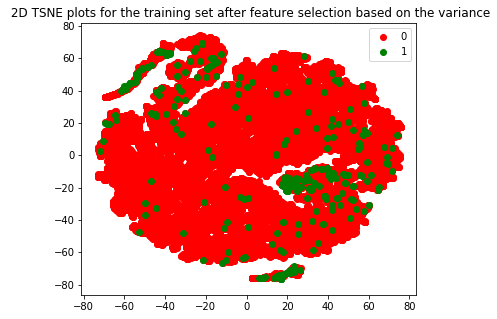

In [31]:
plot_tsne(new_X_train, y_train.values.ravel(), target_names," 2D TSNE plots for the training set after feature selection based on the variance")

In [44]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,new_X_train,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.71      0.15      0.25        66

    accuracy                           0.99      6659
   macro avg       0.85      0.58      0.62      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.67      0.15      0.25        66

    accuracy                           0.99      6659
   macro avg       0.83      0.58      0.62      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6593
           1       0.44      0.06      0.11        66

    accuracy                           0.99      6659
   macro avg       0.72      0.53      0.55      6659
weighted avg       0.99      0.99      0.99      6659

              preci

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6592
           1       0.63      0.33      0.44        66

    accuracy                           0.99      6658
   macro avg       0.81      0.67      0.72      6658
weighted avg       0.99      0.99      0.99      6658

the f1-macro score in all iterations : [0.71788168 0.72965049 0.62703135 0.6355499  0.71566514]
the mean of f1-scores                : 0.6851557124199935
the std  of f1-scores                : 0.04431879256606103
Learning rate set to 0.04184
0:	learn: 0.5815820	total: 4.06ms	remaining: 4.06s
1:	learn: 0.5018708	total: 8.27ms	remaining: 4.13s
2:	learn: 0.4256507	total: 12.5ms	remaining: 4.17s
3:	learn: 0.3636345	total: 16.9ms	remaining: 4.21s
4:	learn: 0.3142453	total: 21.2ms	remaining: 4.21s
5:	learn: 0.2696868	total: 25.4ms	remaining: 4.21s
6:	learn: 0.2345955	total: 29.8ms	remaining: 4.22s
7:	learn: 0.2037733	total: 34.1ms	remaining: 4.23s
8:	learn: 0.1787465	tot

160:	learn: 0.0293135	total: 731ms	remaining: 3.81s
161:	learn: 0.0292763	total: 737ms	remaining: 3.81s
162:	learn: 0.0292389	total: 742ms	remaining: 3.81s
163:	learn: 0.0292043	total: 748ms	remaining: 3.81s
164:	learn: 0.0291661	total: 755ms	remaining: 3.82s
165:	learn: 0.0291434	total: 761ms	remaining: 3.82s
166:	learn: 0.0291159	total: 767ms	remaining: 3.83s
167:	learn: 0.0290824	total: 775ms	remaining: 3.84s
168:	learn: 0.0290471	total: 779ms	remaining: 3.83s
169:	learn: 0.0290205	total: 784ms	remaining: 3.83s
170:	learn: 0.0289921	total: 788ms	remaining: 3.82s
171:	learn: 0.0289618	total: 792ms	remaining: 3.81s
172:	learn: 0.0289288	total: 797ms	remaining: 3.81s
173:	learn: 0.0289033	total: 801ms	remaining: 3.8s
174:	learn: 0.0288526	total: 805ms	remaining: 3.8s
175:	learn: 0.0288269	total: 810ms	remaining: 3.79s
176:	learn: 0.0287827	total: 814ms	remaining: 3.79s
177:	learn: 0.0287441	total: 819ms	remaining: 3.78s
178:	learn: 0.0287119	total: 823ms	remaining: 3.77s
179:	learn: 0.

330:	learn: 0.0254818	total: 1.52s	remaining: 3.07s
331:	learn: 0.0254565	total: 1.52s	remaining: 3.06s
332:	learn: 0.0254504	total: 1.53s	remaining: 3.06s
333:	learn: 0.0254245	total: 1.53s	remaining: 3.06s
334:	learn: 0.0253981	total: 1.54s	remaining: 3.06s
335:	learn: 0.0253727	total: 1.55s	remaining: 3.06s
336:	learn: 0.0253609	total: 1.55s	remaining: 3.06s
337:	learn: 0.0253392	total: 1.56s	remaining: 3.05s
338:	learn: 0.0253274	total: 1.56s	remaining: 3.05s
339:	learn: 0.0253185	total: 1.57s	remaining: 3.04s
340:	learn: 0.0253077	total: 1.57s	remaining: 3.04s
341:	learn: 0.0252808	total: 1.58s	remaining: 3.03s
342:	learn: 0.0252661	total: 1.58s	remaining: 3.03s
343:	learn: 0.0252405	total: 1.58s	remaining: 3.02s
344:	learn: 0.0252245	total: 1.59s	remaining: 3.02s
345:	learn: 0.0252143	total: 1.59s	remaining: 3.01s
346:	learn: 0.0251857	total: 1.6s	remaining: 3.01s
347:	learn: 0.0251608	total: 1.6s	remaining: 3s
348:	learn: 0.0251424	total: 1.61s	remaining: 3s
349:	learn: 0.025131

499:	learn: 0.0223287	total: 2.29s	remaining: 2.29s
500:	learn: 0.0223154	total: 2.3s	remaining: 2.29s
501:	learn: 0.0222952	total: 2.3s	remaining: 2.29s
502:	learn: 0.0222764	total: 2.31s	remaining: 2.28s
503:	learn: 0.0222521	total: 2.32s	remaining: 2.28s
504:	learn: 0.0222342	total: 2.32s	remaining: 2.28s
505:	learn: 0.0222122	total: 2.33s	remaining: 2.28s
506:	learn: 0.0221962	total: 2.33s	remaining: 2.27s
507:	learn: 0.0221772	total: 2.34s	remaining: 2.27s
508:	learn: 0.0221648	total: 2.34s	remaining: 2.26s
509:	learn: 0.0221411	total: 2.35s	remaining: 2.26s
510:	learn: 0.0221248	total: 2.35s	remaining: 2.25s
511:	learn: 0.0221040	total: 2.36s	remaining: 2.25s
512:	learn: 0.0220820	total: 2.36s	remaining: 2.24s
513:	learn: 0.0220614	total: 2.37s	remaining: 2.24s
514:	learn: 0.0220445	total: 2.37s	remaining: 2.23s
515:	learn: 0.0220399	total: 2.37s	remaining: 2.23s
516:	learn: 0.0220327	total: 2.38s	remaining: 2.22s
517:	learn: 0.0220106	total: 2.38s	remaining: 2.22s
518:	learn: 0.

669:	learn: 0.0197321	total: 3.07s	remaining: 1.51s
670:	learn: 0.0197099	total: 3.07s	remaining: 1.51s
671:	learn: 0.0196907	total: 3.08s	remaining: 1.5s
672:	learn: 0.0196881	total: 3.09s	remaining: 1.5s
673:	learn: 0.0196702	total: 3.09s	remaining: 1.5s
674:	learn: 0.0196610	total: 3.1s	remaining: 1.49s
675:	learn: 0.0196521	total: 3.1s	remaining: 1.49s
676:	learn: 0.0196422	total: 3.11s	remaining: 1.48s
677:	learn: 0.0196328	total: 3.11s	remaining: 1.48s
678:	learn: 0.0196207	total: 3.12s	remaining: 1.47s
679:	learn: 0.0196182	total: 3.12s	remaining: 1.47s
680:	learn: 0.0196043	total: 3.13s	remaining: 1.47s
681:	learn: 0.0195861	total: 3.13s	remaining: 1.46s
682:	learn: 0.0195679	total: 3.14s	remaining: 1.46s
683:	learn: 0.0195588	total: 3.14s	remaining: 1.45s
684:	learn: 0.0195503	total: 3.14s	remaining: 1.45s
685:	learn: 0.0195413	total: 3.15s	remaining: 1.44s
686:	learn: 0.0195255	total: 3.15s	remaining: 1.44s
687:	learn: 0.0195135	total: 3.16s	remaining: 1.43s
688:	learn: 0.019

841:	learn: 0.0176774	total: 3.85s	remaining: 723ms
842:	learn: 0.0176692	total: 3.85s	remaining: 718ms
843:	learn: 0.0176494	total: 3.86s	remaining: 714ms
844:	learn: 0.0176383	total: 3.87s	remaining: 709ms
845:	learn: 0.0176136	total: 3.87s	remaining: 705ms
846:	learn: 0.0176056	total: 3.88s	remaining: 701ms
847:	learn: 0.0175949	total: 3.89s	remaining: 697ms
848:	learn: 0.0175652	total: 3.89s	remaining: 692ms
849:	learn: 0.0175578	total: 3.9s	remaining: 688ms
850:	learn: 0.0175491	total: 3.9s	remaining: 683ms
851:	learn: 0.0175354	total: 3.9s	remaining: 678ms
852:	learn: 0.0175319	total: 3.91s	remaining: 674ms
853:	learn: 0.0175145	total: 3.91s	remaining: 669ms
854:	learn: 0.0174998	total: 3.92s	remaining: 664ms
855:	learn: 0.0174939	total: 3.92s	remaining: 660ms
856:	learn: 0.0174768	total: 3.93s	remaining: 655ms
857:	learn: 0.0174606	total: 3.93s	remaining: 651ms
858:	learn: 0.0174533	total: 3.94s	remaining: 646ms
859:	learn: 0.0174465	total: 3.94s	remaining: 641ms
860:	learn: 0.0

Learning rate set to 0.04184
0:	learn: 0.5802278	total: 12.8ms	remaining: 12.7s
1:	learn: 0.5007798	total: 21.1ms	remaining: 10.5s
2:	learn: 0.4233010	total: 27.1ms	remaining: 9.01s
3:	learn: 0.3610339	total: 32.6ms	remaining: 8.11s
4:	learn: 0.3124064	total: 40.2ms	remaining: 7.99s
5:	learn: 0.2692166	total: 49.8ms	remaining: 8.24s
6:	learn: 0.2337764	total: 55.5ms	remaining: 7.87s
7:	learn: 0.2021712	total: 61ms	remaining: 7.57s
8:	learn: 0.1771121	total: 66.5ms	remaining: 7.32s
9:	learn: 0.1565623	total: 71.9ms	remaining: 7.12s
10:	learn: 0.1384427	total: 77.5ms	remaining: 6.97s
11:	learn: 0.1239008	total: 83.8ms	remaining: 6.9s
12:	learn: 0.1116433	total: 89.2ms	remaining: 6.77s
13:	learn: 0.1011165	total: 94.6ms	remaining: 6.66s
14:	learn: 0.0927591	total: 100ms	remaining: 6.58s
15:	learn: 0.0859277	total: 106ms	remaining: 6.49s
16:	learn: 0.0794472	total: 111ms	remaining: 6.43s
17:	learn: 0.0742075	total: 117ms	remaining: 6.38s
18:	learn: 0.0698631	total: 122ms	remaining: 6.32s
1

185:	learn: 0.0276487	total: 988ms	remaining: 4.32s
186:	learn: 0.0276185	total: 993ms	remaining: 4.32s
187:	learn: 0.0275891	total: 998ms	remaining: 4.31s
188:	learn: 0.0275561	total: 1s	remaining: 4.31s
189:	learn: 0.0275303	total: 1.01s	remaining: 4.31s
190:	learn: 0.0275068	total: 1.02s	remaining: 4.3s
191:	learn: 0.0274740	total: 1.02s	remaining: 4.31s
192:	learn: 0.0274428	total: 1.03s	remaining: 4.3s
193:	learn: 0.0274066	total: 1.03s	remaining: 4.29s
194:	learn: 0.0273975	total: 1.04s	remaining: 4.28s
195:	learn: 0.0273500	total: 1.04s	remaining: 4.27s
196:	learn: 0.0273269	total: 1.05s	remaining: 4.26s
197:	learn: 0.0272981	total: 1.05s	remaining: 4.25s
198:	learn: 0.0272552	total: 1.05s	remaining: 4.25s
199:	learn: 0.0272410	total: 1.06s	remaining: 4.24s
200:	learn: 0.0272183	total: 1.06s	remaining: 4.23s
201:	learn: 0.0271977	total: 1.07s	remaining: 4.23s
202:	learn: 0.0271790	total: 1.07s	remaining: 4.22s
203:	learn: 0.0271554	total: 1.08s	remaining: 4.21s
204:	learn: 0.027

358:	learn: 0.0243110	total: 1.78s	remaining: 3.18s
359:	learn: 0.0242954	total: 1.79s	remaining: 3.18s
360:	learn: 0.0242818	total: 1.79s	remaining: 3.18s
361:	learn: 0.0242570	total: 1.8s	remaining: 3.18s
362:	learn: 0.0242523	total: 1.81s	remaining: 3.17s
363:	learn: 0.0242313	total: 1.81s	remaining: 3.17s
364:	learn: 0.0242270	total: 1.82s	remaining: 3.17s
365:	learn: 0.0242249	total: 1.82s	remaining: 3.16s
366:	learn: 0.0242146	total: 1.83s	remaining: 3.15s
367:	learn: 0.0242059	total: 1.83s	remaining: 3.15s
368:	learn: 0.0241763	total: 1.84s	remaining: 3.14s
369:	learn: 0.0241689	total: 1.84s	remaining: 3.14s
370:	learn: 0.0241492	total: 1.85s	remaining: 3.13s
371:	learn: 0.0241226	total: 1.85s	remaining: 3.12s
372:	learn: 0.0241105	total: 1.85s	remaining: 3.12s
373:	learn: 0.0240968	total: 1.86s	remaining: 3.11s
374:	learn: 0.0240896	total: 1.86s	remaining: 3.11s
375:	learn: 0.0240835	total: 1.87s	remaining: 3.1s
376:	learn: 0.0240525	total: 1.87s	remaining: 3.09s
377:	learn: 0.

527:	learn: 0.0216172	total: 2.56s	remaining: 2.29s
528:	learn: 0.0215969	total: 2.56s	remaining: 2.28s
529:	learn: 0.0215807	total: 2.57s	remaining: 2.28s
530:	learn: 0.0215691	total: 2.57s	remaining: 2.27s
531:	learn: 0.0215506	total: 2.58s	remaining: 2.27s
532:	learn: 0.0215358	total: 2.59s	remaining: 2.27s
533:	learn: 0.0215188	total: 2.59s	remaining: 2.26s
534:	learn: 0.0215038	total: 2.6s	remaining: 2.26s
535:	learn: 0.0214903	total: 2.6s	remaining: 2.25s
536:	learn: 0.0214690	total: 2.61s	remaining: 2.25s
537:	learn: 0.0214453	total: 2.61s	remaining: 2.24s
538:	learn: 0.0214357	total: 2.62s	remaining: 2.24s
539:	learn: 0.0214149	total: 2.62s	remaining: 2.23s
540:	learn: 0.0214050	total: 2.63s	remaining: 2.23s
541:	learn: 0.0214028	total: 2.63s	remaining: 2.22s
542:	learn: 0.0213937	total: 2.63s	remaining: 2.22s
543:	learn: 0.0213844	total: 2.64s	remaining: 2.21s
544:	learn: 0.0213668	total: 2.64s	remaining: 2.21s
545:	learn: 0.0213580	total: 2.65s	remaining: 2.2s
546:	learn: 0.0

695:	learn: 0.0194868	total: 3.34s	remaining: 1.46s
696:	learn: 0.0194802	total: 3.34s	remaining: 1.45s
697:	learn: 0.0194653	total: 3.35s	remaining: 1.45s
698:	learn: 0.0194545	total: 3.35s	remaining: 1.44s
699:	learn: 0.0194358	total: 3.36s	remaining: 1.44s
700:	learn: 0.0194241	total: 3.37s	remaining: 1.44s
701:	learn: 0.0194113	total: 3.38s	remaining: 1.43s
702:	learn: 0.0194008	total: 3.38s	remaining: 1.43s
703:	learn: 0.0193879	total: 3.38s	remaining: 1.42s
704:	learn: 0.0193752	total: 3.39s	remaining: 1.42s
705:	learn: 0.0193618	total: 3.39s	remaining: 1.41s
706:	learn: 0.0193435	total: 3.4s	remaining: 1.41s
707:	learn: 0.0193367	total: 3.4s	remaining: 1.4s
708:	learn: 0.0193211	total: 3.41s	remaining: 1.4s
709:	learn: 0.0193074	total: 3.41s	remaining: 1.39s
710:	learn: 0.0192990	total: 3.42s	remaining: 1.39s
711:	learn: 0.0192822	total: 3.42s	remaining: 1.38s
712:	learn: 0.0192804	total: 3.42s	remaining: 1.38s
713:	learn: 0.0192776	total: 3.43s	remaining: 1.37s
714:	learn: 0.01

863:	learn: 0.0174897	total: 4.12s	remaining: 649ms
864:	learn: 0.0174845	total: 4.13s	remaining: 644ms
865:	learn: 0.0174715	total: 4.13s	remaining: 640ms
866:	learn: 0.0174681	total: 4.14s	remaining: 635ms
867:	learn: 0.0174537	total: 4.15s	remaining: 631ms
868:	learn: 0.0174460	total: 4.15s	remaining: 626ms
869:	learn: 0.0174287	total: 4.16s	remaining: 621ms
870:	learn: 0.0174126	total: 4.16s	remaining: 617ms
871:	learn: 0.0174078	total: 4.17s	remaining: 612ms
872:	learn: 0.0173998	total: 4.17s	remaining: 607ms
873:	learn: 0.0173909	total: 4.18s	remaining: 602ms
874:	learn: 0.0173735	total: 4.18s	remaining: 598ms
875:	learn: 0.0173636	total: 4.19s	remaining: 593ms
876:	learn: 0.0173553	total: 4.19s	remaining: 588ms
877:	learn: 0.0173496	total: 4.2s	remaining: 583ms
878:	learn: 0.0173443	total: 4.2s	remaining: 578ms
879:	learn: 0.0173268	total: 4.2s	remaining: 573ms
880:	learn: 0.0173101	total: 4.21s	remaining: 569ms
881:	learn: 0.0172877	total: 4.21s	remaining: 564ms
882:	learn: 0.0

15:	learn: 0.0851102	total: 82.5ms	remaining: 5.07s
16:	learn: 0.0791122	total: 88.6ms	remaining: 5.12s
17:	learn: 0.0738349	total: 94.9ms	remaining: 5.18s
18:	learn: 0.0694679	total: 101ms	remaining: 5.21s
19:	learn: 0.0654944	total: 108ms	remaining: 5.3s
20:	learn: 0.0622138	total: 114ms	remaining: 5.31s
21:	learn: 0.0591462	total: 120ms	remaining: 5.35s
22:	learn: 0.0567483	total: 129ms	remaining: 5.46s
23:	learn: 0.0543970	total: 135ms	remaining: 5.47s
24:	learn: 0.0524061	total: 140ms	remaining: 5.46s
25:	learn: 0.0504606	total: 145ms	remaining: 5.44s
26:	learn: 0.0490344	total: 151ms	remaining: 5.42s
27:	learn: 0.0474911	total: 156ms	remaining: 5.41s
28:	learn: 0.0461163	total: 161ms	remaining: 5.38s
29:	learn: 0.0450554	total: 166ms	remaining: 5.38s
30:	learn: 0.0439660	total: 172ms	remaining: 5.36s
31:	learn: 0.0429800	total: 177ms	remaining: 5.35s
32:	learn: 0.0420648	total: 182ms	remaining: 5.34s
33:	learn: 0.0412551	total: 188ms	remaining: 5.33s
34:	learn: 0.0406580	total: 1

179:	learn: 0.0277456	total: 872ms	remaining: 3.97s
180:	learn: 0.0277290	total: 877ms	remaining: 3.97s
181:	learn: 0.0276960	total: 883ms	remaining: 3.97s
182:	learn: 0.0276542	total: 889ms	remaining: 3.97s
183:	learn: 0.0276304	total: 894ms	remaining: 3.97s
184:	learn: 0.0276133	total: 900ms	remaining: 3.96s
185:	learn: 0.0275937	total: 908ms	remaining: 3.98s
186:	learn: 0.0275689	total: 914ms	remaining: 3.97s
187:	learn: 0.0275589	total: 919ms	remaining: 3.97s
188:	learn: 0.0275314	total: 923ms	remaining: 3.96s
189:	learn: 0.0274964	total: 929ms	remaining: 3.96s
190:	learn: 0.0274755	total: 938ms	remaining: 3.97s
191:	learn: 0.0274387	total: 946ms	remaining: 3.98s
192:	learn: 0.0274139	total: 951ms	remaining: 3.98s
193:	learn: 0.0273831	total: 955ms	remaining: 3.97s
194:	learn: 0.0273515	total: 960ms	remaining: 3.96s
195:	learn: 0.0273301	total: 964ms	remaining: 3.95s
196:	learn: 0.0273071	total: 968ms	remaining: 3.95s
197:	learn: 0.0272797	total: 973ms	remaining: 3.94s
198:	learn: 

343:	learn: 0.0242960	total: 1.65s	remaining: 3.15s
344:	learn: 0.0242849	total: 1.66s	remaining: 3.15s
345:	learn: 0.0242830	total: 1.66s	remaining: 3.14s
346:	learn: 0.0242640	total: 1.67s	remaining: 3.13s
347:	learn: 0.0242325	total: 1.67s	remaining: 3.13s
348:	learn: 0.0242094	total: 1.68s	remaining: 3.13s
349:	learn: 0.0241802	total: 1.69s	remaining: 3.13s
350:	learn: 0.0241674	total: 1.69s	remaining: 3.13s
351:	learn: 0.0241378	total: 1.7s	remaining: 3.12s
352:	learn: 0.0241105	total: 1.7s	remaining: 3.12s
353:	learn: 0.0241015	total: 1.7s	remaining: 3.11s
354:	learn: 0.0240741	total: 1.71s	remaining: 3.11s
355:	learn: 0.0240476	total: 1.71s	remaining: 3.1s
356:	learn: 0.0240387	total: 1.72s	remaining: 3.09s
357:	learn: 0.0240197	total: 1.72s	remaining: 3.09s
358:	learn: 0.0240098	total: 1.73s	remaining: 3.08s
359:	learn: 0.0240023	total: 1.73s	remaining: 3.08s
360:	learn: 0.0239803	total: 1.74s	remaining: 3.07s
361:	learn: 0.0239612	total: 1.74s	remaining: 3.07s
362:	learn: 0.02

516:	learn: 0.0216864	total: 2.45s	remaining: 2.29s
517:	learn: 0.0216825	total: 2.46s	remaining: 2.29s
518:	learn: 0.0216710	total: 2.46s	remaining: 2.28s
519:	learn: 0.0216676	total: 2.47s	remaining: 2.28s
520:	learn: 0.0216592	total: 2.48s	remaining: 2.28s
521:	learn: 0.0216435	total: 2.48s	remaining: 2.27s
522:	learn: 0.0216371	total: 2.49s	remaining: 2.27s
523:	learn: 0.0216140	total: 2.49s	remaining: 2.26s
524:	learn: 0.0216048	total: 2.5s	remaining: 2.26s
525:	learn: 0.0216005	total: 2.5s	remaining: 2.26s
526:	learn: 0.0215917	total: 2.51s	remaining: 2.25s
527:	learn: 0.0215768	total: 2.51s	remaining: 2.25s
528:	learn: 0.0215629	total: 2.52s	remaining: 2.24s
529:	learn: 0.0215566	total: 2.52s	remaining: 2.23s
530:	learn: 0.0215423	total: 2.52s	remaining: 2.23s
531:	learn: 0.0215387	total: 2.53s	remaining: 2.23s
532:	learn: 0.0215326	total: 2.53s	remaining: 2.22s
533:	learn: 0.0215110	total: 2.54s	remaining: 2.21s
534:	learn: 0.0214983	total: 2.54s	remaining: 2.21s
535:	learn: 0.

685:	learn: 0.0199112	total: 3.23s	remaining: 1.48s
686:	learn: 0.0199040	total: 3.24s	remaining: 1.48s
687:	learn: 0.0198969	total: 3.25s	remaining: 1.47s
688:	learn: 0.0198879	total: 3.25s	remaining: 1.47s
689:	learn: 0.0198745	total: 3.26s	remaining: 1.47s
690:	learn: 0.0198576	total: 3.27s	remaining: 1.46s
691:	learn: 0.0198407	total: 3.27s	remaining: 1.46s
692:	learn: 0.0198280	total: 3.28s	remaining: 1.45s
693:	learn: 0.0198185	total: 3.28s	remaining: 1.45s
694:	learn: 0.0198164	total: 3.29s	remaining: 1.44s
695:	learn: 0.0198136	total: 3.29s	remaining: 1.44s
696:	learn: 0.0198100	total: 3.3s	remaining: 1.43s
697:	learn: 0.0198033	total: 3.3s	remaining: 1.43s
698:	learn: 0.0197915	total: 3.31s	remaining: 1.42s
699:	learn: 0.0197888	total: 3.31s	remaining: 1.42s
700:	learn: 0.0197840	total: 3.31s	remaining: 1.41s
701:	learn: 0.0197814	total: 3.32s	remaining: 1.41s
702:	learn: 0.0197767	total: 3.32s	remaining: 1.4s
703:	learn: 0.0197673	total: 3.33s	remaining: 1.4s
704:	learn: 0.01

852:	learn: 0.0182373	total: 4.01s	remaining: 691ms
853:	learn: 0.0182154	total: 4.01s	remaining: 686ms
854:	learn: 0.0182113	total: 4.02s	remaining: 682ms
855:	learn: 0.0182062	total: 4.03s	remaining: 678ms
856:	learn: 0.0181997	total: 4.04s	remaining: 673ms
857:	learn: 0.0181959	total: 4.04s	remaining: 669ms
858:	learn: 0.0181799	total: 4.05s	remaining: 664ms
859:	learn: 0.0181742	total: 4.05s	remaining: 659ms
860:	learn: 0.0181680	total: 4.05s	remaining: 655ms
861:	learn: 0.0181610	total: 4.06s	remaining: 650ms
862:	learn: 0.0181586	total: 4.06s	remaining: 645ms
863:	learn: 0.0181468	total: 4.07s	remaining: 640ms
864:	learn: 0.0181402	total: 4.07s	remaining: 636ms
865:	learn: 0.0181227	total: 4.08s	remaining: 631ms
866:	learn: 0.0181164	total: 4.08s	remaining: 626ms
867:	learn: 0.0181086	total: 4.08s	remaining: 621ms
868:	learn: 0.0180970	total: 4.09s	remaining: 617ms
869:	learn: 0.0180849	total: 4.09s	remaining: 612ms
870:	learn: 0.0180754	total: 4.1s	remaining: 607ms
871:	learn: 0

26:	learn: 0.0492256	total: 152ms	remaining: 5.48s
27:	learn: 0.0477207	total: 158ms	remaining: 5.5s
28:	learn: 0.0463519	total: 165ms	remaining: 5.52s
29:	learn: 0.0453824	total: 172ms	remaining: 5.55s
30:	learn: 0.0443256	total: 179ms	remaining: 5.59s
31:	learn: 0.0434358	total: 186ms	remaining: 5.62s
32:	learn: 0.0427033	total: 194ms	remaining: 5.68s
33:	learn: 0.0419831	total: 201ms	remaining: 5.7s
34:	learn: 0.0414321	total: 208ms	remaining: 5.73s
35:	learn: 0.0407675	total: 214ms	remaining: 5.72s
36:	learn: 0.0402178	total: 220ms	remaining: 5.72s
37:	learn: 0.0396498	total: 226ms	remaining: 5.72s
38:	learn: 0.0392194	total: 231ms	remaining: 5.7s
39:	learn: 0.0387525	total: 236ms	remaining: 5.67s
40:	learn: 0.0383318	total: 242ms	remaining: 5.66s
41:	learn: 0.0379198	total: 248ms	remaining: 5.65s
42:	learn: 0.0375819	total: 253ms	remaining: 5.62s
43:	learn: 0.0372446	total: 257ms	remaining: 5.59s
44:	learn: 0.0370076	total: 262ms	remaining: 5.56s
45:	learn: 0.0367267	total: 267ms	

217:	learn: 0.0270912	total: 1.13s	remaining: 4.07s
218:	learn: 0.0270499	total: 1.14s	remaining: 4.07s
219:	learn: 0.0270055	total: 1.15s	remaining: 4.06s
220:	learn: 0.0269886	total: 1.15s	remaining: 4.06s
221:	learn: 0.0269505	total: 1.16s	remaining: 4.06s
222:	learn: 0.0269346	total: 1.16s	remaining: 4.05s
223:	learn: 0.0269086	total: 1.17s	remaining: 4.05s
224:	learn: 0.0268934	total: 1.17s	remaining: 4.04s
225:	learn: 0.0268630	total: 1.18s	remaining: 4.05s
226:	learn: 0.0268441	total: 1.19s	remaining: 4.04s
227:	learn: 0.0268155	total: 1.19s	remaining: 4.04s
228:	learn: 0.0267838	total: 1.2s	remaining: 4.03s
229:	learn: 0.0267710	total: 1.2s	remaining: 4.02s
230:	learn: 0.0267545	total: 1.21s	remaining: 4.02s
231:	learn: 0.0267226	total: 1.21s	remaining: 4.01s
232:	learn: 0.0267011	total: 1.22s	remaining: 4s
233:	learn: 0.0266816	total: 1.22s	remaining: 4s
234:	learn: 0.0266478	total: 1.23s	remaining: 3.99s
235:	learn: 0.0266102	total: 1.23s	remaining: 3.98s
236:	learn: 0.026593

376:	learn: 0.0240780	total: 1.92s	remaining: 3.17s
377:	learn: 0.0240560	total: 1.92s	remaining: 3.16s
378:	learn: 0.0240397	total: 1.93s	remaining: 3.16s
379:	learn: 0.0240227	total: 1.93s	remaining: 3.16s
380:	learn: 0.0239854	total: 1.94s	remaining: 3.15s
381:	learn: 0.0239773	total: 1.95s	remaining: 3.15s
382:	learn: 0.0239619	total: 1.96s	remaining: 3.15s
383:	learn: 0.0239582	total: 1.96s	remaining: 3.15s
384:	learn: 0.0239380	total: 1.97s	remaining: 3.15s
385:	learn: 0.0238930	total: 1.97s	remaining: 3.14s
386:	learn: 0.0238805	total: 1.98s	remaining: 3.13s
387:	learn: 0.0238671	total: 1.98s	remaining: 3.13s
388:	learn: 0.0238579	total: 1.99s	remaining: 3.12s
389:	learn: 0.0238471	total: 1.99s	remaining: 3.12s
390:	learn: 0.0238384	total: 2s	remaining: 3.11s
391:	learn: 0.0238342	total: 2s	remaining: 3.1s
392:	learn: 0.0238206	total: 2.01s	remaining: 3.1s
393:	learn: 0.0238014	total: 2.01s	remaining: 3.09s
394:	learn: 0.0237838	total: 2.02s	remaining: 3.09s
395:	learn: 0.023772

535:	learn: 0.0218093	total: 2.71s	remaining: 2.34s
536:	learn: 0.0217882	total: 2.71s	remaining: 2.34s
537:	learn: 0.0217728	total: 2.72s	remaining: 2.33s
538:	learn: 0.0217501	total: 2.72s	remaining: 2.33s
539:	learn: 0.0217360	total: 2.73s	remaining: 2.33s
540:	learn: 0.0217153	total: 2.74s	remaining: 2.32s
541:	learn: 0.0216798	total: 2.75s	remaining: 2.32s
542:	learn: 0.0216611	total: 2.75s	remaining: 2.31s
543:	learn: 0.0216440	total: 2.75s	remaining: 2.31s
544:	learn: 0.0216358	total: 2.76s	remaining: 2.3s
545:	learn: 0.0216211	total: 2.76s	remaining: 2.3s
546:	learn: 0.0216128	total: 2.77s	remaining: 2.29s
547:	learn: 0.0215960	total: 2.77s	remaining: 2.29s
548:	learn: 0.0215701	total: 2.78s	remaining: 2.28s
549:	learn: 0.0215198	total: 2.78s	remaining: 2.28s
550:	learn: 0.0214956	total: 2.79s	remaining: 2.27s
551:	learn: 0.0214627	total: 2.79s	remaining: 2.27s
552:	learn: 0.0214543	total: 2.8s	remaining: 2.26s
553:	learn: 0.0214067	total: 2.8s	remaining: 2.25s
554:	learn: 0.02

733:	learn: 0.0185574	total: 3.69s	remaining: 1.34s
734:	learn: 0.0185384	total: 3.7s	remaining: 1.33s
735:	learn: 0.0185370	total: 3.71s	remaining: 1.33s
736:	learn: 0.0185315	total: 3.71s	remaining: 1.32s
737:	learn: 0.0185182	total: 3.72s	remaining: 1.32s
738:	learn: 0.0185009	total: 3.73s	remaining: 1.32s
739:	learn: 0.0184936	total: 3.73s	remaining: 1.31s
740:	learn: 0.0184856	total: 3.74s	remaining: 1.31s
741:	learn: 0.0184843	total: 3.74s	remaining: 1.3s
742:	learn: 0.0184790	total: 3.75s	remaining: 1.3s
743:	learn: 0.0184582	total: 3.75s	remaining: 1.29s
744:	learn: 0.0184420	total: 3.76s	remaining: 1.29s
745:	learn: 0.0184260	total: 3.76s	remaining: 1.28s
746:	learn: 0.0184194	total: 3.77s	remaining: 1.27s
747:	learn: 0.0184006	total: 3.77s	remaining: 1.27s
748:	learn: 0.0183994	total: 3.78s	remaining: 1.26s
749:	learn: 0.0183867	total: 3.78s	remaining: 1.26s
750:	learn: 0.0183854	total: 3.79s	remaining: 1.25s
751:	learn: 0.0183443	total: 3.79s	remaining: 1.25s
752:	learn: 0.0

930:	learn: 0.0162836	total: 4.67s	remaining: 346ms
931:	learn: 0.0162711	total: 4.68s	remaining: 341ms
932:	learn: 0.0162626	total: 4.68s	remaining: 336ms
933:	learn: 0.0162556	total: 4.69s	remaining: 331ms
934:	learn: 0.0162522	total: 4.7s	remaining: 327ms
935:	learn: 0.0162390	total: 4.7s	remaining: 322ms
936:	learn: 0.0162263	total: 4.71s	remaining: 317ms
937:	learn: 0.0161979	total: 4.72s	remaining: 312ms
938:	learn: 0.0161877	total: 4.72s	remaining: 307ms
939:	learn: 0.0161752	total: 4.73s	remaining: 302ms
940:	learn: 0.0161491	total: 4.73s	remaining: 297ms
941:	learn: 0.0161273	total: 4.74s	remaining: 292ms
942:	learn: 0.0161028	total: 4.74s	remaining: 287ms
943:	learn: 0.0160976	total: 4.75s	remaining: 282ms
944:	learn: 0.0160839	total: 4.75s	remaining: 277ms
945:	learn: 0.0160686	total: 4.76s	remaining: 272ms
946:	learn: 0.0160428	total: 4.76s	remaining: 266ms
947:	learn: 0.0160315	total: 4.76s	remaining: 261ms
948:	learn: 0.0160252	total: 4.77s	remaining: 256ms
949:	learn: 0.

110:	learn: 0.0311805	total: 589ms	remaining: 4.71s
111:	learn: 0.0311376	total: 595ms	remaining: 4.71s
112:	learn: 0.0311032	total: 601ms	remaining: 4.71s
113:	learn: 0.0310583	total: 609ms	remaining: 4.73s
114:	learn: 0.0310099	total: 616ms	remaining: 4.74s
115:	learn: 0.0309780	total: 624ms	remaining: 4.75s
116:	learn: 0.0309221	total: 630ms	remaining: 4.76s
117:	learn: 0.0308801	total: 635ms	remaining: 4.75s
118:	learn: 0.0308330	total: 640ms	remaining: 4.74s
119:	learn: 0.0307809	total: 645ms	remaining: 4.73s
120:	learn: 0.0307589	total: 649ms	remaining: 4.72s
121:	learn: 0.0307250	total: 654ms	remaining: 4.71s
122:	learn: 0.0306793	total: 659ms	remaining: 4.7s
123:	learn: 0.0306339	total: 663ms	remaining: 4.69s
124:	learn: 0.0305981	total: 668ms	remaining: 4.68s
125:	learn: 0.0305457	total: 673ms	remaining: 4.67s
126:	learn: 0.0305063	total: 677ms	remaining: 4.66s
127:	learn: 0.0304814	total: 682ms	remaining: 4.65s
128:	learn: 0.0304424	total: 687ms	remaining: 4.64s
129:	learn: 0

303:	learn: 0.0256850	total: 1.57s	remaining: 3.59s
304:	learn: 0.0256745	total: 1.57s	remaining: 3.59s
305:	learn: 0.0256651	total: 1.58s	remaining: 3.58s
306:	learn: 0.0256557	total: 1.59s	remaining: 3.58s
307:	learn: 0.0256365	total: 1.59s	remaining: 3.58s
308:	learn: 0.0256257	total: 1.6s	remaining: 3.58s
309:	learn: 0.0256132	total: 1.61s	remaining: 3.58s
310:	learn: 0.0256031	total: 1.61s	remaining: 3.58s
311:	learn: 0.0255779	total: 1.62s	remaining: 3.57s
312:	learn: 0.0255619	total: 1.62s	remaining: 3.56s
313:	learn: 0.0255457	total: 1.63s	remaining: 3.56s
314:	learn: 0.0255366	total: 1.63s	remaining: 3.55s
315:	learn: 0.0255243	total: 1.64s	remaining: 3.54s
316:	learn: 0.0255054	total: 1.64s	remaining: 3.54s
317:	learn: 0.0254911	total: 1.65s	remaining: 3.53s
318:	learn: 0.0254728	total: 1.65s	remaining: 3.52s
319:	learn: 0.0254531	total: 1.66s	remaining: 3.52s
320:	learn: 0.0254417	total: 1.66s	remaining: 3.51s
321:	learn: 0.0254282	total: 1.66s	remaining: 3.5s
322:	learn: 0.

499:	learn: 0.0223600	total: 2.55s	remaining: 2.55s
500:	learn: 0.0223493	total: 2.56s	remaining: 2.55s
501:	learn: 0.0223360	total: 2.58s	remaining: 2.56s
502:	learn: 0.0223202	total: 2.58s	remaining: 2.55s
503:	learn: 0.0223076	total: 2.59s	remaining: 2.55s
504:	learn: 0.0222876	total: 2.6s	remaining: 2.55s
505:	learn: 0.0222828	total: 2.6s	remaining: 2.54s
506:	learn: 0.0222663	total: 2.61s	remaining: 2.54s
507:	learn: 0.0222533	total: 2.61s	remaining: 2.53s
508:	learn: 0.0222362	total: 2.62s	remaining: 2.53s
509:	learn: 0.0222175	total: 2.62s	remaining: 2.52s
510:	learn: 0.0222002	total: 2.63s	remaining: 2.52s
511:	learn: 0.0221776	total: 2.63s	remaining: 2.51s
512:	learn: 0.0221649	total: 2.64s	remaining: 2.5s
513:	learn: 0.0221480	total: 2.64s	remaining: 2.5s
514:	learn: 0.0221395	total: 2.65s	remaining: 2.49s
515:	learn: 0.0221239	total: 2.65s	remaining: 2.49s
516:	learn: 0.0221104	total: 2.66s	remaining: 2.48s
517:	learn: 0.0221027	total: 2.66s	remaining: 2.48s
518:	learn: 0.02

696:	learn: 0.0195556	total: 3.55s	remaining: 1.54s
697:	learn: 0.0195220	total: 3.56s	remaining: 1.54s
698:	learn: 0.0195170	total: 3.56s	remaining: 1.53s
699:	learn: 0.0195063	total: 3.57s	remaining: 1.53s
700:	learn: 0.0194929	total: 3.58s	remaining: 1.52s
701:	learn: 0.0194799	total: 3.58s	remaining: 1.52s
702:	learn: 0.0194704	total: 3.59s	remaining: 1.52s
703:	learn: 0.0194461	total: 3.59s	remaining: 1.51s
704:	learn: 0.0194379	total: 3.6s	remaining: 1.51s
705:	learn: 0.0194322	total: 3.6s	remaining: 1.5s
706:	learn: 0.0194274	total: 3.61s	remaining: 1.5s
707:	learn: 0.0194158	total: 3.61s	remaining: 1.49s
708:	learn: 0.0193904	total: 3.62s	remaining: 1.49s
709:	learn: 0.0193757	total: 3.62s	remaining: 1.48s
710:	learn: 0.0193712	total: 3.63s	remaining: 1.47s
711:	learn: 0.0193523	total: 3.63s	remaining: 1.47s
712:	learn: 0.0193328	total: 3.64s	remaining: 1.46s
713:	learn: 0.0193273	total: 3.64s	remaining: 1.46s
714:	learn: 0.0193082	total: 3.65s	remaining: 1.45s
715:	learn: 0.01

893:	learn: 0.0171122	total: 4.53s	remaining: 537ms
894:	learn: 0.0170966	total: 4.54s	remaining: 532ms
895:	learn: 0.0170890	total: 4.54s	remaining: 527ms
896:	learn: 0.0170789	total: 4.55s	remaining: 522ms
897:	learn: 0.0170719	total: 4.56s	remaining: 518ms
898:	learn: 0.0170630	total: 4.56s	remaining: 513ms
899:	learn: 0.0170588	total: 4.57s	remaining: 508ms
900:	learn: 0.0170466	total: 4.58s	remaining: 503ms
901:	learn: 0.0170378	total: 4.58s	remaining: 498ms
902:	learn: 0.0170262	total: 4.59s	remaining: 493ms
903:	learn: 0.0170098	total: 4.59s	remaining: 488ms
904:	learn: 0.0170020	total: 4.59s	remaining: 482ms
905:	learn: 0.0169918	total: 4.6s	remaining: 477ms
906:	learn: 0.0169826	total: 4.61s	remaining: 472ms
907:	learn: 0.0169715	total: 4.61s	remaining: 467ms
908:	learn: 0.0169572	total: 4.61s	remaining: 462ms
909:	learn: 0.0169456	total: 4.62s	remaining: 457ms
910:	learn: 0.0169399	total: 4.62s	remaining: 452ms
911:	learn: 0.0169265	total: 4.63s	remaining: 447ms
912:	learn: 0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.85      0.35      0.49        66

    accuracy                           0.99      6659
   macro avg       0.92      0.67      0.75      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.76      0.33      0.46        66

    accuracy                           0.99      6659
   macro avg       0.88      0.67      0.73      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.91      0.15      0.26        66

    accuracy                           0.99      6659
   macro avg       0.95      0.58      0.63      6659
weighted avg       0.99      0.99      0.99      6659

              preci

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6659
   macro avg       0.50      0.50      0.50      6659
weighted avg       0.98      0.99      0.99      6659



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.00      0.00      0.00        65

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6592
           1       0.00      0.00      0.00        66

    accuracy                           0.99      6658
   macro avg       0.50      0.50      0.50      6658
weighted avg       0.98      0.99      0.99      6658

the f1-macro score in all iterations : [0.49750981 0.49750981 0.49750981 0.49754735 0.49750943]
the mean of f1-scores                : 0.49751724367978933
the std  of f1-scores                : 1.505632220471078e-05
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.80      0.36      0.50        66

    accuracy                           0.99      6659
   macro avg       0.90      0.68      0.75      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6593
           1       0.

In [45]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.594239               0.027279
1          RandomForest                0.704095               0.050267
2              AdaBoost                0.636459               0.025066
3  HistGradientBoosting                0.685156               0.044319
4              CatBoost                0.708838               0.051571
5          DecisionTree                0.666164               0.022378
6                   XGB                0.709893               0.045371
7                   SVM                0.497517               0.000015
8              lightGBM                0.704546               0.043197

----------------------------------

## Univariate feature selection

### feature selection based on mutual information 

In [46]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=2)
sel.fit(X_train, y_train.values.ravel())
new_X_train = sel.transform(X_train)
new_X_test = sel.transform(X_test)

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


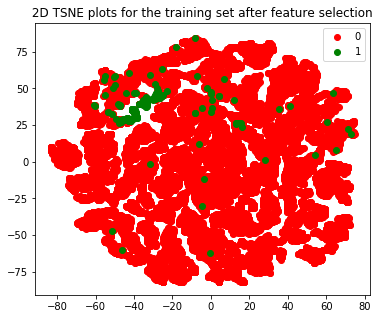

In [47]:
plot_tsne(new_X_train, y_train.values.ravel(), target_names," 2D TSNE plots for the training set after feature selection ")

In [47]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,new_X_train,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.84      0.71      0.77        66

    accuracy                           1.00      6659
   macro avg       0.92      0.86      0.88      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.92      0.71      0.80        66

    accuracy                           1.00      6659
   macro avg       0.96      0.86      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.85      0.71      0.78        66

    accuracy                           1.00      6659
   macro avg       0.93      0.86      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              preci

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.93      0.76      0.83        66

    accuracy                           1.00      6658
   macro avg       0.96      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.87705269 0.89574703 0.88290093 0.91449655 0.91590886]
the mean of f1-scores                : 0.8972212125306516
the std  of f1-scores                : 0.015885076204088452
Learning rate set to 0.04184
0:	learn: 0.5652895	total: 3.92ms	remaining: 3.92s
1:	learn: 0.4610488	total: 7.99ms	remaining: 3.99s
2:	learn: 0.3798443	total: 12ms	remaining: 3.99s
3:	learn: 0.3122631	total: 16.2ms	remaining: 4.04s
4:	learn: 0.2583445	total: 20.4ms	remaining: 4.05s
5:	learn: 0.2123031	total: 24.5ms	remaining: 4.05s
6:	learn: 0.1745845	total: 28.7ms	remaining: 4.07s
7:	learn: 0.1462185	total: 32.9ms	remaining: 4.08s
8:	learn: 0.1232120	tota

167:	learn: 0.0125576	total: 740ms	remaining: 3.67s
168:	learn: 0.0125370	total: 746ms	remaining: 3.67s
169:	learn: 0.0125257	total: 750ms	remaining: 3.66s
170:	learn: 0.0125143	total: 755ms	remaining: 3.66s
171:	learn: 0.0125007	total: 764ms	remaining: 3.68s
172:	learn: 0.0124957	total: 769ms	remaining: 3.67s
173:	learn: 0.0124818	total: 776ms	remaining: 3.69s
174:	learn: 0.0124679	total: 781ms	remaining: 3.68s
175:	learn: 0.0124499	total: 785ms	remaining: 3.67s
176:	learn: 0.0124305	total: 789ms	remaining: 3.67s
177:	learn: 0.0124139	total: 794ms	remaining: 3.66s
178:	learn: 0.0124081	total: 798ms	remaining: 3.66s
179:	learn: 0.0123986	total: 802ms	remaining: 3.65s
180:	learn: 0.0123934	total: 806ms	remaining: 3.65s
181:	learn: 0.0123888	total: 810ms	remaining: 3.64s
182:	learn: 0.0123754	total: 815ms	remaining: 3.64s
183:	learn: 0.0123651	total: 819ms	remaining: 3.63s
184:	learn: 0.0123592	total: 823ms	remaining: 3.63s
185:	learn: 0.0123477	total: 827ms	remaining: 3.62s
186:	learn: 

342:	learn: 0.0108388	total: 1.52s	remaining: 2.91s
343:	learn: 0.0108316	total: 1.53s	remaining: 2.91s
344:	learn: 0.0108250	total: 1.53s	remaining: 2.91s
345:	learn: 0.0108182	total: 1.54s	remaining: 2.9s
346:	learn: 0.0108130	total: 1.54s	remaining: 2.9s
347:	learn: 0.0108022	total: 1.55s	remaining: 2.9s
348:	learn: 0.0108000	total: 1.55s	remaining: 2.9s
349:	learn: 0.0107853	total: 1.56s	remaining: 2.89s
350:	learn: 0.0107815	total: 1.56s	remaining: 2.89s
351:	learn: 0.0107741	total: 1.57s	remaining: 2.89s
352:	learn: 0.0107622	total: 1.57s	remaining: 2.89s
353:	learn: 0.0107601	total: 1.58s	remaining: 2.88s
354:	learn: 0.0107531	total: 1.58s	remaining: 2.88s
355:	learn: 0.0107512	total: 1.59s	remaining: 2.87s
356:	learn: 0.0107446	total: 1.59s	remaining: 2.87s
357:	learn: 0.0107381	total: 1.6s	remaining: 2.86s
358:	learn: 0.0107273	total: 1.6s	remaining: 2.86s
359:	learn: 0.0107225	total: 1.6s	remaining: 2.85s
360:	learn: 0.0107162	total: 1.61s	remaining: 2.85s
361:	learn: 0.01071

539:	learn: 0.0096684	total: 2.5s	remaining: 2.13s
540:	learn: 0.0096634	total: 2.5s	remaining: 2.12s
541:	learn: 0.0096608	total: 2.51s	remaining: 2.12s
542:	learn: 0.0096597	total: 2.51s	remaining: 2.11s
543:	learn: 0.0096558	total: 2.52s	remaining: 2.11s
544:	learn: 0.0096529	total: 2.52s	remaining: 2.11s
545:	learn: 0.0096481	total: 2.53s	remaining: 2.1s
546:	learn: 0.0096380	total: 2.54s	remaining: 2.1s
547:	learn: 0.0096292	total: 2.54s	remaining: 2.1s
548:	learn: 0.0096247	total: 2.55s	remaining: 2.09s
549:	learn: 0.0096195	total: 2.55s	remaining: 2.09s
550:	learn: 0.0096126	total: 2.56s	remaining: 2.08s
551:	learn: 0.0096060	total: 2.56s	remaining: 2.08s
552:	learn: 0.0096005	total: 2.56s	remaining: 2.07s
553:	learn: 0.0095995	total: 2.57s	remaining: 2.07s
554:	learn: 0.0095902	total: 2.57s	remaining: 2.06s
555:	learn: 0.0095873	total: 2.58s	remaining: 2.06s
556:	learn: 0.0095864	total: 2.58s	remaining: 2.05s
557:	learn: 0.0095794	total: 2.58s	remaining: 2.05s
558:	learn: 0.009

734:	learn: 0.0087160	total: 3.46s	remaining: 1.25s
735:	learn: 0.0087125	total: 3.47s	remaining: 1.24s
736:	learn: 0.0087102	total: 3.47s	remaining: 1.24s
737:	learn: 0.0087080	total: 3.48s	remaining: 1.24s
738:	learn: 0.0087067	total: 3.49s	remaining: 1.23s
739:	learn: 0.0087053	total: 3.49s	remaining: 1.23s
740:	learn: 0.0086990	total: 3.5s	remaining: 1.22s
741:	learn: 0.0086931	total: 3.5s	remaining: 1.22s
742:	learn: 0.0086897	total: 3.51s	remaining: 1.21s
743:	learn: 0.0086869	total: 3.51s	remaining: 1.21s
744:	learn: 0.0086824	total: 3.52s	remaining: 1.2s
745:	learn: 0.0086808	total: 3.52s	remaining: 1.2s
746:	learn: 0.0086760	total: 3.53s	remaining: 1.19s
747:	learn: 0.0086687	total: 3.53s	remaining: 1.19s
748:	learn: 0.0086667	total: 3.54s	remaining: 1.19s
749:	learn: 0.0086635	total: 3.54s	remaining: 1.18s
750:	learn: 0.0086596	total: 3.54s	remaining: 1.18s
751:	learn: 0.0086590	total: 3.55s	remaining: 1.17s
752:	learn: 0.0086559	total: 3.55s	remaining: 1.17s
753:	learn: 0.00

909:	learn: 0.0080105	total: 4.27s	remaining: 422ms
910:	learn: 0.0080061	total: 4.27s	remaining: 418ms
911:	learn: 0.0080019	total: 4.28s	remaining: 413ms
912:	learn: 0.0079950	total: 4.29s	remaining: 408ms
913:	learn: 0.0079909	total: 4.29s	remaining: 404ms
914:	learn: 0.0079904	total: 4.29s	remaining: 399ms
915:	learn: 0.0079894	total: 4.3s	remaining: 394ms
916:	learn: 0.0079861	total: 4.31s	remaining: 390ms
917:	learn: 0.0079822	total: 4.31s	remaining: 385ms
918:	learn: 0.0079789	total: 4.32s	remaining: 380ms
919:	learn: 0.0079731	total: 4.32s	remaining: 376ms
920:	learn: 0.0079694	total: 4.32s	remaining: 371ms
921:	learn: 0.0079659	total: 4.33s	remaining: 366ms
922:	learn: 0.0079612	total: 4.33s	remaining: 361ms
923:	learn: 0.0079607	total: 4.34s	remaining: 357ms
924:	learn: 0.0079550	total: 4.34s	remaining: 352ms
925:	learn: 0.0079483	total: 4.34s	remaining: 347ms
926:	learn: 0.0079467	total: 4.35s	remaining: 343ms
927:	learn: 0.0079457	total: 4.35s	remaining: 338ms
928:	learn: 0

98:	learn: 0.0139013	total: 532ms	remaining: 4.84s
99:	learn: 0.0138911	total: 542ms	remaining: 4.88s
100:	learn: 0.0138719	total: 550ms	remaining: 4.89s
101:	learn: 0.0138628	total: 555ms	remaining: 4.88s
102:	learn: 0.0138509	total: 563ms	remaining: 4.9s
103:	learn: 0.0138363	total: 569ms	remaining: 4.9s
104:	learn: 0.0138230	total: 577ms	remaining: 4.92s
105:	learn: 0.0138041	total: 582ms	remaining: 4.91s
106:	learn: 0.0137917	total: 589ms	remaining: 4.91s
107:	learn: 0.0137790	total: 594ms	remaining: 4.91s
108:	learn: 0.0137676	total: 599ms	remaining: 4.9s
109:	learn: 0.0137486	total: 604ms	remaining: 4.89s
110:	learn: 0.0137342	total: 609ms	remaining: 4.87s
111:	learn: 0.0137129	total: 613ms	remaining: 4.86s
112:	learn: 0.0137045	total: 617ms	remaining: 4.85s
113:	learn: 0.0136817	total: 622ms	remaining: 4.83s
114:	learn: 0.0136670	total: 626ms	remaining: 4.82s
115:	learn: 0.0136384	total: 630ms	remaining: 4.8s
116:	learn: 0.0136278	total: 634ms	remaining: 4.79s
117:	learn: 0.0136

268:	learn: 0.0119269	total: 1.31s	remaining: 3.57s
269:	learn: 0.0119087	total: 1.32s	remaining: 3.57s
270:	learn: 0.0118984	total: 1.32s	remaining: 3.56s
271:	learn: 0.0118941	total: 1.33s	remaining: 3.56s
272:	learn: 0.0118828	total: 1.34s	remaining: 3.56s
273:	learn: 0.0118738	total: 1.34s	remaining: 3.56s
274:	learn: 0.0118688	total: 1.35s	remaining: 3.56s
275:	learn: 0.0118647	total: 1.35s	remaining: 3.56s
276:	learn: 0.0118569	total: 1.36s	remaining: 3.55s
277:	learn: 0.0118368	total: 1.36s	remaining: 3.54s
278:	learn: 0.0118287	total: 1.37s	remaining: 3.54s
279:	learn: 0.0118112	total: 1.37s	remaining: 3.53s
280:	learn: 0.0118010	total: 1.38s	remaining: 3.52s
281:	learn: 0.0117971	total: 1.38s	remaining: 3.52s
282:	learn: 0.0117924	total: 1.39s	remaining: 3.51s
283:	learn: 0.0117892	total: 1.39s	remaining: 3.5s
284:	learn: 0.0117858	total: 1.39s	remaining: 3.5s
285:	learn: 0.0117802	total: 1.4s	remaining: 3.49s
286:	learn: 0.0117732	total: 1.4s	remaining: 3.48s
287:	learn: 0.01

444:	learn: 0.0106934	total: 2.11s	remaining: 2.63s
445:	learn: 0.0106895	total: 2.11s	remaining: 2.62s
446:	learn: 0.0106880	total: 2.12s	remaining: 2.62s
447:	learn: 0.0106848	total: 2.12s	remaining: 2.61s
448:	learn: 0.0106822	total: 2.13s	remaining: 2.61s
449:	learn: 0.0106719	total: 2.13s	remaining: 2.61s
450:	learn: 0.0106669	total: 2.14s	remaining: 2.6s
451:	learn: 0.0106639	total: 2.15s	remaining: 2.6s
452:	learn: 0.0106577	total: 2.15s	remaining: 2.6s
453:	learn: 0.0106528	total: 2.15s	remaining: 2.59s
454:	learn: 0.0106458	total: 2.16s	remaining: 2.59s
455:	learn: 0.0106399	total: 2.17s	remaining: 2.58s
456:	learn: 0.0106333	total: 2.17s	remaining: 2.58s
457:	learn: 0.0106285	total: 2.18s	remaining: 2.58s
458:	learn: 0.0106240	total: 2.18s	remaining: 2.57s
459:	learn: 0.0106159	total: 2.19s	remaining: 2.57s
460:	learn: 0.0106104	total: 2.19s	remaining: 2.56s
461:	learn: 0.0106052	total: 2.2s	remaining: 2.56s
462:	learn: 0.0105984	total: 2.2s	remaining: 2.55s
463:	learn: 0.010

617:	learn: 0.0097062	total: 2.88s	remaining: 1.78s
618:	learn: 0.0097041	total: 2.88s	remaining: 1.77s
619:	learn: 0.0096990	total: 2.89s	remaining: 1.77s
620:	learn: 0.0096912	total: 2.89s	remaining: 1.77s
621:	learn: 0.0096829	total: 2.9s	remaining: 1.76s
622:	learn: 0.0096757	total: 2.9s	remaining: 1.76s
623:	learn: 0.0096724	total: 2.91s	remaining: 1.75s
624:	learn: 0.0096662	total: 2.92s	remaining: 1.75s
625:	learn: 0.0096586	total: 2.92s	remaining: 1.75s
626:	learn: 0.0096513	total: 2.93s	remaining: 1.74s
627:	learn: 0.0096468	total: 2.93s	remaining: 1.74s
628:	learn: 0.0096405	total: 2.94s	remaining: 1.73s
629:	learn: 0.0096331	total: 2.94s	remaining: 1.73s
630:	learn: 0.0096288	total: 2.94s	remaining: 1.72s
631:	learn: 0.0096223	total: 2.95s	remaining: 1.72s
632:	learn: 0.0096183	total: 2.95s	remaining: 1.71s
633:	learn: 0.0096122	total: 2.96s	remaining: 1.71s
634:	learn: 0.0096062	total: 2.96s	remaining: 1.7s
635:	learn: 0.0096024	total: 2.97s	remaining: 1.7s
636:	learn: 0.00

790:	learn: 0.0088940	total: 3.67s	remaining: 969ms
791:	learn: 0.0088916	total: 3.67s	remaining: 965ms
792:	learn: 0.0088884	total: 3.68s	remaining: 960ms
793:	learn: 0.0088858	total: 3.68s	remaining: 956ms
794:	learn: 0.0088848	total: 3.69s	remaining: 952ms
795:	learn: 0.0088768	total: 3.69s	remaining: 947ms
796:	learn: 0.0088755	total: 3.7s	remaining: 942ms
797:	learn: 0.0088732	total: 3.71s	remaining: 938ms
798:	learn: 0.0088661	total: 3.71s	remaining: 934ms
799:	learn: 0.0088614	total: 3.72s	remaining: 929ms
800:	learn: 0.0088564	total: 3.72s	remaining: 925ms
801:	learn: 0.0088541	total: 3.73s	remaining: 920ms
802:	learn: 0.0088514	total: 3.73s	remaining: 915ms
803:	learn: 0.0088462	total: 3.73s	remaining: 911ms
804:	learn: 0.0088432	total: 3.74s	remaining: 906ms
805:	learn: 0.0088406	total: 3.74s	remaining: 901ms
806:	learn: 0.0088396	total: 3.75s	remaining: 896ms
807:	learn: 0.0088339	total: 3.75s	remaining: 891ms
808:	learn: 0.0088258	total: 3.75s	remaining: 887ms
809:	learn: 0

962:	learn: 0.0082830	total: 4.44s	remaining: 171ms
963:	learn: 0.0082794	total: 4.44s	remaining: 166ms
964:	learn: 0.0082751	total: 4.45s	remaining: 161ms
965:	learn: 0.0082731	total: 4.45s	remaining: 157ms
966:	learn: 0.0082710	total: 4.46s	remaining: 152ms
967:	learn: 0.0082682	total: 4.47s	remaining: 148ms
968:	learn: 0.0082665	total: 4.47s	remaining: 143ms
969:	learn: 0.0082656	total: 4.48s	remaining: 139ms
970:	learn: 0.0082621	total: 4.48s	remaining: 134ms
971:	learn: 0.0082588	total: 4.49s	remaining: 129ms
972:	learn: 0.0082569	total: 4.49s	remaining: 125ms
973:	learn: 0.0082518	total: 4.5s	remaining: 120ms
974:	learn: 0.0082495	total: 4.5s	remaining: 115ms
975:	learn: 0.0082479	total: 4.51s	remaining: 111ms
976:	learn: 0.0082451	total: 4.51s	remaining: 106ms
977:	learn: 0.0082397	total: 4.51s	remaining: 102ms
978:	learn: 0.0082365	total: 4.52s	remaining: 96.9ms
979:	learn: 0.0082332	total: 4.52s	remaining: 92.3ms
980:	learn: 0.0082292	total: 4.53s	remaining: 87.7ms
981:	learn:

116:	learn: 0.0127364	total: 547ms	remaining: 4.13s
117:	learn: 0.0127088	total: 553ms	remaining: 4.13s
118:	learn: 0.0126970	total: 557ms	remaining: 4.13s
119:	learn: 0.0126836	total: 564ms	remaining: 4.14s
120:	learn: 0.0126697	total: 568ms	remaining: 4.13s
121:	learn: 0.0126562	total: 573ms	remaining: 4.13s
122:	learn: 0.0126444	total: 579ms	remaining: 4.13s
123:	learn: 0.0126194	total: 585ms	remaining: 4.13s
124:	learn: 0.0126142	total: 591ms	remaining: 4.14s
125:	learn: 0.0125984	total: 595ms	remaining: 4.13s
126:	learn: 0.0125863	total: 599ms	remaining: 4.12s
127:	learn: 0.0125760	total: 604ms	remaining: 4.11s
128:	learn: 0.0125511	total: 608ms	remaining: 4.1s
129:	learn: 0.0125416	total: 612ms	remaining: 4.1s
130:	learn: 0.0125272	total: 616ms	remaining: 4.09s
131:	learn: 0.0125179	total: 621ms	remaining: 4.08s
132:	learn: 0.0125030	total: 625ms	remaining: 4.07s
133:	learn: 0.0124940	total: 629ms	remaining: 4.06s
134:	learn: 0.0124783	total: 633ms	remaining: 4.06s
135:	learn: 0.

286:	learn: 0.0108332	total: 1.31s	remaining: 3.27s
287:	learn: 0.0108190	total: 1.32s	remaining: 3.27s
288:	learn: 0.0108068	total: 1.33s	remaining: 3.27s
289:	learn: 0.0107993	total: 1.34s	remaining: 3.28s
290:	learn: 0.0107936	total: 1.34s	remaining: 3.28s
291:	learn: 0.0107867	total: 1.35s	remaining: 3.28s
292:	learn: 0.0107779	total: 1.36s	remaining: 3.27s
293:	learn: 0.0107672	total: 1.36s	remaining: 3.27s
294:	learn: 0.0107533	total: 1.36s	remaining: 3.26s
295:	learn: 0.0107487	total: 1.37s	remaining: 3.26s
296:	learn: 0.0107398	total: 1.37s	remaining: 3.25s
297:	learn: 0.0107315	total: 1.38s	remaining: 3.25s
298:	learn: 0.0107252	total: 1.38s	remaining: 3.24s
299:	learn: 0.0107091	total: 1.39s	remaining: 3.23s
300:	learn: 0.0106958	total: 1.39s	remaining: 3.23s
301:	learn: 0.0106902	total: 1.39s	remaining: 3.22s
302:	learn: 0.0106821	total: 1.4s	remaining: 3.22s
303:	learn: 0.0106762	total: 1.4s	remaining: 3.21s
304:	learn: 0.0106669	total: 1.41s	remaining: 3.21s
305:	learn: 0.

461:	learn: 0.0096035	total: 2.1s	remaining: 2.44s
462:	learn: 0.0095953	total: 2.1s	remaining: 2.44s
463:	learn: 0.0095886	total: 2.11s	remaining: 2.43s
464:	learn: 0.0095776	total: 2.11s	remaining: 2.43s
465:	learn: 0.0095672	total: 2.12s	remaining: 2.43s
466:	learn: 0.0095595	total: 2.13s	remaining: 2.43s
467:	learn: 0.0095496	total: 2.13s	remaining: 2.42s
468:	learn: 0.0095402	total: 2.14s	remaining: 2.42s
469:	learn: 0.0095303	total: 2.14s	remaining: 2.42s
470:	learn: 0.0095212	total: 2.15s	remaining: 2.41s
471:	learn: 0.0095176	total: 2.15s	remaining: 2.4s
472:	learn: 0.0095134	total: 2.15s	remaining: 2.4s
473:	learn: 0.0095059	total: 2.16s	remaining: 2.4s
474:	learn: 0.0094974	total: 2.16s	remaining: 2.39s
475:	learn: 0.0094893	total: 2.17s	remaining: 2.38s
476:	learn: 0.0094820	total: 2.17s	remaining: 2.38s
477:	learn: 0.0094744	total: 2.18s	remaining: 2.38s
478:	learn: 0.0094651	total: 2.18s	remaining: 2.37s
479:	learn: 0.0094618	total: 2.18s	remaining: 2.37s
480:	learn: 0.009

633:	learn: 0.0086146	total: 2.87s	remaining: 1.66s
634:	learn: 0.0086101	total: 2.88s	remaining: 1.65s
635:	learn: 0.0086082	total: 2.88s	remaining: 1.65s
636:	learn: 0.0086068	total: 2.89s	remaining: 1.65s
637:	learn: 0.0086026	total: 2.9s	remaining: 1.64s
638:	learn: 0.0086008	total: 2.9s	remaining: 1.64s
639:	learn: 0.0085962	total: 2.91s	remaining: 1.64s
640:	learn: 0.0085945	total: 2.91s	remaining: 1.63s
641:	learn: 0.0085901	total: 2.92s	remaining: 1.63s
642:	learn: 0.0085888	total: 2.92s	remaining: 1.62s
643:	learn: 0.0085836	total: 2.93s	remaining: 1.62s
644:	learn: 0.0085800	total: 2.93s	remaining: 1.61s
645:	learn: 0.0085783	total: 2.94s	remaining: 1.61s
646:	learn: 0.0085749	total: 2.94s	remaining: 1.6s
647:	learn: 0.0085736	total: 2.94s	remaining: 1.6s
648:	learn: 0.0085703	total: 2.95s	remaining: 1.59s
649:	learn: 0.0085675	total: 2.95s	remaining: 1.59s
650:	learn: 0.0085634	total: 2.96s	remaining: 1.58s
651:	learn: 0.0085563	total: 2.96s	remaining: 1.58s
652:	learn: 0.00

804:	learn: 0.0077692	total: 3.65s	remaining: 884ms
805:	learn: 0.0077655	total: 3.66s	remaining: 880ms
806:	learn: 0.0077616	total: 3.66s	remaining: 876ms
807:	learn: 0.0077498	total: 3.67s	remaining: 871ms
808:	learn: 0.0077470	total: 3.67s	remaining: 867ms
809:	learn: 0.0077443	total: 3.68s	remaining: 863ms
810:	learn: 0.0077375	total: 3.68s	remaining: 858ms
811:	learn: 0.0077297	total: 3.69s	remaining: 853ms
812:	learn: 0.0077283	total: 3.69s	remaining: 849ms
813:	learn: 0.0077221	total: 3.7s	remaining: 845ms
814:	learn: 0.0077195	total: 3.7s	remaining: 841ms
815:	learn: 0.0077129	total: 3.71s	remaining: 836ms
816:	learn: 0.0077105	total: 3.71s	remaining: 831ms
817:	learn: 0.0077031	total: 3.72s	remaining: 827ms
818:	learn: 0.0076937	total: 3.72s	remaining: 822ms
819:	learn: 0.0076877	total: 3.73s	remaining: 818ms
820:	learn: 0.0076838	total: 3.73s	remaining: 813ms
821:	learn: 0.0076803	total: 3.73s	remaining: 808ms
822:	learn: 0.0076777	total: 3.74s	remaining: 804ms
823:	learn: 0.

975:	learn: 0.0071183	total: 4.42s	remaining: 109ms
976:	learn: 0.0071169	total: 4.43s	remaining: 104ms
977:	learn: 0.0071160	total: 4.43s	remaining: 99.7ms
978:	learn: 0.0071146	total: 4.44s	remaining: 95.2ms
979:	learn: 0.0071109	total: 4.45s	remaining: 90.8ms
980:	learn: 0.0071092	total: 4.46s	remaining: 86.4ms
981:	learn: 0.0071064	total: 4.49s	remaining: 82.3ms
982:	learn: 0.0071052	total: 4.5s	remaining: 77.7ms
983:	learn: 0.0071017	total: 4.51s	remaining: 73.3ms
984:	learn: 0.0070993	total: 4.51s	remaining: 68.8ms
985:	learn: 0.0070967	total: 4.52s	remaining: 64.2ms
986:	learn: 0.0070918	total: 4.53s	remaining: 59.6ms
987:	learn: 0.0070904	total: 4.53s	remaining: 55ms
988:	learn: 0.0070850	total: 4.54s	remaining: 50.4ms
989:	learn: 0.0070826	total: 4.54s	remaining: 45.9ms
990:	learn: 0.0070815	total: 4.54s	remaining: 41.3ms
991:	learn: 0.0070778	total: 4.55s	remaining: 36.7ms
992:	learn: 0.0070754	total: 4.55s	remaining: 32.1ms
993:	learn: 0.0070697	total: 4.56s	remaining: 27.5m

164:	learn: 0.0133891	total: 777ms	remaining: 3.93s
165:	learn: 0.0133861	total: 781ms	remaining: 3.92s
166:	learn: 0.0133772	total: 787ms	remaining: 3.92s
167:	learn: 0.0133702	total: 792ms	remaining: 3.92s
168:	learn: 0.0133643	total: 797ms	remaining: 3.92s
169:	learn: 0.0133554	total: 804ms	remaining: 3.92s
170:	learn: 0.0133479	total: 811ms	remaining: 3.93s
171:	learn: 0.0133435	total: 817ms	remaining: 3.93s
172:	learn: 0.0133292	total: 822ms	remaining: 3.93s
173:	learn: 0.0133209	total: 826ms	remaining: 3.92s
174:	learn: 0.0133176	total: 830ms	remaining: 3.91s
175:	learn: 0.0133116	total: 835ms	remaining: 3.91s
176:	learn: 0.0133011	total: 839ms	remaining: 3.9s
177:	learn: 0.0132889	total: 843ms	remaining: 3.89s
178:	learn: 0.0132849	total: 848ms	remaining: 3.89s
179:	learn: 0.0132731	total: 852ms	remaining: 3.88s
180:	learn: 0.0132663	total: 856ms	remaining: 3.87s
181:	learn: 0.0132600	total: 860ms	remaining: 3.87s
182:	learn: 0.0132407	total: 864ms	remaining: 3.86s
183:	learn: 0

334:	learn: 0.0117899	total: 1.55s	remaining: 3.09s
335:	learn: 0.0117867	total: 1.56s	remaining: 3.08s
336:	learn: 0.0117820	total: 1.57s	remaining: 3.08s
337:	learn: 0.0117762	total: 1.57s	remaining: 3.08s
338:	learn: 0.0117644	total: 1.58s	remaining: 3.08s
339:	learn: 0.0117600	total: 1.58s	remaining: 3.08s
340:	learn: 0.0117571	total: 1.59s	remaining: 3.08s
341:	learn: 0.0117506	total: 1.6s	remaining: 3.07s
342:	learn: 0.0117385	total: 1.6s	remaining: 3.07s
343:	learn: 0.0117310	total: 1.61s	remaining: 3.06s
344:	learn: 0.0117286	total: 1.61s	remaining: 3.06s
345:	learn: 0.0117226	total: 1.61s	remaining: 3.05s
346:	learn: 0.0117174	total: 1.62s	remaining: 3.05s
347:	learn: 0.0117059	total: 1.62s	remaining: 3.04s
348:	learn: 0.0117029	total: 1.63s	remaining: 3.04s
349:	learn: 0.0116959	total: 1.63s	remaining: 3.03s
350:	learn: 0.0116849	total: 1.64s	remaining: 3.03s
351:	learn: 0.0116745	total: 1.64s	remaining: 3.02s
352:	learn: 0.0116689	total: 1.65s	remaining: 3.02s
353:	learn: 0.

495:	learn: 0.0107869	total: 2.33s	remaining: 2.37s
496:	learn: 0.0107809	total: 2.34s	remaining: 2.37s
497:	learn: 0.0107777	total: 2.34s	remaining: 2.36s
498:	learn: 0.0107704	total: 2.35s	remaining: 2.36s
499:	learn: 0.0107649	total: 2.36s	remaining: 2.36s
500:	learn: 0.0107605	total: 2.36s	remaining: 2.35s
501:	learn: 0.0107551	total: 2.37s	remaining: 2.35s
502:	learn: 0.0107520	total: 2.38s	remaining: 2.35s
503:	learn: 0.0107492	total: 2.38s	remaining: 2.34s
504:	learn: 0.0107477	total: 2.38s	remaining: 2.34s
505:	learn: 0.0107426	total: 2.39s	remaining: 2.33s
506:	learn: 0.0107355	total: 2.39s	remaining: 2.33s
507:	learn: 0.0107293	total: 2.4s	remaining: 2.32s
508:	learn: 0.0107230	total: 2.4s	remaining: 2.32s
509:	learn: 0.0107203	total: 2.41s	remaining: 2.31s
510:	learn: 0.0107174	total: 2.41s	remaining: 2.31s
511:	learn: 0.0107148	total: 2.42s	remaining: 2.3s
512:	learn: 0.0107098	total: 2.42s	remaining: 2.3s
513:	learn: 0.0107039	total: 2.42s	remaining: 2.29s
514:	learn: 0.01

656:	learn: 0.0101124	total: 3.11s	remaining: 1.62s
657:	learn: 0.0101093	total: 3.12s	remaining: 1.62s
658:	learn: 0.0101062	total: 3.12s	remaining: 1.61s
659:	learn: 0.0101034	total: 3.13s	remaining: 1.61s
660:	learn: 0.0100983	total: 3.13s	remaining: 1.61s
661:	learn: 0.0100951	total: 3.14s	remaining: 1.6s
662:	learn: 0.0100924	total: 3.14s	remaining: 1.6s
663:	learn: 0.0100876	total: 3.15s	remaining: 1.59s
664:	learn: 0.0100820	total: 3.16s	remaining: 1.59s
665:	learn: 0.0100778	total: 3.16s	remaining: 1.58s
666:	learn: 0.0100737	total: 3.17s	remaining: 1.58s
667:	learn: 0.0100693	total: 3.17s	remaining: 1.57s
668:	learn: 0.0100676	total: 3.17s	remaining: 1.57s
669:	learn: 0.0100635	total: 3.18s	remaining: 1.56s
670:	learn: 0.0100589	total: 3.18s	remaining: 1.56s
671:	learn: 0.0100506	total: 3.19s	remaining: 1.56s
672:	learn: 0.0100414	total: 3.19s	remaining: 1.55s
673:	learn: 0.0100375	total: 3.2s	remaining: 1.55s
674:	learn: 0.0100332	total: 3.2s	remaining: 1.54s
675:	learn: 0.01

819:	learn: 0.0093919	total: 3.91s	remaining: 858ms
820:	learn: 0.0093899	total: 3.91s	remaining: 853ms
821:	learn: 0.0093839	total: 3.92s	remaining: 848ms
822:	learn: 0.0093818	total: 3.92s	remaining: 844ms
823:	learn: 0.0093790	total: 3.93s	remaining: 839ms
824:	learn: 0.0093682	total: 3.94s	remaining: 835ms
825:	learn: 0.0093655	total: 3.94s	remaining: 831ms
826:	learn: 0.0093636	total: 3.95s	remaining: 826ms
827:	learn: 0.0093617	total: 3.95s	remaining: 821ms
828:	learn: 0.0093591	total: 3.96s	remaining: 817ms
829:	learn: 0.0093569	total: 3.96s	remaining: 812ms
830:	learn: 0.0093551	total: 3.97s	remaining: 807ms
831:	learn: 0.0093539	total: 3.97s	remaining: 802ms
832:	learn: 0.0093481	total: 3.98s	remaining: 797ms
833:	learn: 0.0093464	total: 3.98s	remaining: 793ms
834:	learn: 0.0093443	total: 3.99s	remaining: 788ms
835:	learn: 0.0093414	total: 3.99s	remaining: 783ms
836:	learn: 0.0093382	total: 4s	remaining: 778ms
837:	learn: 0.0093357	total: 4s	remaining: 773ms
838:	learn: 0.0093

980:	learn: 0.0088549	total: 4.69s	remaining: 90.9ms
981:	learn: 0.0088495	total: 4.7s	remaining: 86.1ms
982:	learn: 0.0088473	total: 4.7s	remaining: 81.3ms
983:	learn: 0.0088454	total: 4.71s	remaining: 76.6ms
984:	learn: 0.0088438	total: 4.71s	remaining: 71.8ms
985:	learn: 0.0088380	total: 4.72s	remaining: 67ms
986:	learn: 0.0088328	total: 4.72s	remaining: 62.2ms
987:	learn: 0.0088318	total: 4.73s	remaining: 57.5ms
988:	learn: 0.0088302	total: 4.74s	remaining: 52.7ms
989:	learn: 0.0088219	total: 4.74s	remaining: 47.9ms
990:	learn: 0.0088201	total: 4.75s	remaining: 43.1ms
991:	learn: 0.0088121	total: 4.75s	remaining: 38.3ms
992:	learn: 0.0088093	total: 4.76s	remaining: 33.5ms
993:	learn: 0.0088012	total: 4.76s	remaining: 28.7ms
994:	learn: 0.0087999	total: 4.77s	remaining: 24ms
995:	learn: 0.0087983	total: 4.77s	remaining: 19.2ms
996:	learn: 0.0087905	total: 4.78s	remaining: 14.4ms
997:	learn: 0.0087853	total: 4.78s	remaining: 9.58ms
998:	learn: 0.0087844	total: 4.79s	remaining: 4.79ms

165:	learn: 0.0126883	total: 840ms	remaining: 4.22s
166:	learn: 0.0126750	total: 847ms	remaining: 4.22s
167:	learn: 0.0126699	total: 853ms	remaining: 4.22s
168:	learn: 0.0126664	total: 860ms	remaining: 4.23s
169:	learn: 0.0126479	total: 865ms	remaining: 4.22s
170:	learn: 0.0126401	total: 871ms	remaining: 4.22s
171:	learn: 0.0126162	total: 878ms	remaining: 4.23s
172:	learn: 0.0126079	total: 884ms	remaining: 4.23s
173:	learn: 0.0126001	total: 889ms	remaining: 4.22s
174:	learn: 0.0125771	total: 894ms	remaining: 4.21s
175:	learn: 0.0125681	total: 899ms	remaining: 4.21s
176:	learn: 0.0125431	total: 903ms	remaining: 4.2s
177:	learn: 0.0125367	total: 908ms	remaining: 4.19s
178:	learn: 0.0125187	total: 912ms	remaining: 4.18s
179:	learn: 0.0125097	total: 917ms	remaining: 4.17s
180:	learn: 0.0124991	total: 921ms	remaining: 4.17s
181:	learn: 0.0124903	total: 925ms	remaining: 4.16s
182:	learn: 0.0124704	total: 930ms	remaining: 4.15s
183:	learn: 0.0124624	total: 934ms	remaining: 4.14s
184:	learn: 0

327:	learn: 0.0110299	total: 1.63s	remaining: 3.34s
328:	learn: 0.0110193	total: 1.64s	remaining: 3.34s
329:	learn: 0.0110120	total: 1.64s	remaining: 3.33s
330:	learn: 0.0110091	total: 1.65s	remaining: 3.33s
331:	learn: 0.0110000	total: 1.65s	remaining: 3.33s
332:	learn: 0.0109915	total: 1.66s	remaining: 3.32s
333:	learn: 0.0109835	total: 1.66s	remaining: 3.32s
334:	learn: 0.0109805	total: 1.67s	remaining: 3.32s
335:	learn: 0.0109760	total: 1.68s	remaining: 3.31s
336:	learn: 0.0109626	total: 1.68s	remaining: 3.31s
337:	learn: 0.0109545	total: 1.69s	remaining: 3.31s
338:	learn: 0.0109484	total: 1.69s	remaining: 3.3s
339:	learn: 0.0109454	total: 1.7s	remaining: 3.29s
340:	learn: 0.0109329	total: 1.7s	remaining: 3.29s
341:	learn: 0.0109257	total: 1.71s	remaining: 3.28s
342:	learn: 0.0109097	total: 1.71s	remaining: 3.28s
343:	learn: 0.0109052	total: 1.72s	remaining: 3.27s
344:	learn: 0.0108977	total: 1.72s	remaining: 3.27s
345:	learn: 0.0108951	total: 1.72s	remaining: 3.26s
346:	learn: 0.0

488:	learn: 0.0097470	total: 2.41s	remaining: 2.52s
489:	learn: 0.0097427	total: 2.42s	remaining: 2.52s
490:	learn: 0.0097320	total: 2.42s	remaining: 2.51s
491:	learn: 0.0097259	total: 2.43s	remaining: 2.51s
492:	learn: 0.0097201	total: 2.44s	remaining: 2.5s
493:	learn: 0.0097147	total: 2.44s	remaining: 2.5s
494:	learn: 0.0097104	total: 2.45s	remaining: 2.5s
495:	learn: 0.0097054	total: 2.45s	remaining: 2.49s
496:	learn: 0.0097004	total: 2.46s	remaining: 2.49s
497:	learn: 0.0096963	total: 2.46s	remaining: 2.48s
498:	learn: 0.0096854	total: 2.47s	remaining: 2.48s
499:	learn: 0.0096756	total: 2.47s	remaining: 2.47s
500:	learn: 0.0096635	total: 2.48s	remaining: 2.47s
501:	learn: 0.0096600	total: 2.48s	remaining: 2.46s
502:	learn: 0.0096505	total: 2.49s	remaining: 2.46s
503:	learn: 0.0096416	total: 2.49s	remaining: 2.45s
504:	learn: 0.0096370	total: 2.5s	remaining: 2.45s
505:	learn: 0.0096279	total: 2.5s	remaining: 2.44s
506:	learn: 0.0096245	total: 2.5s	remaining: 2.44s
507:	learn: 0.0096

650:	learn: 0.0089096	total: 3.2s	remaining: 1.71s
651:	learn: 0.0089041	total: 3.2s	remaining: 1.71s
652:	learn: 0.0089015	total: 3.21s	remaining: 1.7s
653:	learn: 0.0088983	total: 3.21s	remaining: 1.7s
654:	learn: 0.0088894	total: 3.22s	remaining: 1.7s
655:	learn: 0.0088808	total: 3.23s	remaining: 1.69s
656:	learn: 0.0088741	total: 3.24s	remaining: 1.69s
657:	learn: 0.0088710	total: 3.24s	remaining: 1.68s
658:	learn: 0.0088681	total: 3.25s	remaining: 1.68s
659:	learn: 0.0088638	total: 3.25s	remaining: 1.67s
660:	learn: 0.0088555	total: 3.25s	remaining: 1.67s
661:	learn: 0.0088467	total: 3.26s	remaining: 1.66s
662:	learn: 0.0088426	total: 3.26s	remaining: 1.66s
663:	learn: 0.0088390	total: 3.27s	remaining: 1.66s
664:	learn: 0.0088384	total: 3.28s	remaining: 1.65s
665:	learn: 0.0088346	total: 3.29s	remaining: 1.65s
666:	learn: 0.0088283	total: 3.29s	remaining: 1.64s
667:	learn: 0.0088231	total: 3.3s	remaining: 1.64s
668:	learn: 0.0088202	total: 3.3s	remaining: 1.63s
669:	learn: 0.00881

847:	learn: 0.0080633	total: 4.17s	remaining: 748ms
848:	learn: 0.0080562	total: 4.18s	remaining: 743ms
849:	learn: 0.0080514	total: 4.18s	remaining: 739ms
850:	learn: 0.0080487	total: 4.19s	remaining: 734ms
851:	learn: 0.0080462	total: 4.2s	remaining: 729ms
852:	learn: 0.0080409	total: 4.2s	remaining: 724ms
853:	learn: 0.0080390	total: 4.21s	remaining: 720ms
854:	learn: 0.0080326	total: 4.21s	remaining: 715ms
855:	learn: 0.0080255	total: 4.22s	remaining: 710ms
856:	learn: 0.0080177	total: 4.23s	remaining: 705ms
857:	learn: 0.0080126	total: 4.23s	remaining: 700ms
858:	learn: 0.0080098	total: 4.24s	remaining: 695ms
859:	learn: 0.0080048	total: 4.24s	remaining: 690ms
860:	learn: 0.0080024	total: 4.24s	remaining: 685ms
861:	learn: 0.0079978	total: 4.25s	remaining: 680ms
862:	learn: 0.0079952	total: 4.25s	remaining: 675ms
863:	learn: 0.0079905	total: 4.26s	remaining: 670ms
864:	learn: 0.0079829	total: 4.26s	remaining: 665ms
865:	learn: 0.0079784	total: 4.27s	remaining: 660ms
866:	learn: 0.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.68      0.74      0.71        66

    accuracy                           0.99      6659
   macro avg       0.84      0.87      0.85      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.72      0.71      0.71        65

    accuracy                           0.99      6658
   macro avg       0.86      0.85      0.86      6658
weighted avg       0.99      0.99      0.99      6658

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.70      0.74      0.72        66

    accuracy                           0.99      6658
   macro avg       0.85      0.87      0.86      6658
weighted avg       0.99      0.99      0.99      6658

the f1-macro score 

In [48]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.898208               0.015875
1          RandomForest                0.900380               0.015352
2              AdaBoost                0.889501               0.014740
3  HistGradientBoosting                0.897221               0.015885
4              CatBoost                0.888165               0.012587
5          DecisionTree                0.852792               0.008265
6                   XGB                0.895728               0.016554
7                   SVM                0.891968               0.013757
8              lightGBM                0.886602               0.013846

### feature selection based on ANOVA test 

In [49]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(f_classif, k=2)
sel.fit(X_train, y_train.values.ravel())
new_X_train = sel.transform(X_train)
new_X_test = sel.transform(X_test)

In [50]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,new_X_train,y_train.values.ravel())
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.83      0.65      0.73        66

    accuracy                           1.00      6659
   macro avg       0.91      0.83      0.86      6659
weighted avg       0.99      1.00      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.84      0.58      0.68        66

    accuracy                           0.99      6659
   macro avg       0.92      0.79      0.84      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.84      0.55      0.66        66

    accuracy                           0.99      6659
   macro avg       0.92      0.77      0.83      6659
weighted avg       0.99      0.99      0.99      6659

              preci

3:	learn: 0.3344371	total: 18ms	remaining: 4.49s
4:	learn: 0.2822241	total: 23.2ms	remaining: 4.62s
5:	learn: 0.2368645	total: 28.9ms	remaining: 4.79s
6:	learn: 0.1992557	total: 33.6ms	remaining: 4.76s
7:	learn: 0.1688492	total: 41.6ms	remaining: 5.16s
8:	learn: 0.1432882	total: 48.2ms	remaining: 5.31s
9:	learn: 0.1228827	total: 55.7ms	remaining: 5.52s
10:	learn: 0.1070520	total: 60.1ms	remaining: 5.4s
11:	learn: 0.0935376	total: 64.3ms	remaining: 5.3s
12:	learn: 0.0828372	total: 68.5ms	remaining: 5.2s
13:	learn: 0.0733928	total: 73.1ms	remaining: 5.15s
14:	learn: 0.0656001	total: 77.4ms	remaining: 5.08s
15:	learn: 0.0590291	total: 81.7ms	remaining: 5.02s
16:	learn: 0.0535411	total: 85.9ms	remaining: 4.97s
17:	learn: 0.0491657	total: 90.2ms	remaining: 4.92s
18:	learn: 0.0453196	total: 94.5ms	remaining: 4.88s
19:	learn: 0.0419270	total: 98.7ms	remaining: 4.84s
20:	learn: 0.0390887	total: 103ms	remaining: 4.8s
21:	learn: 0.0366804	total: 107ms	remaining: 4.77s
22:	learn: 0.0347638	total:

175:	learn: 0.0173773	total: 794ms	remaining: 3.72s
176:	learn: 0.0173626	total: 800ms	remaining: 3.72s
177:	learn: 0.0173417	total: 805ms	remaining: 3.72s
178:	learn: 0.0173312	total: 811ms	remaining: 3.72s
179:	learn: 0.0173218	total: 818ms	remaining: 3.72s
180:	learn: 0.0173093	total: 823ms	remaining: 3.73s
181:	learn: 0.0172926	total: 831ms	remaining: 3.73s
182:	learn: 0.0172756	total: 835ms	remaining: 3.73s
183:	learn: 0.0172598	total: 840ms	remaining: 3.72s
184:	learn: 0.0172504	total: 844ms	remaining: 3.72s
185:	learn: 0.0172320	total: 848ms	remaining: 3.71s
186:	learn: 0.0172181	total: 853ms	remaining: 3.71s
187:	learn: 0.0172084	total: 857ms	remaining: 3.7s
188:	learn: 0.0171960	total: 861ms	remaining: 3.69s
189:	learn: 0.0171866	total: 865ms	remaining: 3.69s
190:	learn: 0.0171778	total: 869ms	remaining: 3.68s
191:	learn: 0.0171593	total: 874ms	remaining: 3.68s
192:	learn: 0.0171483	total: 878ms	remaining: 3.67s
193:	learn: 0.0171249	total: 882ms	remaining: 3.67s
194:	learn: 0

347:	learn: 0.0158065	total: 1.57s	remaining: 2.94s
348:	learn: 0.0158027	total: 1.57s	remaining: 2.93s
349:	learn: 0.0157972	total: 1.58s	remaining: 2.93s
350:	learn: 0.0157922	total: 1.58s	remaining: 2.93s
351:	learn: 0.0157857	total: 1.59s	remaining: 2.93s
352:	learn: 0.0157776	total: 1.59s	remaining: 2.92s
353:	learn: 0.0157658	total: 1.6s	remaining: 2.92s
354:	learn: 0.0157563	total: 1.61s	remaining: 2.92s
355:	learn: 0.0157455	total: 1.61s	remaining: 2.92s
356:	learn: 0.0157353	total: 1.62s	remaining: 2.91s
357:	learn: 0.0157329	total: 1.62s	remaining: 2.91s
358:	learn: 0.0157282	total: 1.63s	remaining: 2.9s
359:	learn: 0.0157232	total: 1.63s	remaining: 2.9s
360:	learn: 0.0157174	total: 1.63s	remaining: 2.89s
361:	learn: 0.0157138	total: 1.64s	remaining: 2.89s
362:	learn: 0.0156951	total: 1.64s	remaining: 2.88s
363:	learn: 0.0156772	total: 1.65s	remaining: 2.88s
364:	learn: 0.0156660	total: 1.65s	remaining: 2.87s
365:	learn: 0.0156627	total: 1.65s	remaining: 2.87s
366:	learn: 0.0

526:	learn: 0.0146868	total: 2.37s	remaining: 2.13s
527:	learn: 0.0146831	total: 2.38s	remaining: 2.12s
528:	learn: 0.0146781	total: 2.38s	remaining: 2.12s
529:	learn: 0.0146745	total: 2.39s	remaining: 2.12s
530:	learn: 0.0146717	total: 2.39s	remaining: 2.11s
531:	learn: 0.0146677	total: 2.4s	remaining: 2.11s
532:	learn: 0.0146515	total: 2.4s	remaining: 2.1s
533:	learn: 0.0146476	total: 2.4s	remaining: 2.1s
534:	learn: 0.0146375	total: 2.41s	remaining: 2.1s
535:	learn: 0.0146346	total: 2.42s	remaining: 2.09s
536:	learn: 0.0146304	total: 2.42s	remaining: 2.09s
537:	learn: 0.0146278	total: 2.43s	remaining: 2.08s
538:	learn: 0.0146254	total: 2.43s	remaining: 2.08s
539:	learn: 0.0146213	total: 2.43s	remaining: 2.07s
540:	learn: 0.0146179	total: 2.44s	remaining: 2.07s
541:	learn: 0.0146146	total: 2.44s	remaining: 2.06s
542:	learn: 0.0146050	total: 2.45s	remaining: 2.06s
543:	learn: 0.0146025	total: 2.45s	remaining: 2.05s
544:	learn: 0.0145986	total: 2.45s	remaining: 2.05s
545:	learn: 0.0145

699:	learn: 0.0138277	total: 3.14s	remaining: 1.35s
700:	learn: 0.0138224	total: 3.15s	remaining: 1.34s
701:	learn: 0.0138114	total: 3.15s	remaining: 1.34s
702:	learn: 0.0138064	total: 3.16s	remaining: 1.33s
703:	learn: 0.0138023	total: 3.17s	remaining: 1.33s
704:	learn: 0.0137965	total: 3.17s	remaining: 1.33s
705:	learn: 0.0137939	total: 3.18s	remaining: 1.32s
706:	learn: 0.0137831	total: 3.18s	remaining: 1.32s
707:	learn: 0.0137769	total: 3.19s	remaining: 1.31s
708:	learn: 0.0137731	total: 3.19s	remaining: 1.31s
709:	learn: 0.0137707	total: 3.2s	remaining: 1.3s
710:	learn: 0.0137631	total: 3.2s	remaining: 1.3s
711:	learn: 0.0137526	total: 3.2s	remaining: 1.3s
712:	learn: 0.0137458	total: 3.21s	remaining: 1.29s
713:	learn: 0.0137386	total: 3.21s	remaining: 1.29s
714:	learn: 0.0137348	total: 3.22s	remaining: 1.28s
715:	learn: 0.0137209	total: 3.22s	remaining: 1.28s
716:	learn: 0.0137161	total: 3.23s	remaining: 1.27s
717:	learn: 0.0137141	total: 3.23s	remaining: 1.27s
718:	learn: 0.0137

871:	learn: 0.0130034	total: 3.92s	remaining: 575ms
872:	learn: 0.0130018	total: 3.92s	remaining: 571ms
873:	learn: 0.0130002	total: 3.93s	remaining: 566ms
874:	learn: 0.0129919	total: 3.93s	remaining: 562ms
875:	learn: 0.0129891	total: 3.94s	remaining: 558ms
876:	learn: 0.0129875	total: 3.94s	remaining: 553ms
877:	learn: 0.0129801	total: 3.95s	remaining: 549ms
878:	learn: 0.0129782	total: 3.96s	remaining: 545ms
879:	learn: 0.0129767	total: 3.96s	remaining: 540ms
880:	learn: 0.0129696	total: 3.96s	remaining: 536ms
881:	learn: 0.0129684	total: 3.97s	remaining: 531ms
882:	learn: 0.0129619	total: 3.97s	remaining: 527ms
883:	learn: 0.0129575	total: 3.98s	remaining: 522ms
884:	learn: 0.0129561	total: 3.98s	remaining: 518ms
885:	learn: 0.0129481	total: 3.99s	remaining: 513ms
886:	learn: 0.0129466	total: 3.99s	remaining: 508ms
887:	learn: 0.0129450	total: 4s	remaining: 504ms
888:	learn: 0.0129438	total: 4s	remaining: 499ms
889:	learn: 0.0129419	total: 4s	remaining: 495ms
890:	learn: 0.0129346

32:	learn: 0.0244196	total: 163ms	remaining: 4.79s
33:	learn: 0.0239668	total: 177ms	remaining: 5.01s
34:	learn: 0.0235444	total: 184ms	remaining: 5.07s
35:	learn: 0.0231482	total: 189ms	remaining: 5.05s
36:	learn: 0.0227838	total: 194ms	remaining: 5.04s
37:	learn: 0.0224336	total: 204ms	remaining: 5.16s
38:	learn: 0.0221339	total: 212ms	remaining: 5.23s
39:	learn: 0.0218672	total: 218ms	remaining: 5.22s
40:	learn: 0.0216748	total: 223ms	remaining: 5.21s
41:	learn: 0.0214650	total: 227ms	remaining: 5.18s
42:	learn: 0.0213046	total: 232ms	remaining: 5.17s
43:	learn: 0.0211288	total: 237ms	remaining: 5.14s
44:	learn: 0.0210065	total: 242ms	remaining: 5.13s
45:	learn: 0.0208528	total: 247ms	remaining: 5.12s
46:	learn: 0.0207085	total: 252ms	remaining: 5.1s
47:	learn: 0.0205696	total: 257ms	remaining: 5.09s
48:	learn: 0.0204349	total: 261ms	remaining: 5.07s
49:	learn: 0.0203264	total: 266ms	remaining: 5.05s
50:	learn: 0.0202462	total: 271ms	remaining: 5.03s
51:	learn: 0.0201474	total: 275m

195:	learn: 0.0173903	total: 940ms	remaining: 3.85s
196:	learn: 0.0173857	total: 945ms	remaining: 3.85s
197:	learn: 0.0173722	total: 950ms	remaining: 3.85s
198:	learn: 0.0173647	total: 957ms	remaining: 3.85s
199:	learn: 0.0173541	total: 962ms	remaining: 3.85s
200:	learn: 0.0173461	total: 969ms	remaining: 3.85s
201:	learn: 0.0173358	total: 975ms	remaining: 3.85s
202:	learn: 0.0173255	total: 980ms	remaining: 3.85s
203:	learn: 0.0173170	total: 984ms	remaining: 3.84s
204:	learn: 0.0173025	total: 988ms	remaining: 3.83s
205:	learn: 0.0172920	total: 993ms	remaining: 3.83s
206:	learn: 0.0172811	total: 997ms	remaining: 3.82s
207:	learn: 0.0172750	total: 1s	remaining: 3.81s
208:	learn: 0.0172692	total: 1s	remaining: 3.81s
209:	learn: 0.0172623	total: 1.01s	remaining: 3.8s
210:	learn: 0.0172570	total: 1.01s	remaining: 3.79s
211:	learn: 0.0172462	total: 1.02s	remaining: 3.79s
212:	learn: 0.0172309	total: 1.02s	remaining: 3.78s
213:	learn: 0.0172283	total: 1.03s	remaining: 3.77s
214:	learn: 0.01722

369:	learn: 0.0159787	total: 1.71s	remaining: 2.92s
370:	learn: 0.0159730	total: 1.72s	remaining: 2.91s
371:	learn: 0.0159695	total: 1.72s	remaining: 2.91s
372:	learn: 0.0159589	total: 1.73s	remaining: 2.91s
373:	learn: 0.0159573	total: 1.74s	remaining: 2.91s
374:	learn: 0.0159520	total: 1.74s	remaining: 2.91s
375:	learn: 0.0159476	total: 1.75s	remaining: 2.9s
376:	learn: 0.0159432	total: 1.75s	remaining: 2.9s
377:	learn: 0.0159380	total: 1.76s	remaining: 2.89s
378:	learn: 0.0159307	total: 1.76s	remaining: 2.89s
379:	learn: 0.0159227	total: 1.77s	remaining: 2.88s
380:	learn: 0.0159141	total: 1.77s	remaining: 2.88s
381:	learn: 0.0159082	total: 1.77s	remaining: 2.87s
382:	learn: 0.0159031	total: 1.78s	remaining: 2.87s
383:	learn: 0.0158989	total: 1.78s	remaining: 2.86s
384:	learn: 0.0158903	total: 1.79s	remaining: 2.86s
385:	learn: 0.0158798	total: 1.79s	remaining: 2.85s
386:	learn: 0.0158726	total: 1.8s	remaining: 2.85s
387:	learn: 0.0158669	total: 1.8s	remaining: 2.84s
388:	learn: 0.01

541:	learn: 0.0148785	total: 2.48s	remaining: 2.1s
542:	learn: 0.0148707	total: 2.49s	remaining: 2.09s
543:	learn: 0.0148673	total: 2.49s	remaining: 2.09s
544:	learn: 0.0148654	total: 2.5s	remaining: 2.08s
545:	learn: 0.0148622	total: 2.5s	remaining: 2.08s
546:	learn: 0.0148588	total: 2.51s	remaining: 2.08s
547:	learn: 0.0148505	total: 2.51s	remaining: 2.07s
548:	learn: 0.0148476	total: 2.52s	remaining: 2.07s
549:	learn: 0.0148416	total: 2.53s	remaining: 2.07s
550:	learn: 0.0148385	total: 2.53s	remaining: 2.06s
551:	learn: 0.0148311	total: 2.54s	remaining: 2.06s
552:	learn: 0.0148251	total: 2.54s	remaining: 2.05s
553:	learn: 0.0148195	total: 2.54s	remaining: 2.05s
554:	learn: 0.0148167	total: 2.55s	remaining: 2.04s
555:	learn: 0.0148130	total: 2.55s	remaining: 2.04s
556:	learn: 0.0148052	total: 2.56s	remaining: 2.03s
557:	learn: 0.0147989	total: 2.56s	remaining: 2.03s
558:	learn: 0.0147955	total: 2.56s	remaining: 2.02s
559:	learn: 0.0147912	total: 2.57s	remaining: 2.02s
560:	learn: 0.0

713:	learn: 0.0138871	total: 3.25s	remaining: 1.3s
714:	learn: 0.0138753	total: 3.25s	remaining: 1.3s
715:	learn: 0.0138703	total: 3.26s	remaining: 1.29s
716:	learn: 0.0138641	total: 3.26s	remaining: 1.29s
717:	learn: 0.0138575	total: 3.27s	remaining: 1.28s
718:	learn: 0.0138554	total: 3.27s	remaining: 1.28s
719:	learn: 0.0138510	total: 3.28s	remaining: 1.27s
720:	learn: 0.0138490	total: 3.28s	remaining: 1.27s
721:	learn: 0.0138456	total: 3.29s	remaining: 1.27s
722:	learn: 0.0138375	total: 3.29s	remaining: 1.26s
723:	learn: 0.0138363	total: 3.3s	remaining: 1.26s
724:	learn: 0.0138343	total: 3.31s	remaining: 1.25s
725:	learn: 0.0138315	total: 3.31s	remaining: 1.25s
726:	learn: 0.0138235	total: 3.31s	remaining: 1.24s
727:	learn: 0.0138146	total: 3.32s	remaining: 1.24s
728:	learn: 0.0138136	total: 3.32s	remaining: 1.24s
729:	learn: 0.0138094	total: 3.33s	remaining: 1.23s
730:	learn: 0.0138075	total: 3.33s	remaining: 1.23s
731:	learn: 0.0138045	total: 3.33s	remaining: 1.22s
732:	learn: 0.0

889:	learn: 0.0130165	total: 4.03s	remaining: 499ms
890:	learn: 0.0130143	total: 4.04s	remaining: 494ms
891:	learn: 0.0130095	total: 4.04s	remaining: 490ms
892:	learn: 0.0130026	total: 4.05s	remaining: 485ms
893:	learn: 0.0130005	total: 4.05s	remaining: 481ms
894:	learn: 0.0129949	total: 4.06s	remaining: 476ms
895:	learn: 0.0129906	total: 4.07s	remaining: 472ms
896:	learn: 0.0129804	total: 4.07s	remaining: 468ms
897:	learn: 0.0129786	total: 4.08s	remaining: 463ms
898:	learn: 0.0129716	total: 4.08s	remaining: 459ms
899:	learn: 0.0129699	total: 4.09s	remaining: 454ms
900:	learn: 0.0129637	total: 4.09s	remaining: 450ms
901:	learn: 0.0129588	total: 4.1s	remaining: 445ms
902:	learn: 0.0129546	total: 4.1s	remaining: 440ms
903:	learn: 0.0129492	total: 4.1s	remaining: 436ms
904:	learn: 0.0129460	total: 4.11s	remaining: 431ms
905:	learn: 0.0129374	total: 4.11s	remaining: 427ms
906:	learn: 0.0129327	total: 4.12s	remaining: 422ms
907:	learn: 0.0129276	total: 4.12s	remaining: 418ms
908:	learn: 0.0

44:	learn: 0.0204517	total: 222ms	remaining: 4.71s
45:	learn: 0.0203130	total: 228ms	remaining: 4.72s
46:	learn: 0.0201756	total: 233ms	remaining: 4.72s
47:	learn: 0.0200501	total: 240ms	remaining: 4.76s
48:	learn: 0.0199511	total: 245ms	remaining: 4.75s
49:	learn: 0.0198565	total: 249ms	remaining: 4.74s
50:	learn: 0.0197656	total: 255ms	remaining: 4.74s
51:	learn: 0.0196802	total: 262ms	remaining: 4.77s
52:	learn: 0.0195988	total: 268ms	remaining: 4.79s
53:	learn: 0.0195089	total: 272ms	remaining: 4.77s
54:	learn: 0.0194379	total: 277ms	remaining: 4.75s
55:	learn: 0.0193598	total: 281ms	remaining: 4.73s
56:	learn: 0.0193011	total: 285ms	remaining: 4.72s
57:	learn: 0.0192354	total: 289ms	remaining: 4.7s
58:	learn: 0.0191780	total: 294ms	remaining: 4.68s
59:	learn: 0.0191120	total: 298ms	remaining: 4.66s
60:	learn: 0.0190706	total: 302ms	remaining: 4.65s
61:	learn: 0.0190277	total: 306ms	remaining: 4.63s
62:	learn: 0.0189953	total: 310ms	remaining: 4.62s
63:	learn: 0.0189568	total: 315m

209:	learn: 0.0167941	total: 1s	remaining: 3.78s
210:	learn: 0.0167860	total: 1.01s	remaining: 3.77s
211:	learn: 0.0167668	total: 1.01s	remaining: 3.77s
212:	learn: 0.0167504	total: 1.02s	remaining: 3.78s
213:	learn: 0.0167417	total: 1.03s	remaining: 3.77s
214:	learn: 0.0167369	total: 1.03s	remaining: 3.77s
215:	learn: 0.0167305	total: 1.04s	remaining: 3.77s
216:	learn: 0.0167207	total: 1.05s	remaining: 3.78s
217:	learn: 0.0166971	total: 1.05s	remaining: 3.77s
218:	learn: 0.0166852	total: 1.06s	remaining: 3.77s
219:	learn: 0.0166762	total: 1.06s	remaining: 3.76s
220:	learn: 0.0166672	total: 1.06s	remaining: 3.76s
221:	learn: 0.0166600	total: 1.07s	remaining: 3.75s
222:	learn: 0.0166358	total: 1.07s	remaining: 3.75s
223:	learn: 0.0166298	total: 1.08s	remaining: 3.74s
224:	learn: 0.0166174	total: 1.08s	remaining: 3.73s
225:	learn: 0.0166144	total: 1.09s	remaining: 3.73s
226:	learn: 0.0166083	total: 1.09s	remaining: 3.73s
227:	learn: 0.0165970	total: 1.1s	remaining: 3.72s
228:	learn: 0.01

370:	learn: 0.0152096	total: 1.79s	remaining: 3.03s
371:	learn: 0.0152031	total: 1.79s	remaining: 3.03s
372:	learn: 0.0151909	total: 1.8s	remaining: 3.03s
373:	learn: 0.0151801	total: 1.81s	remaining: 3.02s
374:	learn: 0.0151733	total: 1.81s	remaining: 3.02s
375:	learn: 0.0151619	total: 1.82s	remaining: 3.03s
376:	learn: 0.0151527	total: 1.83s	remaining: 3.02s
377:	learn: 0.0151443	total: 1.83s	remaining: 3.02s
378:	learn: 0.0151342	total: 1.84s	remaining: 3.01s
379:	learn: 0.0151271	total: 1.84s	remaining: 3.01s
380:	learn: 0.0151174	total: 1.85s	remaining: 3s
381:	learn: 0.0151083	total: 1.85s	remaining: 3s
382:	learn: 0.0151001	total: 1.86s	remaining: 2.99s
383:	learn: 0.0150910	total: 1.86s	remaining: 2.99s
384:	learn: 0.0150844	total: 1.87s	remaining: 2.98s
385:	learn: 0.0150785	total: 1.87s	remaining: 2.98s
386:	learn: 0.0150707	total: 1.88s	remaining: 2.97s
387:	learn: 0.0150617	total: 1.88s	remaining: 2.97s
388:	learn: 0.0150492	total: 1.89s	remaining: 2.96s
389:	learn: 0.01504

531:	learn: 0.0141379	total: 2.58s	remaining: 2.27s
532:	learn: 0.0141282	total: 2.58s	remaining: 2.27s
533:	learn: 0.0141156	total: 2.59s	remaining: 2.26s
534:	learn: 0.0141103	total: 2.6s	remaining: 2.26s
535:	learn: 0.0141020	total: 2.6s	remaining: 2.25s
536:	learn: 0.0140970	total: 2.61s	remaining: 2.25s
537:	learn: 0.0140947	total: 2.62s	remaining: 2.25s
538:	learn: 0.0140900	total: 2.62s	remaining: 2.24s
539:	learn: 0.0140864	total: 2.63s	remaining: 2.24s
540:	learn: 0.0140805	total: 2.63s	remaining: 2.23s
541:	learn: 0.0140774	total: 2.64s	remaining: 2.23s
542:	learn: 0.0140728	total: 2.64s	remaining: 2.22s
543:	learn: 0.0140709	total: 2.65s	remaining: 2.22s
544:	learn: 0.0140680	total: 2.65s	remaining: 2.21s
545:	learn: 0.0140645	total: 2.65s	remaining: 2.21s
546:	learn: 0.0140600	total: 2.66s	remaining: 2.2s
547:	learn: 0.0140484	total: 2.66s	remaining: 2.2s
548:	learn: 0.0140452	total: 2.67s	remaining: 2.19s
549:	learn: 0.0140418	total: 2.67s	remaining: 2.19s
550:	learn: 0.01

728:	learn: 0.0130602	total: 3.56s	remaining: 1.32s
729:	learn: 0.0130573	total: 3.57s	remaining: 1.32s
730:	learn: 0.0130525	total: 3.57s	remaining: 1.31s
731:	learn: 0.0130461	total: 3.58s	remaining: 1.31s
732:	learn: 0.0130398	total: 3.58s	remaining: 1.3s
733:	learn: 0.0130349	total: 3.59s	remaining: 1.3s
734:	learn: 0.0130322	total: 3.6s	remaining: 1.3s
735:	learn: 0.0130221	total: 3.6s	remaining: 1.29s
736:	learn: 0.0130173	total: 3.61s	remaining: 1.29s
737:	learn: 0.0130126	total: 3.62s	remaining: 1.28s
738:	learn: 0.0129997	total: 3.62s	remaining: 1.28s
739:	learn: 0.0129962	total: 3.62s	remaining: 1.27s
740:	learn: 0.0129865	total: 3.63s	remaining: 1.27s
741:	learn: 0.0129850	total: 3.63s	remaining: 1.26s
742:	learn: 0.0129804	total: 3.64s	remaining: 1.26s
743:	learn: 0.0129684	total: 3.64s	remaining: 1.25s
744:	learn: 0.0129577	total: 3.65s	remaining: 1.25s
745:	learn: 0.0129476	total: 3.65s	remaining: 1.24s
746:	learn: 0.0129380	total: 3.66s	remaining: 1.24s
747:	learn: 0.012

887:	learn: 0.0121698	total: 4.34s	remaining: 547ms
888:	learn: 0.0121617	total: 4.34s	remaining: 543ms
889:	learn: 0.0121570	total: 4.35s	remaining: 538ms
890:	learn: 0.0121492	total: 4.36s	remaining: 533ms
891:	learn: 0.0121434	total: 4.36s	remaining: 528ms
892:	learn: 0.0121353	total: 4.37s	remaining: 524ms
893:	learn: 0.0121298	total: 4.38s	remaining: 519ms
894:	learn: 0.0121245	total: 4.38s	remaining: 514ms
895:	learn: 0.0121166	total: 4.39s	remaining: 509ms
896:	learn: 0.0121138	total: 4.39s	remaining: 504ms
897:	learn: 0.0121111	total: 4.4s	remaining: 499ms
898:	learn: 0.0121037	total: 4.4s	remaining: 495ms
899:	learn: 0.0120946	total: 4.41s	remaining: 490ms
900:	learn: 0.0120880	total: 4.41s	remaining: 485ms
901:	learn: 0.0120806	total: 4.42s	remaining: 480ms
902:	learn: 0.0120735	total: 4.42s	remaining: 475ms
903:	learn: 0.0120683	total: 4.42s	remaining: 470ms
904:	learn: 0.0120632	total: 4.43s	remaining: 465ms
905:	learn: 0.0120602	total: 4.43s	remaining: 460ms
906:	learn: 0.

74:	learn: 0.0194553	total: 402ms	remaining: 4.96s
75:	learn: 0.0194366	total: 408ms	remaining: 4.96s
76:	learn: 0.0194108	total: 413ms	remaining: 4.96s
77:	learn: 0.0193907	total: 419ms	remaining: 4.95s
78:	learn: 0.0193523	total: 428ms	remaining: 4.99s
79:	learn: 0.0193371	total: 434ms	remaining: 4.99s
80:	learn: 0.0193193	total: 442ms	remaining: 5.02s
81:	learn: 0.0193044	total: 447ms	remaining: 5s
82:	learn: 0.0192822	total: 452ms	remaining: 4.99s
83:	learn: 0.0192542	total: 456ms	remaining: 4.98s
84:	learn: 0.0192431	total: 461ms	remaining: 4.96s
85:	learn: 0.0192198	total: 466ms	remaining: 4.95s
86:	learn: 0.0192055	total: 470ms	remaining: 4.94s
87:	learn: 0.0191907	total: 475ms	remaining: 4.92s
88:	learn: 0.0191818	total: 480ms	remaining: 4.91s
89:	learn: 0.0191707	total: 485ms	remaining: 4.9s
90:	learn: 0.0191578	total: 489ms	remaining: 4.89s
91:	learn: 0.0191478	total: 494ms	remaining: 4.87s
92:	learn: 0.0191223	total: 498ms	remaining: 4.86s
93:	learn: 0.0191002	total: 503ms	r

274:	learn: 0.0170874	total: 1.39s	remaining: 3.66s
275:	learn: 0.0170777	total: 1.4s	remaining: 3.66s
276:	learn: 0.0170743	total: 1.4s	remaining: 3.66s
277:	learn: 0.0170717	total: 1.41s	remaining: 3.65s
278:	learn: 0.0170674	total: 1.41s	remaining: 3.65s
279:	learn: 0.0170628	total: 1.42s	remaining: 3.65s
280:	learn: 0.0170521	total: 1.43s	remaining: 3.66s
281:	learn: 0.0170442	total: 1.43s	remaining: 3.65s
282:	learn: 0.0170410	total: 1.44s	remaining: 3.65s
283:	learn: 0.0170338	total: 1.44s	remaining: 3.64s
284:	learn: 0.0170253	total: 1.45s	remaining: 3.63s
285:	learn: 0.0170175	total: 1.45s	remaining: 3.63s
286:	learn: 0.0170145	total: 1.46s	remaining: 3.62s
287:	learn: 0.0170121	total: 1.46s	remaining: 3.61s
288:	learn: 0.0170030	total: 1.47s	remaining: 3.61s
289:	learn: 0.0169923	total: 1.47s	remaining: 3.6s
290:	learn: 0.0169893	total: 1.48s	remaining: 3.6s
291:	learn: 0.0169854	total: 1.48s	remaining: 3.59s
292:	learn: 0.0169770	total: 1.48s	remaining: 3.58s
293:	learn: 0.01

435:	learn: 0.0161078	total: 2.17s	remaining: 2.8s
436:	learn: 0.0161018	total: 2.17s	remaining: 2.8s
437:	learn: 0.0160982	total: 2.18s	remaining: 2.79s
438:	learn: 0.0160928	total: 2.18s	remaining: 2.79s
439:	learn: 0.0160832	total: 2.19s	remaining: 2.79s
440:	learn: 0.0160770	total: 2.2s	remaining: 2.79s
441:	learn: 0.0160680	total: 2.21s	remaining: 2.78s
442:	learn: 0.0160585	total: 2.21s	remaining: 2.78s
443:	learn: 0.0160496	total: 2.21s	remaining: 2.77s
444:	learn: 0.0160441	total: 2.22s	remaining: 2.77s
445:	learn: 0.0160372	total: 2.22s	remaining: 2.76s
446:	learn: 0.0160313	total: 2.23s	remaining: 2.76s
447:	learn: 0.0160247	total: 2.23s	remaining: 2.75s
448:	learn: 0.0160191	total: 2.24s	remaining: 2.75s
449:	learn: 0.0160125	total: 2.24s	remaining: 2.74s
450:	learn: 0.0160061	total: 2.25s	remaining: 2.73s
451:	learn: 0.0160018	total: 2.25s	remaining: 2.73s
452:	learn: 0.0159956	total: 2.26s	remaining: 2.72s
453:	learn: 0.0159915	total: 2.26s	remaining: 2.72s
454:	learn: 0.0

594:	learn: 0.0152093	total: 2.95s	remaining: 2s
595:	learn: 0.0152042	total: 2.95s	remaining: 2s
596:	learn: 0.0151944	total: 2.96s	remaining: 2s
597:	learn: 0.0151937	total: 2.96s	remaining: 1.99s
598:	learn: 0.0151848	total: 2.97s	remaining: 1.99s
599:	learn: 0.0151814	total: 2.98s	remaining: 1.98s
600:	learn: 0.0151757	total: 2.98s	remaining: 1.98s
601:	learn: 0.0151689	total: 2.99s	remaining: 1.97s
602:	learn: 0.0151608	total: 2.99s	remaining: 1.97s
603:	learn: 0.0151532	total: 3s	remaining: 1.97s
604:	learn: 0.0151502	total: 3s	remaining: 1.96s
605:	learn: 0.0151443	total: 3.01s	remaining: 1.96s
606:	learn: 0.0151411	total: 3.01s	remaining: 1.95s
607:	learn: 0.0151380	total: 3.02s	remaining: 1.95s
608:	learn: 0.0151333	total: 3.02s	remaining: 1.94s
609:	learn: 0.0151303	total: 3.03s	remaining: 1.94s
610:	learn: 0.0151222	total: 3.03s	remaining: 1.93s
611:	learn: 0.0151203	total: 3.04s	remaining: 1.93s
612:	learn: 0.0151192	total: 3.04s	remaining: 1.92s
613:	learn: 0.0151122	total

755:	learn: 0.0144275	total: 3.73s	remaining: 1.2s
756:	learn: 0.0144224	total: 3.74s	remaining: 1.2s
757:	learn: 0.0144189	total: 3.74s	remaining: 1.19s
758:	learn: 0.0144140	total: 3.75s	remaining: 1.19s
759:	learn: 0.0144043	total: 3.76s	remaining: 1.19s
760:	learn: 0.0143956	total: 3.76s	remaining: 1.18s
761:	learn: 0.0143905	total: 3.77s	remaining: 1.18s
762:	learn: 0.0143801	total: 3.77s	remaining: 1.17s
763:	learn: 0.0143795	total: 3.78s	remaining: 1.17s
764:	learn: 0.0143746	total: 3.78s	remaining: 1.16s
765:	learn: 0.0143683	total: 3.79s	remaining: 1.16s
766:	learn: 0.0143593	total: 3.79s	remaining: 1.15s
767:	learn: 0.0143524	total: 3.8s	remaining: 1.15s
768:	learn: 0.0143491	total: 3.8s	remaining: 1.14s
769:	learn: 0.0143432	total: 3.81s	remaining: 1.14s
770:	learn: 0.0143375	total: 3.81s	remaining: 1.13s
771:	learn: 0.0143313	total: 3.81s	remaining: 1.13s
772:	learn: 0.0143250	total: 3.82s	remaining: 1.12s
773:	learn: 0.0143201	total: 3.82s	remaining: 1.12s
774:	learn: 0.01

918:	learn: 0.0133106	total: 4.53s	remaining: 399ms
919:	learn: 0.0133080	total: 4.54s	remaining: 394ms
920:	learn: 0.0133003	total: 4.54s	remaining: 390ms
921:	learn: 0.0132963	total: 4.55s	remaining: 385ms
922:	learn: 0.0132929	total: 4.55s	remaining: 380ms
923:	learn: 0.0132912	total: 4.56s	remaining: 375ms
924:	learn: 0.0132841	total: 4.57s	remaining: 370ms
925:	learn: 0.0132756	total: 4.57s	remaining: 365ms
926:	learn: 0.0132639	total: 4.58s	remaining: 360ms
927:	learn: 0.0132608	total: 4.58s	remaining: 355ms
928:	learn: 0.0132591	total: 4.59s	remaining: 351ms
929:	learn: 0.0132526	total: 4.59s	remaining: 346ms
930:	learn: 0.0132451	total: 4.59s	remaining: 341ms
931:	learn: 0.0132421	total: 4.6s	remaining: 336ms
932:	learn: 0.0132325	total: 4.6s	remaining: 331ms
933:	learn: 0.0132282	total: 4.61s	remaining: 326ms
934:	learn: 0.0132246	total: 4.61s	remaining: 321ms
935:	learn: 0.0132216	total: 4.62s	remaining: 316ms
936:	learn: 0.0132106	total: 4.62s	remaining: 311ms
937:	learn: 0.

96:	learn: 0.0189978	total: 495ms	remaining: 4.61s
97:	learn: 0.0189808	total: 500ms	remaining: 4.6s
98:	learn: 0.0189711	total: 505ms	remaining: 4.6s
99:	learn: 0.0189673	total: 510ms	remaining: 4.59s
100:	learn: 0.0189508	total: 517ms	remaining: 4.6s
101:	learn: 0.0189372	total: 521ms	remaining: 4.59s
102:	learn: 0.0189242	total: 528ms	remaining: 4.59s
103:	learn: 0.0189070	total: 534ms	remaining: 4.6s
104:	learn: 0.0188962	total: 542ms	remaining: 4.62s
105:	learn: 0.0188733	total: 547ms	remaining: 4.61s
106:	learn: 0.0188589	total: 552ms	remaining: 4.6s
107:	learn: 0.0188446	total: 556ms	remaining: 4.59s
108:	learn: 0.0188340	total: 561ms	remaining: 4.59s
109:	learn: 0.0188214	total: 566ms	remaining: 4.58s
110:	learn: 0.0188060	total: 570ms	remaining: 4.57s
111:	learn: 0.0187996	total: 575ms	remaining: 4.56s
112:	learn: 0.0187827	total: 580ms	remaining: 4.55s
113:	learn: 0.0187670	total: 584ms	remaining: 4.54s
114:	learn: 0.0187567	total: 589ms	remaining: 4.53s
115:	learn: 0.0187469

293:	learn: 0.0169537	total: 1.46s	remaining: 3.52s
294:	learn: 0.0169389	total: 1.47s	remaining: 3.52s
295:	learn: 0.0169314	total: 1.48s	remaining: 3.51s
296:	learn: 0.0169257	total: 1.48s	remaining: 3.51s
297:	learn: 0.0169150	total: 1.49s	remaining: 3.51s
298:	learn: 0.0169080	total: 1.49s	remaining: 3.5s
299:	learn: 0.0169010	total: 1.5s	remaining: 3.5s
300:	learn: 0.0168986	total: 1.51s	remaining: 3.5s
301:	learn: 0.0168968	total: 1.51s	remaining: 3.5s
302:	learn: 0.0168869	total: 1.52s	remaining: 3.49s
303:	learn: 0.0168800	total: 1.52s	remaining: 3.49s
304:	learn: 0.0168682	total: 1.53s	remaining: 3.48s
305:	learn: 0.0168594	total: 1.53s	remaining: 3.48s
306:	learn: 0.0168509	total: 1.54s	remaining: 3.47s
307:	learn: 0.0168488	total: 1.54s	remaining: 3.46s
308:	learn: 0.0168460	total: 1.54s	remaining: 3.46s
309:	learn: 0.0168443	total: 1.55s	remaining: 3.45s
310:	learn: 0.0168411	total: 1.55s	remaining: 3.44s
311:	learn: 0.0168319	total: 1.56s	remaining: 3.44s
312:	learn: 0.016

457:	learn: 0.0159751	total: 2.25s	remaining: 2.66s
458:	learn: 0.0159731	total: 2.25s	remaining: 2.65s
459:	learn: 0.0159636	total: 2.26s	remaining: 2.65s
460:	learn: 0.0159600	total: 2.26s	remaining: 2.65s
461:	learn: 0.0159588	total: 2.27s	remaining: 2.64s
462:	learn: 0.0159542	total: 2.27s	remaining: 2.64s
463:	learn: 0.0159514	total: 2.28s	remaining: 2.63s
464:	learn: 0.0159432	total: 2.29s	remaining: 2.63s
465:	learn: 0.0159400	total: 2.29s	remaining: 2.63s
466:	learn: 0.0159358	total: 2.3s	remaining: 2.62s
467:	learn: 0.0159290	total: 2.3s	remaining: 2.62s
468:	learn: 0.0159155	total: 2.31s	remaining: 2.61s
469:	learn: 0.0159102	total: 2.31s	remaining: 2.61s
470:	learn: 0.0159022	total: 2.32s	remaining: 2.6s
471:	learn: 0.0159011	total: 2.32s	remaining: 2.6s
472:	learn: 0.0158934	total: 2.33s	remaining: 2.59s
473:	learn: 0.0158890	total: 2.33s	remaining: 2.59s
474:	learn: 0.0158828	total: 2.33s	remaining: 2.58s
475:	learn: 0.0158786	total: 2.34s	remaining: 2.58s
476:	learn: 0.01

616:	learn: 0.0150841	total: 3.03s	remaining: 1.88s
617:	learn: 0.0150808	total: 3.04s	remaining: 1.88s
618:	learn: 0.0150793	total: 3.04s	remaining: 1.87s
619:	learn: 0.0150731	total: 3.05s	remaining: 1.87s
620:	learn: 0.0150719	total: 3.06s	remaining: 1.86s
621:	learn: 0.0150657	total: 3.06s	remaining: 1.86s
622:	learn: 0.0150605	total: 3.07s	remaining: 1.86s
623:	learn: 0.0150571	total: 3.08s	remaining: 1.85s
624:	learn: 0.0150547	total: 3.08s	remaining: 1.85s
625:	learn: 0.0150487	total: 3.08s	remaining: 1.84s
626:	learn: 0.0150429	total: 3.09s	remaining: 1.84s
627:	learn: 0.0150418	total: 3.09s	remaining: 1.83s
628:	learn: 0.0150336	total: 3.1s	remaining: 1.83s
629:	learn: 0.0150247	total: 3.1s	remaining: 1.82s
630:	learn: 0.0150181	total: 3.11s	remaining: 1.82s
631:	learn: 0.0150118	total: 3.11s	remaining: 1.81s
632:	learn: 0.0150084	total: 3.12s	remaining: 1.81s
633:	learn: 0.0150034	total: 3.12s	remaining: 1.8s
634:	learn: 0.0149977	total: 3.13s	remaining: 1.8s
635:	learn: 0.01

777:	learn: 0.0143382	total: 3.81s	remaining: 1.09s
778:	learn: 0.0143340	total: 3.82s	remaining: 1.08s
779:	learn: 0.0143317	total: 3.83s	remaining: 1.08s
780:	learn: 0.0143251	total: 3.83s	remaining: 1.07s
781:	learn: 0.0143210	total: 3.84s	remaining: 1.07s
782:	learn: 0.0143173	total: 3.84s	remaining: 1.06s
783:	learn: 0.0143144	total: 3.85s	remaining: 1.06s
784:	learn: 0.0143122	total: 3.85s	remaining: 1.05s
785:	learn: 0.0143096	total: 3.86s	remaining: 1.05s
786:	learn: 0.0143057	total: 3.87s	remaining: 1.05s
787:	learn: 0.0142958	total: 3.87s	remaining: 1.04s
788:	learn: 0.0142911	total: 3.88s	remaining: 1.04s
789:	learn: 0.0142848	total: 3.88s	remaining: 1.03s
790:	learn: 0.0142840	total: 3.88s	remaining: 1.03s
791:	learn: 0.0142816	total: 3.89s	remaining: 1.02s
792:	learn: 0.0142793	total: 3.89s	remaining: 1.02s
793:	learn: 0.0142756	total: 3.9s	remaining: 1.01s
794:	learn: 0.0142721	total: 3.9s	remaining: 1.01s
795:	learn: 0.0142687	total: 3.91s	remaining: 1s
796:	learn: 0.014

939:	learn: 0.0135991	total: 4.6s	remaining: 294ms
940:	learn: 0.0135958	total: 4.61s	remaining: 289ms
941:	learn: 0.0135870	total: 4.62s	remaining: 284ms
942:	learn: 0.0135779	total: 4.62s	remaining: 279ms
943:	learn: 0.0135708	total: 4.63s	remaining: 275ms
944:	learn: 0.0135662	total: 4.64s	remaining: 270ms
945:	learn: 0.0135620	total: 4.64s	remaining: 265ms
946:	learn: 0.0135583	total: 4.65s	remaining: 260ms
947:	learn: 0.0135515	total: 4.65s	remaining: 255ms
948:	learn: 0.0135496	total: 4.66s	remaining: 250ms
949:	learn: 0.0135476	total: 4.66s	remaining: 245ms
950:	learn: 0.0135425	total: 4.67s	remaining: 240ms
951:	learn: 0.0135384	total: 4.67s	remaining: 236ms
952:	learn: 0.0135333	total: 4.68s	remaining: 231ms
953:	learn: 0.0135303	total: 4.68s	remaining: 226ms
954:	learn: 0.0135263	total: 4.69s	remaining: 221ms
955:	learn: 0.0135257	total: 4.69s	remaining: 216ms
956:	learn: 0.0135161	total: 4.7s	remaining: 211ms
957:	learn: 0.0135124	total: 4.7s	remaining: 206ms
958:	learn: 0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.71      0.67      0.69        66

    accuracy                           0.99      6659
   macro avg       0.85      0.83      0.84      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.75      0.65      0.70        66

    accuracy                           0.99      6659
   macro avg       0.88      0.82      0.85      6659
weighted avg       0.99      0.99      0.99      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.78      0.64      0.70        66

    accuracy                           0.99      6659
   macro avg       0.89      0.82      0.85      6659
weighted avg       0.99      0.99      0.99      6659

              preci

In [51]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.854199               0.016611
1          RandomForest                0.873499               0.010957
2              AdaBoost                0.860070               0.007950
3  HistGradientBoosting                0.860103               0.016452
4              CatBoost                0.864219               0.015258
5          DecisionTree                0.813551               0.008194
6                   XGB                0.874483               0.011010
7                   SVM                0.858958               0.015650
8              lightGBM                0.849238               0.016526

-----------------------------------------------------------------

## drop the features with low varience then oversample the data 

In [54]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .8)))
sel.fit(X_train)
new_X_train = pd.DataFrame(sel.transform(X_train))
new_X_test = pd.DataFrame(sel.transform(X_test))

In [60]:
new_X_test

0          1           2         3
0      10.120389 -15.523228  156.869771  0.814071
1      10.301782 -16.162164  157.835354  0.304777
2      10.097900 -15.742188  159.681240  0.218934
3      10.153067 -15.527585  156.819884  0.955587
4      10.179801 -16.138401  156.283567  0.834196
...          ...        ...         ...       ...
16394  10.145807 -16.089727  157.198473  0.469992
16395  10.231577 -15.719336  155.909132  0.459522
16396  10.359980 -15.788520  156.036420  0.216108
16397   9.884915 -15.779011  157.034938  0.783774
16398   9.435006 -16.163121  156.027486  0.193572

[16399 rows x 4 columns]

In [56]:
oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)
X_sel_o, y_sel_o = oversample.fit_resample(new_X_train, y_train.values.ravel())

In [58]:
mean_lst = []
std_lst = []

for m in models_objects:
    mean,std = apply_CV_F1(m,X_sel_o,y_sel_o)
    mean_lst.append(mean)
    std_lst.append(std)

df2 = pd.DataFrame({
"classifier ":models_str,
"mean of f1-macro score":mean_lst,
"std of f1-macro score":std_lst
})

              precision    recall  f1-score   support

           0       0.51      0.35      0.41      6593
           1       0.51      0.67      0.58      6593

    accuracy                           0.51     13186
   macro avg       0.51      0.51      0.50     13186
weighted avg       0.51      0.51      0.50     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       0.27      0.07      0.11      6593
           1       0.47      0.81      0.59      6593

    accuracy                           0.44     13186
   macro avg       0.37      0.44      0.35     13186
weighted avg       0.37      0.44      0.35     13186

              precision    recall  f1-score   support

           0       0.53      0.43      0.47      6593
           1       0.52      0.61      0.56      6593

    accuracy                           0.52     13186
   macro avg       0.52      0.52      0.52     13186
weighted avg       0.52      0.52      0.52     13186

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      6593
           1       0.60      0.59      0.60      6592

    accuracy                           0.60     13185
   macro avg       0.60      0.60      0.60     13185
weighted avg       0.60      0.60      0.60     13185

              preci

23:	learn: 0.3625102	total: 172ms	remaining: 6.98s
24:	learn: 0.3582105	total: 181ms	remaining: 7.08s
25:	learn: 0.3550436	total: 194ms	remaining: 7.27s
26:	learn: 0.3518202	total: 210ms	remaining: 7.57s
27:	learn: 0.3481478	total: 217ms	remaining: 7.54s
28:	learn: 0.3458728	total: 225ms	remaining: 7.52s
29:	learn: 0.3426651	total: 232ms	remaining: 7.5s
30:	learn: 0.3405211	total: 239ms	remaining: 7.47s
31:	learn: 0.3385072	total: 246ms	remaining: 7.44s
32:	learn: 0.3358377	total: 255ms	remaining: 7.46s
33:	learn: 0.3336221	total: 262ms	remaining: 7.43s
34:	learn: 0.3317885	total: 268ms	remaining: 7.4s
35:	learn: 0.3287710	total: 276ms	remaining: 7.39s
36:	learn: 0.3270080	total: 283ms	remaining: 7.37s
37:	learn: 0.3234451	total: 290ms	remaining: 7.35s
38:	learn: 0.3206546	total: 297ms	remaining: 7.33s
39:	learn: 0.3190191	total: 304ms	remaining: 7.3s
40:	learn: 0.3159667	total: 311ms	remaining: 7.28s
41:	learn: 0.3133086	total: 318ms	remaining: 7.26s
42:	learn: 0.3112593	total: 325ms	

199:	learn: 0.1478100	total: 1.58s	remaining: 6.34s
200:	learn: 0.1469652	total: 1.59s	remaining: 6.34s
201:	learn: 0.1464119	total: 1.61s	remaining: 6.36s
202:	learn: 0.1457498	total: 1.61s	remaining: 6.34s
203:	learn: 0.1453272	total: 1.63s	remaining: 6.35s
204:	learn: 0.1449460	total: 1.64s	remaining: 6.35s
205:	learn: 0.1443160	total: 1.64s	remaining: 6.33s
206:	learn: 0.1438111	total: 1.65s	remaining: 6.33s
207:	learn: 0.1433316	total: 1.66s	remaining: 6.31s
208:	learn: 0.1428946	total: 1.67s	remaining: 6.3s
209:	learn: 0.1423523	total: 1.67s	remaining: 6.29s
210:	learn: 0.1420377	total: 1.68s	remaining: 6.28s
211:	learn: 0.1416802	total: 1.69s	remaining: 6.27s
212:	learn: 0.1410738	total: 1.69s	remaining: 6.26s
213:	learn: 0.1405868	total: 1.7s	remaining: 6.25s
214:	learn: 0.1397861	total: 1.71s	remaining: 6.24s
215:	learn: 0.1389278	total: 1.72s	remaining: 6.23s
216:	learn: 0.1385745	total: 1.72s	remaining: 6.22s
217:	learn: 0.1381219	total: 1.73s	remaining: 6.21s
218:	learn: 0.

376:	learn: 0.0796669	total: 3.22s	remaining: 5.32s
377:	learn: 0.0793881	total: 3.23s	remaining: 5.31s
378:	learn: 0.0791311	total: 3.24s	remaining: 5.3s
379:	learn: 0.0789336	total: 3.25s	remaining: 5.3s
380:	learn: 0.0787627	total: 3.26s	remaining: 5.3s
381:	learn: 0.0784243	total: 3.27s	remaining: 5.29s
382:	learn: 0.0782801	total: 3.28s	remaining: 5.28s
383:	learn: 0.0781353	total: 3.28s	remaining: 5.27s
384:	learn: 0.0779549	total: 3.29s	remaining: 5.25s
385:	learn: 0.0776571	total: 3.3s	remaining: 5.25s
386:	learn: 0.0772736	total: 3.31s	remaining: 5.24s
387:	learn: 0.0770856	total: 3.31s	remaining: 5.22s
388:	learn: 0.0769635	total: 3.32s	remaining: 5.21s
389:	learn: 0.0767649	total: 3.33s	remaining: 5.2s
390:	learn: 0.0764718	total: 3.33s	remaining: 5.19s
391:	learn: 0.0761072	total: 3.34s	remaining: 5.18s
392:	learn: 0.0759000	total: 3.35s	remaining: 5.17s
393:	learn: 0.0756322	total: 3.35s	remaining: 5.16s
394:	learn: 0.0754354	total: 3.36s	remaining: 5.15s
395:	learn: 0.075

545:	learn: 0.0504765	total: 4.64s	remaining: 3.86s
546:	learn: 0.0502631	total: 4.66s	remaining: 3.85s
547:	learn: 0.0501607	total: 4.66s	remaining: 3.85s
548:	learn: 0.0500835	total: 4.67s	remaining: 3.84s
549:	learn: 0.0499484	total: 4.69s	remaining: 3.83s
550:	learn: 0.0498051	total: 4.69s	remaining: 3.83s
551:	learn: 0.0495371	total: 4.7s	remaining: 3.81s
552:	learn: 0.0494836	total: 4.71s	remaining: 3.81s
553:	learn: 0.0493533	total: 4.71s	remaining: 3.8s
554:	learn: 0.0492329	total: 4.72s	remaining: 3.79s
555:	learn: 0.0491045	total: 4.73s	remaining: 3.78s
556:	learn: 0.0490337	total: 4.74s	remaining: 3.77s
557:	learn: 0.0489804	total: 4.76s	remaining: 3.77s
558:	learn: 0.0488715	total: 4.76s	remaining: 3.76s
559:	learn: 0.0487905	total: 4.78s	remaining: 3.75s
560:	learn: 0.0486116	total: 4.8s	remaining: 3.75s
561:	learn: 0.0485178	total: 4.84s	remaining: 3.77s
562:	learn: 0.0484525	total: 4.86s	remaining: 3.77s
563:	learn: 0.0483314	total: 4.88s	remaining: 3.77s
564:	learn: 0.0

712:	learn: 0.0339688	total: 7.57s	remaining: 3.05s
713:	learn: 0.0338810	total: 7.58s	remaining: 3.04s
714:	learn: 0.0338185	total: 7.59s	remaining: 3.02s
715:	learn: 0.0336917	total: 7.6s	remaining: 3.02s
716:	learn: 0.0336295	total: 7.61s	remaining: 3s
717:	learn: 0.0335594	total: 7.63s	remaining: 2.99s
718:	learn: 0.0334799	total: 7.63s	remaining: 2.98s
719:	learn: 0.0334201	total: 7.64s	remaining: 2.97s
720:	learn: 0.0333077	total: 7.65s	remaining: 2.96s
721:	learn: 0.0332517	total: 7.65s	remaining: 2.95s
722:	learn: 0.0331610	total: 7.66s	remaining: 2.94s
723:	learn: 0.0331190	total: 7.67s	remaining: 2.92s
724:	learn: 0.0329987	total: 7.68s	remaining: 2.91s
725:	learn: 0.0328725	total: 7.68s	remaining: 2.9s
726:	learn: 0.0328039	total: 7.69s	remaining: 2.89s
727:	learn: 0.0327166	total: 7.7s	remaining: 2.88s
728:	learn: 0.0326520	total: 7.71s	remaining: 2.86s
729:	learn: 0.0325878	total: 7.71s	remaining: 2.85s
730:	learn: 0.0324770	total: 7.72s	remaining: 2.84s
731:	learn: 0.0324

877:	learn: 0.0241305	total: 9.22s	remaining: 1.28s
878:	learn: 0.0241076	total: 9.23s	remaining: 1.27s
879:	learn: 0.0240801	total: 9.24s	remaining: 1.26s
880:	learn: 0.0240346	total: 9.26s	remaining: 1.25s
881:	learn: 0.0240002	total: 9.26s	remaining: 1.24s
882:	learn: 0.0239812	total: 9.27s	remaining: 1.23s
883:	learn: 0.0239511	total: 9.28s	remaining: 1.22s
884:	learn: 0.0239034	total: 9.28s	remaining: 1.21s
885:	learn: 0.0238720	total: 9.29s	remaining: 1.2s
886:	learn: 0.0238419	total: 9.3s	remaining: 1.18s
887:	learn: 0.0238051	total: 9.3s	remaining: 1.17s
888:	learn: 0.0237590	total: 9.31s	remaining: 1.16s
889:	learn: 0.0237074	total: 9.32s	remaining: 1.15s
890:	learn: 0.0236307	total: 9.33s	remaining: 1.14s
891:	learn: 0.0235931	total: 9.33s	remaining: 1.13s
892:	learn: 0.0235451	total: 9.34s	remaining: 1.12s
893:	learn: 0.0234802	total: 9.35s	remaining: 1.11s
894:	learn: 0.0234624	total: 9.36s	remaining: 1.1s
895:	learn: 0.0234128	total: 9.36s	remaining: 1.09s
896:	learn: 0.02

29:	learn: 0.3451749	total: 284ms	remaining: 9.19s
30:	learn: 0.3430466	total: 299ms	remaining: 9.36s
31:	learn: 0.3407970	total: 318ms	remaining: 9.62s
32:	learn: 0.3372484	total: 328ms	remaining: 9.62s
33:	learn: 0.3350642	total: 337ms	remaining: 9.57s
34:	learn: 0.3325891	total: 345ms	remaining: 9.52s
35:	learn: 0.3307719	total: 356ms	remaining: 9.53s
36:	learn: 0.3270951	total: 365ms	remaining: 9.49s
37:	learn: 0.3245192	total: 372ms	remaining: 9.42s
38:	learn: 0.3225828	total: 380ms	remaining: 9.36s
39:	learn: 0.3198829	total: 388ms	remaining: 9.3s
40:	learn: 0.3181694	total: 395ms	remaining: 9.25s
41:	learn: 0.3149760	total: 404ms	remaining: 9.2s
42:	learn: 0.3132222	total: 411ms	remaining: 9.15s
43:	learn: 0.3116066	total: 419ms	remaining: 9.1s
44:	learn: 0.3101031	total: 426ms	remaining: 9.05s
45:	learn: 0.3085220	total: 434ms	remaining: 9s
46:	learn: 0.3066262	total: 441ms	remaining: 8.95s
47:	learn: 0.3042172	total: 450ms	remaining: 8.93s
48:	learn: 0.3012188	total: 460ms	rem

199:	learn: 0.1501842	total: 2.58s	remaining: 10.3s
200:	learn: 0.1495475	total: 2.59s	remaining: 10.3s
201:	learn: 0.1491207	total: 2.6s	remaining: 10.3s
202:	learn: 0.1481789	total: 2.61s	remaining: 10.3s
203:	learn: 0.1478694	total: 2.63s	remaining: 10.2s
204:	learn: 0.1473466	total: 2.63s	remaining: 10.2s
205:	learn: 0.1467827	total: 2.64s	remaining: 10.2s
206:	learn: 0.1464162	total: 2.65s	remaining: 10.2s
207:	learn: 0.1459831	total: 2.66s	remaining: 10.1s
208:	learn: 0.1455969	total: 2.67s	remaining: 10.1s
209:	learn: 0.1450815	total: 2.68s	remaining: 10.1s
210:	learn: 0.1441874	total: 2.68s	remaining: 10s
211:	learn: 0.1439068	total: 2.69s	remaining: 10s
212:	learn: 0.1425552	total: 2.7s	remaining: 9.98s
213:	learn: 0.1417928	total: 2.71s	remaining: 9.95s
214:	learn: 0.1413340	total: 2.72s	remaining: 9.92s
215:	learn: 0.1408606	total: 2.72s	remaining: 9.89s
216:	learn: 0.1402810	total: 2.73s	remaining: 9.86s
217:	learn: 0.1398650	total: 2.74s	remaining: 9.82s
218:	learn: 0.1395

367:	learn: 0.0819926	total: 4s	remaining: 6.88s
368:	learn: 0.0817663	total: 4.01s	remaining: 6.87s
369:	learn: 0.0813904	total: 4.03s	remaining: 6.86s
370:	learn: 0.0812292	total: 4.04s	remaining: 6.86s
371:	learn: 0.0809664	total: 4.05s	remaining: 6.84s
372:	learn: 0.0807688	total: 4.06s	remaining: 6.82s
373:	learn: 0.0805712	total: 4.07s	remaining: 6.81s
374:	learn: 0.0803703	total: 4.07s	remaining: 6.79s
375:	learn: 0.0802150	total: 4.08s	remaining: 6.78s
376:	learn: 0.0801034	total: 4.09s	remaining: 6.76s
377:	learn: 0.0799090	total: 4.1s	remaining: 6.74s
378:	learn: 0.0798081	total: 4.11s	remaining: 6.73s
379:	learn: 0.0795643	total: 4.11s	remaining: 6.71s
380:	learn: 0.0793569	total: 4.12s	remaining: 6.7s
381:	learn: 0.0791314	total: 4.13s	remaining: 6.68s
382:	learn: 0.0789110	total: 4.14s	remaining: 6.66s
383:	learn: 0.0786803	total: 4.14s	remaining: 6.65s
384:	learn: 0.0784467	total: 4.15s	remaining: 6.63s
385:	learn: 0.0781271	total: 4.16s	remaining: 6.62s
386:	learn: 0.077

530:	learn: 0.0523821	total: 5.42s	remaining: 4.79s
531:	learn: 0.0522792	total: 5.43s	remaining: 4.78s
532:	learn: 0.0521571	total: 5.45s	remaining: 4.77s
533:	learn: 0.0519877	total: 5.46s	remaining: 4.76s
534:	learn: 0.0518490	total: 5.47s	remaining: 4.75s
535:	learn: 0.0517490	total: 5.48s	remaining: 4.74s
536:	learn: 0.0515746	total: 5.48s	remaining: 4.73s
537:	learn: 0.0513113	total: 5.49s	remaining: 4.72s
538:	learn: 0.0511112	total: 5.5s	remaining: 4.7s
539:	learn: 0.0509889	total: 5.51s	remaining: 4.69s
540:	learn: 0.0507764	total: 5.51s	remaining: 4.68s
541:	learn: 0.0506679	total: 5.52s	remaining: 4.67s
542:	learn: 0.0505045	total: 5.53s	remaining: 4.65s
543:	learn: 0.0504102	total: 5.54s	remaining: 4.64s
544:	learn: 0.0503145	total: 5.54s	remaining: 4.63s
545:	learn: 0.0501842	total: 5.55s	remaining: 4.62s
546:	learn: 0.0500831	total: 5.56s	remaining: 4.6s
547:	learn: 0.0500010	total: 5.57s	remaining: 4.59s
548:	learn: 0.0499396	total: 5.57s	remaining: 4.58s
549:	learn: 0.0

689:	learn: 0.0366590	total: 6.82s	remaining: 3.06s
690:	learn: 0.0365087	total: 6.83s	remaining: 3.06s
691:	learn: 0.0364756	total: 6.84s	remaining: 3.04s
692:	learn: 0.0364166	total: 6.85s	remaining: 3.04s
693:	learn: 0.0363019	total: 6.87s	remaining: 3.03s
694:	learn: 0.0361506	total: 6.88s	remaining: 3.02s
695:	learn: 0.0360167	total: 6.89s	remaining: 3.01s
696:	learn: 0.0359510	total: 6.9s	remaining: 3s
697:	learn: 0.0358713	total: 6.91s	remaining: 2.99s
698:	learn: 0.0357843	total: 6.92s	remaining: 2.98s
699:	learn: 0.0356740	total: 6.92s	remaining: 2.97s
700:	learn: 0.0355716	total: 6.93s	remaining: 2.96s
701:	learn: 0.0355249	total: 6.94s	remaining: 2.94s
702:	learn: 0.0354425	total: 6.95s	remaining: 2.93s
703:	learn: 0.0352736	total: 6.96s	remaining: 2.92s
704:	learn: 0.0351554	total: 6.96s	remaining: 2.91s
705:	learn: 0.0350337	total: 6.97s	remaining: 2.9s
706:	learn: 0.0349890	total: 6.98s	remaining: 2.89s
707:	learn: 0.0349318	total: 6.99s	remaining: 2.88s
708:	learn: 0.034

862:	learn: 0.0255849	total: 8.45s	remaining: 1.34s
863:	learn: 0.0255479	total: 8.46s	remaining: 1.33s
864:	learn: 0.0255077	total: 8.47s	remaining: 1.32s
865:	learn: 0.0254616	total: 8.48s	remaining: 1.31s
866:	learn: 0.0253259	total: 8.49s	remaining: 1.3s
867:	learn: 0.0252950	total: 8.5s	remaining: 1.29s
868:	learn: 0.0252241	total: 8.51s	remaining: 1.28s
869:	learn: 0.0251549	total: 8.52s	remaining: 1.27s
870:	learn: 0.0251293	total: 8.53s	remaining: 1.26s
871:	learn: 0.0250650	total: 8.54s	remaining: 1.25s
872:	learn: 0.0249832	total: 8.54s	remaining: 1.24s
873:	learn: 0.0249427	total: 8.55s	remaining: 1.23s
874:	learn: 0.0248876	total: 8.56s	remaining: 1.22s
875:	learn: 0.0248542	total: 8.57s	remaining: 1.21s
876:	learn: 0.0248276	total: 8.57s	remaining: 1.2s
877:	learn: 0.0247828	total: 8.58s	remaining: 1.19s
878:	learn: 0.0247505	total: 8.59s	remaining: 1.18s
879:	learn: 0.0247153	total: 8.6s	remaining: 1.17s
880:	learn: 0.0246856	total: 8.6s	remaining: 1.16s
881:	learn: 0.024

17:	learn: 0.3942149	total: 165ms	remaining: 9.02s
18:	learn: 0.3897391	total: 177ms	remaining: 9.13s
19:	learn: 0.3846956	total: 192ms	remaining: 9.43s
20:	learn: 0.3797255	total: 207ms	remaining: 9.63s
21:	learn: 0.3758148	total: 214ms	remaining: 9.52s
22:	learn: 0.3711113	total: 222ms	remaining: 9.42s
23:	learn: 0.3671286	total: 230ms	remaining: 9.34s
24:	learn: 0.3642021	total: 237ms	remaining: 9.25s
25:	learn: 0.3614616	total: 245ms	remaining: 9.17s
26:	learn: 0.3588690	total: 252ms	remaining: 9.09s
27:	learn: 0.3545121	total: 260ms	remaining: 9.02s
28:	learn: 0.3513875	total: 267ms	remaining: 8.96s
29:	learn: 0.3489573	total: 275ms	remaining: 8.89s
30:	learn: 0.3460596	total: 282ms	remaining: 8.82s
31:	learn: 0.3442429	total: 290ms	remaining: 8.76s
32:	learn: 0.3417293	total: 299ms	remaining: 8.75s
33:	learn: 0.3390233	total: 306ms	remaining: 8.7s
34:	learn: 0.3351286	total: 314ms	remaining: 8.66s
35:	learn: 0.3333182	total: 321ms	remaining: 8.61s
36:	learn: 0.3311493	total: 329m

198:	learn: 0.1496424	total: 1.77s	remaining: 7.12s
199:	learn: 0.1492410	total: 1.78s	remaining: 7.11s
200:	learn: 0.1481469	total: 1.79s	remaining: 7.1s
201:	learn: 0.1473855	total: 1.8s	remaining: 7.1s
202:	learn: 0.1467303	total: 1.81s	remaining: 7.1s
203:	learn: 0.1460552	total: 1.82s	remaining: 7.11s
204:	learn: 0.1455585	total: 1.83s	remaining: 7.1s
205:	learn: 0.1451311	total: 1.84s	remaining: 7.09s
206:	learn: 0.1449459	total: 1.85s	remaining: 7.08s
207:	learn: 0.1447142	total: 1.85s	remaining: 7.07s
208:	learn: 0.1443935	total: 1.86s	remaining: 7.05s
209:	learn: 0.1442281	total: 1.87s	remaining: 7.04s
210:	learn: 0.1435329	total: 1.88s	remaining: 7.03s
211:	learn: 0.1430903	total: 1.89s	remaining: 7.04s
212:	learn: 0.1425591	total: 1.9s	remaining: 7.03s
213:	learn: 0.1416764	total: 1.92s	remaining: 7.03s
214:	learn: 0.1405758	total: 1.93s	remaining: 7.04s
215:	learn: 0.1401055	total: 1.94s	remaining: 7.04s
216:	learn: 0.1398584	total: 1.95s	remaining: 7.03s
217:	learn: 0.1396

358:	learn: 0.0857163	total: 3.4s	remaining: 6.07s
359:	learn: 0.0855485	total: 3.42s	remaining: 6.07s
360:	learn: 0.0853542	total: 3.43s	remaining: 6.07s
361:	learn: 0.0850051	total: 3.45s	remaining: 6.08s
362:	learn: 0.0846730	total: 3.48s	remaining: 6.11s
363:	learn: 0.0843979	total: 3.52s	remaining: 6.16s
364:	learn: 0.0842608	total: 3.56s	remaining: 6.2s
365:	learn: 0.0840609	total: 3.6s	remaining: 6.24s
366:	learn: 0.0837875	total: 3.64s	remaining: 6.27s
367:	learn: 0.0835252	total: 3.68s	remaining: 6.32s
368:	learn: 0.0833382	total: 3.7s	remaining: 6.33s
369:	learn: 0.0831159	total: 3.74s	remaining: 6.36s
370:	learn: 0.0829661	total: 3.77s	remaining: 6.39s
371:	learn: 0.0827810	total: 3.82s	remaining: 6.45s
372:	learn: 0.0825388	total: 3.85s	remaining: 6.47s
373:	learn: 0.0822309	total: 3.88s	remaining: 6.5s
374:	learn: 0.0819723	total: 3.93s	remaining: 6.54s
375:	learn: 0.0817620	total: 3.96s	remaining: 6.57s
376:	learn: 0.0816445	total: 3.99s	remaining: 6.6s
377:	learn: 0.0813

527:	learn: 0.0545751	total: 7.5s	remaining: 6.7s
528:	learn: 0.0544557	total: 7.51s	remaining: 6.68s
529:	learn: 0.0543014	total: 7.52s	remaining: 6.67s
530:	learn: 0.0542419	total: 7.54s	remaining: 6.66s
531:	learn: 0.0540086	total: 7.54s	remaining: 6.64s
532:	learn: 0.0538388	total: 7.55s	remaining: 6.62s
533:	learn: 0.0537740	total: 7.56s	remaining: 6.6s
534:	learn: 0.0536564	total: 7.57s	remaining: 6.58s
535:	learn: 0.0534885	total: 7.57s	remaining: 6.56s
536:	learn: 0.0533659	total: 7.58s	remaining: 6.54s
537:	learn: 0.0532609	total: 7.59s	remaining: 6.52s
538:	learn: 0.0530622	total: 7.6s	remaining: 6.5s
539:	learn: 0.0528900	total: 7.61s	remaining: 6.48s
540:	learn: 0.0528367	total: 7.61s	remaining: 6.46s
541:	learn: 0.0525680	total: 7.62s	remaining: 6.44s
542:	learn: 0.0524386	total: 7.63s	remaining: 6.42s
543:	learn: 0.0523268	total: 7.63s	remaining: 6.4s
544:	learn: 0.0522551	total: 7.64s	remaining: 6.38s
545:	learn: 0.0520207	total: 7.65s	remaining: 6.36s
546:	learn: 0.0518

709:	learn: 0.0360192	total: 11.5s	remaining: 4.69s
710:	learn: 0.0358908	total: 11.5s	remaining: 4.67s
711:	learn: 0.0358552	total: 11.5s	remaining: 4.65s
712:	learn: 0.0357911	total: 11.5s	remaining: 4.63s
713:	learn: 0.0357297	total: 11.5s	remaining: 4.62s
714:	learn: 0.0356539	total: 11.5s	remaining: 4.6s
715:	learn: 0.0355876	total: 11.5s	remaining: 4.58s
716:	learn: 0.0354904	total: 11.5s	remaining: 4.56s
717:	learn: 0.0354182	total: 11.6s	remaining: 4.54s
718:	learn: 0.0353674	total: 11.6s	remaining: 4.52s
719:	learn: 0.0352867	total: 11.6s	remaining: 4.5s
720:	learn: 0.0352188	total: 11.6s	remaining: 4.48s
721:	learn: 0.0351473	total: 11.6s	remaining: 4.46s
722:	learn: 0.0350400	total: 11.6s	remaining: 4.44s
723:	learn: 0.0349735	total: 11.6s	remaining: 4.42s
724:	learn: 0.0349178	total: 11.6s	remaining: 4.41s
725:	learn: 0.0348361	total: 11.6s	remaining: 4.39s
726:	learn: 0.0347858	total: 11.6s	remaining: 4.37s
727:	learn: 0.0346742	total: 11.6s	remaining: 4.35s
728:	learn: 0.

878:	learn: 0.0253740	total: 14s	remaining: 1.92s
879:	learn: 0.0253445	total: 14s	remaining: 1.91s
880:	learn: 0.0252729	total: 14s	remaining: 1.89s
881:	learn: 0.0252323	total: 14s	remaining: 1.87s
882:	learn: 0.0251718	total: 14s	remaining: 1.86s
883:	learn: 0.0251221	total: 14s	remaining: 1.84s
884:	learn: 0.0250803	total: 14s	remaining: 1.82s
885:	learn: 0.0250510	total: 14s	remaining: 1.8s
886:	learn: 0.0250356	total: 14s	remaining: 1.79s
887:	learn: 0.0250115	total: 14s	remaining: 1.77s
888:	learn: 0.0249711	total: 14.1s	remaining: 1.75s
889:	learn: 0.0248947	total: 14.1s	remaining: 1.74s
890:	learn: 0.0248083	total: 14.1s	remaining: 1.72s
891:	learn: 0.0247594	total: 14.1s	remaining: 1.7s
892:	learn: 0.0247216	total: 14.1s	remaining: 1.69s
893:	learn: 0.0246735	total: 14.1s	remaining: 1.67s
894:	learn: 0.0246028	total: 14.1s	remaining: 1.65s
895:	learn: 0.0245517	total: 14.1s	remaining: 1.64s
896:	learn: 0.0245117	total: 14.1s	remaining: 1.62s
897:	learn: 0.0244850	total: 14.1s

29:	learn: 0.3457189	total: 319ms	remaining: 10.3s
30:	learn: 0.3410441	total: 332ms	remaining: 10.4s
31:	learn: 0.3391261	total: 347ms	remaining: 10.5s
32:	learn: 0.3362454	total: 357ms	remaining: 10.5s
33:	learn: 0.3333066	total: 374ms	remaining: 10.6s
34:	learn: 0.3302448	total: 384ms	remaining: 10.6s
35:	learn: 0.3255058	total: 394ms	remaining: 10.5s
36:	learn: 0.3219123	total: 403ms	remaining: 10.5s
37:	learn: 0.3202109	total: 413ms	remaining: 10.5s
38:	learn: 0.3176899	total: 423ms	remaining: 10.4s
39:	learn: 0.3143478	total: 433ms	remaining: 10.4s
40:	learn: 0.3115576	total: 444ms	remaining: 10.4s
41:	learn: 0.3098508	total: 454ms	remaining: 10.4s
42:	learn: 0.3084977	total: 464ms	remaining: 10.3s
43:	learn: 0.3068870	total: 472ms	remaining: 10.3s
44:	learn: 0.3046463	total: 481ms	remaining: 10.2s
45:	learn: 0.3027035	total: 490ms	remaining: 10.2s
46:	learn: 0.3009553	total: 498ms	remaining: 10.1s
47:	learn: 0.2988691	total: 511ms	remaining: 10.1s
48:	learn: 0.2971796	total: 523

190:	learn: 0.1500415	total: 1.75s	remaining: 7.41s
191:	learn: 0.1492272	total: 1.76s	remaining: 7.41s
192:	learn: 0.1481053	total: 1.77s	remaining: 7.42s
193:	learn: 0.1476280	total: 1.79s	remaining: 7.43s
194:	learn: 0.1471014	total: 1.79s	remaining: 7.41s
195:	learn: 0.1465918	total: 1.8s	remaining: 7.4s
196:	learn: 0.1462831	total: 1.81s	remaining: 7.38s
197:	learn: 0.1457658	total: 1.82s	remaining: 7.37s
198:	learn: 0.1451610	total: 1.83s	remaining: 7.35s
199:	learn: 0.1444626	total: 1.83s	remaining: 7.33s
200:	learn: 0.1439946	total: 1.84s	remaining: 7.32s
201:	learn: 0.1432524	total: 1.85s	remaining: 7.3s
202:	learn: 0.1426055	total: 1.86s	remaining: 7.29s
203:	learn: 0.1421211	total: 1.86s	remaining: 7.27s
204:	learn: 0.1415211	total: 1.87s	remaining: 7.26s
205:	learn: 0.1412332	total: 1.88s	remaining: 7.24s
206:	learn: 0.1404394	total: 1.89s	remaining: 7.23s
207:	learn: 0.1395301	total: 1.89s	remaining: 7.21s
208:	learn: 0.1390447	total: 1.9s	remaining: 7.2s
209:	learn: 0.138

360:	learn: 0.0841719	total: 3.16s	remaining: 5.6s
361:	learn: 0.0839909	total: 3.17s	remaining: 5.59s
362:	learn: 0.0837218	total: 3.19s	remaining: 5.59s
363:	learn: 0.0835443	total: 3.19s	remaining: 5.58s
364:	learn: 0.0831744	total: 3.21s	remaining: 5.58s
365:	learn: 0.0828278	total: 3.22s	remaining: 5.57s
366:	learn: 0.0825938	total: 3.22s	remaining: 5.56s
367:	learn: 0.0822056	total: 3.23s	remaining: 5.55s
368:	learn: 0.0819560	total: 3.24s	remaining: 5.54s
369:	learn: 0.0818100	total: 3.25s	remaining: 5.53s
370:	learn: 0.0815531	total: 3.25s	remaining: 5.52s
371:	learn: 0.0813792	total: 3.26s	remaining: 5.51s
372:	learn: 0.0811883	total: 3.27s	remaining: 5.5s
373:	learn: 0.0806839	total: 3.28s	remaining: 5.48s
374:	learn: 0.0805504	total: 3.28s	remaining: 5.47s
375:	learn: 0.0802265	total: 3.29s	remaining: 5.46s
376:	learn: 0.0800687	total: 3.3s	remaining: 5.45s
377:	learn: 0.0797003	total: 3.31s	remaining: 5.44s
378:	learn: 0.0792724	total: 3.31s	remaining: 5.43s
379:	learn: 0.0

530:	learn: 0.0519945	total: 4.58s	remaining: 4.05s
531:	learn: 0.0519226	total: 4.59s	remaining: 4.04s
532:	learn: 0.0518330	total: 4.6s	remaining: 4.03s
533:	learn: 0.0517254	total: 4.61s	remaining: 4.03s
534:	learn: 0.0516193	total: 4.62s	remaining: 4.02s
535:	learn: 0.0515117	total: 4.64s	remaining: 4.01s
536:	learn: 0.0514219	total: 4.65s	remaining: 4s
537:	learn: 0.0513401	total: 4.65s	remaining: 4s
538:	learn: 0.0512219	total: 4.66s	remaining: 3.99s
539:	learn: 0.0511392	total: 4.67s	remaining: 3.98s
540:	learn: 0.0509434	total: 4.68s	remaining: 3.97s
541:	learn: 0.0507747	total: 4.68s	remaining: 3.96s
542:	learn: 0.0506280	total: 4.69s	remaining: 3.95s
543:	learn: 0.0505550	total: 4.7s	remaining: 3.94s
544:	learn: 0.0505158	total: 4.71s	remaining: 3.93s
545:	learn: 0.0503754	total: 4.71s	remaining: 3.92s
546:	learn: 0.0503048	total: 4.72s	remaining: 3.91s
547:	learn: 0.0501405	total: 4.73s	remaining: 3.9s
548:	learn: 0.0500760	total: 4.74s	remaining: 3.89s
549:	learn: 0.0499663

702:	learn: 0.0341124	total: 5.99s	remaining: 2.53s
703:	learn: 0.0340363	total: 6s	remaining: 2.52s
704:	learn: 0.0339469	total: 6.01s	remaining: 2.52s
705:	learn: 0.0338866	total: 6.02s	remaining: 2.51s
706:	learn: 0.0338372	total: 6.03s	remaining: 2.5s
707:	learn: 0.0337949	total: 6.04s	remaining: 2.49s
708:	learn: 0.0337223	total: 6.05s	remaining: 2.48s
709:	learn: 0.0336452	total: 6.05s	remaining: 2.47s
710:	learn: 0.0335152	total: 6.06s	remaining: 2.46s
711:	learn: 0.0334513	total: 6.07s	remaining: 2.45s
712:	learn: 0.0334208	total: 6.08s	remaining: 2.45s
713:	learn: 0.0333712	total: 6.08s	remaining: 2.44s
714:	learn: 0.0333124	total: 6.09s	remaining: 2.43s
715:	learn: 0.0332784	total: 6.1s	remaining: 2.42s
716:	learn: 0.0331855	total: 6.11s	remaining: 2.41s
717:	learn: 0.0330877	total: 6.11s	remaining: 2.4s
718:	learn: 0.0330200	total: 6.12s	remaining: 2.39s
719:	learn: 0.0329655	total: 6.13s	remaining: 2.38s
720:	learn: 0.0328943	total: 6.13s	remaining: 2.37s
721:	learn: 0.0328

872:	learn: 0.0244350	total: 7.4s	remaining: 1.08s
873:	learn: 0.0243948	total: 7.41s	remaining: 1.07s
874:	learn: 0.0243750	total: 7.42s	remaining: 1.06s
875:	learn: 0.0243375	total: 7.43s	remaining: 1.05s
876:	learn: 0.0243089	total: 7.44s	remaining: 1.04s
877:	learn: 0.0242939	total: 7.45s	remaining: 1.03s
878:	learn: 0.0242565	total: 7.46s	remaining: 1.03s
879:	learn: 0.0242289	total: 7.46s	remaining: 1.02s
880:	learn: 0.0241950	total: 7.47s	remaining: 1.01s
881:	learn: 0.0241643	total: 7.48s	remaining: 1s
882:	learn: 0.0241376	total: 7.49s	remaining: 992ms
883:	learn: 0.0241142	total: 7.49s	remaining: 983ms
884:	learn: 0.0240715	total: 7.5s	remaining: 975ms
885:	learn: 0.0240383	total: 7.51s	remaining: 966ms
886:	learn: 0.0240036	total: 7.52s	remaining: 958ms
887:	learn: 0.0239621	total: 7.53s	remaining: 949ms
888:	learn: 0.0238688	total: 7.53s	remaining: 941ms
889:	learn: 0.0238388	total: 7.54s	remaining: 932ms
890:	learn: 0.0237921	total: 7.55s	remaining: 923ms
891:	learn: 0.023

28:	learn: 0.3491668	total: 281ms	remaining: 9.39s
29:	learn: 0.3467168	total: 291ms	remaining: 9.4s
30:	learn: 0.3444449	total: 302ms	remaining: 9.45s
31:	learn: 0.3415954	total: 313ms	remaining: 9.47s
32:	learn: 0.3393144	total: 326ms	remaining: 9.55s
33:	learn: 0.3362597	total: 334ms	remaining: 9.48s
34:	learn: 0.3319198	total: 342ms	remaining: 9.43s
35:	learn: 0.3282907	total: 350ms	remaining: 9.37s
36:	learn: 0.3257932	total: 357ms	remaining: 9.3s
37:	learn: 0.3239584	total: 365ms	remaining: 9.24s
38:	learn: 0.3213184	total: 373ms	remaining: 9.18s
39:	learn: 0.3192923	total: 381ms	remaining: 9.13s
40:	learn: 0.3164526	total: 388ms	remaining: 9.07s
41:	learn: 0.3116607	total: 396ms	remaining: 9.02s
42:	learn: 0.3097550	total: 403ms	remaining: 8.97s
43:	learn: 0.3062378	total: 411ms	remaining: 8.93s
44:	learn: 0.3050878	total: 418ms	remaining: 8.87s
45:	learn: 0.3035887	total: 425ms	remaining: 8.82s
46:	learn: 0.3020407	total: 433ms	remaining: 8.78s
47:	learn: 0.3003361	total: 440ms

198:	learn: 0.1507915	total: 1.69s	remaining: 6.82s
199:	learn: 0.1502592	total: 1.7s	remaining: 6.82s
200:	learn: 0.1499533	total: 1.72s	remaining: 6.84s
201:	learn: 0.1494223	total: 1.73s	remaining: 6.85s
202:	learn: 0.1489480	total: 1.74s	remaining: 6.84s
203:	learn: 0.1483871	total: 1.75s	remaining: 6.83s
204:	learn: 0.1475609	total: 1.76s	remaining: 6.81s
205:	learn: 0.1470448	total: 1.76s	remaining: 6.8s
206:	learn: 0.1467266	total: 1.77s	remaining: 6.79s
207:	learn: 0.1463318	total: 1.78s	remaining: 6.78s
208:	learn: 0.1457347	total: 1.79s	remaining: 6.77s
209:	learn: 0.1454474	total: 1.79s	remaining: 6.75s
210:	learn: 0.1448238	total: 1.8s	remaining: 6.74s
211:	learn: 0.1444727	total: 1.81s	remaining: 6.73s
212:	learn: 0.1440794	total: 1.82s	remaining: 6.72s
213:	learn: 0.1436719	total: 1.82s	remaining: 6.71s
214:	learn: 0.1431781	total: 1.83s	remaining: 6.69s
215:	learn: 0.1426365	total: 1.84s	remaining: 6.68s
216:	learn: 0.1422403	total: 1.85s	remaining: 6.67s
217:	learn: 0.1

369:	learn: 0.0841836	total: 3.11s	remaining: 5.29s
370:	learn: 0.0840346	total: 3.12s	remaining: 5.29s
371:	learn: 0.0838597	total: 3.13s	remaining: 5.28s
372:	learn: 0.0835839	total: 3.14s	remaining: 5.27s
373:	learn: 0.0831231	total: 3.15s	remaining: 5.27s
374:	learn: 0.0828947	total: 3.16s	remaining: 5.27s
375:	learn: 0.0824856	total: 3.17s	remaining: 5.26s
376:	learn: 0.0821874	total: 3.17s	remaining: 5.25s
377:	learn: 0.0819101	total: 3.18s	remaining: 5.24s
378:	learn: 0.0817734	total: 3.19s	remaining: 5.23s
379:	learn: 0.0815362	total: 3.2s	remaining: 5.22s
380:	learn: 0.0811260	total: 3.21s	remaining: 5.21s
381:	learn: 0.0807110	total: 3.21s	remaining: 5.2s
382:	learn: 0.0804710	total: 3.22s	remaining: 5.19s
383:	learn: 0.0802433	total: 3.23s	remaining: 5.18s
384:	learn: 0.0800624	total: 3.24s	remaining: 5.17s
385:	learn: 0.0798037	total: 3.24s	remaining: 5.16s
386:	learn: 0.0795411	total: 3.25s	remaining: 5.15s
387:	learn: 0.0794010	total: 3.26s	remaining: 5.14s
388:	learn: 0.

539:	learn: 0.0521279	total: 4.51s	remaining: 3.84s
540:	learn: 0.0519325	total: 4.52s	remaining: 3.83s
541:	learn: 0.0518359	total: 4.53s	remaining: 3.83s
542:	learn: 0.0517005	total: 4.55s	remaining: 3.83s
543:	learn: 0.0515367	total: 4.56s	remaining: 3.82s
544:	learn: 0.0514277	total: 4.56s	remaining: 3.81s
545:	learn: 0.0513800	total: 4.57s	remaining: 3.8s
546:	learn: 0.0512902	total: 4.58s	remaining: 3.79s
547:	learn: 0.0511808	total: 4.58s	remaining: 3.78s
548:	learn: 0.0510528	total: 4.59s	remaining: 3.77s
549:	learn: 0.0509130	total: 4.6s	remaining: 3.76s
550:	learn: 0.0507905	total: 4.61s	remaining: 3.75s
551:	learn: 0.0506583	total: 4.61s	remaining: 3.75s
552:	learn: 0.0505162	total: 4.62s	remaining: 3.74s
553:	learn: 0.0504239	total: 4.63s	remaining: 3.73s
554:	learn: 0.0503086	total: 4.64s	remaining: 3.72s
555:	learn: 0.0502143	total: 4.64s	remaining: 3.71s
556:	learn: 0.0501580	total: 4.65s	remaining: 3.7s
557:	learn: 0.0500556	total: 4.66s	remaining: 3.69s
558:	learn: 0.0

709:	learn: 0.0354126	total: 5.92s	remaining: 2.42s
710:	learn: 0.0353383	total: 5.93s	remaining: 2.41s
711:	learn: 0.0352567	total: 5.95s	remaining: 2.4s
712:	learn: 0.0351385	total: 5.96s	remaining: 2.4s
713:	learn: 0.0350764	total: 5.97s	remaining: 2.39s
714:	learn: 0.0350367	total: 5.98s	remaining: 2.38s
715:	learn: 0.0349647	total: 5.99s	remaining: 2.37s
716:	learn: 0.0348912	total: 5.99s	remaining: 2.37s
717:	learn: 0.0348454	total: 6s	remaining: 2.36s
718:	learn: 0.0347961	total: 6.01s	remaining: 2.35s
719:	learn: 0.0346619	total: 6.02s	remaining: 2.34s
720:	learn: 0.0346021	total: 6.02s	remaining: 2.33s
721:	learn: 0.0345687	total: 6.03s	remaining: 2.32s
722:	learn: 0.0344998	total: 6.04s	remaining: 2.31s
723:	learn: 0.0344187	total: 6.05s	remaining: 2.31s
724:	learn: 0.0343680	total: 6.05s	remaining: 2.3s
725:	learn: 0.0342886	total: 6.06s	remaining: 2.29s
726:	learn: 0.0342480	total: 6.07s	remaining: 2.28s
727:	learn: 0.0341949	total: 6.08s	remaining: 2.27s
728:	learn: 0.0341

878:	learn: 0.0251605	total: 7.31s	remaining: 1s
879:	learn: 0.0250886	total: 7.32s	remaining: 998ms
880:	learn: 0.0250343	total: 7.33s	remaining: 990ms
881:	learn: 0.0250046	total: 7.34s	remaining: 982ms
882:	learn: 0.0249596	total: 7.35s	remaining: 974ms
883:	learn: 0.0249256	total: 7.36s	remaining: 966ms
884:	learn: 0.0248695	total: 7.37s	remaining: 958ms
885:	learn: 0.0248289	total: 7.38s	remaining: 949ms
886:	learn: 0.0247876	total: 7.38s	remaining: 941ms
887:	learn: 0.0247624	total: 7.39s	remaining: 932ms
888:	learn: 0.0247377	total: 7.4s	remaining: 924ms
889:	learn: 0.0246849	total: 7.41s	remaining: 916ms
890:	learn: 0.0246302	total: 7.42s	remaining: 907ms
891:	learn: 0.0245983	total: 7.42s	remaining: 899ms
892:	learn: 0.0245612	total: 7.43s	remaining: 890ms
893:	learn: 0.0245138	total: 7.44s	remaining: 882ms
894:	learn: 0.0244754	total: 7.44s	remaining: 873ms
895:	learn: 0.0244536	total: 7.45s	remaining: 865ms
896:	learn: 0.0244288	total: 7.46s	remaining: 857ms
897:	learn: 0.02

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6592
           1       0.99      1.00      1.00      6593

    accuracy                           1.00     13185
   macro avg       1.00      1.00      1.00     13185
weighted avg       1.00      1.00      1.00     13185

the f1-macro score in all iterations : [0.9961322  0.99552547 0.99575299 0.99628361 0.99635945]
the mean of f1-scores                : 0.9960107443720869
the std  of f1-scores                : 0.000320227798956739
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6593
           1       0.99      1.00      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6593
           1       0.99

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6593
           1       0.50      1.00      0.67      6592

    accuracy                           0.50     13185
   macro avg       0.25      0.50      0.33     13185
weighted avg       0.25      0.50      0.33     13185



/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6592
           1       0.50      1.00      0.67      6593

    accuracy                           0.50     13185
   macro avg       0.25      0.50      0.33     13185
weighted avg       0.25      0.50      0.33     13185

the f1-macro score in all iterations : [0.33333333 0.33333333 0.33333333 0.33331648 0.33335019]
the mean of f1-scores                : 0.3333333331628955
the std  of f1-scores                : 1.0659512620560623e-05
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6593
           1       0.97      1.00      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      6593
           1       0.

In [59]:
df2

classifier   mean of f1-macro score  std of f1-macro score
0                   MLP                0.516212               0.094596
1          RandomForest                0.999105               0.000074
2              AdaBoost                0.855143               0.006273
3  HistGradientBoosting                0.986422               0.000720
4              CatBoost                0.995267               0.000801
5          DecisionTree                0.996011               0.000320
6                   XGB                0.995419               0.000602
7                   SVM                0.333333               0.000011
8              lightGBM                0.986468               0.001118

In [61]:
fit_model_save_file(rf_CLF,X_sel_o,y_sel_o,new_X_test)

----------------------------

## feature selection and then scale the data and use MLP 

In [108]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.2 * (1 - .8)))
sel.fit(X_train)
new_X_train = pd.DataFrame(sel.transform(X_train))
new_X_test = pd.DataFrame(sel.transform(X_test))

In [110]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(new_X_train)
X_sel_scaled = scaler.transform(new_X_train)
X_sel_test_scaled = scaler.transform(new_X_test)

In [113]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(50,activation = 'relu',input_shape=(4,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_sel_scaled,y_train.values.ravel(),epochs=100,batch_size=40)

Epoch 1/100
833/833 [==============================] - 6s 6ms/step - loss: 0.0508 - get_f1: 0.0348
Epoch 2/100
833/833 [==============================] - 5s 5ms/step - loss: 0.0426 - get_f1: 0.0368
Epoch 3/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0419 - get_f1: 0.0390
Epoch 4/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0409 - get_f1: 0.0270
Epoch 5/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0412 - get_f1: 0.0422
Epoch 6/100
833/833 [==============================] - 5s 5ms/step - loss: 0.0400 - get_f1: 0.0326
Epoch 7/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0396 - get_f1: 0.0402
Epoch 8/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0398 - get_f1: 0.0463
Epoch 9/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0393 - get_f1: 0.0462
Epoch 10/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0403 - get_f1: 0.0589
Epoch 11/

833/833 [==============================] - 5s 6ms/step - loss: 0.0330 - get_f1: 0.0792
Epoch 84/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0330 - get_f1: 0.0846
Epoch 85/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0328 - get_f1: 0.0901
Epoch 86/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0339 - get_f1: 0.0940
Epoch 87/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0324 - get_f1: 0.0908
Epoch 88/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0323 - get_f1: 0.0840
Epoch 89/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0330 - get_f1: 0.0928
Epoch 90/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0328 - get_f1: 0.0904
Epoch 91/100
833/833 [==============================] - 6s 7ms/step - loss: 0.0320 - get_f1: 0.0888
Epoch 92/100
833/833 [==============================] - 5s 6ms/step - loss: 0.0321 - get_f1: 0.0916
Epoch 93/100


---------------------------------------------------------

## try to tune the MLP to get better accuracies 

In [126]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0285 - get_f1: 0.3718
Epoch 2/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0162 - get_f1: 0.4367
Epoch 3/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0149 - get_f1: 0.4201
Epoch 4/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0138 - get_f1: 0.4506
Epoch 5/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0136 - get_f1: 0.4618
Epoch 6/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0134 - get_f1: 0.4483
Epoch 7/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0127 - get_f1: 0.4466
Epoch 8/20
417/417 [==============================] - 4s 8ms/step - loss: 0.0119 - get_f1: 0.4505
Epoch 9/20
417/417 [==============================] - 4s 11ms/step - loss: 0.0124 - get_f1: 0.4444
Epoch 10/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0114 - get_f1: 0.4654
Epoch 11/20
417/41

In [127]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 2s 3ms/step


Score: 0.89610

-------------------------

In [128]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=160)

Epoch 1/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0320 - get_f1: 0.5106
Epoch 2/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0152 - get_f1: 0.6159
Epoch 3/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0136 - get_f1: 0.6605
Epoch 4/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0135 - get_f1: 0.6403
Epoch 5/20
209/209 [==============================] - 2s 11ms/step - loss: 0.0137 - get_f1: 0.6397
Epoch 6/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0121 - get_f1: 0.6949
Epoch 7/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0110 - get_f1: 0.6819
Epoch 8/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0121 - get_f1: 0.6272
Epoch 9/20
209/209 [==============================] - 2s 8ms/step - loss: 0.0115 - get_f1: 0.6286
Epoch 10/20
209/209 [==============================] - 2s 9ms/step - loss: 0.0117 - get_f1: 0.6940
Epoch 11/20
209/20

In [129]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 2s 3ms/step


In [130]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=30,batch_size=70)

Epoch 1/30
476/476 [==============================] - 4s 7ms/step - loss: 0.0267 - get_f1: 0.3591
Epoch 2/30
476/476 [==============================] - 3s 6ms/step - loss: 0.0165 - get_f1: 0.3882
Epoch 3/30
476/476 [==============================] - 3s 7ms/step - loss: 0.0172 - get_f1: 0.3686
Epoch 4/30
476/476 [==============================] - 3s 7ms/step - loss: 0.0145 - get_f1: 0.4008
Epoch 5/30
476/476 [==============================] - 3s 6ms/step - loss: 0.0130 - get_f1: 0.4174
Epoch 6/30
476/476 [==============================] - 4s 7ms/step - loss: 0.0133 - get_f1: 0.4034
Epoch 7/30
476/476 [==============================] - 3s 7ms/step - loss: 0.0137 - get_f1: 0.4040
Epoch 8/30
476/476 [==============================] - 4s 8ms/step - loss: 0.0136 - get_f1: 0.3974
Epoch 9/30
476/476 [==============================] - 3s 7ms/step - loss: 0.0134 - get_f1: 0.3911
Epoch 10/30
476/476 [==============================] - 3s 7ms/step - loss: 0.0149 - get_f1: 0.3766
Epoch 11/30
476/476

In [132]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 1s 3ms/step


Score: 0.88311

--------------------------------------

In [133]:

MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="Adagrad",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 3s 6ms/step - loss: 0.2643 - get_f1: 0.0016
Epoch 2/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0687 - get_f1: 0.0016
Epoch 3/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0375 - get_f1: 0.1230
Epoch 4/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0275 - get_f1: 0.2100
Epoch 5/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0229 - get_f1: 0.3075
Epoch 6/20
417/417 [==============================] - 2s 6ms/step - loss: 0.0205 - get_f1: 0.3430
Epoch 7/20
417/417 [==============================] - 2s 5ms/step - loss: 0.0189 - get_f1: 0.3643
Epoch 8/20
417/417 [==============================] - 2s 5ms/step - loss: 0.0179 - get_f1: 0.4223
Epoch 9/20
417/417 [==============================] - 2s 5ms/step - loss: 0.0171 - get_f1: 0.4087
Epoch 10/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0166 - get_f1: 0.3842
Epoch 11/20
417/417

In [134]:


MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="RMSprop",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 4s 8ms/step - loss: 0.0273 - get_f1: 0.3635
Epoch 2/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0209 - get_f1: 0.4334
Epoch 3/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0172 - get_f1: 0.3959
Epoch 4/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0174 - get_f1: 0.4100
Epoch 5/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0164 - get_f1: 0.4260
Epoch 6/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0167 - get_f1: 0.4400
Epoch 7/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0158 - get_f1: 0.4295
Epoch 8/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0148 - get_f1: 0.4320
Epoch 9/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0168 - get_f1: 0.4213
Epoch 10/20
417/417 [==============================] - 3s 8ms/step - loss: 0.0153 - get_f1: 0.4351
Epoch 11/20
417/417

In [135]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 1s 3ms/step


Score: 0.88000

---------------------------------------

In [136]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0363 - get_f1: 0.3307
Epoch 2/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0147 - get_f1: 0.4198
Epoch 3/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0112 - get_f1: 0.4354
Epoch 4/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0122 - get_f1: 0.4679
Epoch 5/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0106 - get_f1: 0.4487
Epoch 6/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0088 - get_f1: 0.4534
Epoch 7/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0089 - get_f1: 0.4631
Epoch 8/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0082 - get_f1: 0.4451
Epoch 9/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0072 - get_f1: 0.4567
Epoch 10/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0061 - get_f1: 0.4746
Epoch 11/20
417/417

In [137]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 2s 4ms/step


Score: 0.76923

-------------------------

In [145]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'relu',input_shape=(21,)))

MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))

MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
history=MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0276 - get_f1: 0.3851
Epoch 2/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0136 - get_f1: 0.4328
Epoch 3/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0117 - get_f1: 0.4071
Epoch 4/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0115 - get_f1: 0.4554
Epoch 5/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0096 - get_f1: 0.4663
Epoch 6/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0097 - get_f1: 0.4398
Epoch 7/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0082 - get_f1: 0.4653
Epoch 8/20
417/417 [==============================] - 2s 5ms/step - loss: 0.0079 - get_f1: 0.4580
Epoch 9/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0081 - get_f1: 0.4628
Epoch 10/20
417/417 [==============================] - 2s 4ms/step - loss: 0.0071 - get_f1: 0.4623
Epoch 11/20
417/417

In [139]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y2 = [int(round(i[0])) for i in y]
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y2})
dff.to_csv('output.csv', index=False,)

513/513 [==============================] - 1s 2ms/step


In [149]:
history.history['get_f1'][-1]

0.48017606139183044

Score: 0.88607

------------------------------------------

## try to tune the parameter of LGBM algorithm 

In [157]:
def build_MLP(ep=20,b=80,num_n=150,n_layer=2):
    MLP_keras_CLF = models.Sequential()
    MLP_keras_CLF.add(layers.Dense(80,activation = 'relu',input_shape=(21,)))
    
    for i in range(n_layer):
        MLP_keras_CLF.add(layers.Dense(num_n,activation = 'elu'))
        
    MLP_keras_CLF.add(layers.Dense(80,activation = 'relu'))
    MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
    
    MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
    
    history=MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=ep,batch_size=b)
    return history.history['get_f1'][-1]

---------------------------------

In [160]:
n_layers = [3,4,5,6,7]
num_n = [50,60,70,80]
b=[40,50,60,70]

f1_scores = []
combinations = []
for l in n_layers:
    for nn in num_n:
        for B in b:
            h= build_MLP(b=B,num_n=nn,n_layer=l)
            f1_scores.append(h)
            st = f"{l} Layers, {nn} neurons in each layer, {B} Batch size"
            combinations.append(st)
            

Epoch 1/20
833/833 [==============================] - 3s 3ms/step - loss: 0.0238 - get_f1: 0.2222
Epoch 2/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0126 - get_f1: 0.2683
Epoch 3/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0120 - get_f1: 0.2750
Epoch 4/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0108 - get_f1: 0.2747
Epoch 5/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0099 - get_f1: 0.2827
Epoch 6/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0090 - get_f1: 0.2782
Epoch 7/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0091 - get_f1: 0.2692
Epoch 8/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0085 - get_f1: 0.2769
Epoch 9/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0078 - get_f1: 0.2926
Epoch 10/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0074 - get_f1: 0.3025
Epoch 11/20
833/833

833/833 [==============================] - 2s 3ms/step - loss: 0.0093 - get_f1: 0.2718
Epoch 8/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0084 - get_f1: 0.2901
Epoch 9/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0087 - get_f1: 0.2753
Epoch 10/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0077 - get_f1: 0.2804
Epoch 11/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0080 - get_f1: 0.2811
Epoch 12/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0068 - get_f1: 0.2812
Epoch 13/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0071 - get_f1: 0.2912
Epoch 14/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0066 - get_f1: 0.2799
Epoch 15/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0064 - get_f1: 0.2889
Epoch 16/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0059 - get_f1: 0.3003
Epoch 17/20
833/833 [===

833/833 [==============================] - 2s 3ms/step - loss: 0.0067 - get_f1: 0.2891
Epoch 14/20
833/833 [==============================] - 3s 3ms/step - loss: 0.0062 - get_f1: 0.2855
Epoch 15/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0059 - get_f1: 0.2978
Epoch 16/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0058 - get_f1: 0.2903
Epoch 17/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0057 - get_f1: 0.3011
Epoch 18/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0059 - get_f1: 0.2854
Epoch 19/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0049 - get_f1: 0.2901
Epoch 20/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0042 - get_f1: 0.2911
Epoch 1/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0283 - get_f1: 0.2527
Epoch 2/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0130 - get_f1: 0.3095
Epoch 3/20
666/666 [====

833/833 [==============================] - 2s 3ms/step - loss: 0.0055 - get_f1: 0.3026
Epoch 20/20
833/833 [==============================] - 2s 3ms/step - loss: 0.0055 - get_f1: 0.2910
Epoch 1/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0252 - get_f1: 0.2756
Epoch 2/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0136 - get_f1: 0.3061
Epoch 3/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0119 - get_f1: 0.3209
Epoch 4/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0114 - get_f1: 0.3136
Epoch 5/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0112 - get_f1: 0.3226
Epoch 6/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0101 - get_f1: 0.3421
Epoch 7/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0101 - get_f1: 0.3240
Epoch 8/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0092 - get_f1: 0.3135
Epoch 9/20
666/666 [==========

666/666 [==============================] - 1s 2ms/step - loss: 0.0102 - get_f1: 0.3256
Epoch 6/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0100 - get_f1: 0.3119
Epoch 7/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0093 - get_f1: 0.3397
Epoch 8/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0092 - get_f1: 0.3400
Epoch 9/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0083 - get_f1: 0.3237
Epoch 10/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0080 - get_f1: 0.3426
Epoch 11/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0074 - get_f1: 0.3318
Epoch 12/20
666/666 [==============================] - 1s 2ms/step - loss: 0.0072 - get_f1: 0.3413
Epoch 13/20
666/666 [==============================] - 2s 2ms/step - loss: 0.0071 - get_f1: 0.3368
Epoch 14/20
666/666 [==============================] - 2s 4ms/step - loss: 0.0063 - get_f1: 0.3410
Epoch 15/20
666/666 [=====

666/666 [==============================] - 2s 3ms/step - loss: 0.0076 - get_f1: 0.3476
Epoch 12/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0075 - get_f1: 0.3349
Epoch 13/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0079 - get_f1: 0.3132
Epoch 14/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0071 - get_f1: 0.3379
Epoch 15/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0069 - get_f1: 0.3440
Epoch 16/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0061 - get_f1: 0.3389
Epoch 17/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0059 - get_f1: 0.3445
Epoch 18/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0073 - get_f1: 0.3438
Epoch 19/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0056 - get_f1: 0.3427
Epoch 20/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0057 - get_f1: 0.3637
Epoch 1/20
555/555 [==

666/666 [==============================] - 2s 3ms/step - loss: 0.0066 - get_f1: 0.3515
Epoch 18/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0058 - get_f1: 0.3501
Epoch 19/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0053 - get_f1: 0.3645
Epoch 20/20
666/666 [==============================] - 2s 3ms/step - loss: 0.0059 - get_f1: 0.3578
Epoch 1/20
555/555 [==============================] - 3s 3ms/step - loss: 0.0246 - get_f1: 0.3033
Epoch 2/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0130 - get_f1: 0.3675
Epoch 3/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0119 - get_f1: 0.3622
Epoch 4/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0109 - get_f1: 0.3751
Epoch 5/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0110 - get_f1: 0.3880
Epoch 6/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0100 - get_f1: 0.3821
Epoch 7/20
555/555 [========

555/555 [==============================] - 2s 3ms/step - loss: 0.0127 - get_f1: 0.3629
Epoch 4/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0110 - get_f1: 0.3630
Epoch 5/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0107 - get_f1: 0.3633
Epoch 6/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0108 - get_f1: 0.3914
Epoch 7/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0105 - get_f1: 0.3863
Epoch 8/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0098 - get_f1: 0.3808
Epoch 9/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0090 - get_f1: 0.3888
Epoch 10/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0089 - get_f1: 0.4040
Epoch 11/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0085 - get_f1: 0.3721
Epoch 12/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0084 - get_f1: 0.3805
Epoch 13/20
555/555 [=======

555/555 [==============================] - 2s 3ms/step - loss: 0.0093 - get_f1: 0.3819
Epoch 10/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0089 - get_f1: 0.3794
Epoch 11/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0084 - get_f1: 0.3745
Epoch 12/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0080 - get_f1: 0.3895
Epoch 13/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0077 - get_f1: 0.3782
Epoch 14/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0069 - get_f1: 0.3898
Epoch 15/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0066 - get_f1: 0.3877
Epoch 16/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0072 - get_f1: 0.3897
Epoch 17/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0071 - get_f1: 0.3786
Epoch 18/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0062 - get_f1: 0.3630
Epoch 19/20
555/555 [=

555/555 [==============================] - 2s 4ms/step - loss: 0.0078 - get_f1: 0.3799
Epoch 16/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0073 - get_f1: 0.3791
Epoch 17/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0074 - get_f1: 0.4059
Epoch 18/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0066 - get_f1: 0.4013
Epoch 19/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0065 - get_f1: 0.3929
Epoch 20/20
555/555 [==============================] - 2s 3ms/step - loss: 0.0065 - get_f1: 0.3751
Epoch 1/20
476/476 [==============================] - 2s 3ms/step - loss: 0.0253 - get_f1: 0.3314
Epoch 2/20
476/476 [==============================] - 2s 3ms/step - loss: 0.0136 - get_f1: 0.4045
Epoch 3/20
476/476 [==============================] - 2s 4ms/step - loss: 0.0130 - get_f1: 0.4198
Epoch 4/20
476/476 [==============================] - 2s 4ms/step - loss: 0.0129 - get_f1: 0.4005
Epoch 5/20
476/476 [======

In [161]:
dff = pd.DataFrame(
{
    "comination":combinations,
    "f1_score":f1_scores
})

In [165]:
dff.sort_values(by=['f1_score'],ascending=False)

comination  f1_score
27  4 Layers, 70 neurons in each layer, 70 Batch size  0.471859
11  3 Layers, 70 neurons in each layer, 70 Batch size  0.468307
23  4 Layers, 60 neurons in each layer, 70 Batch size  0.461091
55  6 Layers, 60 neurons in each layer, 70 Batch size  0.457598
15  3 Layers, 80 neurons in each layer, 70 Batch size  0.456823
..                                                ...       ...
28  4 Layers, 80 neurons in each layer, 40 Batch size  0.284474
68  7 Layers, 60 neurons in each layer, 40 Batch size  0.283233
8   3 Layers, 70 neurons in each layer, 40 Batch size  0.281713
64  7 Layers, 50 neurons in each layer, 40 Batch size  0.278672
44  5 Layers, 80 neurons in each layer, 40 Batch size  0.278620

[80 rows x 2 columns]

------------------------------------------

In [166]:
lightGBM_CLF_1 = lgb.LGBMClassifier(random_state=0)

In [169]:
mean,std = apply_CV_F1(lightGBM_CLF_1,X_train,y_train.values.ravel())
# print(f"mean:{mean}, std: {std}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.95      0.79      0.86        66

    accuracy                           1.00      6659
   macro avg       0.97      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

              preci

In [171]:
lightGBM_CLF_2 = lgb.LGBMClassifier(boosting="dart",random_state=0)

In [172]:
mean,std = apply_CV_F1(lightGBM_CLF_2,X_train,y_train.values.ravel())

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.74      0.83        66

    accuracy                           1.00      6659
   macro avg       0.97      0.87      0.91      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.74      0.83        66

    accuracy                           1.00      6659
   macro avg       0.97      0.87      0.91      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
              precisio

In [173]:
lightGBM_CLF_3 = lgb.LGBMClassifier(boosting="goss",random_state=0)

In [174]:
mean,std = apply_CV_F1(lightGBM_CLF_3,X_train,y_train.values.ravel())

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
              precisio

In [175]:
leafs_num=[10,20,30,40]
def build_and_evaluate_LGBM(ln):
    lightGBM_CLF_4 = lgb.LGBMClassifier(min_data_in_leaf=ln,boosting="goss",random_state=0)
    mean,std = apply_CV_F1(lightGBM_CLF_4,X_train,y_train.values.ravel())
    return mean,std 


means = []
stds = []

for ln in leafs_num:
    mean,std = build_and_evaluate_LGBM(ln)
    means.append(mean)
    stds.append(std)

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.77      0.85        66

    accuracy                           1.00      6659
   macro avg       0.97      0.89      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.92      0.74      0.82        66

    accuracy                           1.00      

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.77      0.85        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.93      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGB

In [178]:
df3= pd.DataFrame({
    "leafs_num":leafs_num,
    "f1-score mean":means,
    "f1-score std ":stds
})

df3

leafs_num  f1-score mean  f1-score std 
0         10       0.923328       0.006469
1         20       0.928134       0.005450
2         30       0.928595       0.005667
3         40       0.927712       0.007366

In [180]:
lightGBM_CLF_5 = lgb.LGBMClassifier(min_data_in_leaf=30,boosting="goss",random_state=0)
mean,std = apply_CV_F1(lightGBM_CLF_5,X_train,y_train.values.ravel())

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      

In [181]:
lightGBM_CLF_5.fit(X_train,y_train.values.ravel())

y =lightGBM_CLF_5.predict(X_test)
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y})
dff.to_csv('output.csv', index=False,)

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


Score: 0.88741

--------------------------------------------------------------

In [183]:
iterations=[100,120,130,140,150]

def build_and_evaluate_LGBM(iteration):
    lightGBM_CLF_4 = lgb.LGBMClassifier(num_iterations=iteration,min_data_in_leaf=30,boosting="goss",random_state=0)
    mean,std = apply_CV_F1(lightGBM_CLF_4,X_train,y_train.values.ravel())
    return mean,std 


means = []
stds = []

for i in iterations:
    mean,std = build_and_evaluate_LGBM(i)
    means.append(mean)
    stds.append(std)

/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.77      0.85        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.93      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.80      0.88        66

    accuracy                           1.00      6658
   macro avg       0.98      0.90      0.94      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.923047   0.923047   0.93272718 0.92670644 0.93744813]
the mean of f1-scores                : 0.9285951485232008
the std  of f1-scores                : 0.005667102154059976
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.76      0.84        66

    accuracy                           1.00      6659
   macro avg       0.97      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.98      0.75      0.85        65

    accuracy                           1.00      6658
   macro avg       0.99      0.88      0.93      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.80      0.88        66

    accuracy                           1.00      6658
   macro avg       0.98      0.90      0.94      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.923047   0.91944832 0.93272718 0.92544307 0.93744813]
the mean of f1-scores                : 0.9276227379413905
the std  of f1-scores                : 0.006559013203632755
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.76      0.84        66

    accuracy                           1.00      6659
   macro avg       0.97      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.75      0.84        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.80      0.88        66

    accuracy                           1.00      6658
   macro avg       0.98      0.90      0.94      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.923047   0.91944832 0.93272718 0.92173197 0.93744813]
the mean of f1-scores                : 0.9268805197442381
the std  of f1-scores                : 0.006961306638058754
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.94      0.76      0.84        66

    accuracy                           1.00      6659
   macro avg       0.97      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.79      0.87        66

    accuracy                           1.00      6659
   macro avg       0.98      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.75      0.84        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.80      0.88        66

    accuracy                           1.00      6658
   macro avg       0.98      0.90      0.94      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.923047   0.91944832 0.93272718 0.92173197 0.93744813]
the mean of f1-scores                : 0.9268805197442381
the std  of f1-scores                : 0.006961306638058754
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.98      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.99      0.88      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.76      0.85        66

    accuracy                           1.00      6659
   macro avg       0.98      0.88      0.92      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.98      0.77      0.86        66

    accuracy                           1.00      6659
   macro avg       0.99      0.89      0.93      6659
weighted avg       1.00      1.00      1.00      6659

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.75      0.84        65

    accuracy                           1.00      6658
   macro avg       0.98      0.88      0.92      6658
weighted avg       1.00      1.00      1.00      6658

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/home/amjad/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6592
           1       0.96      0.80      0.88        66

    accuracy                           1.00      6658
   macro avg       0.98      0.90      0.94      6658
weighted avg       1.00      1.00      1.00      6658

the f1-macro score in all iterations : [0.92670654 0.923047   0.93159733 0.92173197 0.93744813]
the mean of f1-scores                : 0.9281061936130321
the std  of f1-scores                : 0.005790423596500511


In [184]:
df3= pd.DataFrame({
    "iterations_num":iterations,
    "f1-score mean":means,
    "f1-score std ":stds
})

df3

iterations_num  f1-score mean  f1-score std 
0             100       0.928595       0.005667
1             120       0.927623       0.006559
2             130       0.926881       0.006961
3             140       0.926881       0.006961
4             150       0.928106       0.005790

------------------------------------------------

## try to tune and enhance random forest 

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 0)

rdf = RandomForestClassifier(random_state = 0) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [8, 10], 
              'min_samples_split': [5, 10],
              'min_samples_leaf' : [8, 12],
              'n_estimators' : [30,40]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 40]},
             verbose=4)

In [199]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=40, random_state=0)
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 40}


In [200]:
rf_CLF = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,n_estimators=40, random_state=0)
mean,std = apply_CV_F1(rf_CLF,X_train,y_train.values.ravel())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.68      0.80        66

    accuracy                           1.00      6659
   macro avg       0.98      0.84      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.67      0.80        66

    accuracy                           1.00      6659
   macro avg       1.00      0.83      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.65      0.79        66

    accuracy                           1.00      6659
   macro avg       1.00      0.83      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              preci

-------------------------

In [202]:
grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_o, y_o)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 40]},
             verbose=4)

In [203]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=30, random_state=0)
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 30}


In [205]:
rf_CLF = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,n_estimators=30, random_state=0)
mean,std = apply_CV_F1(rf_CLF,X_o,y_o)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6593
           1       1.00      0.98      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6593
           1       1.00      0.98      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6593
           1       1.00      0.98      0.99      6593

    accuracy                           0.99     13186
   macro avg       0.99      0.99      0.99     13186
weighted avg       0.99      0.99      0.99     13186

              preci

In [207]:
rf_CLF.fit(X_o,y_o)

y =rf_CLF.predict(X_test)
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y})
dff.to_csv('output.csv', index=False,)

Score: 0.85526

-----------------

In [208]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 0)

rdf = RandomForestClassifier(random_state = 0) 
scoring = {'Recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)
          }

params = {'max_depth': [8, 10], 
              'min_samples_split': [5, 10],
              'min_samples_leaf' : [8, 12],
              'n_estimators' : [300,400]
             }

grid_clf = GridSearchCV(estimator = rdf, param_grid = params, cv = cv, n_jobs=-1, verbose=4)
grid_clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [5, 10],
                         'n_estimators': [300, 400]},
             verbose=4)

In [209]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=400, random_state=0)
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 400}


In [210]:
rf_CLF = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,n_estimators=400, random_state=0)

mean,std = apply_CV_F1(rf_CLF,X_train,y_train.values.ravel())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       0.96      0.68      0.80        66

    accuracy                           1.00      6659
   macro avg       0.98      0.84      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.68      0.81        66

    accuracy                           1.00      6659
   macro avg       1.00      0.84      0.90      6659
weighted avg       1.00      1.00      1.00      6659

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      0.65      0.79        66

    accuracy                           1.00      6659
   macro avg       1.00      0.83      0.89      6659
weighted avg       1.00      1.00      1.00      6659

              preci

In [211]:
rf_CLF = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=5,n_estimators=400, random_state=0)
rf_CLF.fit(X_train,y_train.values.ravel())
y =rf_CLF.predict(X_test)
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y})
dff.to_csv('output.csv', index=False,)

Score: 0.85906

--------------

In [2]:
from keras import layers,models,optimizers, losses , metrics
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import keras.backend as K
import tensorflow as tf
# tf.random.set_seed(2022)


In [3]:
# to set a randomstate for the entire code
import os
import random
import tensorflow as tf

# Apparently you may use different seed values at each stage
seed_value= 44

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [4]:
X_train = pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [7]:
MLP_keras_CLF = models.Sequential()
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu',input_shape=(21,)))
MLP_keras_CLF.add(layers.Dense(100,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(150,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(200,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(250,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(300,activation = 'elu'))
MLP_keras_CLF.add(layers.Dense(350,activation = 'relu'))
MLP_keras_CLF.add(layers.Dense(1,activation = 'sigmoid'))
MLP_keras_CLF.compile(optimizer="adam",loss="binary_crossentropy",metrics=[get_f1])
MLP_keras_CLF.fit(X_scaled,y_train.values.ravel(),epochs=20,batch_size=80)

Epoch 1/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0271 - get_f1: 0.3964
Epoch 2/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0160 - get_f1: 0.4062
Epoch 3/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0149 - get_f1: 0.4213
Epoch 4/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0140 - get_f1: 0.4328
Epoch 5/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0141 - get_f1: 0.4322
Epoch 6/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0130 - get_f1: 0.4427
Epoch 7/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0134 - get_f1: 0.4477
Epoch 8/20
417/417 [==============================] - 3s 6ms/step - loss: 0.0128 - get_f1: 0.4366
Epoch 9/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0121 - get_f1: 0.4448
Epoch 10/20
417/417 [==============================] - 3s 7ms/step - loss: 0.0122 - get_f1: 0.4494
Epoch 11/20
417/417

In [7]:
y =MLP_keras_CLF.predict(pd.DataFrame(X_test_scaled))
y_pred = [int(round(i[0])) for i in y]

513/513 [==============================] - 1s 3ms/step


In [8]:
dff = pd.DataFrame({'Id': range(0,len(y)),'Predicted':y_pred})
dff.to_csv('output.csv', index=False,)

-------------------------------

In [16]:
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
from scipy import stats as st
np.random.seed(0)

In [4]:
X_train = pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')

In [5]:
# prepare the model 
catBoost_CLF = CatBoostClassifier(random_state=0)
catBoost_CLF.fit(X_train,y_train.values.ravel())
y_pred = catBoost_CLF.predict(X_test)

Learning rate set to 0.046023
0:	learn: 0.5613976	total: 70ms	remaining: 1m 9s
1:	learn: 0.4634736	total: 79.8ms	remaining: 39.8s
2:	learn: 0.3694403	total: 89.9ms	remaining: 29.9s
3:	learn: 0.3037417	total: 100ms	remaining: 25s
4:	learn: 0.2497127	total: 110ms	remaining: 21.9s
5:	learn: 0.2012190	total: 119ms	remaining: 19.8s
6:	learn: 0.1696647	total: 128ms	remaining: 18.2s
7:	learn: 0.1383996	total: 137ms	remaining: 17s
8:	learn: 0.1151933	total: 145ms	remaining: 15.9s
9:	learn: 0.0957324	total: 153ms	remaining: 15.2s
10:	learn: 0.0814595	total: 161ms	remaining: 14.5s
11:	learn: 0.0694033	total: 169ms	remaining: 13.9s
12:	learn: 0.0602873	total: 177ms	remaining: 13.4s
13:	learn: 0.0527179	total: 185ms	remaining: 13s
14:	learn: 0.0463809	total: 195ms	remaining: 12.8s
15:	learn: 0.0411886	total: 207ms	remaining: 12.7s
16:	learn: 0.0368506	total: 222ms	remaining: 12.8s
17:	learn: 0.0331969	total: 236ms	remaining: 12.9s
18:	learn: 0.0303431	total: 245ms	remaining: 12.6s
19:	learn: 0.028

170:	learn: 0.0069918	total: 1.64s	remaining: 7.94s
171:	learn: 0.0069639	total: 1.65s	remaining: 7.95s
172:	learn: 0.0069509	total: 1.66s	remaining: 7.95s
173:	learn: 0.0069169	total: 1.68s	remaining: 7.96s
174:	learn: 0.0069046	total: 1.69s	remaining: 7.98s
175:	learn: 0.0068767	total: 1.7s	remaining: 7.97s
176:	learn: 0.0068425	total: 1.71s	remaining: 7.96s
177:	learn: 0.0068138	total: 1.72s	remaining: 7.95s
178:	learn: 0.0067764	total: 1.73s	remaining: 7.93s
179:	learn: 0.0067593	total: 1.74s	remaining: 7.92s
180:	learn: 0.0067399	total: 1.75s	remaining: 7.91s
181:	learn: 0.0067201	total: 1.76s	remaining: 7.9s
182:	learn: 0.0066968	total: 1.77s	remaining: 7.89s
183:	learn: 0.0066867	total: 1.78s	remaining: 7.88s
184:	learn: 0.0066768	total: 1.79s	remaining: 7.87s
185:	learn: 0.0066679	total: 1.8s	remaining: 7.88s
186:	learn: 0.0066382	total: 1.82s	remaining: 7.93s
187:	learn: 0.0066108	total: 1.86s	remaining: 8.03s
188:	learn: 0.0065896	total: 1.9s	remaining: 8.14s
189:	learn: 0.00

333:	learn: 0.0045213	total: 4.35s	remaining: 8.68s
334:	learn: 0.0045024	total: 4.38s	remaining: 8.69s
335:	learn: 0.0044964	total: 4.41s	remaining: 8.72s
336:	learn: 0.0044837	total: 4.43s	remaining: 8.72s
337:	learn: 0.0044634	total: 4.45s	remaining: 8.72s
338:	learn: 0.0044614	total: 4.5s	remaining: 8.78s
339:	learn: 0.0044542	total: 4.55s	remaining: 8.84s
340:	learn: 0.0044457	total: 4.6s	remaining: 8.89s
341:	learn: 0.0044368	total: 4.63s	remaining: 8.91s
342:	learn: 0.0044305	total: 4.65s	remaining: 8.91s
343:	learn: 0.0044182	total: 4.67s	remaining: 8.91s
344:	learn: 0.0044119	total: 4.68s	remaining: 8.88s
345:	learn: 0.0043993	total: 4.69s	remaining: 8.86s
346:	learn: 0.0043945	total: 4.7s	remaining: 8.84s
347:	learn: 0.0043774	total: 4.71s	remaining: 8.82s
348:	learn: 0.0043739	total: 4.71s	remaining: 8.79s
349:	learn: 0.0043577	total: 4.72s	remaining: 8.77s
350:	learn: 0.0043412	total: 4.73s	remaining: 8.75s
351:	learn: 0.0043365	total: 4.74s	remaining: 8.73s
352:	learn: 0.0

496:	learn: 0.0030349	total: 6.18s	remaining: 6.25s
497:	learn: 0.0030315	total: 6.19s	remaining: 6.24s
498:	learn: 0.0030242	total: 6.2s	remaining: 6.22s
499:	learn: 0.0030230	total: 6.21s	remaining: 6.21s
500:	learn: 0.0030075	total: 6.22s	remaining: 6.2s
501:	learn: 0.0029975	total: 6.24s	remaining: 6.19s
502:	learn: 0.0029936	total: 6.25s	remaining: 6.17s
503:	learn: 0.0029763	total: 6.26s	remaining: 6.16s
504:	learn: 0.0029683	total: 6.27s	remaining: 6.14s
505:	learn: 0.0029621	total: 6.28s	remaining: 6.13s
506:	learn: 0.0029565	total: 6.29s	remaining: 6.11s
507:	learn: 0.0029511	total: 6.3s	remaining: 6.1s
508:	learn: 0.0029456	total: 6.32s	remaining: 6.1s
509:	learn: 0.0029322	total: 6.33s	remaining: 6.08s
510:	learn: 0.0029302	total: 6.34s	remaining: 6.07s
511:	learn: 0.0029149	total: 6.35s	remaining: 6.05s
512:	learn: 0.0029086	total: 6.36s	remaining: 6.03s
513:	learn: 0.0028909	total: 6.37s	remaining: 6.02s
514:	learn: 0.0028849	total: 6.38s	remaining: 6s
515:	learn: 0.002876

661:	learn: 0.0020293	total: 7.79s	remaining: 3.97s
662:	learn: 0.0020212	total: 7.8s	remaining: 3.96s
663:	learn: 0.0020194	total: 7.81s	remaining: 3.95s
664:	learn: 0.0020170	total: 7.82s	remaining: 3.94s
665:	learn: 0.0020123	total: 7.83s	remaining: 3.93s
666:	learn: 0.0020090	total: 7.84s	remaining: 3.92s
667:	learn: 0.0020052	total: 7.85s	remaining: 3.9s
668:	learn: 0.0019985	total: 7.86s	remaining: 3.89s
669:	learn: 0.0019956	total: 7.87s	remaining: 3.88s
670:	learn: 0.0019913	total: 7.88s	remaining: 3.86s
671:	learn: 0.0019890	total: 7.88s	remaining: 3.85s
672:	learn: 0.0019828	total: 7.89s	remaining: 3.84s
673:	learn: 0.0019764	total: 7.9s	remaining: 3.82s
674:	learn: 0.0019670	total: 7.91s	remaining: 3.81s
675:	learn: 0.0019627	total: 7.92s	remaining: 3.8s
676:	learn: 0.0019567	total: 7.93s	remaining: 3.78s
677:	learn: 0.0019512	total: 7.94s	remaining: 3.77s
678:	learn: 0.0019488	total: 7.95s	remaining: 3.76s
679:	learn: 0.0019418	total: 7.96s	remaining: 3.74s
680:	learn: 0.00

833:	learn: 0.0013671	total: 9.39s	remaining: 1.87s
834:	learn: 0.0013660	total: 9.4s	remaining: 1.86s
835:	learn: 0.0013647	total: 9.41s	remaining: 1.85s
836:	learn: 0.0013631	total: 9.43s	remaining: 1.83s
837:	learn: 0.0013629	total: 9.44s	remaining: 1.82s
838:	learn: 0.0013610	total: 9.44s	remaining: 1.81s
839:	learn: 0.0013595	total: 9.45s	remaining: 1.8s
840:	learn: 0.0013557	total: 9.46s	remaining: 1.79s
841:	learn: 0.0013555	total: 9.47s	remaining: 1.78s
842:	learn: 0.0013543	total: 9.48s	remaining: 1.76s
843:	learn: 0.0013534	total: 9.48s	remaining: 1.75s
844:	learn: 0.0013529	total: 9.49s	remaining: 1.74s
845:	learn: 0.0013521	total: 9.5s	remaining: 1.73s
846:	learn: 0.0013490	total: 9.51s	remaining: 1.72s
847:	learn: 0.0013466	total: 9.52s	remaining: 1.71s
848:	learn: 0.0013419	total: 9.53s	remaining: 1.69s
849:	learn: 0.0013413	total: 9.53s	remaining: 1.68s
850:	learn: 0.0013407	total: 9.54s	remaining: 1.67s
851:	learn: 0.0013390	total: 9.55s	remaining: 1.66s
852:	learn: 0.0

992:	learn: 0.0010403	total: 11.2s	remaining: 79.2ms
993:	learn: 0.0010376	total: 11.2s	remaining: 67.9ms
994:	learn: 0.0010369	total: 11.3s	remaining: 56.5ms
995:	learn: 0.0010345	total: 11.3s	remaining: 45.3ms
996:	learn: 0.0010339	total: 11.3s	remaining: 33.9ms
997:	learn: 0.0010313	total: 11.3s	remaining: 22.6ms
998:	learn: 0.0010285	total: 11.3s	remaining: 11.3ms
999:	learn: 0.0010261	total: 11.3s	remaining: 0us


In [7]:
dff = pd.DataFrame({'Id': range(0,len(y_pred)),'Predicted':y_pred})
dff.to_csv('output.csv', index=False,)

-----------------

## implement a strong learner

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
import lightgbm as lgb
from scipy import stats as st

In [2]:
X_train = pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')

In [3]:
def fit_pred(model):
    model.fit(X_train,y_train.values.ravel())
    y_pred = model.predict(X_test)
    return y_pred

In [4]:
#build the models 
rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
catBoost_CLF = CatBoostClassifier(random_state=0)
decTree_CLF = DecisionTreeClassifier(random_state=0)
xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
lightGBM_CLF = lgb.LGBMClassifier(random_state=0)


model_lst = [rf_CLF ,ada_CLF ,gradiant_boost_CLF ,catBoost_CLF ,decTree_CLF ,xgb_CLF ,lightGBM_CLF ]

preds =[]

# fit the models and get predictions 
for m in model_lst:
    p = fit_pred(m)
    preds.append(p)
    


/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


Learning rate set to 0.046023
0:	learn: 0.5613976	total: 77.1ms	remaining: 1m 17s
1:	learn: 0.4634736	total: 105ms	remaining: 52.5s
2:	learn: 0.3694403	total: 140ms	remaining: 46.4s
3:	learn: 0.3037417	total: 155ms	remaining: 38.7s
4:	learn: 0.2497127	total: 164ms	remaining: 32.7s
5:	learn: 0.2012190	total: 172ms	remaining: 28.6s
6:	learn: 0.1696647	total: 181ms	remaining: 25.6s
7:	learn: 0.1383996	total: 189ms	remaining: 23.5s
8:	learn: 0.1151933	total: 199ms	remaining: 22s
9:	learn: 0.0957324	total: 210ms	remaining: 20.8s
10:	learn: 0.0814595	total: 218ms	remaining: 19.6s
11:	learn: 0.0694033	total: 225ms	remaining: 18.6s
12:	learn: 0.0602873	total: 234ms	remaining: 17.7s
13:	learn: 0.0527179	total: 241ms	remaining: 17s
14:	learn: 0.0463809	total: 249ms	remaining: 16.4s
15:	learn: 0.0411886	total: 258ms	remaining: 15.9s
16:	learn: 0.0368506	total: 266ms	remaining: 15.4s
17:	learn: 0.0331969	total: 274ms	remaining: 15s
18:	learn: 0.0303431	total: 282ms	remaining: 14.6s
19:	learn: 0.02

175:	learn: 0.0068767	total: 1.61s	remaining: 7.52s
176:	learn: 0.0068425	total: 1.62s	remaining: 7.51s
177:	learn: 0.0068138	total: 1.62s	remaining: 7.5s
178:	learn: 0.0067764	total: 1.63s	remaining: 7.48s
179:	learn: 0.0067593	total: 1.64s	remaining: 7.47s
180:	learn: 0.0067399	total: 1.65s	remaining: 7.46s
181:	learn: 0.0067201	total: 1.66s	remaining: 7.44s
182:	learn: 0.0066968	total: 1.66s	remaining: 7.43s
183:	learn: 0.0066867	total: 1.67s	remaining: 7.41s
184:	learn: 0.0066768	total: 1.68s	remaining: 7.4s
185:	learn: 0.0066679	total: 1.69s	remaining: 7.38s
186:	learn: 0.0066382	total: 1.7s	remaining: 7.37s
187:	learn: 0.0066108	total: 1.7s	remaining: 7.36s
188:	learn: 0.0065896	total: 1.71s	remaining: 7.34s
189:	learn: 0.0065572	total: 1.72s	remaining: 7.33s
190:	learn: 0.0065271	total: 1.73s	remaining: 7.32s
191:	learn: 0.0065082	total: 1.74s	remaining: 7.31s
192:	learn: 0.0064925	total: 1.74s	remaining: 7.29s
193:	learn: 0.0064548	total: 1.75s	remaining: 7.28s
194:	learn: 0.00

341:	learn: 0.0044368	total: 3.02s	remaining: 5.81s
342:	learn: 0.0044305	total: 3.03s	remaining: 5.8s
343:	learn: 0.0044182	total: 3.04s	remaining: 5.79s
344:	learn: 0.0044119	total: 3.05s	remaining: 5.78s
345:	learn: 0.0043993	total: 3.06s	remaining: 5.79s
346:	learn: 0.0043945	total: 3.07s	remaining: 5.78s
347:	learn: 0.0043774	total: 3.08s	remaining: 5.77s
348:	learn: 0.0043739	total: 3.09s	remaining: 5.76s
349:	learn: 0.0043577	total: 3.1s	remaining: 5.75s
350:	learn: 0.0043412	total: 3.1s	remaining: 5.74s
351:	learn: 0.0043365	total: 3.11s	remaining: 5.73s
352:	learn: 0.0043269	total: 3.12s	remaining: 5.72s
353:	learn: 0.0043173	total: 3.13s	remaining: 5.71s
354:	learn: 0.0043128	total: 3.13s	remaining: 5.7s
355:	learn: 0.0043002	total: 3.14s	remaining: 5.69s
356:	learn: 0.0042779	total: 3.15s	remaining: 5.68s
357:	learn: 0.0042760	total: 3.16s	remaining: 5.67s
358:	learn: 0.0042696	total: 3.17s	remaining: 5.66s
359:	learn: 0.0042616	total: 3.17s	remaining: 5.64s
360:	learn: 0.00

510:	learn: 0.0029302	total: 4.44s	remaining: 4.25s
511:	learn: 0.0029149	total: 4.44s	remaining: 4.24s
512:	learn: 0.0029086	total: 4.45s	remaining: 4.23s
513:	learn: 0.0028909	total: 4.46s	remaining: 4.22s
514:	learn: 0.0028849	total: 4.47s	remaining: 4.21s
515:	learn: 0.0028768	total: 4.48s	remaining: 4.2s
516:	learn: 0.0028734	total: 4.49s	remaining: 4.19s
517:	learn: 0.0028691	total: 4.49s	remaining: 4.18s
518:	learn: 0.0028652	total: 4.5s	remaining: 4.17s
519:	learn: 0.0028622	total: 4.51s	remaining: 4.16s
520:	learn: 0.0028572	total: 4.52s	remaining: 4.16s
521:	learn: 0.0028456	total: 4.53s	remaining: 4.15s
522:	learn: 0.0028400	total: 4.54s	remaining: 4.14s
523:	learn: 0.0028323	total: 4.54s	remaining: 4.13s
524:	learn: 0.0028283	total: 4.55s	remaining: 4.12s
525:	learn: 0.0028230	total: 4.56s	remaining: 4.11s
526:	learn: 0.0028201	total: 4.57s	remaining: 4.1s
527:	learn: 0.0028021	total: 4.58s	remaining: 4.09s
528:	learn: 0.0027988	total: 4.58s	remaining: 4.08s
529:	learn: 0.0

677:	learn: 0.0019512	total: 5.85s	remaining: 2.78s
678:	learn: 0.0019488	total: 5.86s	remaining: 2.77s
679:	learn: 0.0019418	total: 5.87s	remaining: 2.76s
680:	learn: 0.0019318	total: 5.88s	remaining: 2.75s
681:	learn: 0.0019307	total: 5.88s	remaining: 2.74s
682:	learn: 0.0019288	total: 5.89s	remaining: 2.73s
683:	learn: 0.0019273	total: 5.9s	remaining: 2.73s
684:	learn: 0.0019214	total: 5.91s	remaining: 2.72s
685:	learn: 0.0019191	total: 5.92s	remaining: 2.71s
686:	learn: 0.0019140	total: 5.96s	remaining: 2.72s
687:	learn: 0.0019104	total: 5.99s	remaining: 2.72s
688:	learn: 0.0019073	total: 6.01s	remaining: 2.71s
689:	learn: 0.0019024	total: 6.04s	remaining: 2.71s
690:	learn: 0.0018998	total: 6.05s	remaining: 2.71s
691:	learn: 0.0018936	total: 6.07s	remaining: 2.7s
692:	learn: 0.0018860	total: 6.08s	remaining: 2.69s
693:	learn: 0.0018809	total: 6.1s	remaining: 2.69s
694:	learn: 0.0018781	total: 6.12s	remaining: 2.68s
695:	learn: 0.0018715	total: 6.13s	remaining: 2.68s
696:	learn: 0.0

848:	learn: 0.0013419	total: 7.66s	remaining: 1.36s
849:	learn: 0.0013413	total: 7.67s	remaining: 1.35s
850:	learn: 0.0013407	total: 7.68s	remaining: 1.34s
851:	learn: 0.0013390	total: 7.69s	remaining: 1.33s
852:	learn: 0.0013385	total: 7.69s	remaining: 1.32s
853:	learn: 0.0013343	total: 7.7s	remaining: 1.32s
854:	learn: 0.0013318	total: 7.71s	remaining: 1.31s
855:	learn: 0.0013313	total: 7.72s	remaining: 1.3s
856:	learn: 0.0013273	total: 7.74s	remaining: 1.29s
857:	learn: 0.0013259	total: 7.75s	remaining: 1.28s
858:	learn: 0.0013230	total: 7.75s	remaining: 1.27s
859:	learn: 0.0013213	total: 7.76s	remaining: 1.26s
860:	learn: 0.0013186	total: 7.77s	remaining: 1.25s
861:	learn: 0.0013164	total: 7.78s	remaining: 1.25s
862:	learn: 0.0013144	total: 7.79s	remaining: 1.24s
863:	learn: 0.0013052	total: 7.8s	remaining: 1.23s
864:	learn: 0.0013022	total: 7.8s	remaining: 1.22s
865:	learn: 0.0012992	total: 7.81s	remaining: 1.21s
866:	learn: 0.0012986	total: 7.82s	remaining: 1.2s
867:	learn: 0.001

In [5]:
preds_new = np.array(preds)
transposed_preds_new = preds_new.T
predictions = st.mode(transposed_preds_new,axis=1)
y_pred_final=list(predictions[0].reshape(-1))

In [9]:
dff = pd.DataFrame({'Id': range(0,len(y_pred_final)),'Predicted':y_pred_final})
dff.to_csv('output.csv', index=False,)

-------------------------------

In [1]:
'''import the needed modules here:'''
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
import lightgbm as lgb
from scipy import stats as st

np.random.seed(0)

def fit_pred(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

def train_then_test(x_train, y_train, x_test):
    
    # perform oversampling 
    oversample = RandomOverSampler(sampling_strategy='minority',random_state=0)
    x_o, y_o = oversample.fit_resample(x_train, y_train)
    
    #build the models 
    rf_CLF = RandomForestClassifier(n_estimators=100, random_state=0)
    ada_CLF = AdaBoostClassifier(n_estimators=100,random_state=0)
    gradiant_boost_CLF =  HistGradientBoostingClassifier(random_state=0)
    catBoost_CLF = CatBoostClassifier(random_state=0)
    decTree_CLF = DecisionTreeClassifier(random_state=0)
    xgb_CLF = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
    lightGBM_CLF = lgb.LGBMClassifier(random_state=0)
    
    #collect the models together : to implement a strong learner
    model_lst = [rf_CLF ,ada_CLF ,gradiant_boost_CLF ,catBoost_CLF ,decTree_CLF ,xgb_CLF ,lightGBM_CLF ]
    preds =[]

    # fit the models and get predictions 
    for m in model_lst:
        p = fit_pred(m,x_o,y_o,x_test)
        preds.append(p)
    
    # get the final predictions 
    preds_new = np.array(preds)
    transposed_preds_new = preds_new.T
    predictions = st.mode(transposed_preds_new,axis=1)
    y_pred_final=list(predictions[0].reshape(-1))
    
    # return trained_model.predict(x_test)
    return y_pred_final


if __name__ == '__main__':
    # You need to do all the function calls for testing purposes in this scope:
    X_train = pd.read_csv('x_train.csv')
    y_train=pd.read_csv('y_train.csv')
    X_test=pd.read_csv('x_test.csv')
    y_pred = train_then_test(X_train, y_train, X_test)
    
    #save the predictions in a csv file , the same as kaggel submition
    dff = pd.DataFrame({'Id': range(0,len(y_pred)),'Predicted':y_pred})
    dff.to_csv('output.csv', index=False,)
    


/home/amjad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning rate set to 0.061614
0:	learn: 0.5797411	total: 89.5ms	remaining: 1m 29s
1:	learn: 0.4927658	total: 103ms	remaining: 51.3s
2:	learn: 0.4147933	total: 116ms	remaining: 38.6s
3:	learn: 0.3576124	total: 129ms	remaining: 32.2s
4:	learn: 0.3131496	total: 142ms	remaining: 28.3s
5:	learn: 0.2774825	total: 155ms	remaining: 25.7s
6:	learn: 0.2447736	total: 169ms	remaining: 23.9s
7:	learn: 0.2166172	total: 182ms	remaining: 22.6s
8:	learn: 0.1985063	total: 199ms	remaining: 21.9s
9:	learn: 0.1868624	total: 222ms	remaining: 22s
10:	learn: 0.1764630	total: 247ms	remaining: 22.2s
11:	learn: 0.1670883	total: 261ms	remaining: 21.5s
12:	learn: 0.1566611	total: 274ms	remaining: 20.8s
13:	learn: 0.1479529	total: 287ms	remaining: 20.2s
14:	learn: 0.1383924	total: 300ms	remaining: 19.7s
15:	learn: 0.1324400	total: 313ms	remaining: 19.3s
16:	learn: 0.1261613	total: 326ms	remaining: 18.8s
17:	learn: 0.1212218	total: 339ms	remaining: 18.5s
18:	learn: 0.1182456	total: 352ms	remaining: 18.2s
19:	learn: 

164:	learn: 0.0073109	total: 2.48s	remaining: 12.6s
165:	learn: 0.0072797	total: 2.5s	remaining: 12.6s
166:	learn: 0.0072154	total: 2.53s	remaining: 12.6s
167:	learn: 0.0071484	total: 2.54s	remaining: 12.6s
168:	learn: 0.0070763	total: 2.55s	remaining: 12.6s
169:	learn: 0.0070281	total: 2.57s	remaining: 12.5s
170:	learn: 0.0069737	total: 2.58s	remaining: 12.5s
171:	learn: 0.0069127	total: 2.59s	remaining: 12.5s
172:	learn: 0.0068220	total: 2.6s	remaining: 12.4s
173:	learn: 0.0067908	total: 2.62s	remaining: 12.4s
174:	learn: 0.0066630	total: 2.63s	remaining: 12.4s
175:	learn: 0.0066385	total: 2.64s	remaining: 12.4s
176:	learn: 0.0065847	total: 2.65s	remaining: 12.3s
177:	learn: 0.0065157	total: 2.67s	remaining: 12.3s
178:	learn: 0.0064620	total: 2.68s	remaining: 12.3s
179:	learn: 0.0064144	total: 2.7s	remaining: 12.3s
180:	learn: 0.0063163	total: 2.71s	remaining: 12.3s
181:	learn: 0.0062271	total: 2.74s	remaining: 12.3s
182:	learn: 0.0061459	total: 2.75s	remaining: 12.3s
183:	learn: 0.0

326:	learn: 0.0028552	total: 4.57s	remaining: 9.41s
327:	learn: 0.0028552	total: 4.59s	remaining: 9.4s
328:	learn: 0.0028552	total: 4.6s	remaining: 9.38s
329:	learn: 0.0028552	total: 4.62s	remaining: 9.38s
330:	learn: 0.0028552	total: 4.63s	remaining: 9.36s
331:	learn: 0.0028552	total: 4.64s	remaining: 9.33s
332:	learn: 0.0028551	total: 4.65s	remaining: 9.31s
333:	learn: 0.0028551	total: 4.66s	remaining: 9.29s
334:	learn: 0.0028529	total: 4.67s	remaining: 9.27s
335:	learn: 0.0028529	total: 4.68s	remaining: 9.25s
336:	learn: 0.0028466	total: 4.69s	remaining: 9.23s
337:	learn: 0.0028465	total: 4.7s	remaining: 9.21s
338:	learn: 0.0028465	total: 4.71s	remaining: 9.18s
339:	learn: 0.0028465	total: 4.72s	remaining: 9.16s
340:	learn: 0.0028464	total: 4.73s	remaining: 9.14s
341:	learn: 0.0028402	total: 4.74s	remaining: 9.12s
342:	learn: 0.0028402	total: 4.75s	remaining: 9.1s
343:	learn: 0.0028340	total: 4.76s	remaining: 9.08s
344:	learn: 0.0028340	total: 4.77s	remaining: 9.06s
345:	learn: 0.00

485:	learn: 0.0022206	total: 6.41s	remaining: 6.78s
486:	learn: 0.0022206	total: 6.43s	remaining: 6.77s
487:	learn: 0.0022206	total: 6.44s	remaining: 6.75s
488:	learn: 0.0022206	total: 6.46s	remaining: 6.75s
489:	learn: 0.0022206	total: 6.47s	remaining: 6.73s
490:	learn: 0.0022206	total: 6.48s	remaining: 6.71s
491:	learn: 0.0022206	total: 6.49s	remaining: 6.7s
492:	learn: 0.0022206	total: 6.5s	remaining: 6.68s
493:	learn: 0.0022206	total: 6.5s	remaining: 6.66s
494:	learn: 0.0022206	total: 6.51s	remaining: 6.65s
495:	learn: 0.0022206	total: 6.52s	remaining: 6.63s
496:	learn: 0.0022206	total: 6.53s	remaining: 6.61s
497:	learn: 0.0022206	total: 6.54s	remaining: 6.59s
498:	learn: 0.0022206	total: 6.55s	remaining: 6.58s
499:	learn: 0.0022206	total: 6.56s	remaining: 6.56s
500:	learn: 0.0022206	total: 6.58s	remaining: 6.55s
501:	learn: 0.0022206	total: 6.58s	remaining: 6.53s
502:	learn: 0.0022206	total: 6.59s	remaining: 6.52s
503:	learn: 0.0022085	total: 6.61s	remaining: 6.5s
504:	learn: 0.00

647:	learn: 0.0017360	total: 8.29s	remaining: 4.5s
648:	learn: 0.0017360	total: 8.3s	remaining: 4.49s
649:	learn: 0.0017211	total: 8.32s	remaining: 4.48s
650:	learn: 0.0017058	total: 8.34s	remaining: 4.47s
651:	learn: 0.0016879	total: 8.36s	remaining: 4.46s
652:	learn: 0.0016879	total: 8.37s	remaining: 4.45s
653:	learn: 0.0016878	total: 8.38s	remaining: 4.43s
654:	learn: 0.0016743	total: 8.39s	remaining: 4.42s
655:	learn: 0.0016663	total: 8.4s	remaining: 4.41s
656:	learn: 0.0016607	total: 8.41s	remaining: 4.39s
657:	learn: 0.0016546	total: 8.42s	remaining: 4.38s
658:	learn: 0.0016492	total: 8.43s	remaining: 4.36s
659:	learn: 0.0016492	total: 8.44s	remaining: 4.35s
660:	learn: 0.0016492	total: 8.45s	remaining: 4.33s
661:	learn: 0.0016492	total: 8.46s	remaining: 4.32s
662:	learn: 0.0016492	total: 8.47s	remaining: 4.31s
663:	learn: 0.0016492	total: 8.48s	remaining: 4.29s
664:	learn: 0.0016492	total: 8.5s	remaining: 4.28s
665:	learn: 0.0016412	total: 8.52s	remaining: 4.27s
666:	learn: 0.00

809:	learn: 0.0015112	total: 10.3s	remaining: 2.42s
810:	learn: 0.0015112	total: 10.3s	remaining: 2.41s
811:	learn: 0.0015112	total: 10.4s	remaining: 2.4s
812:	learn: 0.0015112	total: 10.4s	remaining: 2.39s
813:	learn: 0.0015112	total: 10.4s	remaining: 2.38s
814:	learn: 0.0015112	total: 10.4s	remaining: 2.36s
815:	learn: 0.0015112	total: 10.4s	remaining: 2.35s
816:	learn: 0.0015112	total: 10.4s	remaining: 2.34s
817:	learn: 0.0015112	total: 10.4s	remaining: 2.32s
818:	learn: 0.0015055	total: 10.5s	remaining: 2.31s
819:	learn: 0.0015055	total: 10.5s	remaining: 2.3s
820:	learn: 0.0015055	total: 10.5s	remaining: 2.29s
821:	learn: 0.0014886	total: 10.5s	remaining: 2.27s
822:	learn: 0.0014887	total: 10.5s	remaining: 2.26s
823:	learn: 0.0014749	total: 10.5s	remaining: 2.25s
824:	learn: 0.0014749	total: 10.6s	remaining: 2.24s
825:	learn: 0.0014749	total: 10.6s	remaining: 2.23s
826:	learn: 0.0014749	total: 10.6s	remaining: 2.22s
827:	learn: 0.0014749	total: 10.6s	remaining: 2.2s
828:	learn: 0.0

973:	learn: 0.0014191	total: 12.7s	remaining: 338ms
974:	learn: 0.0014191	total: 12.7s	remaining: 325ms
975:	learn: 0.0014191	total: 12.7s	remaining: 312ms
976:	learn: 0.0014191	total: 12.7s	remaining: 300ms
977:	learn: 0.0014191	total: 12.7s	remaining: 287ms
978:	learn: 0.0014192	total: 12.8s	remaining: 274ms
979:	learn: 0.0014191	total: 12.8s	remaining: 261ms
980:	learn: 0.0014191	total: 12.8s	remaining: 248ms
981:	learn: 0.0014191	total: 12.8s	remaining: 235ms
982:	learn: 0.0014191	total: 12.8s	remaining: 222ms
983:	learn: 0.0014191	total: 12.8s	remaining: 209ms
984:	learn: 0.0014191	total: 12.8s	remaining: 196ms
985:	learn: 0.0014191	total: 12.9s	remaining: 183ms
986:	learn: 0.0014191	total: 12.9s	remaining: 170ms
987:	learn: 0.0014191	total: 12.9s	remaining: 157ms
988:	learn: 0.0014191	total: 12.9s	remaining: 144ms
989:	learn: 0.0014191	total: 12.9s	remaining: 131ms
990:	learn: 0.0014191	total: 12.9s	remaining: 118ms
991:	learn: 0.0014191	total: 13s	remaining: 104ms
992:	learn: 0.

/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amjad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
!pip freeze > requirements.txt